In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from bs4 import BeautifulSoup
%matplotlib inline

from timeit import Timer
from pymongo import MongoClient
import multiprocessing
import threading



In [2]:
lines = []
with open('data/favoritesdata.txt') as f:
    for i in range(20):
        line = f.readline()
        lines.append(line)

In [3]:
lines


['Sun Dec 10 12:04:03 2017\n',
 'faveid\tfaver\tfavee\ttype\ttarget\tparent\tdatestamp\n',
 '1\t1\t23470\t1\t51485\t0\tMay  9 2006 10:40:43:467AM\n',
 '2\t1\t33211\t1\t51466\t0\tMay  9 2006 02:08:53:390PM\n',
 '3\t1\t19832\t5\t11837\t0\tMay  9 2006 02:12:52:670PM\n',
 '4\t1\t13877\t1\t51497\t0\tMay  9 2006 04:09:00:170PM\n',
 '9\t1\t2975\t1\t51494\t0\tMay  9 2006 08:58:22:670PM\n',
 '12\t1\t30348\t3\t37730\t0\tMay 10 2006 09:00:50:297AM\n',
 '15\t16206\t22248\t3\t37934\t0\tMay 10 2006 09:17:58:123AM\n',
 '20\t4354\t25359\t5\t11841\t0\tMay 10 2006 09:32:32:827AM\n',
 '26\t28744\t22248\t3\t37934\t0\tMay 10 2006 09:41:36:890AM\n',
 '27\t28744\t29560\t3\t37916\t0\tMay 10 2006 09:42:29:030AM\n',
 '28\t28744\t770\t3\t37897\t0\tMay 10 2006 09:42:57:640AM\n',
 '29\t28744\t31997\t3\t37311\t0\tMay 10 2006 09:43:27:357AM\n',
 '32\t1\t22248\t3\t37934\t0\tMay 10 2006 09:43:38:030AM\n',
 '37\t37188\t18771\t3\t17324\t0\tMay 10 2006 09:46:27:750AM\n',
 '41\t14928\t29560\t3\t37916\t0\tMay 10 2006 09:49

In [4]:
df = pd.read_csv('data/favoritesdata.txt',sep='\t', header=1, parse_dates=['datestamp'], skiprows=0, index_col='faveid')

/home/tomas/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df.head()


faver  favee  type  target  parent                   datestamp
faveid                                                                
1           1  23470     1   51485       0  May  9 2006 10:40:43:467AM
2           1  33211     1   51466       0  May  9 2006 02:08:53:390PM
3           1  19832     5   11837       0  May  9 2006 02:12:52:670PM
4           1  13877     1   51497       0  May  9 2006 04:09:00:170PM
9           1   2975     1   51494       0  May  9 2006 08:58:22:670PM

In [135]:
# df['date'] = df['datestamp'].apply(lambda x: '.'.join(x.rsplit(':', 1)))

In [136]:
# df['date'] = pd.to_datetime(df['date'], format='%b %d %Y %H:%M:%S.%f%p')


In [137]:
df.head()

faver  favee  type  target  parent                   datestamp  \
faveid                                                                   
1           1  23470     1   51485       0  May  9 2006 10:40:43:467AM   
2           1  33211     1   51466       0  May  9 2006 02:08:53:390PM   
3           1  19832     5   11837       0  May  9 2006 02:12:52:670PM   
4           1  13877     1   51497       0  May  9 2006 04:09:00:170PM   
9           1   2975     1   51494       0  May  9 2006 08:58:22:670PM   

                          date  
faveid                          
1      2006-05-09 10:40:43.467  
2      2006-05-09 02:08:53.390  
3      2006-05-09 02:12:52.670  
4      2006-05-09 04:09:00.170  
9      2006-05-09 08:58:22.670

In [6]:
df['datestamp'] = pd.to_datetime(df['datestamp'], format='%b %d %Y %H:%M:%S:%f%p')

In [7]:
df.tail()

faver   favee  type   target  parent               datestamp
faveid                                                                 
32439328  164348  175568     2  7258526  171090 2017-12-10 04:20:31.423
32439329  164348  170113     1   171090       0 2017-12-10 04:23:25.860
32439330   49455  244314     4  4571432  316686 2017-12-10 04:23:38.000
32439331   15091  155526     2  7258687  171095 2017-12-10 04:24:01.643
32439332  168863   91529     6  1292350   24638 2017-12-10 04:24:01.737

In [140]:
# dffavcounts = df[['faver','favee']].groupby('faver').count()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cac4e59e8>]], dtype=object)

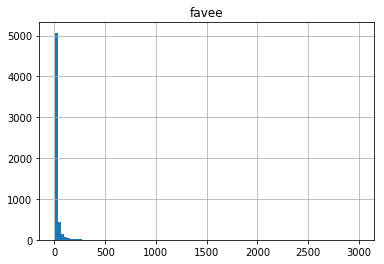

In [141]:
# dffavcounts.hist(bins=100)


In [8]:
df['day'] = df['datestamp'].dt.date

(array([ 732493.,  732616.,  732736.,  732858.,  732981.,  733102.,
         733224.,  733347.,  733467.,  733589.]),
 <a list of 10 Text xticklabel objects>)

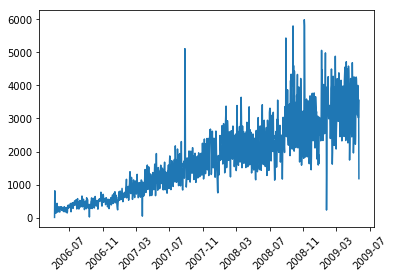

In [167]:
# plt.plot(df[['day','favee']].groupby('day').count(),)
# plt.xticks(rotation=45)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161689 entries, 1 to 32439332
Data columns (total 7 columns):
faver        int64
favee        int64
type         int64
target       int64
parent       int64
datestamp    datetime64[ns]
day          object
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.9+ GB


In [10]:
df2017 = df[df['datestamp'].dt.year == 2017]

In [11]:
df2017.head()

faver   favee  type   target  parent               datestamp  \
faveid                                                                    
27387158  241804  115622     4  4345181  299942 2017-01-01 12:00:29.720   
27387159    1009   12985     2  6860480  164321 2017-01-01 12:00:44.490   
27387160  241804  120957     4  4345187  299942 2017-01-01 12:01:46.517   
27387161  217040   20966     2  6860163  164315 2017-01-01 12:01:58.097   
27387162  179924  100849     4  4406907  304317 2017-01-01 12:02:17.350   

                 day  
faveid                
27387158  2017-01-01  
27387159  2017-01-01  
27387160  2017-01-01  
27387161  2017-01-01  
27387162  2017-01-01

In [12]:
df2017.tail()

faver   favee  type   target  parent               datestamp  \
faveid                                                                    
32439328  164348  175568     2  7258526  171090 2017-12-10 04:20:31.423   
32439329  164348  170113     1   171090       0 2017-12-10 04:23:25.860   
32439330   49455  244314     4  4571432  316686 2017-12-10 04:23:38.000   
32439331   15091  155526     2  7258687  171095 2017-12-10 04:24:01.643   
32439332  168863   91529     6  1292350   24638 2017-12-10 04:24:01.737   

                 day  
faveid                
32439328  2017-12-10  
32439329  2017-12-10  
32439330  2017-12-10  
32439331  2017-12-10  
32439332  2017-12-10

In [16]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4963715 entries, 27387158 to 32439332
Data columns (total 7 columns):
faver        int64
favee        int64
type         int64
target       int64
parent       int64
datestamp    datetime64[ns]
day          object
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 303.0+ MB


(array([ 736361.,  736420.,  736481.,  736542.,  736603.,  736664.]),
 <a list of 6 Text xticklabel objects>)

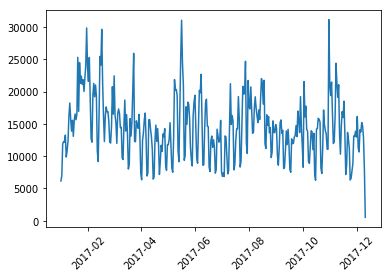

In [17]:
plt.plot(df2017[['day','favee']].groupby('day').count(),)
plt.xticks(rotation=45)

In [13]:
df2017.to_csv("data/favorites2017.csv", sep=',')

In [14]:
df2016 = df[df['datestamp'].dt.year == 2016]
df2016.to_csv("data/favorites2016.csv", sep=',')

In [15]:
df2015 = df[df['datestamp'].dt.year == 2015]
df2015.to_csv("data/favorites2015.csv", sep=',')

In [16]:
df2014 = df[df['datestamp'].dt.year == 2014]
df2014.to_csv("data/favorites2014.csv", sep=',')

In [17]:
df2013 = df[df['datestamp'].dt.year == 2013]
df2013.to_csv("data/favorites2014.csv", sep=',')

In [18]:
del df


In [21]:
df2017['month'] = df2017['datestamp'].dt.month

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.]),
 <a list of 8 Text xticklabel objects>)

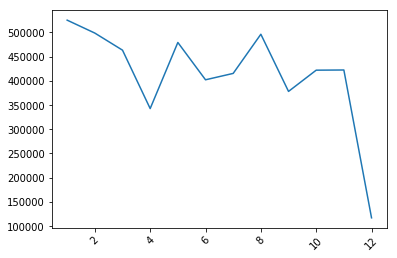

In [24]:
plt.plot(df2017[['month','faver']].groupby('month').count(),)
plt.xticks(rotation=45)

In [25]:
dffavcounts = df2017[['faver','favee']].groupby('faver').count()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7a2e9e860>]], dtype=object)

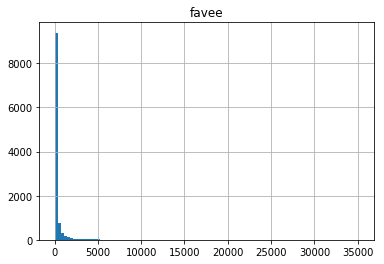

In [26]:
dffavcounts.hist(bins=100)

In [30]:
dffavcounts.describe()

favee
count  11316.000000
mean     438.645723
std     1820.476322
min        1.000000
25%        5.000000
50%       28.000000
75%      173.000000
max    35133.000000

In [31]:
dffavcounts.head()

favee
faver       
1         79
40       479
58       352
123       11
138       43

In [33]:
dffctype = df2017[['faver','favee','type']].groupby(['faver','type']).count()

In [46]:
dffctype.unstack().describe()

favee                                                       \
type            1             2            3            4            5    
count  6652.000000   8794.000000  5501.000000  7084.000000  1594.000000   
mean     25.560132    452.701501    15.995092    67.435347     3.104768   
std      88.670069   1892.622251    50.592901   237.289840     5.365926   
min       1.000000      1.000000     1.000000     1.000000     1.000000   
25%       2.000000      4.000000     1.000000     2.000000     1.000000   
50%       5.000000     25.000000     4.000000     9.000000     1.000000   
75%      17.000000    159.000000    13.000000    37.000000     3.000000   
max    2425.000000  33646.000000  1773.000000  5338.000000    98.000000   

                                                                               \
type            6           7           8           9          10          13   
count  3754.000000  342.000000  242.000000  151.000000  22.000000  168.000000   
mean     38.708578    1.488304    2.640496    3.569536   1.045455    1.880952   
std     114.703804    1.287719    4.730813    7.573207   0.213201    2.266152   
min       1.000000    1.000000    1.000000    1.000000   1.000000    1.000000   
25%       2.000000    1.000000    1.000000    1.000000   1.000000    1.000000   
50%       6.000000    1.000000    1.000000    1.000000   1.000000    1.000000   
75%      26.000000    1.000000    2.000000    3.000000   1.000000    2.000000   
max    3015.000000   16.000000   38.000000   73.000000   2.000000   25.000000   

                                                             
type           19          20   22          23           24  
count  149.000000  413.000000  2.0  727.000000  2340.000000  
mean     1.234899    5.125908  1.0    5.110041    37.874359  
std      0.774503   11.981727  0.0   17.729883   120.465782  
min      1.000000    1.000000  1.0    1.000000     1.000000  
25%      1.000000    1.000000  1.0    1.000000     2.000000  
50%      1.000000    2.000000  1.0    1.000000     7.000000  
75%      1.000000    4.000000  1.0    3.000000    28.000000  
max      7.000000  124.000000  1.0  295.000000  2346.000000

Types:

    1 & 2 - Metafilter post & comment
    3 & 4 - Ask Metafilter post & comment
    5 & 6 - MetaTalk post & comment
    7 - Projects post
    8 - Music post
    9 - Music comment - if the parent is 0, this is broken.
    10 - Jobs post
    11 & 12 - Travel post & comment
    13 - Projects comment

For post-type favorites, "target" is the link_id of the post being favorited.

For comment-type favorites, "target" is the comment_id of the comment being favorited, and "parent" is the link_id of the thread in which the comment resides.

Note that the case of a fave of type 9, a Music comment, with a parent of 0, is the result of a sporadic bug introduced at the launch of Music on June 29th, 2006 and present until October 21st, 2006. There are approximately 30 degenerate favorites of this sort in the database, and they may be either repaired or removed in the future.

Favorites that have been removed by the favoriting user are deleted from the database; accordingly, the faveid values present in this file are not strictly sequential. 

http://mefiwiki.com/wiki/Infodump

In [48]:
import seaborn as sns


/home/tomas/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/tomas/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


(0, 1000)

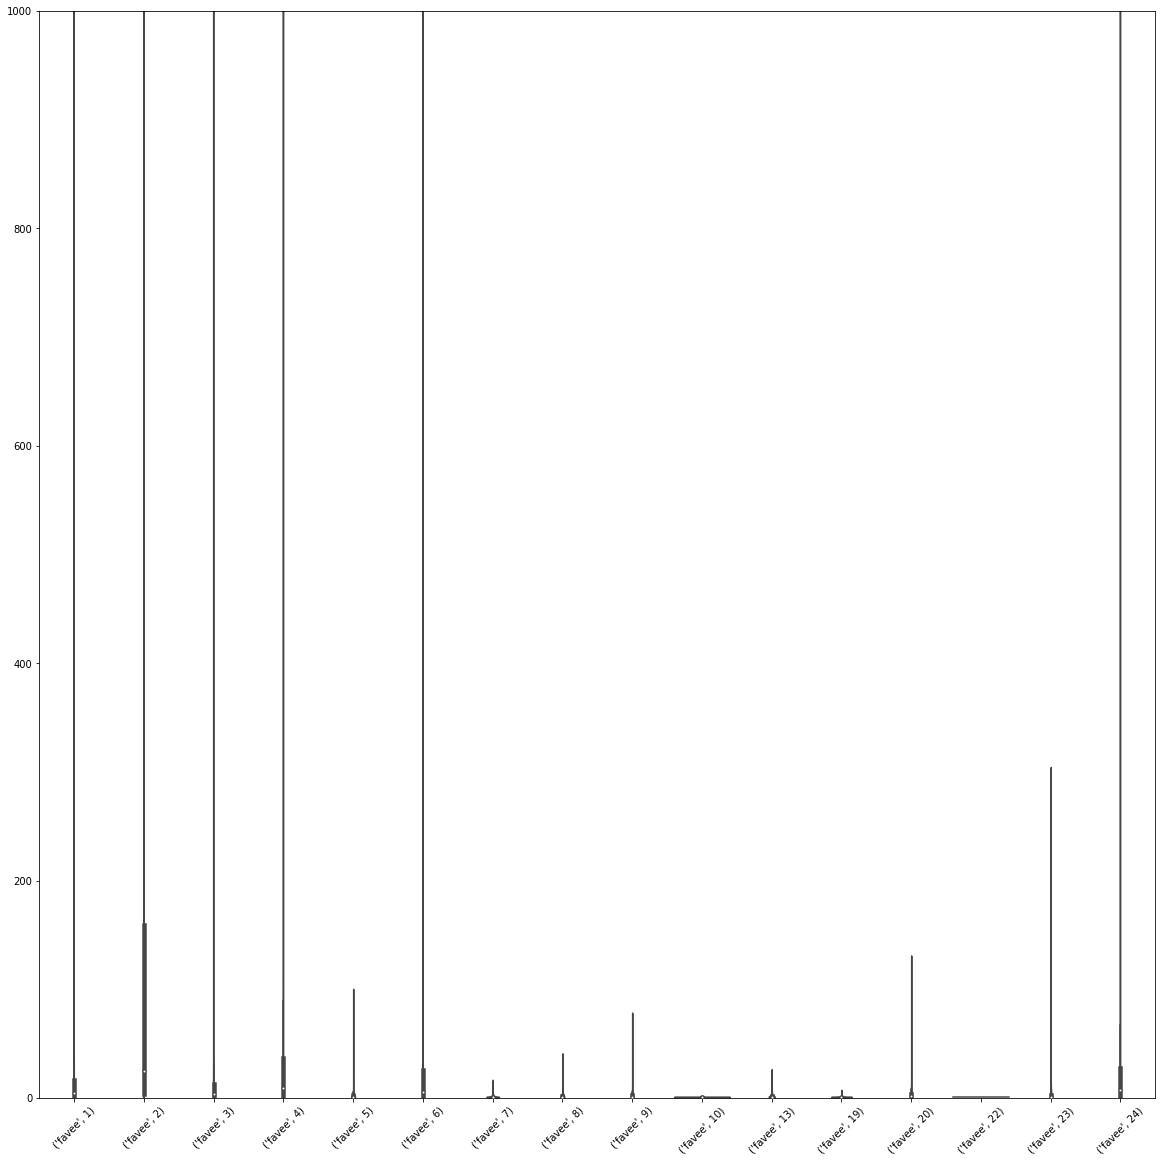

In [58]:
plt.figure(figsize=(20,20))
ax = sns.violinplot(data=dffctype.unstack())

plt.xticks(rotation=45)
plt.ylim(0,1000)

In [31]:
dfposts = pd.read_csv('data/postdata_mefi.txt',sep='\t', header=1, parse_dates=['datestamp'], skiprows=0, index_col='postid')

/home/tomas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
dfposts.head()

userid                   datestamp  category  comments  favorites  \
postid                                                                      
19         1.0  Jul 14 1999 03:03:04:930PM       0.0     116.0      142.0   
25         1.0  Jul 15 1999 09:37:51:770AM       0.0       6.0        1.0   
26        16.0  Jul 15 1999 09:54:26:280AM       0.0       4.0        1.0   
27        16.0  Jul 15 1999 09:57:54:160AM       0.0       1.0        0.0   
33         1.0  Jul 15 1999 11:18:45:247AM       0.0       0.0        2.0   

        deleted  reason  
postid                   
19          0.0  [NULL]  
25          0.0  [NULL]  
26          0.0  [NULL]  
27          0.0  [NULL]  
33          0.0  [NULL]

In [9]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170246 entries, 19 to 171097
Data columns (total 7 columns):
userid       170242 non-null float64
datestamp    170246 non-null object
category     170242 non-null float64
comments     170242 non-null float64
favorites    170242 non-null float64
deleted      170242 non-null float64
reason       170242 non-null object
dtypes: float64(5), object(2)
memory usage: 10.4+ MB


In [27]:
dfcom = pd.read_csv('data/commentdata_mefi.txt',sep='\t', header=1, parse_dates=['datestamp'], skiprows=0, index_col='postid')

/home/tomas/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [28]:
dfcom.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7192424 entries, 24 to 171097
Data columns (total 5 columns):
commentid       int64
userid          int64
datestamp       object
faves           int64
best answer?    int64
dtypes: int64(4), object(1)
memory usage: 329.2+ MB


In [67]:
dfcom[dfcom.index==26]

commentid  userid                   datestamp  faves  best answer?
postid                                                                    
26              5       1  Jul 15 1999 10:00:12:850AM      2             0
26              7      16  Jul 15 1999 10:54:36:160AM      2             0

In [70]:
dfuser = pd.read_csv('data/usernames.txt',sep='\t', header=1, parse_dates=['joindate'], skiprows=0, index_col='userid')

In [71]:
dfuser.head()

joindate        name
userid                                        
1       Jan 27 2000 08:16:57:367PM    mathowie
8       Jan 27 2000 08:16:57:367PM  OneBallJay
13      Jan 27 2000 08:16:57:367PM       jeffp
16      Jan 27 2000 08:16:57:367PM         jjg
17      Jan 27 2000 08:16:57:367PM   honkzilla

In [76]:
dfuser[dfuser['name']=='Jaclyn']

joindate    name
userid                                    
215374  Dec 25 2014 08:47:31:760PM  Jaclyn

In [77]:
dfuser[dfuser['name']=='tomasbielskis']

joindate           name
userid                                           
267151  Dec  6 2017 11:11:38:753AM  tomasbielskis

In [120]:
def getmfpage(postid):
    """passed a post_id saves the page content for the post as a json file in data/posts"""
    url = 'https://www.metafilter.com/'
    page = requests.get(url+str(postid)).content
#     d = pd.DataFrame(data={postid: [page]})
#     path = 'data/posts/'
#     d.to_json(path+str(d.columns[0]))
    with open(path+str(postid),'wb') as f:
        f.write(page)

In [21]:
d = getmfpage('171194')

In [58]:
d.columns[0]

'33'

In [10]:
path = 'data/posts/'

In [27]:
path+d.columns[0]

'data/posts/171194'

In [29]:
d.to_json(path+d.columns[0])

In [77]:
def scrapemfpages_sequential(n):
    for p in dfposts.index[0:n]:
        if p not in os.listdir('data/posts'):
            getmfpage(p)

In [78]:
scrapemfpages_sequential(14)

In [60]:
os.listdir('data/posts')

['35',
 '44',
 '33',
 '36',
 '43',
 '25',
 '34',
 '19',
 '40',
 '26',
 'param',
 '37',
 '27',
 '39',
 '171194',
 '38']

In [62]:
def scrape_parallel_concurrent(pool_size, post_list):
    pool = multiprocessing.Pool(pool_size)
    pool.map(getmfpage, post_list)
    pool.close()
    pool.join()

In [63]:
scrape_parallel_concurrent(4, [str(p) for p in dfposts.index[0:20]])

In [69]:
t = Timer(lambda: scrapemfpages_sequential(10))
print("Completed sequential in %s seconds." % t.timeit(1))

Completed sequential in 5.568351427995367 seconds.


In [70]:
t = Timer(lambda: scrape_parallel_concurrent(4,[str(p) for p in dfposts.index[0:10]]))
print("Completed using threads in %s seconds." % t.timeit(1))

Completed using threads in 2.0939606730025844 seconds.


In [24]:
from collections import defaultdict
from bs4 import BeautifulSoup
import bs4

def extract_posts_comments():
    posts = defaultdict(str)
    comments = defaultdict(str)
    commentids = []
    for file in os.listdir(path):
        with open(path+file,"r") as f:
            page = f.read()
        soup = BeautifulSoup(page, 'html.parser')
        commenttext = soup.find_all('div', class_ = 'comments')
        post_text = soup.find('div', attrs={'class': 'copy'})
        psmallcopy = post_text.find('span', class_='smallcopy')
        if psmallcopy:
            psmallcopy.decompose()
        posts[file] = post_text.get_text()
        
        for t in commenttext:
            commentid = t.previous_sibling
            print(commentid)
            print(type(commentid))
            if type(commentid) is bs4.element.Tag:
                csmallcopy = t.find('span', class_='smallcopy')
                if csmallcopy:
                    csmallcopy.decompose()
                comments[commentid['name']] = t.text
    return posts, comments


In [25]:
extract_posts_comments()

<a name="7080126"></a>
<class 'bs4.element.Tag'>
<a name="7080141"></a>
<class 'bs4.element.Tag'>
<a name="7080191"></a>
<class 'bs4.element.Tag'>
<a name="7080334"></a>
<class 'bs4.element.Tag'>
<a name="7080469"></a>
<class 'bs4.element.Tag'>
<a name="7080549"></a>
<class 'bs4.element.Tag'>
<a name="7080626"></a>
<class 'bs4.element.Tag'>
<a name="7080676"></a>
<class 'bs4.element.Tag'>
<a name="7080692"></a>
<class 'bs4.element.Tag'>
<a name="7081090"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6228750"></a>
<class 'bs4.element.Tag'>
<a name="6228753"></a>
<class 'bs4.element.Tag'>
<a name="6228812"></a>
<class 'bs4.element.Tag'>
<a name="6228942"></a>
<class 'bs4.element.Tag'>
<a name="6228988"></a>
<class 'bs4.element.Tag'>
<a name="6228998"></a>
<class 'bs4.element.Tag'>
<a name="6229196"></a>
<class 'bs4.element.Tag'>
<a name="6229238"></a>
<class 'bs4.element.Tag'>
<a name="6229459"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.Navigab

<a name="7101691"></a>
<class 'bs4.element.Tag'>
<a name="7101693"></a>
<class 'bs4.element.Tag'>
<a name="7101695"></a>
<class 'bs4.element.Tag'>
<a name="7101701"></a>
<class 'bs4.element.Tag'>
<a name="7101706"></a>
<class 'bs4.element.Tag'>
<a name="7101709"></a>
<class 'bs4.element.Tag'>
<a name="7101711"></a>
<class 'bs4.element.Tag'>
<a name="7101717"></a>
<class 'bs4.element.Tag'>
<a name="7101721"></a>
<class 'bs4.element.Tag'>
<a name="7101726"></a>
<class 'bs4.element.Tag'>
<a name="7101728"></a>
<class 'bs4.element.Tag'>
<a name="7101729"></a>
<class 'bs4.element.Tag'>
<a name="7101736"></a>
<class 'bs4.element.Tag'>
<a name="7101740"></a>
<class 'bs4.element.Tag'>
<a name="7101744"></a>
<class 'bs4.element.Tag'>
<a name="7101745"></a>
<class 'bs4.element.Tag'>
<a name="7101747"></a>
<class 'bs4.element.Tag'>
<a name="7101748"></a>
<class 'bs4.element.Tag'>
<a name="7101749"></a>
<class 'bs4.element.Tag'>
<a name="7101752"></a>
<class 'bs4.element.Tag'>
<a name="7101753"></

<a name="6225514"></a>
<class 'bs4.element.Tag'>
<a name="6225518"></a>
<class 'bs4.element.Tag'>
<a name="6225521"></a>
<class 'bs4.element.Tag'>
<a name="6225532"></a>
<class 'bs4.element.Tag'>
<a name="6225533"></a>
<class 'bs4.element.Tag'>
<a name="6225534"></a>
<class 'bs4.element.Tag'>
<a name="6225536"></a>
<class 'bs4.element.Tag'>
<a name="6225540"></a>
<class 'bs4.element.Tag'>
<a name="6225544"></a>
<class 'bs4.element.Tag'>
<a name="6225545"></a>
<class 'bs4.element.Tag'>
<a name="6225549"></a>
<class 'bs4.element.Tag'>
<a name="6225552"></a>
<class 'bs4.element.Tag'>
<a name="6225555"></a>
<class 'bs4.element.Tag'>
<a name="6225561"></a>
<class 'bs4.element.Tag'>
<a name="6225565"></a>
<class 'bs4.element.Tag'>
<a name="6225566"></a>
<class 'bs4.element.Tag'>
<a name="6225567"></a>
<class 'bs4.element.Tag'>
<a name="6225568"></a>
<class 'bs4.element.Tag'>
<a name="6225575"></a>
<class 'bs4.element.Tag'>
<a name="6225577"></a>
<class 'bs4.element.Tag'>
<a name="6225581"></

<a name="6231888"></a>
<class 'bs4.element.Tag'>
<a name="6231901"></a>
<class 'bs4.element.Tag'>
<a name="6231902"></a>
<class 'bs4.element.Tag'>
<a name="6231907"></a>
<class 'bs4.element.Tag'>
<a name="6231910"></a>
<class 'bs4.element.Tag'>
<a name="6231922"></a>
<class 'bs4.element.Tag'>
<a name="6231927"></a>
<class 'bs4.element.Tag'>
<a name="6231953"></a>
<class 'bs4.element.Tag'>
<a name="6231974"></a>
<class 'bs4.element.Tag'>
<a name="6231982"></a>
<class 'bs4.element.Tag'>
<a name="6231995"></a>
<class 'bs4.element.Tag'>
<a name="6232023"></a>
<class 'bs4.element.Tag'>
<a name="6232055"></a>
<class 'bs4.element.Tag'>
<a name="6232066"></a>
<class 'bs4.element.Tag'>
<a name="6232075"></a>
<class 'bs4.element.Tag'>
<a name="6232092"></a>
<class 'bs4.element.Tag'>
<a name="6232147"></a>
<class 'bs4.element.Tag'>
<a name="6232173"></a>
<class 'bs4.element.Tag'>
<a name="6232179"></a>
<class 'bs4.element.Tag'>
<a name="6232240"></a>
<class 'bs4.element.Tag'>
<a name="6232266"></

<a name="6276712"></a>
<class 'bs4.element.Tag'>
<a name="6276713"></a>
<class 'bs4.element.Tag'>
<a name="6276715"></a>
<class 'bs4.element.Tag'>
<a name="6276716"></a>
<class 'bs4.element.Tag'>
<a name="6276717"></a>
<class 'bs4.element.Tag'>
<a name="6276718"></a>
<class 'bs4.element.Tag'>
<a name="6276720"></a>
<class 'bs4.element.Tag'>
<a name="6276721"></a>
<class 'bs4.element.Tag'>
<a name="6276724"></a>
<class 'bs4.element.Tag'>
<a name="6276725"></a>
<class 'bs4.element.Tag'>
<a name="6276726"></a>
<class 'bs4.element.Tag'>
<a name="6276727"></a>
<class 'bs4.element.Tag'>
<a name="6276729"></a>
<class 'bs4.element.Tag'>
<a name="6276734"></a>
<class 'bs4.element.Tag'>
<a name="6276743"></a>
<class 'bs4.element.Tag'>
<a name="6276745"></a>
<class 'bs4.element.Tag'>
<a name="6276750"></a>
<class 'bs4.element.Tag'>
<a name="6276755"></a>
<class 'bs4.element.Tag'>
<a name="6276771"></a>
<class 'bs4.element.Tag'>
<a name="6276774"></a>
<class 'bs4.element.Tag'>
<a name="6276777"></

<a name="5839126"></a>
<class 'bs4.element.Tag'>
<a name="5839129"></a>
<class 'bs4.element.Tag'>
<a name="5839130"></a>
<class 'bs4.element.Tag'>
<a name="5839132"></a>
<class 'bs4.element.Tag'>
<a name="5839135"></a>
<class 'bs4.element.Tag'>
<a name="5839138"></a>
<class 'bs4.element.Tag'>
<a name="5839140"></a>
<class 'bs4.element.Tag'>
<a name="5839141"></a>
<class 'bs4.element.Tag'>
<a name="5839142"></a>
<class 'bs4.element.Tag'>
<a name="5839144"></a>
<class 'bs4.element.Tag'>
<a name="5839150"></a>
<class 'bs4.element.Tag'>
<a name="5839153"></a>
<class 'bs4.element.Tag'>
<a name="5839158"></a>
<class 'bs4.element.Tag'>
<a name="5839162"></a>
<class 'bs4.element.Tag'>
<a name="5839168"></a>
<class 'bs4.element.Tag'>
<a name="5839191"></a>
<class 'bs4.element.Tag'>
<a name="5839195"></a>
<class 'bs4.element.Tag'>
<a name="5839201"></a>
<class 'bs4.element.Tag'>
<a name="5839206"></a>
<class 'bs4.element.Tag'>
<a name="5839207"></a>
<class 'bs4.element.Tag'>
<a name="5839210"></

<a name="6224444"></a>
<class 'bs4.element.Tag'>
<a name="6224445"></a>
<class 'bs4.element.Tag'>
<a name="6224447"></a>
<class 'bs4.element.Tag'>
<a name="6224454"></a>
<class 'bs4.element.Tag'>
<a name="6224456"></a>
<class 'bs4.element.Tag'>
<a name="6224457"></a>
<class 'bs4.element.Tag'>
<a name="6224460"></a>
<class 'bs4.element.Tag'>
<a name="6224461"></a>
<class 'bs4.element.Tag'>
<a name="6224462"></a>
<class 'bs4.element.Tag'>
<a name="6224464"></a>
<class 'bs4.element.Tag'>
<a name="6224468"></a>
<class 'bs4.element.Tag'>
<a name="6224469"></a>
<class 'bs4.element.Tag'>
<a name="6224470"></a>
<class 'bs4.element.Tag'>
<a name="6224471"></a>
<class 'bs4.element.Tag'>
<a name="6224473"></a>
<class 'bs4.element.Tag'>
<a name="6224475"></a>
<class 'bs4.element.Tag'>
<a name="6224477"></a>
<class 'bs4.element.Tag'>
<a name="6224479"></a>
<class 'bs4.element.Tag'>
<a name="6224480"></a>
<class 'bs4.element.Tag'>
<a name="6224481"></a>
<class 'bs4.element.Tag'>
<a name="6224482"></

<a name="7084412"></a>
<class 'bs4.element.Tag'>
<a name="7084452"></a>
<class 'bs4.element.Tag'>
<a name="7084461"></a>
<class 'bs4.element.Tag'>
<a name="7084494"></a>
<class 'bs4.element.Tag'>
<a name="7084519"></a>
<class 'bs4.element.Tag'>
<a name="7084588"></a>
<class 'bs4.element.Tag'>
<a name="7084589"></a>
<class 'bs4.element.Tag'>
<a name="7084740"></a>
<class 'bs4.element.Tag'>
<a name="7084741"></a>
<class 'bs4.element.Tag'>
<a name="7084744"></a>
<class 'bs4.element.Tag'>
<a name="7084761"></a>
<class 'bs4.element.Tag'>
<a name="7084919"></a>
<class 'bs4.element.Tag'>
<a name="7084942"></a>
<class 'bs4.element.Tag'>
<a name="7084994"></a>
<class 'bs4.element.Tag'>
<a name="7085015"></a>
<class 'bs4.element.Tag'>
<a name="7085176"></a>
<class 'bs4.element.Tag'>
<a name="7085219"></a>
<class 'bs4.element.Tag'>
<a name="7085350"></a>
<class 'bs4.element.Tag'>
<a name="7085454"></a>
<class 'bs4.element.Tag'>
<a name="7085699"></a>
<class 'bs4.element.Tag'>
<a name="7086062"></

<a name="6512098"></a>
<class 'bs4.element.Tag'>
<a name="6512125"></a>
<class 'bs4.element.Tag'>
<a name="6512145"></a>
<class 'bs4.element.Tag'>
<a name="6512226"></a>
<class 'bs4.element.Tag'>
<a name="6512231"></a>
<class 'bs4.element.Tag'>
<a name="6512245"></a>
<class 'bs4.element.Tag'>
<a name="6512251"></a>
<class 'bs4.element.Tag'>
<a name="6512260"></a>
<class 'bs4.element.Tag'>
<a name="6512265"></a>
<class 'bs4.element.Tag'>
<a name="6512297"></a>
<class 'bs4.element.Tag'>
<a name="6512322"></a>
<class 'bs4.element.Tag'>
<a name="6512380"></a>
<class 'bs4.element.Tag'>
<a name="6512494"></a>
<class 'bs4.element.Tag'>
<a name="6512501"></a>
<class 'bs4.element.Tag'>
<a name="6512543"></a>
<class 'bs4.element.Tag'>
<a name="6512704"></a>
<class 'bs4.element.Tag'>
<a name="6512736"></a>
<class 'bs4.element.Tag'>
<a name="6512765"></a>
<class 'bs4.element.Tag'>
<a name="6513080"></a>
<class 'bs4.element.Tag'>
<a name="6513127"></a>
<class 'bs4.element.Tag'>
<a name="6513275"></

<a name="5352313"></a>
<class 'bs4.element.Tag'>
<a name="5352317"></a>
<class 'bs4.element.Tag'>
<a name="5352329"></a>
<class 'bs4.element.Tag'>
<a name="5352332"></a>
<class 'bs4.element.Tag'>
<a name="5352335"></a>
<class 'bs4.element.Tag'>
<a name="5352340"></a>
<class 'bs4.element.Tag'>
<a name="5352343"></a>
<class 'bs4.element.Tag'>
<a name="5352352"></a>
<class 'bs4.element.Tag'>
<a name="5352358"></a>
<class 'bs4.element.Tag'>
<a name="5352359"></a>
<class 'bs4.element.Tag'>
<a name="5352363"></a>
<class 'bs4.element.Tag'>
<a name="5352366"></a>
<class 'bs4.element.Tag'>
<a name="5352369"></a>
<class 'bs4.element.Tag'>
<a name="5352374"></a>
<class 'bs4.element.Tag'>
<a name="5352375"></a>
<class 'bs4.element.Tag'>
<a name="5352377"></a>
<class 'bs4.element.Tag'>
<a name="5352378"></a>
<class 'bs4.element.Tag'>
<a name="5352379"></a>
<class 'bs4.element.Tag'>
<a name="5352380"></a>
<class 'bs4.element.Tag'>
<a name="5352381"></a>
<class 'bs4.element.Tag'>
<a name="5352382"></

<class 'bs4.element.Tag'>
<a name="6389821"></a>
<class 'bs4.element.Tag'>
<a name="6389829"></a>
<class 'bs4.element.Tag'>
<a name="6389830"></a>
<class 'bs4.element.Tag'>
<a name="6389832"></a>
<class 'bs4.element.Tag'>
<a name="6389837"></a>
<class 'bs4.element.Tag'>
<a name="6389847"></a>
<class 'bs4.element.Tag'>
<a name="6389852"></a>
<class 'bs4.element.Tag'>
<a name="6389902"></a>
<class 'bs4.element.Tag'>
<a name="6389920"></a>
<class 'bs4.element.Tag'>
<a name="6389991"></a>
<class 'bs4.element.Tag'>
<a name="6390004"></a>
<class 'bs4.element.Tag'>
<a name="6390014"></a>
<class 'bs4.element.Tag'>
<a name="6390024"></a>
<class 'bs4.element.Tag'>
<a name="6390069"></a>
<class 'bs4.element.Tag'>
<a name="6390081"></a>
<class 'bs4.element.Tag'>
<a name="6390128"></a>
<class 'bs4.element.Tag'>
<a name="6390130"></a>
<class 'bs4.element.Tag'>
<a name="6390163"></a>
<class 'bs4.element.Tag'>
<a name="6390187"></a>
<class 'bs4.element.Tag'>
<a name="6390191"></a>
<class 'bs4.element.

<a name="7087646"></a>
<class 'bs4.element.Tag'>
<a name="7087652"></a>
<class 'bs4.element.Tag'>
<a name="7087661"></a>
<class 'bs4.element.Tag'>
<a name="7087669"></a>
<class 'bs4.element.Tag'>
<a name="7087676"></a>
<class 'bs4.element.Tag'>
<a name="7087690"></a>
<class 'bs4.element.Tag'>
<a name="7087698"></a>
<class 'bs4.element.Tag'>
<a name="7087713"></a>
<class 'bs4.element.Tag'>
<a name="7087714"></a>
<class 'bs4.element.Tag'>
<a name="7087715"></a>
<class 'bs4.element.Tag'>
<a name="7087720"></a>
<class 'bs4.element.Tag'>
<a name="7087727"></a>
<class 'bs4.element.Tag'>
<a name="7087732"></a>
<class 'bs4.element.Tag'>
<a name="7087735"></a>
<class 'bs4.element.Tag'>
<a name="7087736"></a>
<class 'bs4.element.Tag'>
<a name="7087741"></a>
<class 'bs4.element.Tag'>
<a name="7087742"></a>
<class 'bs4.element.Tag'>
<a name="7087755"></a>
<class 'bs4.element.Tag'>
<a name="7087768"></a>
<class 'bs4.element.Tag'>
<a name="7087769"></a>
<class 'bs4.element.Tag'>
<a name="7087770"></

<a name="7071907"></a>
<class 'bs4.element.Tag'>
<a name="7071910"></a>
<class 'bs4.element.Tag'>
<a name="7071912"></a>
<class 'bs4.element.Tag'>
<a name="7071924"></a>
<class 'bs4.element.Tag'>
<a name="7071933"></a>
<class 'bs4.element.Tag'>
<a name="7071949"></a>
<class 'bs4.element.Tag'>
<a name="7071950"></a>
<class 'bs4.element.Tag'>
<a name="7071963"></a>
<class 'bs4.element.Tag'>
<a name="7071971"></a>
<class 'bs4.element.Tag'>
<a name="7071976"></a>
<class 'bs4.element.Tag'>
<a name="7071977"></a>
<class 'bs4.element.Tag'>
<a name="7071995"></a>
<class 'bs4.element.Tag'>
<a name="7072004"></a>
<class 'bs4.element.Tag'>
<a name="7072025"></a>
<class 'bs4.element.Tag'>
<a name="7072027"></a>
<class 'bs4.element.Tag'>
<a name="7072029"></a>
<class 'bs4.element.Tag'>
<a name="7072040"></a>
<class 'bs4.element.Tag'>
<a name="7072041"></a>
<class 'bs4.element.Tag'>
<a name="7072068"></a>
<class 'bs4.element.Tag'>
<a name="7072078"></a>
<class 'bs4.element.Tag'>
<a name="7072079"></

<a name="6388417"></a>
<class 'bs4.element.Tag'>
<a name="6388421"></a>
<class 'bs4.element.Tag'>
<a name="6388422"></a>
<class 'bs4.element.Tag'>
<a name="6388432"></a>
<class 'bs4.element.Tag'>
<a name="6388439"></a>
<class 'bs4.element.Tag'>
<a name="6388448"></a>
<class 'bs4.element.Tag'>
<a name="6388461"></a>
<class 'bs4.element.Tag'>
<a name="6388464"></a>
<class 'bs4.element.Tag'>
<a name="6388465"></a>
<class 'bs4.element.Tag'>
<a name="6388471"></a>
<class 'bs4.element.Tag'>
<a name="6388476"></a>
<class 'bs4.element.Tag'>
<a name="6388478"></a>
<class 'bs4.element.Tag'>
<a name="6388479"></a>
<class 'bs4.element.Tag'>
<a name="6388480"></a>
<class 'bs4.element.Tag'>
<a name="6388481"></a>
<class 'bs4.element.Tag'>
<a name="6388483"></a>
<class 'bs4.element.Tag'>
<a name="6388487"></a>
<class 'bs4.element.Tag'>
<a name="6388488"></a>
<class 'bs4.element.Tag'>
<a name="6388492"></a>
<class 'bs4.element.Tag'>
<a name="6388504"></a>
<class 'bs4.element.Tag'>
<a name="6388506"></

<a name="7096985"></a>
<class 'bs4.element.Tag'>
<a name="7097012"></a>
<class 'bs4.element.Tag'>
<a name="7097023"></a>
<class 'bs4.element.Tag'>
<a name="7097043"></a>
<class 'bs4.element.Tag'>
<a name="7097052"></a>
<class 'bs4.element.Tag'>
<a name="7097113"></a>
<class 'bs4.element.Tag'>
<a name="7097372"></a>
<class 'bs4.element.Tag'>
<a name="7097441"></a>
<class 'bs4.element.Tag'>
<a name="7097537"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7081994"></a>
<class 'bs4.element.Tag'>
<a name="7081997"></a>
<class 'bs4.element.Tag'>
<a name="7081999"></a>
<class 'bs4.element.Tag'>
<a name="7082012"></a>
<class 'bs4.element.Tag'>
<a name="7082032"></a>
<class 'bs4.element.Tag'>
<a name="7082039"></a>
<class 'bs4.element.Tag'>
<a name="7082041"></a>
<class 'bs4.element.Tag'>
<a name="7082050"></a>
<class 'bs4.element.Tag'>
<a name="7082070"></a>
<class 'bs4.element.Tag'>
<a name="7082099"></a>
<class 'bs4.element.Tag'>
<a name="7082102"></a>
<class

<a name="7076405"></a>
<class 'bs4.element.Tag'>
<a name="7076410"></a>
<class 'bs4.element.Tag'>
<a name="7076416"></a>
<class 'bs4.element.Tag'>
<a name="7076417"></a>
<class 'bs4.element.Tag'>
<a name="7076426"></a>
<class 'bs4.element.Tag'>
<a name="7076428"></a>
<class 'bs4.element.Tag'>
<a name="7076430"></a>
<class 'bs4.element.Tag'>
<a name="7076431"></a>
<class 'bs4.element.Tag'>
<a name="7076435"></a>
<class 'bs4.element.Tag'>
<a name="7076438"></a>
<class 'bs4.element.Tag'>
<a name="7076439"></a>
<class 'bs4.element.Tag'>
<a name="7076457"></a>
<class 'bs4.element.Tag'>
<a name="7076462"></a>
<class 'bs4.element.Tag'>
<a name="7076469"></a>
<class 'bs4.element.Tag'>
<a name="7076472"></a>
<class 'bs4.element.Tag'>
<a name="7076477"></a>
<class 'bs4.element.Tag'>
<a name="7076529"></a>
<class 'bs4.element.Tag'>
<a name="7076531"></a>
<class 'bs4.element.Tag'>
<a name="7076572"></a>
<class 'bs4.element.Tag'>
<a name="7076577"></a>
<class 'bs4.element.Tag'>
<a name="7076689"></

<a name="6221736"></a>
<class 'bs4.element.Tag'>
<a name="6221751"></a>
<class 'bs4.element.Tag'>
<a name="6221763"></a>
<class 'bs4.element.Tag'>
<a name="6221765"></a>
<class 'bs4.element.Tag'>
<a name="7084879"></a>
<class 'bs4.element.Tag'>
<a name="7084894"></a>
<class 'bs4.element.Tag'>
<a name="7084918"></a>
<class 'bs4.element.Tag'>
<a name="7084924"></a>
<class 'bs4.element.Tag'>
<a name="7084929"></a>
<class 'bs4.element.Tag'>
<a name="7084938"></a>
<class 'bs4.element.Tag'>
<a name="7084957"></a>
<class 'bs4.element.Tag'>
<a name="7084963"></a>
<class 'bs4.element.Tag'>
<a name="7084974"></a>
<class 'bs4.element.Tag'>
<a name="7084975"></a>
<class 'bs4.element.Tag'>
<a name="7085000"></a>
<class 'bs4.element.Tag'>
<a name="7085003"></a>
<class 'bs4.element.Tag'>
<a name="7085327"></a>
<class 'bs4.element.Tag'>
<a name="7085588"></a>
<class 'bs4.element.Tag'>
<a name="7085715"></a>
<class 'bs4.element.Tag'>
<a name="7085785"></a>
<class 'bs4.element.Tag'>
<a name="7086233"></

<a name="7067964"></a>
<class 'bs4.element.Tag'>
<a name="7068342"></a>
<class 'bs4.element.Tag'>
<a name="7102834"></a>
<class 'bs4.element.Tag'>
<a name="7102839"></a>
<class 'bs4.element.Tag'>
<a name="7102841"></a>
<class 'bs4.element.Tag'>
<a name="7102847"></a>
<class 'bs4.element.Tag'>
<a name="7102851"></a>
<class 'bs4.element.Tag'>
<a name="7102865"></a>
<class 'bs4.element.Tag'>
<a name="7102869"></a>
<class 'bs4.element.Tag'>
<a name="7102872"></a>
<class 'bs4.element.Tag'>
<a name="7102874"></a>
<class 'bs4.element.Tag'>
<a name="7102881"></a>
<class 'bs4.element.Tag'>
<a name="7102883"></a>
<class 'bs4.element.Tag'>
<a name="7102884"></a>
<class 'bs4.element.Tag'>
<a name="7102890"></a>
<class 'bs4.element.Tag'>
<a name="7102891"></a>
<class 'bs4.element.Tag'>
<a name="7102910"></a>
<class 'bs4.element.Tag'>
<a name="7102913"></a>
<class 'bs4.element.Tag'>
<a name="7102948"></a>
<class 'bs4.element.Tag'>
<a name="7102979"></a>
<class 'bs4.element.Tag'>
<a name="7102987"></

<a name="6392834"></a>
<class 'bs4.element.Tag'>
<a name="6392860"></a>
<class 'bs4.element.Tag'>
<a name="6392866"></a>
<class 'bs4.element.Tag'>
<a name="6392869"></a>
<class 'bs4.element.Tag'>
<a name="6392878"></a>
<class 'bs4.element.Tag'>
<a name="6392880"></a>
<class 'bs4.element.Tag'>
<a name="6392892"></a>
<class 'bs4.element.Tag'>
<a name="6392937"></a>
<class 'bs4.element.Tag'>
<a name="6392941"></a>
<class 'bs4.element.Tag'>
<a name="6392947"></a>
<class 'bs4.element.Tag'>
<a name="6392953"></a>
<class 'bs4.element.Tag'>
<a name="6392961"></a>
<class 'bs4.element.Tag'>
<a name="6392981"></a>
<class 'bs4.element.Tag'>
<a name="6393000"></a>
<class 'bs4.element.Tag'>
<a name="6393004"></a>
<class 'bs4.element.Tag'>
<a name="6393006"></a>
<class 'bs4.element.Tag'>
<a name="6393014"></a>
<class 'bs4.element.Tag'>
<a name="6393023"></a>
<class 'bs4.element.Tag'>
<a name="6393041"></a>
<class 'bs4.element.Tag'>
<a name="6393044"></a>
<class 'bs4.element.Tag'>
<a name="6393073"></

<a name="7096437"></a>
<class 'bs4.element.Tag'>
<a name="7096441"></a>
<class 'bs4.element.Tag'>
<a name="7096443"></a>
<class 'bs4.element.Tag'>
<a name="7096447"></a>
<class 'bs4.element.Tag'>
<a name="7096457"></a>
<class 'bs4.element.Tag'>
<a name="7096464"></a>
<class 'bs4.element.Tag'>
<a name="7096469"></a>
<class 'bs4.element.Tag'>
<a name="7096472"></a>
<class 'bs4.element.Tag'>
<a name="7096474"></a>
<class 'bs4.element.Tag'>
<a name="7096476"></a>
<class 'bs4.element.Tag'>
<a name="7096483"></a>
<class 'bs4.element.Tag'>
<a name="7096484"></a>
<class 'bs4.element.Tag'>
<a name="7096485"></a>
<class 'bs4.element.Tag'>
<a name="7096488"></a>
<class 'bs4.element.Tag'>
<a name="7096497"></a>
<class 'bs4.element.Tag'>
<a name="7096502"></a>
<class 'bs4.element.Tag'>
<a name="7096511"></a>
<class 'bs4.element.Tag'>
<a name="7096518"></a>
<class 'bs4.element.Tag'>
<a name="7096522"></a>
<class 'bs4.element.Tag'>
<a name="7096528"></a>
<class 'bs4.element.Tag'>
<a name="7096532"></

<a name="6384812"></a>
<class 'bs4.element.Tag'>
<a name="6384817"></a>
<class 'bs4.element.Tag'>
<a name="6384820"></a>
<class 'bs4.element.Tag'>
<a name="6384824"></a>
<class 'bs4.element.Tag'>
<a name="6384833"></a>
<class 'bs4.element.Tag'>
<a name="6384837"></a>
<class 'bs4.element.Tag'>
<a name="6384839"></a>
<class 'bs4.element.Tag'>
<a name="6384845"></a>
<class 'bs4.element.Tag'>
<a name="6384849"></a>
<class 'bs4.element.Tag'>
<a name="6384858"></a>
<class 'bs4.element.Tag'>
<a name="6384887"></a>
<class 'bs4.element.Tag'>
<a name="6384902"></a>
<class 'bs4.element.Tag'>
<a name="6384929"></a>
<class 'bs4.element.Tag'>
<a name="6384981"></a>
<class 'bs4.element.Tag'>
<a name="6385008"></a>
<class 'bs4.element.Tag'>
<a name="6385041"></a>
<class 'bs4.element.Tag'>
<a name="6385094"></a>
<class 'bs4.element.Tag'>
<a name="6385112"></a>
<class 'bs4.element.Tag'>
<a name="6385123"></a>
<class 'bs4.element.Tag'>
<a name="6385130"></a>
<class 'bs4.element.Tag'>
<a name="6385178"></

<a name="6386978"></a>
<class 'bs4.element.Tag'>
<a name="6386999"></a>
<class 'bs4.element.Tag'>
<a name="6387005"></a>
<class 'bs4.element.Tag'>
<a name="6387031"></a>
<class 'bs4.element.Tag'>
<a name="6387043"></a>
<class 'bs4.element.Tag'>
<a name="6387047"></a>
<class 'bs4.element.Tag'>
<a name="6387063"></a>
<class 'bs4.element.Tag'>
<a name="6387071"></a>
<class 'bs4.element.Tag'>
<a name="6387104"></a>
<class 'bs4.element.Tag'>
<a name="6387217"></a>
<class 'bs4.element.Tag'>
<a name="6387240"></a>
<class 'bs4.element.Tag'>
<a name="6387247"></a>
<class 'bs4.element.Tag'>
<a name="6387307"></a>
<class 'bs4.element.Tag'>
<a name="6387385"></a>
<class 'bs4.element.Tag'>
<a name="6387394"></a>
<class 'bs4.element.Tag'>
<a name="6387615"></a>
<class 'bs4.element.Tag'>
<a name="6387777"></a>
<class 'bs4.element.Tag'>
<a name="6387778"></a>
<class 'bs4.element.Tag'>
<a name="6387792"></a>
<class 'bs4.element.Tag'>
<a name="6387846"></a>
<class 'bs4.element.Tag'>
<a name="6387858"></

<a name="6389651"></a>
<class 'bs4.element.Tag'>
<a name="6389657"></a>
<class 'bs4.element.Tag'>
<a name="6389662"></a>
<class 'bs4.element.Tag'>
<a name="6389667"></a>
<class 'bs4.element.Tag'>
<a name="6389671"></a>
<class 'bs4.element.Tag'>
<a name="6389681"></a>
<class 'bs4.element.Tag'>
<a name="6389683"></a>
<class 'bs4.element.Tag'>
<a name="6389691"></a>
<class 'bs4.element.Tag'>
<a name="6389698"></a>
<class 'bs4.element.Tag'>
<a name="6389711"></a>
<class 'bs4.element.Tag'>
<a name="6389730"></a>
<class 'bs4.element.Tag'>
<a name="6389746"></a>
<class 'bs4.element.Tag'>
<a name="6389747"></a>
<class 'bs4.element.Tag'>
<a name="6389795"></a>
<class 'bs4.element.Tag'>
<a name="6389798"></a>
<class 'bs4.element.Tag'>
<a name="6389801"></a>
<class 'bs4.element.Tag'>
<a name="6389836"></a>
<class 'bs4.element.Tag'>
<a name="6389850"></a>
<class 'bs4.element.Tag'>
<a name="6389851"></a>
<class 'bs4.element.Tag'>
<a name="6389940"></a>
<class 'bs4.element.Tag'>
<a name="6389966"></

<a name="7085859"></a>
<class 'bs4.element.Tag'>
<a name="7085861"></a>
<class 'bs4.element.Tag'>
<a name="7085864"></a>
<class 'bs4.element.Tag'>
<a name="7085865"></a>
<class 'bs4.element.Tag'>
<a name="7085866"></a>
<class 'bs4.element.Tag'>
<a name="7085867"></a>
<class 'bs4.element.Tag'>
<a name="7085869"></a>
<class 'bs4.element.Tag'>
<a name="7085872"></a>
<class 'bs4.element.Tag'>
<a name="7085876"></a>
<class 'bs4.element.Tag'>
<a name="7085877"></a>
<class 'bs4.element.Tag'>
<a name="7085878"></a>
<class 'bs4.element.Tag'>
<a name="7085879"></a>
<class 'bs4.element.Tag'>
<a name="7085889"></a>
<class 'bs4.element.Tag'>
<a name="7085891"></a>
<class 'bs4.element.Tag'>
<a name="7085892"></a>
<class 'bs4.element.Tag'>
<a name="7085895"></a>
<class 'bs4.element.Tag'>
<a name="7085896"></a>
<class 'bs4.element.Tag'>
<a name="7085897"></a>
<class 'bs4.element.Tag'>
<a name="7085898"></a>
<class 'bs4.element.Tag'>
<a name="7085900"></a>
<class 'bs4.element.Tag'>
<a name="7085901"></

<a name="6388513"></a>
<class 'bs4.element.Tag'>
<a name="6388515"></a>
<class 'bs4.element.Tag'>
<a name="6388522"></a>
<class 'bs4.element.Tag'>
<a name="6388531"></a>
<class 'bs4.element.Tag'>
<a name="6388533"></a>
<class 'bs4.element.Tag'>
<a name="6388535"></a>
<class 'bs4.element.Tag'>
<a name="6388556"></a>
<class 'bs4.element.Tag'>
<a name="6388558"></a>
<class 'bs4.element.Tag'>
<a name="6388560"></a>
<class 'bs4.element.Tag'>
<a name="6388563"></a>
<class 'bs4.element.Tag'>
<a name="6388564"></a>
<class 'bs4.element.Tag'>
<a name="6388565"></a>
<class 'bs4.element.Tag'>
<a name="6388568"></a>
<class 'bs4.element.Tag'>
<a name="6388570"></a>
<class 'bs4.element.Tag'>
<a name="6388572"></a>
<class 'bs4.element.Tag'>
<a name="6388574"></a>
<class 'bs4.element.Tag'>
<a name="6388577"></a>
<class 'bs4.element.Tag'>
<a name="6388584"></a>
<class 'bs4.element.Tag'>
<a name="6388587"></a>
<class 'bs4.element.Tag'>
<a name="6388588"></a>
<class 'bs4.element.Tag'>
<a name="6388589"></

<a name="6223783"></a>
<class 'bs4.element.Tag'>
<a name="6223786"></a>
<class 'bs4.element.Tag'>
<a name="6223804"></a>
<class 'bs4.element.Tag'>
<a name="6223807"></a>
<class 'bs4.element.Tag'>
<a name="6223824"></a>
<class 'bs4.element.Tag'>
<a name="6223826"></a>
<class 'bs4.element.Tag'>
<a name="6223833"></a>
<class 'bs4.element.Tag'>
<a name="6223850"></a>
<class 'bs4.element.Tag'>
<a name="6223871"></a>
<class 'bs4.element.Tag'>
<a name="6223877"></a>
<class 'bs4.element.Tag'>
<a name="6223903"></a>
<class 'bs4.element.Tag'>
<a name="6223915"></a>
<class 'bs4.element.Tag'>
<a name="6223922"></a>
<class 'bs4.element.Tag'>
<a name="6223930"></a>
<class 'bs4.element.Tag'>
<a name="6223933"></a>
<class 'bs4.element.Tag'>
<a name="6223937"></a>
<class 'bs4.element.Tag'>
<a name="6223962"></a>
<class 'bs4.element.Tag'>
<a name="6223969"></a>
<class 'bs4.element.Tag'>
<a name="6223979"></a>
<class 'bs4.element.Tag'>
<a name="6223999"></a>
<class 'bs4.element.Tag'>
<a name="6224020"></

<a name="4623188"></a>
<class 'bs4.element.Tag'>
<a name="4623195"></a>
<class 'bs4.element.Tag'>
<a name="4623215"></a>
<class 'bs4.element.Tag'>
<a name="4623222"></a>
<class 'bs4.element.Tag'>
<a name="4623235"></a>
<class 'bs4.element.Tag'>
<a name="4623245"></a>
<class 'bs4.element.Tag'>
<a name="4623250"></a>
<class 'bs4.element.Tag'>
<a name="4623263"></a>
<class 'bs4.element.Tag'>
<a name="4623285"></a>
<class 'bs4.element.Tag'>
<a name="4623287"></a>
<class 'bs4.element.Tag'>
<a name="4623288"></a>
<class 'bs4.element.Tag'>
<a name="4623290"></a>
<class 'bs4.element.Tag'>
<a name="4623292"></a>
<class 'bs4.element.Tag'>
<a name="4623297"></a>
<class 'bs4.element.Tag'>
<a name="4623300"></a>
<class 'bs4.element.Tag'>
<a name="4623302"></a>
<class 'bs4.element.Tag'>
<a name="4623303"></a>
<class 'bs4.element.Tag'>
<a name="4623315"></a>
<class 'bs4.element.Tag'>
<a name="4623317"></a>
<class 'bs4.element.Tag'>
<a name="4623321"></a>
<class 'bs4.element.Tag'>
<a name="4623322"></

<a name="6052899"></a>
<class 'bs4.element.Tag'>
<a name="6052901"></a>
<class 'bs4.element.Tag'>
<a name="6052903"></a>
<class 'bs4.element.Tag'>
<a name="6052905"></a>
<class 'bs4.element.Tag'>
<a name="6052907"></a>
<class 'bs4.element.Tag'>
<a name="6052908"></a>
<class 'bs4.element.Tag'>
<a name="6052909"></a>
<class 'bs4.element.Tag'>
<a name="6052910"></a>
<class 'bs4.element.Tag'>
<a name="6052911"></a>
<class 'bs4.element.Tag'>
<a name="6052912"></a>
<class 'bs4.element.Tag'>
<a name="6052914"></a>
<class 'bs4.element.Tag'>
<a name="6052918"></a>
<class 'bs4.element.Tag'>
<a name="6052922"></a>
<class 'bs4.element.Tag'>
<a name="6052923"></a>
<class 'bs4.element.Tag'>
<a name="6052924"></a>
<class 'bs4.element.Tag'>
<a name="6052931"></a>
<class 'bs4.element.Tag'>
<a name="6052932"></a>
<class 'bs4.element.Tag'>
<a name="6052935"></a>
<class 'bs4.element.Tag'>
<a name="6052960"></a>
<class 'bs4.element.Tag'>
<a name="6052962"></a>
<class 'bs4.element.Tag'>
<a name="6052963"></

<a name="7087802"></a>
<class 'bs4.element.Tag'>
<a name="7087832"></a>
<class 'bs4.element.Tag'>
<a name="7087881"></a>
<class 'bs4.element.Tag'>
<a name="7087890"></a>
<class 'bs4.element.Tag'>
<a name="7088011"></a>
<class 'bs4.element.Tag'>
<a name="7088078"></a>
<class 'bs4.element.Tag'>
<a name="7088121"></a>
<class 'bs4.element.Tag'>
<a name="7089793"></a>
<class 'bs4.element.Tag'>
<a name="7089887"></a>
<class 'bs4.element.Tag'>
<a name="7090706"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7076860"></a>
<class 'bs4.element.Tag'>
<a name="7076862"></a>
<class 'bs4.element.Tag'>
<a name="7076874"></a>
<class 'bs4.element.Tag'>
<a name="7076883"></a>
<class 'bs4.element.Tag'>
<a name="7076911"></a>
<class 'bs4.element.Tag'>
<a name="7076917"></a>
<class 'bs4.element.Tag'>
<a name="7076923"></a>
<class 'bs4.element.Tag'>
<a name="7076930"></a>
<class 'bs4.element.Tag'>
<a name="7076937"></a>
<class 'bs4.element.Tag'>
<a name="7076940"></a>
<class

<a name="7067765"></a>
<class 'bs4.element.Tag'>
<a name="7067771"></a>
<class 'bs4.element.Tag'>
<a name="7067780"></a>
<class 'bs4.element.Tag'>
<a name="7067802"></a>
<class 'bs4.element.Tag'>
<a name="7067805"></a>
<class 'bs4.element.Tag'>
<a name="7067806"></a>
<class 'bs4.element.Tag'>
<a name="7067819"></a>
<class 'bs4.element.Tag'>
<a name="7067822"></a>
<class 'bs4.element.Tag'>
<a name="7067829"></a>
<class 'bs4.element.Tag'>
<a name="7067854"></a>
<class 'bs4.element.Tag'>
<a name="7067875"></a>
<class 'bs4.element.Tag'>
<a name="7067909"></a>
<class 'bs4.element.Tag'>
<a name="7067925"></a>
<class 'bs4.element.Tag'>
<a name="7068028"></a>
<class 'bs4.element.Tag'>
<a name="7068048"></a>
<class 'bs4.element.Tag'>
<a name="7068115"></a>
<class 'bs4.element.Tag'>
<a name="7068134"></a>
<class 'bs4.element.Tag'>
<a name="7068193"></a>
<class 'bs4.element.Tag'>
<a name="7068338"></a>
<class 'bs4.element.Tag'>
<a name="7068346"></a>
<class 'bs4.element.Tag'>
<a name="7068348"></

<a name="7078821"></a>
<class 'bs4.element.Tag'>
<a name="7078827"></a>
<class 'bs4.element.Tag'>
<a name="7078829"></a>
<class 'bs4.element.Tag'>
<a name="7078833"></a>
<class 'bs4.element.Tag'>
<a name="7078842"></a>
<class 'bs4.element.Tag'>
<a name="7078860"></a>
<class 'bs4.element.Tag'>
<a name="7078867"></a>
<class 'bs4.element.Tag'>
<a name="7078868"></a>
<class 'bs4.element.Tag'>
<a name="7078871"></a>
<class 'bs4.element.Tag'>
<a name="7078911"></a>
<class 'bs4.element.Tag'>
<a name="7078939"></a>
<class 'bs4.element.Tag'>
<a name="7078967"></a>
<class 'bs4.element.Tag'>
<a name="7078969"></a>
<class 'bs4.element.Tag'>
<a name="7078982"></a>
<class 'bs4.element.Tag'>
<a name="7078986"></a>
<class 'bs4.element.Tag'>
<a name="7079056"></a>
<class 'bs4.element.Tag'>
<a name="7079081"></a>
<class 'bs4.element.Tag'>
<a name="7079092"></a>
<class 'bs4.element.Tag'>
<a name="7079099"></a>
<class 'bs4.element.Tag'>
<a name="7079198"></a>
<class 'bs4.element.Tag'>
<a name="7079357"></

<a name="6408772"></a>
<class 'bs4.element.Tag'>
<a name="6408792"></a>
<class 'bs4.element.Tag'>
<a name="6408831"></a>
<class 'bs4.element.Tag'>
<a name="6408989"></a>
<class 'bs4.element.Tag'>
<a name="6408993"></a>
<class 'bs4.element.Tag'>
<a name="6409514"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6167189"></a>
<class 'bs4.element.Tag'>
<a name="6167195"></a>
<class 'bs4.element.Tag'>
<a name="6167222"></a>
<class 'bs4.element.Tag'>
<a name="6167241"></a>
<class 'bs4.element.Tag'>
<a name="6167243"></a>
<class 'bs4.element.Tag'>
<a name="6167254"></a>
<class 'bs4.element.Tag'>
<a name="6167269"></a>
<class 'bs4.element.Tag'>
<a name="6167271"></a>
<class 'bs4.element.Tag'>
<a name="6167283"></a>
<class 'bs4.element.Tag'>
<a name="6167287"></a>
<class 'bs4.element.Tag'>
<a name="6167295"></a>
<class 'bs4.element.Tag'>
<a name="6167332"></a>
<class 'bs4.element.Tag'>
<a name="6167343"></a>
<class 'bs4.element.Tag'>
<a name="6167345"></a>
<class

<a name="7076578"></a>
<class 'bs4.element.Tag'>
<a name="7076585"></a>
<class 'bs4.element.Tag'>
<a name="7076589"></a>
<class 'bs4.element.Tag'>
<a name="7076593"></a>
<class 'bs4.element.Tag'>
<a name="7076597"></a>
<class 'bs4.element.Tag'>
<a name="7076600"></a>
<class 'bs4.element.Tag'>
<a name="7076603"></a>
<class 'bs4.element.Tag'>
<a name="7076607"></a>
<class 'bs4.element.Tag'>
<a name="7076612"></a>
<class 'bs4.element.Tag'>
<a name="7076613"></a>
<class 'bs4.element.Tag'>
<a name="7076614"></a>
<class 'bs4.element.Tag'>
<a name="7076618"></a>
<class 'bs4.element.Tag'>
<a name="7076622"></a>
<class 'bs4.element.Tag'>
<a name="7076624"></a>
<class 'bs4.element.Tag'>
<a name="7076626"></a>
<class 'bs4.element.Tag'>
<a name="7076629"></a>
<class 'bs4.element.Tag'>
<a name="7076633"></a>
<class 'bs4.element.Tag'>
<a name="7076636"></a>
<class 'bs4.element.Tag'>
<a name="7076645"></a>
<class 'bs4.element.Tag'>
<a name="7076649"></a>
<class 'bs4.element.Tag'>
<a name="7076658"></

<a name="7088569"></a>
<class 'bs4.element.Tag'>
<a name="7088580"></a>
<class 'bs4.element.Tag'>
<a name="7088581"></a>
<class 'bs4.element.Tag'>
<a name="7088599"></a>
<class 'bs4.element.Tag'>
<a name="7088604"></a>
<class 'bs4.element.Tag'>
<a name="7088609"></a>
<class 'bs4.element.Tag'>
<a name="7088615"></a>
<class 'bs4.element.Tag'>
<a name="7088656"></a>
<class 'bs4.element.Tag'>
<a name="7088706"></a>
<class 'bs4.element.Tag'>
<a name="7088719"></a>
<class 'bs4.element.Tag'>
<a name="7088737"></a>
<class 'bs4.element.Tag'>
<a name="7088797"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7095349"></a>
<class 'bs4.element.Tag'>
<a name="7095351"></a>
<class 'bs4.element.Tag'>
<a name="7095365"></a>
<class 'bs4.element.Tag'>
<a name="7095368"></a>
<class 'bs4.element.Tag'>
<a name="7095369"></a>
<class 'bs4.element.Tag'>
<a name="7095375"></a>
<class 'bs4.element.Tag'>
<a name="7095377"></a>
<class 'bs4.element.Tag'>
<a name="7095379"></a>
<class

<class 'bs4.element.Tag'>
<a name="4752156"></a>
<class 'bs4.element.Tag'>
<a name="4752167"></a>
<class 'bs4.element.Tag'>
<a name="4752198"></a>
<class 'bs4.element.Tag'>
<a name="4752200"></a>
<class 'bs4.element.Tag'>
<a name="4752201"></a>
<class 'bs4.element.Tag'>
<a name="4752222"></a>
<class 'bs4.element.Tag'>
<a name="4752228"></a>
<class 'bs4.element.Tag'>
<a name="4752232"></a>
<class 'bs4.element.Tag'>
<a name="4752239"></a>
<class 'bs4.element.Tag'>
<a name="4752260"></a>
<class 'bs4.element.Tag'>
<a name="4752267"></a>
<class 'bs4.element.Tag'>
<a name="4752300"></a>
<class 'bs4.element.Tag'>
<a name="4752398"></a>
<class 'bs4.element.Tag'>
<a name="4752415"></a>
<class 'bs4.element.Tag'>
<a name="4752487"></a>
<class 'bs4.element.Tag'>
<a name="4752619"></a>
<class 'bs4.element.Tag'>
<a name="4752740"></a>
<class 'bs4.element.Tag'>
<a name="4752750"></a>
<class 'bs4.element.Tag'>
<a name="4752863"></a>
<class 'bs4.element.Tag'>
<a name="4752941"></a>
<class 'bs4.element.

<a name="6235127"></a>
<class 'bs4.element.Tag'>
<a name="6235135"></a>
<class 'bs4.element.Tag'>
<a name="6235147"></a>
<class 'bs4.element.Tag'>
<a name="6235148"></a>
<class 'bs4.element.Tag'>
<a name="6235152"></a>
<class 'bs4.element.Tag'>
<a name="6235168"></a>
<class 'bs4.element.Tag'>
<a name="6235171"></a>
<class 'bs4.element.Tag'>
<a name="6235178"></a>
<class 'bs4.element.Tag'>
<a name="6235180"></a>
<class 'bs4.element.Tag'>
<a name="6235185"></a>
<class 'bs4.element.Tag'>
<a name="6235188"></a>
<class 'bs4.element.Tag'>
<a name="6235191"></a>
<class 'bs4.element.Tag'>
<a name="6235193"></a>
<class 'bs4.element.Tag'>
<a name="6235197"></a>
<class 'bs4.element.Tag'>
<a name="6235198"></a>
<class 'bs4.element.Tag'>
<a name="6235200"></a>
<class 'bs4.element.Tag'>
<a name="6235202"></a>
<class 'bs4.element.Tag'>
<a name="6235203"></a>
<class 'bs4.element.Tag'>
<a name="6235205"></a>
<class 'bs4.element.Tag'>
<a name="6235208"></a>
<class 'bs4.element.Tag'>
<a name="6235209"></

<a name="7087460"></a>
<class 'bs4.element.Tag'>
<a name="7087467"></a>
<class 'bs4.element.Tag'>
<a name="7087468"></a>
<class 'bs4.element.Tag'>
<a name="7087470"></a>
<class 'bs4.element.Tag'>
<a name="7087474"></a>
<class 'bs4.element.Tag'>
<a name="7087478"></a>
<class 'bs4.element.Tag'>
<a name="7087495"></a>
<class 'bs4.element.Tag'>
<a name="7087497"></a>
<class 'bs4.element.Tag'>
<a name="7087507"></a>
<class 'bs4.element.Tag'>
<a name="7087509"></a>
<class 'bs4.element.Tag'>
<a name="7087522"></a>
<class 'bs4.element.Tag'>
<a name="7087531"></a>
<class 'bs4.element.Tag'>
<a name="7087586"></a>
<class 'bs4.element.Tag'>
<a name="7087590"></a>
<class 'bs4.element.Tag'>
<a name="7087610"></a>
<class 'bs4.element.Tag'>
<a name="7087627"></a>
<class 'bs4.element.Tag'>
<a name="7087634"></a>
<class 'bs4.element.Tag'>
<a name="7087672"></a>
<class 'bs4.element.Tag'>
<a name="7087696"></a>
<class 'bs4.element.Tag'>
<a name="7087724"></a>
<class 'bs4.element.Tag'>
<a name="7087740"></

<a name="7089508"></a>
<class 'bs4.element.Tag'>
<a name="7089511"></a>
<class 'bs4.element.Tag'>
<a name="7089520"></a>
<class 'bs4.element.Tag'>
<a name="7089593"></a>
<class 'bs4.element.Tag'>
<a name="7089601"></a>
<class 'bs4.element.Tag'>
<a name="7089639"></a>
<class 'bs4.element.Tag'>
<a name="7089667"></a>
<class 'bs4.element.Tag'>
<a name="7089676"></a>
<class 'bs4.element.Tag'>
<a name="7089677"></a>
<class 'bs4.element.Tag'>
<a name="7089680"></a>
<class 'bs4.element.Tag'>
<a name="7089685"></a>
<class 'bs4.element.Tag'>
<a name="7089708"></a>
<class 'bs4.element.Tag'>
<a name="7089715"></a>
<class 'bs4.element.Tag'>
<a name="7089731"></a>
<class 'bs4.element.Tag'>
<a name="7089746"></a>
<class 'bs4.element.Tag'>
<a name="7089752"></a>
<class 'bs4.element.Tag'>
<a name="7089767"></a>
<class 'bs4.element.Tag'>
<a name="7089774"></a>
<class 'bs4.element.Tag'>
<a name="7089777"></a>
<class 'bs4.element.Tag'>
<a name="7089783"></a>
<class 'bs4.element.Tag'>
<a name="7089786"></

<a name="6387220"></a>
<class 'bs4.element.Tag'>
<a name="6387242"></a>
<class 'bs4.element.Tag'>
<a name="6387248"></a>
<class 'bs4.element.Tag'>
<a name="6387253"></a>
<class 'bs4.element.Tag'>
<a name="6387254"></a>
<class 'bs4.element.Tag'>
<a name="6387272"></a>
<class 'bs4.element.Tag'>
<a name="6387284"></a>
<class 'bs4.element.Tag'>
<a name="6387287"></a>
<class 'bs4.element.Tag'>
<a name="6387289"></a>
<class 'bs4.element.Tag'>
<a name="6387294"></a>
<class 'bs4.element.Tag'>
<a name="6387306"></a>
<class 'bs4.element.Tag'>
<a name="6387313"></a>
<class 'bs4.element.Tag'>
<a name="6387332"></a>
<class 'bs4.element.Tag'>
<a name="6387334"></a>
<class 'bs4.element.Tag'>
<a name="6387336"></a>
<class 'bs4.element.Tag'>
<a name="6387339"></a>
<class 'bs4.element.Tag'>
<a name="6387340"></a>
<class 'bs4.element.Tag'>
<a name="6387377"></a>
<class 'bs4.element.Tag'>
<a name="6387400"></a>
<class 'bs4.element.Tag'>
<a name="6387413"></a>
<class 'bs4.element.Tag'>
<a name="6387419"></

<a name="7195850"></a>
<class 'bs4.element.Tag'>
<a name="7195857"></a>
<class 'bs4.element.Tag'>
<a name="7195858"></a>
<class 'bs4.element.Tag'>
<a name="7195859"></a>
<class 'bs4.element.Tag'>
<a name="7195860"></a>
<class 'bs4.element.Tag'>
<a name="7195863"></a>
<class 'bs4.element.Tag'>
<a name="7195865"></a>
<class 'bs4.element.Tag'>
<a name="7195873"></a>
<class 'bs4.element.Tag'>
<a name="7195924"></a>
<class 'bs4.element.Tag'>
<a name="7195979"></a>
<class 'bs4.element.Tag'>
<a name="7196048"></a>
<class 'bs4.element.Tag'>
<a name="7196580"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7195994"></a>
<class 'bs4.element.Tag'>
<a name="7195998"></a>
<class 'bs4.element.Tag'>
<a name="7195999"></a>
<class 'bs4.element.Tag'>
<a name="7196002"></a>
<class 'bs4.element.Tag'>
<a name="7196004"></a>
<class 'bs4.element.Tag'>
<a name="7196005"></a>
<class 'bs4.element.Tag'>
<a name="7196006"></a>
<class 'bs4.element.Tag'>
<a name="7196012"></a>
<class

<a name="7096809"></a>
<class 'bs4.element.Tag'>
<a name="7096814"></a>
<class 'bs4.element.Tag'>
<a name="7096815"></a>
<class 'bs4.element.Tag'>
<a name="7096817"></a>
<class 'bs4.element.Tag'>
<a name="7096831"></a>
<class 'bs4.element.Tag'>
<a name="7096837"></a>
<class 'bs4.element.Tag'>
<a name="7096844"></a>
<class 'bs4.element.Tag'>
<a name="7096853"></a>
<class 'bs4.element.Tag'>
<a name="7096855"></a>
<class 'bs4.element.Tag'>
<a name="7096867"></a>
<class 'bs4.element.Tag'>
<a name="7096875"></a>
<class 'bs4.element.Tag'>
<a name="7096891"></a>
<class 'bs4.element.Tag'>
<a name="7096893"></a>
<class 'bs4.element.Tag'>
<a name="7096899"></a>
<class 'bs4.element.Tag'>
<a name="7096913"></a>
<class 'bs4.element.Tag'>
<a name="7096914"></a>
<class 'bs4.element.Tag'>
<a name="7096915"></a>
<class 'bs4.element.Tag'>
<a name="7096931"></a>
<class 'bs4.element.Tag'>
<a name="7096932"></a>
<class 'bs4.element.Tag'>
<a name="7096935"></a>
<class 'bs4.element.Tag'>
<a name="7096937"></

<a name="5839485"></a>
<class 'bs4.element.Tag'>
<a name="5839490"></a>
<class 'bs4.element.Tag'>
<a name="5839498"></a>
<class 'bs4.element.Tag'>
<a name="5839508"></a>
<class 'bs4.element.Tag'>
<a name="5839512"></a>
<class 'bs4.element.Tag'>
<a name="5839517"></a>
<class 'bs4.element.Tag'>
<a name="5839518"></a>
<class 'bs4.element.Tag'>
<a name="5839523"></a>
<class 'bs4.element.Tag'>
<a name="5839539"></a>
<class 'bs4.element.Tag'>
<a name="5839542"></a>
<class 'bs4.element.Tag'>
<a name="5839544"></a>
<class 'bs4.element.Tag'>
<a name="5839547"></a>
<class 'bs4.element.Tag'>
<a name="5839549"></a>
<class 'bs4.element.Tag'>
<a name="5839551"></a>
<class 'bs4.element.Tag'>
<a name="5839573"></a>
<class 'bs4.element.Tag'>
<a name="5839576"></a>
<class 'bs4.element.Tag'>
<a name="5839611"></a>
<class 'bs4.element.Tag'>
<a name="5839616"></a>
<class 'bs4.element.Tag'>
<a name="5839641"></a>
<class 'bs4.element.Tag'>
<a name="5839650"></a>
<class 'bs4.element.Tag'>
<a name="5839656"></

<a name="6231683"></a>
<class 'bs4.element.Tag'>
<a name="6231696"></a>
<class 'bs4.element.Tag'>
<a name="6231700"></a>
<class 'bs4.element.Tag'>
<a name="6231701"></a>
<class 'bs4.element.Tag'>
<a name="6231718"></a>
<class 'bs4.element.Tag'>
<a name="6231726"></a>
<class 'bs4.element.Tag'>
<a name="6231729"></a>
<class 'bs4.element.Tag'>
<a name="6231733"></a>
<class 'bs4.element.Tag'>
<a name="6231737"></a>
<class 'bs4.element.Tag'>
<a name="6231742"></a>
<class 'bs4.element.Tag'>
<a name="6231754"></a>
<class 'bs4.element.Tag'>
<a name="6231759"></a>
<class 'bs4.element.Tag'>
<a name="6231768"></a>
<class 'bs4.element.Tag'>
<a name="6231770"></a>
<class 'bs4.element.Tag'>
<a name="6231771"></a>
<class 'bs4.element.Tag'>
<a name="6231777"></a>
<class 'bs4.element.Tag'>
<a name="6231779"></a>
<class 'bs4.element.Tag'>
<a name="6231782"></a>
<class 'bs4.element.Tag'>
<a name="6231786"></a>
<class 'bs4.element.Tag'>
<a name="6231804"></a>
<class 'bs4.element.Tag'>
<a name="6231809"></

<a name="6232620"></a>
<class 'bs4.element.Tag'>
<a name="6232622"></a>
<class 'bs4.element.Tag'>
<a name="6232623"></a>
<class 'bs4.element.Tag'>
<a name="6232624"></a>
<class 'bs4.element.Tag'>
<a name="6232626"></a>
<class 'bs4.element.Tag'>
<a name="6232627"></a>
<class 'bs4.element.Tag'>
<a name="6232628"></a>
<class 'bs4.element.Tag'>
<a name="6232631"></a>
<class 'bs4.element.Tag'>
<a name="6232632"></a>
<class 'bs4.element.Tag'>
<a name="6232634"></a>
<class 'bs4.element.Tag'>
<a name="6232635"></a>
<class 'bs4.element.Tag'>
<a name="6232636"></a>
<class 'bs4.element.Tag'>
<a name="6232637"></a>
<class 'bs4.element.Tag'>
<a name="6232639"></a>
<class 'bs4.element.Tag'>
<a name="6232640"></a>
<class 'bs4.element.Tag'>
<a name="6232642"></a>
<class 'bs4.element.Tag'>
<a name="6232644"></a>
<class 'bs4.element.Tag'>
<a name="6232645"></a>
<class 'bs4.element.Tag'>
<a name="6232647"></a>
<class 'bs4.element.Tag'>
<a name="6232649"></a>
<class 'bs4.element.Tag'>
<a name="6232653"></

<class 'bs4.element.Tag'>
<a name="6401675"></a>
<class 'bs4.element.Tag'>
<a name="6401687"></a>
<class 'bs4.element.Tag'>
<a name="6401730"></a>
<class 'bs4.element.Tag'>
<a name="6401812"></a>
<class 'bs4.element.Tag'>
<a name="6401886"></a>
<class 'bs4.element.Tag'>
<a name="6402722"></a>
<class 'bs4.element.Tag'>
<a name="6402733"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7063436"></a>
<class 'bs4.element.Tag'>
<a name="7063549"></a>
<class 'bs4.element.Tag'>
<a name="7063778"></a>
<class 'bs4.element.Tag'>
<a name="7063863"></a>
<class 'bs4.element.Tag'>
<a name="7064609"></a>
<class 'bs4.element.Tag'>
<a name="7064685"></a>
<class 'bs4.element.Tag'>
<a name="7066443"></a>
<class 'bs4.element.Tag'>
<a name="7067796"></a>
<class 'bs4.element.Tag'>
<a name="7067800"></a>
<class 'bs4.element.Tag'>
<a name="7085403"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="3473949"></a>
<class 'bs4.element.Tag'>
<a name="347

<a name="6236228"></a>
<class 'bs4.element.Tag'>
<a name="6236232"></a>
<class 'bs4.element.Tag'>
<a name="6236239"></a>
<class 'bs4.element.Tag'>
<a name="6236244"></a>
<class 'bs4.element.Tag'>
<a name="6236248"></a>
<class 'bs4.element.Tag'>
<a name="6236259"></a>
<class 'bs4.element.Tag'>
<a name="6236276"></a>
<class 'bs4.element.Tag'>
<a name="6236284"></a>
<class 'bs4.element.Tag'>
<a name="6236319"></a>
<class 'bs4.element.Tag'>
<a name="6236325"></a>
<class 'bs4.element.Tag'>
<a name="6236339"></a>
<class 'bs4.element.Tag'>
<a name="6236357"></a>
<class 'bs4.element.Tag'>
<a name="6236495"></a>
<class 'bs4.element.Tag'>
<a name="6236547"></a>
<class 'bs4.element.Tag'>
<a name="6236574"></a>
<class 'bs4.element.Tag'>
<a name="6236651"></a>
<class 'bs4.element.Tag'>
<a name="6236753"></a>
<class 'bs4.element.Tag'>
<a name="6236766"></a>
<class 'bs4.element.Tag'>
<a name="6236768"></a>
<class 'bs4.element.Tag'>
<a name="6236816"></a>
<class 'bs4.element.Tag'>
<a name="6236843"></

<a name="6229265"></a>
<class 'bs4.element.Tag'>
<a name="6229282"></a>
<class 'bs4.element.Tag'>
<a name="6229309"></a>
<class 'bs4.element.Tag'>
<a name="6229330"></a>
<class 'bs4.element.Tag'>
<a name="6229331"></a>
<class 'bs4.element.Tag'>
<a name="6229337"></a>
<class 'bs4.element.Tag'>
<a name="6229360"></a>
<class 'bs4.element.Tag'>
<a name="6229367"></a>
<class 'bs4.element.Tag'>
<a name="6229369"></a>
<class 'bs4.element.Tag'>
<a name="6229376"></a>
<class 'bs4.element.Tag'>
<a name="6229383"></a>
<class 'bs4.element.Tag'>
<a name="6229394"></a>
<class 'bs4.element.Tag'>
<a name="6229422"></a>
<class 'bs4.element.Tag'>
<a name="6229426"></a>
<class 'bs4.element.Tag'>
<a name="6229452"></a>
<class 'bs4.element.Tag'>
<a name="6229534"></a>
<class 'bs4.element.Tag'>
<a name="6229537"></a>
<class 'bs4.element.Tag'>
<a name="6229553"></a>
<class 'bs4.element.Tag'>
<a name="6229716"></a>
<class 'bs4.element.Tag'>
<a name="6229774"></a>
<class 'bs4.element.Tag'>
<a name="6229815"></

<a name="7073348"></a>
<class 'bs4.element.Tag'>
<a name="7073601"></a>
<class 'bs4.element.Tag'>
<a name="7073614"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6230056"></a>
<class 'bs4.element.Tag'>
<a name="6230059"></a>
<class 'bs4.element.Tag'>
<a name="6230063"></a>
<class 'bs4.element.Tag'>
<a name="6230070"></a>
<class 'bs4.element.Tag'>
<a name="6230073"></a>
<class 'bs4.element.Tag'>
<a name="6230074"></a>
<class 'bs4.element.Tag'>
<a name="6230075"></a>
<class 'bs4.element.Tag'>
<a name="6230082"></a>
<class 'bs4.element.Tag'>
<a name="6230083"></a>
<class 'bs4.element.Tag'>
<a name="6230096"></a>
<class 'bs4.element.Tag'>
<a name="6230101"></a>
<class 'bs4.element.Tag'>
<a name="6230102"></a>
<class 'bs4.element.Tag'>
<a name="6230104"></a>
<class 'bs4.element.Tag'>
<a name="6230115"></a>
<class 'bs4.element.Tag'>
<a name="6230159"></a>
<class 'bs4.element.Tag'>
<a name="6230171"></a>
<class 'bs4.element.Tag'>
<a name="6230213"></a>
<class

<a name="7086782"></a>
<class 'bs4.element.Tag'>
<a name="7086787"></a>
<class 'bs4.element.Tag'>
<a name="7086788"></a>
<class 'bs4.element.Tag'>
<a name="7086796"></a>
<class 'bs4.element.Tag'>
<a name="7086801"></a>
<class 'bs4.element.Tag'>
<a name="7086804"></a>
<class 'bs4.element.Tag'>
<a name="7086807"></a>
<class 'bs4.element.Tag'>
<a name="7086811"></a>
<class 'bs4.element.Tag'>
<a name="7086847"></a>
<class 'bs4.element.Tag'>
<a name="7086883"></a>
<class 'bs4.element.Tag'>
<a name="7086917"></a>
<class 'bs4.element.Tag'>
<a name="7086928"></a>
<class 'bs4.element.Tag'>
<a name="7086946"></a>
<class 'bs4.element.Tag'>
<a name="7086954"></a>
<class 'bs4.element.Tag'>
<a name="7086964"></a>
<class 'bs4.element.Tag'>
<a name="7086976"></a>
<class 'bs4.element.Tag'>
<a name="7086988"></a>
<class 'bs4.element.Tag'>
<a name="7087149"></a>
<class 'bs4.element.Tag'>
<a name="7087209"></a>
<class 'bs4.element.Tag'>
<a name="7087312"></a>
<class 'bs4.element.Tag'>
<a name="7087340"></

<a name="6405192"></a>
<class 'bs4.element.Tag'>
<a name="6405195"></a>
<class 'bs4.element.Tag'>
<a name="6405213"></a>
<class 'bs4.element.Tag'>
<a name="6405225"></a>
<class 'bs4.element.Tag'>
<a name="6405237"></a>
<class 'bs4.element.Tag'>
<a name="6405348"></a>
<class 'bs4.element.Tag'>
<a name="6405356"></a>
<class 'bs4.element.Tag'>
<a name="6405366"></a>
<class 'bs4.element.Tag'>
<a name="6405368"></a>
<class 'bs4.element.Tag'>
<a name="6405397"></a>
<class 'bs4.element.Tag'>
<a name="6405545"></a>
<class 'bs4.element.Tag'>
<a name="6405566"></a>
<class 'bs4.element.Tag'>
<a name="6405607"></a>
<class 'bs4.element.Tag'>
<a name="6405806"></a>
<class 'bs4.element.Tag'>
<a name="6405815"></a>
<class 'bs4.element.Tag'>
<a name="6405818"></a>
<class 'bs4.element.Tag'>
<a name="6405891"></a>
<class 'bs4.element.Tag'>
<a name="6406015"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7066651"></a>
<class 'bs4.element.Tag'>
<a name="7066685"></a>
<class

<a name="6386267"></a>
<class 'bs4.element.Tag'>
<a name="6386283"></a>
<class 'bs4.element.Tag'>
<a name="6386297"></a>
<class 'bs4.element.Tag'>
<a name="6386300"></a>
<class 'bs4.element.Tag'>
<a name="6386309"></a>
<class 'bs4.element.Tag'>
<a name="6386318"></a>
<class 'bs4.element.Tag'>
<a name="6386328"></a>
<class 'bs4.element.Tag'>
<a name="6386337"></a>
<class 'bs4.element.Tag'>
<a name="6386359"></a>
<class 'bs4.element.Tag'>
<a name="6386377"></a>
<class 'bs4.element.Tag'>
<a name="6386401"></a>
<class 'bs4.element.Tag'>
<a name="6386463"></a>
<class 'bs4.element.Tag'>
<a name="6386467"></a>
<class 'bs4.element.Tag'>
<a name="6386475"></a>
<class 'bs4.element.Tag'>
<a name="6386494"></a>
<class 'bs4.element.Tag'>
<a name="6386563"></a>
<class 'bs4.element.Tag'>
<a name="6386597"></a>
<class 'bs4.element.Tag'>
<a name="6386618"></a>
<class 'bs4.element.Tag'>
<a name="6386623"></a>
<class 'bs4.element.Tag'>
<a name="6386660"></a>
<class 'bs4.element.Tag'>
<a name="6386761"></

<a name="6409845"></a>
<class 'bs4.element.Tag'>
<a name="6409853"></a>
<class 'bs4.element.Tag'>
<a name="6409856"></a>
<class 'bs4.element.Tag'>
<a name="6409858"></a>
<class 'bs4.element.Tag'>
<a name="6409865"></a>
<class 'bs4.element.Tag'>
<a name="6409871"></a>
<class 'bs4.element.Tag'>
<a name="6409873"></a>
<class 'bs4.element.Tag'>
<a name="6409881"></a>
<class 'bs4.element.Tag'>
<a name="6409887"></a>
<class 'bs4.element.Tag'>
<a name="6409888"></a>
<class 'bs4.element.Tag'>
<a name="6409895"></a>
<class 'bs4.element.Tag'>
<a name="6409896"></a>
<class 'bs4.element.Tag'>
<a name="6409905"></a>
<class 'bs4.element.Tag'>
<a name="6409912"></a>
<class 'bs4.element.Tag'>
<a name="6409920"></a>
<class 'bs4.element.Tag'>
<a name="6409929"></a>
<class 'bs4.element.Tag'>
<a name="6409930"></a>
<class 'bs4.element.Tag'>
<a name="6409934"></a>
<class 'bs4.element.Tag'>
<a name="6409954"></a>
<class 'bs4.element.Tag'>
<a name="6409956"></a>
<class 'bs4.element.Tag'>
<a name="6409983"></

<a name="6406163"></a>
<class 'bs4.element.Tag'>
<a name="6406178"></a>
<class 'bs4.element.Tag'>
<a name="6406191"></a>
<class 'bs4.element.Tag'>
<a name="6406200"></a>
<class 'bs4.element.Tag'>
<a name="6406221"></a>
<class 'bs4.element.Tag'>
<a name="6406231"></a>
<class 'bs4.element.Tag'>
<a name="6406264"></a>
<class 'bs4.element.Tag'>
<a name="6406269"></a>
<class 'bs4.element.Tag'>
<a name="6406281"></a>
<class 'bs4.element.Tag'>
<a name="6406318"></a>
<class 'bs4.element.Tag'>
<a name="6406357"></a>
<class 'bs4.element.Tag'>
<a name="6406390"></a>
<class 'bs4.element.Tag'>
<a name="6406418"></a>
<class 'bs4.element.Tag'>
<a name="6406426"></a>
<class 'bs4.element.Tag'>
<a name="6406436"></a>
<class 'bs4.element.Tag'>
<a name="6406456"></a>
<class 'bs4.element.Tag'>
<a name="6406469"></a>
<class 'bs4.element.Tag'>
<a name="6406554"></a>
<class 'bs4.element.Tag'>
<a name="6406567"></a>
<class 'bs4.element.Tag'>
<a name="6406582"></a>
<class 'bs4.element.Tag'>
<a name="6406603"></

<a name="7196705"></a>
<class 'bs4.element.Tag'>
<a name="7196707"></a>
<class 'bs4.element.Tag'>
<a name="7196714"></a>
<class 'bs4.element.Tag'>
<a name="7196721"></a>
<class 'bs4.element.Tag'>
<a name="7196744"></a>
<class 'bs4.element.Tag'>
<a name="7196749"></a>
<class 'bs4.element.Tag'>
<a name="7196751"></a>
<class 'bs4.element.Tag'>
<a name="7196756"></a>
<class 'bs4.element.Tag'>
<a name="7196769"></a>
<class 'bs4.element.Tag'>
<a name="7196796"></a>
<class 'bs4.element.Tag'>
<a name="7196805"></a>
<class 'bs4.element.Tag'>
<a name="7196842"></a>
<class 'bs4.element.Tag'>
<a name="7196860"></a>
<class 'bs4.element.Tag'>
<a name="7196904"></a>
<class 'bs4.element.Tag'>
<a name="7196922"></a>
<class 'bs4.element.Tag'>
<a name="7196980"></a>
<class 'bs4.element.Tag'>
<a name="7196985"></a>
<class 'bs4.element.Tag'>
<a name="7196998"></a>
<class 'bs4.element.Tag'>
<a name="7197051"></a>
<class 'bs4.element.Tag'>
<a name="7197094"></a>
<class 'bs4.element.Tag'>
<a name="7197100"></

<a name="6234190"></a>
<class 'bs4.element.Tag'>
<a name="6234195"></a>
<class 'bs4.element.Tag'>
<a name="6234196"></a>
<class 'bs4.element.Tag'>
<a name="6234198"></a>
<class 'bs4.element.Tag'>
<a name="6234199"></a>
<class 'bs4.element.Tag'>
<a name="6234200"></a>
<class 'bs4.element.Tag'>
<a name="6234204"></a>
<class 'bs4.element.Tag'>
<a name="6234207"></a>
<class 'bs4.element.Tag'>
<a name="6234208"></a>
<class 'bs4.element.Tag'>
<a name="6234210"></a>
<class 'bs4.element.Tag'>
<a name="6234212"></a>
<class 'bs4.element.Tag'>
<a name="6234214"></a>
<class 'bs4.element.Tag'>
<a name="6234215"></a>
<class 'bs4.element.Tag'>
<a name="6234217"></a>
<class 'bs4.element.Tag'>
<a name="6234218"></a>
<class 'bs4.element.Tag'>
<a name="6234219"></a>
<class 'bs4.element.Tag'>
<a name="6234220"></a>
<class 'bs4.element.Tag'>
<a name="6234221"></a>
<class 'bs4.element.Tag'>
<a name="6234222"></a>
<class 'bs4.element.Tag'>
<a name="6234223"></a>
<class 'bs4.element.Tag'>
<a name="6234226"></

<class 'bs4.element.Tag'>
<a name="7097035"></a>
<class 'bs4.element.Tag'>
<a name="7097138"></a>
<class 'bs4.element.Tag'>
<a name="7097212"></a>
<class 'bs4.element.Tag'>
<a name="7097240"></a>
<class 'bs4.element.Tag'>
<a name="7097371"></a>
<class 'bs4.element.Tag'>
<a name="7097402"></a>
<class 'bs4.element.Tag'>
<a name="7097413"></a>
<class 'bs4.element.Tag'>
<a name="7097570"></a>
<class 'bs4.element.Tag'>
<a name="7097820"></a>
<class 'bs4.element.Tag'>
<a name="7098521"></a>
<class 'bs4.element.Tag'>
<a name="7101159"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7088214"></a>
<class 'bs4.element.Tag'>
<a name="7088218"></a>
<class 'bs4.element.Tag'>
<a name="7088224"></a>
<class 'bs4.element.Tag'>
<a name="7088227"></a>
<class 'bs4.element.Tag'>
<a name="7088250"></a>
<class 'bs4.element.Tag'>
<a name="7088254"></a>
<class 'bs4.element.Tag'>
<a name="7088258"></a>
<class 'bs4.element.Tag'>
<a name="7088259"></a>
<class 'bs4.element.Tag'>
<a 

<a name="7086043"></a>
<class 'bs4.element.Tag'>
<a name="7086052"></a>
<class 'bs4.element.Tag'>
<a name="7086056"></a>
<class 'bs4.element.Tag'>
<a name="7086066"></a>
<class 'bs4.element.Tag'>
<a name="7086139"></a>
<class 'bs4.element.Tag'>
<a name="7086152"></a>
<class 'bs4.element.Tag'>
<a name="7086175"></a>
<class 'bs4.element.Tag'>
<a name="7086200"></a>
<class 'bs4.element.Tag'>
<a name="7086203"></a>
<class 'bs4.element.Tag'>
<a name="7086211"></a>
<class 'bs4.element.Tag'>
<a name="7086215"></a>
<class 'bs4.element.Tag'>
<a name="7086323"></a>
<class 'bs4.element.Tag'>
<a name="7086330"></a>
<class 'bs4.element.Tag'>
<a name="7086350"></a>
<class 'bs4.element.Tag'>
<a name="7086388"></a>
<class 'bs4.element.Tag'>
<a name="7086673"></a>
<class 'bs4.element.Tag'>
<a name="7086732"></a>
<class 'bs4.element.Tag'>
<a name="7086769"></a>
<class 'bs4.element.Tag'>
<a name="7086797"></a>
<class 'bs4.element.Tag'>
<a name="7087035"></a>
<class 'bs4.element.Tag'>


<class 'bs4.elemen

<a name="7073477"></a>
<class 'bs4.element.Tag'>
<a name="7073491"></a>
<class 'bs4.element.Tag'>
<a name="7073492"></a>
<class 'bs4.element.Tag'>
<a name="7073521"></a>
<class 'bs4.element.Tag'>
<a name="7073573"></a>
<class 'bs4.element.Tag'>
<a name="7073613"></a>
<class 'bs4.element.Tag'>
<a name="7073630"></a>
<class 'bs4.element.Tag'>
<a name="7073637"></a>
<class 'bs4.element.Tag'>
<a name="7073653"></a>
<class 'bs4.element.Tag'>
<a name="7073685"></a>
<class 'bs4.element.Tag'>
<a name="7073723"></a>
<class 'bs4.element.Tag'>
<a name="7073755"></a>
<class 'bs4.element.Tag'>
<a name="7073786"></a>
<class 'bs4.element.Tag'>
<a name="7073795"></a>
<class 'bs4.element.Tag'>
<a name="7073812"></a>
<class 'bs4.element.Tag'>
<a name="7074014"></a>
<class 'bs4.element.Tag'>
<a name="7074630"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6403894"></a>
<class 'bs4.element.Tag'>
<a name="6403903"></a>
<class 'bs4.element.Tag'>
<a name="6403909"></a>
<class

<a name="7196074"></a>
<class 'bs4.element.Tag'>
<a name="7196110"></a>
<class 'bs4.element.Tag'>
<a name="7196205"></a>
<class 'bs4.element.Tag'>
<a name="7196309"></a>
<class 'bs4.element.Tag'>
<a name="6573636"></a>
<class 'bs4.element.Tag'>
<a name="6573651"></a>
<class 'bs4.element.Tag'>
<a name="6573659"></a>
<class 'bs4.element.Tag'>
<a name="6573665"></a>
<class 'bs4.element.Tag'>
<a name="6573668"></a>
<class 'bs4.element.Tag'>
<a name="6573669"></a>
<class 'bs4.element.Tag'>
<a name="6573673"></a>
<class 'bs4.element.Tag'>
<a name="6573677"></a>
<class 'bs4.element.Tag'>
<a name="6573686"></a>
<class 'bs4.element.Tag'>
<a name="6573698"></a>
<class 'bs4.element.Tag'>
<a name="6573699"></a>
<class 'bs4.element.Tag'>
<a name="6573727"></a>
<class 'bs4.element.Tag'>
<a name="6573731"></a>
<class 'bs4.element.Tag'>
<a name="6573741"></a>
<class 'bs4.element.Tag'>
<a name="6573746"></a>
<class 'bs4.element.Tag'>
<a name="6573751"></a>
<class 'bs4.element.Tag'>
<a name="6573801"></

<a name="6390541"></a>
<class 'bs4.element.Tag'>
<a name="6390592"></a>
<class 'bs4.element.Tag'>
<a name="6390620"></a>
<class 'bs4.element.Tag'>
<a name="6390625"></a>
<class 'bs4.element.Tag'>
<a name="6390639"></a>
<class 'bs4.element.Tag'>
<a name="6390659"></a>
<class 'bs4.element.Tag'>
<a name="6390849"></a>
<class 'bs4.element.Tag'>
<a name="6390936"></a>
<class 'bs4.element.Tag'>
<a name="6391212"></a>
<class 'bs4.element.Tag'>
<a name="6391241"></a>
<class 'bs4.element.Tag'>
<a name="6391556"></a>
<class 'bs4.element.Tag'>
<a name="6392098"></a>
<class 'bs4.element.Tag'>
<a name="6392595"></a>
<class 'bs4.element.Tag'>
<a name="6392969"></a>
<class 'bs4.element.Tag'>
<a name="6393700"></a>
<class 'bs4.element.Tag'>
<a name="6395009"></a>
<class 'bs4.element.Tag'>
<a name="6397313"></a>
<class 'bs4.element.Tag'>
<a name="6402105"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6452972"></a>
<class 'bs4.element.Tag'>
<a name="6452973"></a>
<class

<a name="7076446"></a>
<class 'bs4.element.Tag'>
<a name="7076449"></a>
<class 'bs4.element.Tag'>
<a name="7076455"></a>
<class 'bs4.element.Tag'>
<a name="7076456"></a>
<class 'bs4.element.Tag'>
<a name="7076467"></a>
<class 'bs4.element.Tag'>
<a name="7076478"></a>
<class 'bs4.element.Tag'>
<a name="7076482"></a>
<class 'bs4.element.Tag'>
<a name="7076517"></a>
<class 'bs4.element.Tag'>
<a name="7076550"></a>
<class 'bs4.element.Tag'>
<a name="7076628"></a>
<class 'bs4.element.Tag'>
<a name="7076761"></a>
<class 'bs4.element.Tag'>
<a name="7077049"></a>
<class 'bs4.element.Tag'>
<a name="7077205"></a>
<class 'bs4.element.Tag'>
<a name="7077225"></a>
<class 'bs4.element.Tag'>
<a name="7077567"></a>
<class 'bs4.element.Tag'>
<a name="7077731"></a>
<class 'bs4.element.Tag'>
<a name="7078240"></a>
<class 'bs4.element.Tag'>
<a name="7195701"></a>
<class 'bs4.element.Tag'>
<a name="7195704"></a>
<class 'bs4.element.Tag'>
<a name="7195728"></a>
<class 'bs4.element.Tag'>
<a name="7195732"></

<a name="6221378"></a>
<class 'bs4.element.Tag'>
<a name="6221422"></a>
<class 'bs4.element.Tag'>
<a name="6221431"></a>
<class 'bs4.element.Tag'>
<a name="6221432"></a>
<class 'bs4.element.Tag'>
<a name="6221446"></a>
<class 'bs4.element.Tag'>
<a name="6221453"></a>
<class 'bs4.element.Tag'>
<a name="6221457"></a>
<class 'bs4.element.Tag'>
<a name="6221464"></a>
<class 'bs4.element.Tag'>
<a name="6221466"></a>
<class 'bs4.element.Tag'>
<a name="6221528"></a>
<class 'bs4.element.Tag'>
<a name="6221573"></a>
<class 'bs4.element.Tag'>
<a name="6221637"></a>
<class 'bs4.element.Tag'>
<a name="6221750"></a>
<class 'bs4.element.Tag'>
<a name="6221888"></a>
<class 'bs4.element.Tag'>
<a name="6222902"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7078607"></a>
<class 'bs4.element.Tag'>
<a name="7078624"></a>
<class 'bs4.element.Tag'>
<a name="7078697"></a>
<class 'bs4.element.Tag'>
<a name="7078706"></a>
<class 'bs4.element.Tag'>
<a name="7078735"></a>
<class

<a name="7089925"></a>
<class 'bs4.element.Tag'>
<a name="7089943"></a>
<class 'bs4.element.Tag'>
<a name="7089944"></a>
<class 'bs4.element.Tag'>
<a name="7089951"></a>
<class 'bs4.element.Tag'>
<a name="7089979"></a>
<class 'bs4.element.Tag'>
<a name="7090020"></a>
<class 'bs4.element.Tag'>
<a name="7090069"></a>
<class 'bs4.element.Tag'>
<a name="7090081"></a>
<class 'bs4.element.Tag'>
<a name="7090247"></a>
<class 'bs4.element.Tag'>
<a name="7090284"></a>
<class 'bs4.element.Tag'>
<a name="7090712"></a>
<class 'bs4.element.Tag'>
<a name="7091268"></a>
<class 'bs4.element.Tag'>
<a name="7092144"></a>
<class 'bs4.element.Tag'>
<a name="7092323"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6390688"></a>
<class 'bs4.element.Tag'>
<a name="6390696"></a>
<class 'bs4.element.Tag'>
<a name="6390697"></a>
<class 'bs4.element.Tag'>
<a name="6390699"></a>
<class 'bs4.element.Tag'>
<a name="6390713"></a>
<class 'bs4.element.Tag'>
<a name="6390725"></a>
<class

<a name="7083798"></a>
<class 'bs4.element.Tag'>
<a name="7083800"></a>
<class 'bs4.element.Tag'>
<a name="7083801"></a>
<class 'bs4.element.Tag'>
<a name="7083803"></a>
<class 'bs4.element.Tag'>
<a name="7083804"></a>
<class 'bs4.element.Tag'>
<a name="7083805"></a>
<class 'bs4.element.Tag'>
<a name="7083806"></a>
<class 'bs4.element.Tag'>
<a name="7083807"></a>
<class 'bs4.element.Tag'>
<a name="7083808"></a>
<class 'bs4.element.Tag'>
<a name="7083810"></a>
<class 'bs4.element.Tag'>
<a name="7083811"></a>
<class 'bs4.element.Tag'>
<a name="7083813"></a>
<class 'bs4.element.Tag'>
<a name="7083815"></a>
<class 'bs4.element.Tag'>
<a name="7083820"></a>
<class 'bs4.element.Tag'>
<a name="7083821"></a>
<class 'bs4.element.Tag'>
<a name="7083823"></a>
<class 'bs4.element.Tag'>
<a name="7083824"></a>
<class 'bs4.element.Tag'>
<a name="7083825"></a>
<class 'bs4.element.Tag'>
<a name="7083827"></a>
<class 'bs4.element.Tag'>
<a name="7083828"></a>
<class 'bs4.element.Tag'>
<a name="7083830"></

<a name="7067367"></a>
<class 'bs4.element.Tag'>
<a name="7067396"></a>
<class 'bs4.element.Tag'>
<a name="7067408"></a>
<class 'bs4.element.Tag'>
<a name="7067504"></a>
<class 'bs4.element.Tag'>
<a name="7067508"></a>
<class 'bs4.element.Tag'>
<a name="7067517"></a>
<class 'bs4.element.Tag'>
<a name="7068641"></a>
<class 'bs4.element.Tag'>
<a name="7068878"></a>
<class 'bs4.element.Tag'>
<a name="7068899"></a>
<class 'bs4.element.Tag'>
<a name="7068990"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6223671"></a>
<class 'bs4.element.Tag'>
<a name="6223679"></a>
<class 'bs4.element.Tag'>
<a name="6223680"></a>
<class 'bs4.element.Tag'>
<a name="6223693"></a>
<class 'bs4.element.Tag'>
<a name="6223696"></a>
<class 'bs4.element.Tag'>
<a name="6223705"></a>
<class 'bs4.element.Tag'>
<a name="6223709"></a>
<class 'bs4.element.Tag'>
<a name="6223761"></a>
<class 'bs4.element.Tag'>
<a name="6223781"></a>
<class 'bs4.element.Tag'>
<a name="6223794"></a>
<class

<class 'bs4.element.Tag'>
<a name="7068261"></a>
<class 'bs4.element.Tag'>
<a name="7068266"></a>
<class 'bs4.element.Tag'>
<a name="7068270"></a>
<class 'bs4.element.Tag'>
<a name="7068273"></a>
<class 'bs4.element.Tag'>
<a name="7068278"></a>
<class 'bs4.element.Tag'>
<a name="7068299"></a>
<class 'bs4.element.Tag'>
<a name="7068310"></a>
<class 'bs4.element.Tag'>
<a name="7068324"></a>
<class 'bs4.element.Tag'>
<a name="7068325"></a>
<class 'bs4.element.Tag'>
<a name="7068332"></a>
<class 'bs4.element.Tag'>
<a name="7068366"></a>
<class 'bs4.element.Tag'>
<a name="7068374"></a>
<class 'bs4.element.Tag'>
<a name="7068377"></a>
<class 'bs4.element.Tag'>
<a name="7068389"></a>
<class 'bs4.element.Tag'>
<a name="7068403"></a>
<class 'bs4.element.Tag'>
<a name="7068436"></a>
<class 'bs4.element.Tag'>
<a name="7068438"></a>
<class 'bs4.element.Tag'>
<a name="7068446"></a>
<class 'bs4.element.Tag'>
<a name="7068448"></a>
<class 'bs4.element.Tag'>
<a name="7068450"></a>
<class 'bs4.element.

<a name="7080218"></a>
<class 'bs4.element.Tag'>
<a name="7080219"></a>
<class 'bs4.element.Tag'>
<a name="7080221"></a>
<class 'bs4.element.Tag'>
<a name="7080230"></a>
<class 'bs4.element.Tag'>
<a name="7080272"></a>
<class 'bs4.element.Tag'>
<a name="7080310"></a>
<class 'bs4.element.Tag'>
<a name="7080317"></a>
<class 'bs4.element.Tag'>
<a name="7080338"></a>
<class 'bs4.element.Tag'>
<a name="7080348"></a>
<class 'bs4.element.Tag'>
<a name="7080360"></a>
<class 'bs4.element.Tag'>
<a name="7080372"></a>
<class 'bs4.element.Tag'>
<a name="7080374"></a>
<class 'bs4.element.Tag'>
<a name="7080384"></a>
<class 'bs4.element.Tag'>
<a name="7080390"></a>
<class 'bs4.element.Tag'>
<a name="7080427"></a>
<class 'bs4.element.Tag'>
<a name="7080445"></a>
<class 'bs4.element.Tag'>
<a name="7080462"></a>
<class 'bs4.element.Tag'>
<a name="7080463"></a>
<class 'bs4.element.Tag'>
<a name="7080495"></a>
<class 'bs4.element.Tag'>
<a name="7080511"></a>
<class 'bs4.element.Tag'>
<a name="7080521"></

<a name="6230736"></a>
<class 'bs4.element.Tag'>
<a name="6230741"></a>
<class 'bs4.element.Tag'>
<a name="6230742"></a>
<class 'bs4.element.Tag'>
<a name="6230745"></a>
<class 'bs4.element.Tag'>
<a name="6230746"></a>
<class 'bs4.element.Tag'>
<a name="6230752"></a>
<class 'bs4.element.Tag'>
<a name="6230755"></a>
<class 'bs4.element.Tag'>
<a name="6230764"></a>
<class 'bs4.element.Tag'>
<a name="6230784"></a>
<class 'bs4.element.Tag'>
<a name="6230786"></a>
<class 'bs4.element.Tag'>
<a name="6230792"></a>
<class 'bs4.element.Tag'>
<a name="6230800"></a>
<class 'bs4.element.Tag'>
<a name="6230806"></a>
<class 'bs4.element.Tag'>
<a name="6230810"></a>
<class 'bs4.element.Tag'>
<a name="6230813"></a>
<class 'bs4.element.Tag'>
<a name="6230815"></a>
<class 'bs4.element.Tag'>
<a name="6230826"></a>
<class 'bs4.element.Tag'>
<a name="6230835"></a>
<class 'bs4.element.Tag'>
<a name="6230842"></a>
<class 'bs4.element.Tag'>
<a name="6230843"></a>
<class 'bs4.element.Tag'>
<a name="6230853"></

<a name="6384146"></a>
<class 'bs4.element.Tag'>
<a name="6384149"></a>
<class 'bs4.element.Tag'>
<a name="6384151"></a>
<class 'bs4.element.Tag'>
<a name="6384155"></a>
<class 'bs4.element.Tag'>
<a name="6384165"></a>
<class 'bs4.element.Tag'>
<a name="6384169"></a>
<class 'bs4.element.Tag'>
<a name="6384173"></a>
<class 'bs4.element.Tag'>
<a name="6384188"></a>
<class 'bs4.element.Tag'>
<a name="6384196"></a>
<class 'bs4.element.Tag'>
<a name="6384205"></a>
<class 'bs4.element.Tag'>
<a name="6384212"></a>
<class 'bs4.element.Tag'>
<a name="6384216"></a>
<class 'bs4.element.Tag'>
<a name="6384222"></a>
<class 'bs4.element.Tag'>
<a name="6384229"></a>
<class 'bs4.element.Tag'>
<a name="6384237"></a>
<class 'bs4.element.Tag'>
<a name="6384238"></a>
<class 'bs4.element.Tag'>
<a name="6384256"></a>
<class 'bs4.element.Tag'>
<a name="6384267"></a>
<class 'bs4.element.Tag'>
<a name="6384274"></a>
<class 'bs4.element.Tag'>
<a name="6384278"></a>
<class 'bs4.element.Tag'>
<a name="6384287"></

<a name="6386491"></a>
<class 'bs4.element.Tag'>
<a name="6386493"></a>
<class 'bs4.element.Tag'>
<a name="6386499"></a>
<class 'bs4.element.Tag'>
<a name="6386501"></a>
<class 'bs4.element.Tag'>
<a name="6386502"></a>
<class 'bs4.element.Tag'>
<a name="6386503"></a>
<class 'bs4.element.Tag'>
<a name="6386505"></a>
<class 'bs4.element.Tag'>
<a name="6386506"></a>
<class 'bs4.element.Tag'>
<a name="6386508"></a>
<class 'bs4.element.Tag'>
<a name="6386510"></a>
<class 'bs4.element.Tag'>
<a name="6386512"></a>
<class 'bs4.element.Tag'>
<a name="6386513"></a>
<class 'bs4.element.Tag'>
<a name="6386514"></a>
<class 'bs4.element.Tag'>
<a name="6386515"></a>
<class 'bs4.element.Tag'>
<a name="6386516"></a>
<class 'bs4.element.Tag'>
<a name="6386517"></a>
<class 'bs4.element.Tag'>
<a name="6386518"></a>
<class 'bs4.element.Tag'>
<a name="6386519"></a>
<class 'bs4.element.Tag'>
<a name="6386520"></a>
<class 'bs4.element.Tag'>
<a name="6386521"></a>
<class 'bs4.element.Tag'>
<a name="6386523"></

<a name="6231190"></a>
<class 'bs4.element.Tag'>
<a name="6231197"></a>
<class 'bs4.element.Tag'>
<a name="6231199"></a>
<class 'bs4.element.Tag'>
<a name="6231205"></a>
<class 'bs4.element.Tag'>
<a name="6231229"></a>
<class 'bs4.element.Tag'>
<a name="6231231"></a>
<class 'bs4.element.Tag'>
<a name="6231232"></a>
<class 'bs4.element.Tag'>
<a name="6231250"></a>
<class 'bs4.element.Tag'>
<a name="6231257"></a>
<class 'bs4.element.Tag'>
<a name="6231261"></a>
<class 'bs4.element.Tag'>
<a name="6231265"></a>
<class 'bs4.element.Tag'>
<a name="6231266"></a>
<class 'bs4.element.Tag'>
<a name="6231268"></a>
<class 'bs4.element.Tag'>
<a name="6231303"></a>
<class 'bs4.element.Tag'>
<a name="6231306"></a>
<class 'bs4.element.Tag'>
<a name="6231311"></a>
<class 'bs4.element.Tag'>
<a name="6231360"></a>
<class 'bs4.element.Tag'>
<a name="6231362"></a>
<class 'bs4.element.Tag'>
<a name="6231373"></a>
<class 'bs4.element.Tag'>
<a name="6231392"></a>
<class 'bs4.element.Tag'>
<a name="6231406"></

<a name="1833991"></a>
<class 'bs4.element.Tag'>
<a name="1833995"></a>
<class 'bs4.element.Tag'>
<a name="1833996"></a>
<class 'bs4.element.Tag'>
<a name="1834001"></a>
<class 'bs4.element.Tag'>
<a name="1834002"></a>
<class 'bs4.element.Tag'>
<a name="1834003"></a>
<class 'bs4.element.Tag'>
<a name="1834006"></a>
<class 'bs4.element.Tag'>
<a name="1834019"></a>
<class 'bs4.element.Tag'>
<a name="1834069"></a>
<class 'bs4.element.Tag'>
<a name="1834075"></a>
<class 'bs4.element.Tag'>
<a name="1834078"></a>
<class 'bs4.element.Tag'>
<a name="1834083"></a>
<class 'bs4.element.Tag'>
<a name="1834103"></a>
<class 'bs4.element.Tag'>
<a name="1834139"></a>
<class 'bs4.element.Tag'>
<a name="1834196"></a>
<class 'bs4.element.Tag'>
<a name="1834314"></a>
<class 'bs4.element.Tag'>
<a name="1834799"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7062916"></a>
<class 'bs4.element.Tag'>
<a name="7062969"></a>
<class 'bs4.element.Tag'>
<a name="7063028"></a>
<class

<a name="7063266"></a>
<class 'bs4.element.Tag'>
<a name="7063429"></a>
<class 'bs4.element.Tag'>
<a name="7063713"></a>
<class 'bs4.element.Tag'>
<a name="7063721"></a>
<class 'bs4.element.Tag'>
<a name="7063734"></a>
<class 'bs4.element.Tag'>
<a name="7063743"></a>
<class 'bs4.element.Tag'>
<a name="7063787"></a>
<class 'bs4.element.Tag'>
<a name="7063873"></a>
<class 'bs4.element.Tag'>
<a name="7064834"></a>
<class 'bs4.element.Tag'>
<a name="7065064"></a>
<class 'bs4.element.Tag'>
<a name="7065199"></a>
<class 'bs4.element.Tag'>
<a name="7065220"></a>
<class 'bs4.element.Tag'>
<a name="7069452"></a>
<class 'bs4.element.Tag'>
<a name="7069501"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6226208"></a>
<class 'bs4.element.Tag'>
<a name="6226218"></a>
<class 'bs4.element.Tag'>
<a name="6226264"></a>
<class 'bs4.element.Tag'>
<a name="6226303"></a>
<class 'bs4.element.Tag'>
<a name="6226314"></a>
<class 'bs4.element.Tag'>
<a name="6226358"></a>
<class

<a name="6397736"></a>
<class 'bs4.element.Tag'>
<a name="6397740"></a>
<class 'bs4.element.Tag'>
<a name="6397745"></a>
<class 'bs4.element.Tag'>
<a name="6397751"></a>
<class 'bs4.element.Tag'>
<a name="6397757"></a>
<class 'bs4.element.Tag'>
<a name="6397763"></a>
<class 'bs4.element.Tag'>
<a name="6397765"></a>
<class 'bs4.element.Tag'>
<a name="6397766"></a>
<class 'bs4.element.Tag'>
<a name="6397770"></a>
<class 'bs4.element.Tag'>
<a name="6397773"></a>
<class 'bs4.element.Tag'>
<a name="6397790"></a>
<class 'bs4.element.Tag'>
<a name="6397816"></a>
<class 'bs4.element.Tag'>
<a name="6397856"></a>
<class 'bs4.element.Tag'>
<a name="6397861"></a>
<class 'bs4.element.Tag'>
<a name="6397892"></a>
<class 'bs4.element.Tag'>
<a name="6397925"></a>
<class 'bs4.element.Tag'>
<a name="6398181"></a>
<class 'bs4.element.Tag'>
<a name="6398200"></a>
<class 'bs4.element.Tag'>
<a name="6398204"></a>
<class 'bs4.element.Tag'>
<a name="6399113"></a>
<class 'bs4.element.Tag'>
<a name="6399252"></

<a name="6110518"></a>
<class 'bs4.element.Tag'>
<a name="6110532"></a>
<class 'bs4.element.Tag'>
<a name="6110536"></a>
<class 'bs4.element.Tag'>
<a name="6110538"></a>
<class 'bs4.element.Tag'>
<a name="6110539"></a>
<class 'bs4.element.Tag'>
<a name="6110541"></a>
<class 'bs4.element.Tag'>
<a name="6110542"></a>
<class 'bs4.element.Tag'>
<a name="6110544"></a>
<class 'bs4.element.Tag'>
<a name="6110545"></a>
<class 'bs4.element.Tag'>
<a name="6110557"></a>
<class 'bs4.element.Tag'>
<a name="6110558"></a>
<class 'bs4.element.Tag'>
<a name="6110561"></a>
<class 'bs4.element.Tag'>
<a name="6110562"></a>
<class 'bs4.element.Tag'>
<a name="6110570"></a>
<class 'bs4.element.Tag'>
<a name="6110571"></a>
<class 'bs4.element.Tag'>
<a name="6110573"></a>
<class 'bs4.element.Tag'>
<a name="6110574"></a>
<class 'bs4.element.Tag'>
<a name="6110577"></a>
<class 'bs4.element.Tag'>
<a name="6110582"></a>
<class 'bs4.element.Tag'>
<a name="6110586"></a>
<class 'bs4.element.Tag'>
<a name="6110590"></

<class 'bs4.element.Tag'>
<a name="7082837"></a>
<class 'bs4.element.Tag'>
<a name="7082838"></a>
<class 'bs4.element.Tag'>
<a name="7082840"></a>
<class 'bs4.element.Tag'>
<a name="7082843"></a>
<class 'bs4.element.Tag'>
<a name="7082844"></a>
<class 'bs4.element.Tag'>
<a name="7082845"></a>
<class 'bs4.element.Tag'>
<a name="7082850"></a>
<class 'bs4.element.Tag'>
<a name="7082851"></a>
<class 'bs4.element.Tag'>
<a name="7082852"></a>
<class 'bs4.element.Tag'>
<a name="7082854"></a>
<class 'bs4.element.Tag'>
<a name="7082855"></a>
<class 'bs4.element.Tag'>
<a name="7082858"></a>
<class 'bs4.element.Tag'>
<a name="7082860"></a>
<class 'bs4.element.Tag'>
<a name="7082861"></a>
<class 'bs4.element.Tag'>
<a name="7082862"></a>
<class 'bs4.element.Tag'>
<a name="7082866"></a>
<class 'bs4.element.Tag'>
<a name="7082869"></a>
<class 'bs4.element.Tag'>
<a name="7082870"></a>
<class 'bs4.element.Tag'>
<a name="7082871"></a>
<class 'bs4.element.Tag'>
<a name="7082878"></a>
<class 'bs4.element.

<a name="7083727"></a>
<class 'bs4.element.Tag'>
<a name="7083728"></a>
<class 'bs4.element.Tag'>
<a name="7083729"></a>
<class 'bs4.element.Tag'>
<a name="7083733"></a>
<class 'bs4.element.Tag'>
<a name="7083735"></a>
<class 'bs4.element.Tag'>
<a name="7083738"></a>
<class 'bs4.element.Tag'>
<a name="7083740"></a>
<class 'bs4.element.Tag'>
<a name="7083741"></a>
<class 'bs4.element.Tag'>
<a name="7083743"></a>
<class 'bs4.element.Tag'>
<a name="7083747"></a>
<class 'bs4.element.Tag'>
<a name="7083750"></a>
<class 'bs4.element.Tag'>
<a name="7083751"></a>
<class 'bs4.element.Tag'>
<a name="7083752"></a>
<class 'bs4.element.Tag'>
<a name="7083753"></a>
<class 'bs4.element.Tag'>
<a name="7083754"></a>
<class 'bs4.element.Tag'>
<a name="7083774"></a>
<class 'bs4.element.Tag'>
<a name="7083775"></a>
<class 'bs4.element.Tag'>
<a name="7083783"></a>
<class 'bs4.element.Tag'>
<a name="7083784"></a>
<class 'bs4.element.Tag'>
<a name="7083785"></a>
<class 'bs4.element.Tag'>
<a name="7083788"></

<class 'bs4.element.Tag'>
<a name="7084870"></a>
<class 'bs4.element.Tag'>
<a name="7084871"></a>
<class 'bs4.element.Tag'>
<a name="7084873"></a>
<class 'bs4.element.Tag'>
<a name="7084875"></a>
<class 'bs4.element.Tag'>
<a name="7084877"></a>
<class 'bs4.element.Tag'>
<a name="7084878"></a>
<class 'bs4.element.Tag'>
<a name="7084880"></a>
<class 'bs4.element.Tag'>
<a name="7084883"></a>
<class 'bs4.element.Tag'>
<a name="7084884"></a>
<class 'bs4.element.Tag'>
<a name="7084885"></a>
<class 'bs4.element.Tag'>
<a name="7084888"></a>
<class 'bs4.element.Tag'>
<a name="7084889"></a>
<class 'bs4.element.Tag'>
<a name="7084890"></a>
<class 'bs4.element.Tag'>
<a name="7084891"></a>
<class 'bs4.element.Tag'>
<a name="7084892"></a>
<class 'bs4.element.Tag'>
<a name="7084895"></a>
<class 'bs4.element.Tag'>
<a name="7084896"></a>
<class 'bs4.element.Tag'>
<a name="7084898"></a>
<class 'bs4.element.Tag'>
<a name="7084901"></a>
<class 'bs4.element.Tag'>
<a name="7084902"></a>
<class 'bs4.element.

<a name="7085852"></a>
<class 'bs4.element.Tag'>
<a name="7085854"></a>
<class 'bs4.element.Tag'>
<a name="7085857"></a>
<class 'bs4.element.Tag'>
<a name="7085858"></a>
<class 'bs4.element.Tag'>
<a name="7085862"></a>
<class 'bs4.element.Tag'>
<a name="7085863"></a>
<class 'bs4.element.Tag'>
<a name="7085873"></a>
<class 'bs4.element.Tag'>
<a name="7085875"></a>
<class 'bs4.element.Tag'>
<a name="7085881"></a>
<class 'bs4.element.Tag'>
<a name="7085886"></a>
<class 'bs4.element.Tag'>
<a name="7085887"></a>
<class 'bs4.element.Tag'>
<a name="7085890"></a>
<class 'bs4.element.Tag'>
<a name="7085893"></a>
<class 'bs4.element.Tag'>
<a name="7085907"></a>
<class 'bs4.element.Tag'>
<a name="7085913"></a>
<class 'bs4.element.Tag'>
<a name="7085915"></a>
<class 'bs4.element.Tag'>
<a name="7085920"></a>
<class 'bs4.element.Tag'>
<a name="7085926"></a>
<class 'bs4.element.Tag'>
<a name="7085935"></a>
<class 'bs4.element.Tag'>
<a name="7085936"></a>
<class 'bs4.element.Tag'>
<a name="7085937"></

<a name="7086927"></a>
<class 'bs4.element.Tag'>
<a name="7086933"></a>
<class 'bs4.element.Tag'>
<a name="7086935"></a>
<class 'bs4.element.Tag'>
<a name="7086938"></a>
<class 'bs4.element.Tag'>
<a name="7086939"></a>
<class 'bs4.element.Tag'>
<a name="7086941"></a>
<class 'bs4.element.Tag'>
<a name="7086947"></a>
<class 'bs4.element.Tag'>
<a name="7086950"></a>
<class 'bs4.element.Tag'>
<a name="7086951"></a>
<class 'bs4.element.Tag'>
<a name="7086953"></a>
<class 'bs4.element.Tag'>
<a name="7086956"></a>
<class 'bs4.element.Tag'>
<a name="7086960"></a>
<class 'bs4.element.Tag'>
<a name="7086965"></a>
<class 'bs4.element.Tag'>
<a name="7086967"></a>
<class 'bs4.element.Tag'>
<a name="7086970"></a>
<class 'bs4.element.Tag'>
<a name="7086971"></a>
<class 'bs4.element.Tag'>
<a name="7086974"></a>
<class 'bs4.element.Tag'>
<a name="7086980"></a>
<class 'bs4.element.Tag'>
<a name="7086994"></a>
<class 'bs4.element.Tag'>
<a name="7087001"></a>
<class 'bs4.element.Tag'>
<a name="7087002"></

<a name="7088085"></a>
<class 'bs4.element.Tag'>
<a name="7088088"></a>
<class 'bs4.element.Tag'>
<a name="7088089"></a>
<class 'bs4.element.Tag'>
<a name="7088094"></a>
<class 'bs4.element.Tag'>
<a name="7088099"></a>
<class 'bs4.element.Tag'>
<a name="7088102"></a>
<class 'bs4.element.Tag'>
<a name="7088103"></a>
<class 'bs4.element.Tag'>
<a name="7088106"></a>
<class 'bs4.element.Tag'>
<a name="7088107"></a>
<class 'bs4.element.Tag'>
<a name="7088110"></a>
<class 'bs4.element.Tag'>
<a name="7088111"></a>
<class 'bs4.element.Tag'>
<a name="7088118"></a>
<class 'bs4.element.Tag'>
<a name="7088123"></a>
<class 'bs4.element.Tag'>
<a name="7088128"></a>
<class 'bs4.element.Tag'>
<a name="7088129"></a>
<class 'bs4.element.Tag'>
<a name="7088132"></a>
<class 'bs4.element.Tag'>
<a name="7088133"></a>
<class 'bs4.element.Tag'>
<a name="7088136"></a>
<class 'bs4.element.Tag'>
<a name="7088140"></a>
<class 'bs4.element.Tag'>
<a name="7088142"></a>
<class 'bs4.element.Tag'>
<a name="7088143"></

<a name="7089868"></a>
<class 'bs4.element.Tag'>
<a name="7089875"></a>
<class 'bs4.element.Tag'>
<a name="7089877"></a>
<class 'bs4.element.Tag'>
<a name="7089890"></a>
<class 'bs4.element.Tag'>
<a name="7089892"></a>
<class 'bs4.element.Tag'>
<a name="7089893"></a>
<class 'bs4.element.Tag'>
<a name="7089894"></a>
<class 'bs4.element.Tag'>
<a name="7089897"></a>
<class 'bs4.element.Tag'>
<a name="7089900"></a>
<class 'bs4.element.Tag'>
<a name="7089902"></a>
<class 'bs4.element.Tag'>
<a name="7089917"></a>
<class 'bs4.element.Tag'>
<a name="7089919"></a>
<class 'bs4.element.Tag'>
<a name="7089920"></a>
<class 'bs4.element.Tag'>
<a name="7089927"></a>
<class 'bs4.element.Tag'>
<a name="7089931"></a>
<class 'bs4.element.Tag'>
<a name="7089937"></a>
<class 'bs4.element.Tag'>
<a name="7089942"></a>
<class 'bs4.element.Tag'>
<a name="7089946"></a>
<class 'bs4.element.Tag'>
<a name="7089950"></a>
<class 'bs4.element.Tag'>
<a name="7089961"></a>
<class 'bs4.element.Tag'>
<a name="7089963"></

<a name="6235248"></a>
<class 'bs4.element.Tag'>
<a name="6235249"></a>
<class 'bs4.element.Tag'>
<a name="6235251"></a>
<class 'bs4.element.Tag'>
<a name="6235258"></a>
<class 'bs4.element.Tag'>
<a name="6235259"></a>
<class 'bs4.element.Tag'>
<a name="6235260"></a>
<class 'bs4.element.Tag'>
<a name="6235269"></a>
<class 'bs4.element.Tag'>
<a name="6235275"></a>
<class 'bs4.element.Tag'>
<a name="6235276"></a>
<class 'bs4.element.Tag'>
<a name="6235278"></a>
<class 'bs4.element.Tag'>
<a name="6235279"></a>
<class 'bs4.element.Tag'>
<a name="6235282"></a>
<class 'bs4.element.Tag'>
<a name="6235286"></a>
<class 'bs4.element.Tag'>
<a name="6235287"></a>
<class 'bs4.element.Tag'>
<a name="6235288"></a>
<class 'bs4.element.Tag'>
<a name="6235289"></a>
<class 'bs4.element.Tag'>
<a name="6235290"></a>
<class 'bs4.element.Tag'>
<a name="6235291"></a>
<class 'bs4.element.Tag'>
<a name="6235292"></a>
<class 'bs4.element.Tag'>
<a name="6235294"></a>
<class 'bs4.element.Tag'>
<a name="6235295"></

<a name="6407847"></a>
<class 'bs4.element.Tag'>
<a name="6407865"></a>
<class 'bs4.element.Tag'>
<a name="6407979"></a>
<class 'bs4.element.Tag'>
<a name="6407991"></a>
<class 'bs4.element.Tag'>
<a name="6408040"></a>
<class 'bs4.element.Tag'>
<a name="6408132"></a>
<class 'bs4.element.Tag'>
<a name="6408229"></a>
<class 'bs4.element.Tag'>
<a name="6408372"></a>
<class 'bs4.element.Tag'>
<a name="6408379"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7087434"></a>
<class 'bs4.element.Tag'>
<a name="7087441"></a>
<class 'bs4.element.Tag'>
<a name="7087444"></a>
<class 'bs4.element.Tag'>
<a name="7087455"></a>
<class 'bs4.element.Tag'>
<a name="7087504"></a>
<class 'bs4.element.Tag'>
<a name="7087520"></a>
<class 'bs4.element.Tag'>
<a name="7087525"></a>
<class 'bs4.element.Tag'>
<a name="7087532"></a>
<class 'bs4.element.Tag'>
<a name="7087538"></a>
<class 'bs4.element.Tag'>
<a name="7087542"></a>
<class 'bs4.element.Tag'>
<a name="7087707"></a>
<class

<a name="6383791"></a>
<class 'bs4.element.Tag'>
<a name="6383801"></a>
<class 'bs4.element.Tag'>
<a name="6383813"></a>
<class 'bs4.element.Tag'>
<a name="6383819"></a>
<class 'bs4.element.Tag'>
<a name="6383851"></a>
<class 'bs4.element.Tag'>
<a name="6383857"></a>
<class 'bs4.element.Tag'>
<a name="6383884"></a>
<class 'bs4.element.Tag'>
<a name="6383916"></a>
<class 'bs4.element.Tag'>
<a name="6384235"></a>
<class 'bs4.element.Tag'>
<a name="6384273"></a>
<class 'bs4.element.Tag'>
<a name="6384525"></a>
<class 'bs4.element.Tag'>
<a name="6384557"></a>
<class 'bs4.element.Tag'>
<a name="6385268"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6397231"></a>
<class 'bs4.element.Tag'>
<a name="6397256"></a>
<class 'bs4.element.Tag'>
<a name="6397258"></a>
<class 'bs4.element.Tag'>
<a name="6397260"></a>
<class 'bs4.element.Tag'>
<a name="6397268"></a>
<class 'bs4.element.Tag'>
<a name="6397282"></a>
<class 'bs4.element.Tag'>
<a name="6397283"></a>
<class

<a name="7100491"></a>
<class 'bs4.element.Tag'>
<a name="7100497"></a>
<class 'bs4.element.Tag'>
<a name="7100504"></a>
<class 'bs4.element.Tag'>
<a name="7100570"></a>
<class 'bs4.element.Tag'>
<a name="7100575"></a>
<class 'bs4.element.Tag'>
<a name="7100808"></a>
<class 'bs4.element.Tag'>
<a name="7100878"></a>
<class 'bs4.element.Tag'>
<a name="7100936"></a>
<class 'bs4.element.Tag'>
<a name="7104402"></a>
<class 'bs4.element.Tag'>
<a name="7118801"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7071771"></a>
<class 'bs4.element.Tag'>
<a name="7071774"></a>
<class 'bs4.element.Tag'>
<a name="7071775"></a>
<class 'bs4.element.Tag'>
<a name="7071783"></a>
<class 'bs4.element.Tag'>
<a name="7071789"></a>
<class 'bs4.element.Tag'>
<a name="7071797"></a>
<class 'bs4.element.Tag'>
<a name="7071807"></a>
<class 'bs4.element.Tag'>
<a name="7071814"></a>
<class 'bs4.element.Tag'>
<a name="7071816"></a>
<class 'bs4.element.Tag'>
<a name="7071827"></a>
<class

<a name="6229961"></a>
<class 'bs4.element.Tag'>
<a name="6229966"></a>
<class 'bs4.element.Tag'>
<a name="6229967"></a>
<class 'bs4.element.Tag'>
<a name="6229970"></a>
<class 'bs4.element.Tag'>
<a name="6229974"></a>
<class 'bs4.element.Tag'>
<a name="6229980"></a>
<class 'bs4.element.Tag'>
<a name="6229994"></a>
<class 'bs4.element.Tag'>
<a name="6229998"></a>
<class 'bs4.element.Tag'>
<a name="6230003"></a>
<class 'bs4.element.Tag'>
<a name="6230021"></a>
<class 'bs4.element.Tag'>
<a name="6230026"></a>
<class 'bs4.element.Tag'>
<a name="6230034"></a>
<class 'bs4.element.Tag'>
<a name="6230043"></a>
<class 'bs4.element.Tag'>
<a name="6230050"></a>
<class 'bs4.element.Tag'>
<a name="6230053"></a>
<class 'bs4.element.Tag'>
<a name="6230058"></a>
<class 'bs4.element.Tag'>
<a name="6230062"></a>
<class 'bs4.element.Tag'>
<a name="6230065"></a>
<class 'bs4.element.Tag'>
<a name="6230068"></a>
<class 'bs4.element.Tag'>
<a name="6230103"></a>
<class 'bs4.element.Tag'>
<a name="6230137"></

<a name="6408207"></a>
<class 'bs4.element.Tag'>
<a name="6408210"></a>
<class 'bs4.element.Tag'>
<a name="6408216"></a>
<class 'bs4.element.Tag'>
<a name="6408217"></a>
<class 'bs4.element.Tag'>
<a name="6408228"></a>
<class 'bs4.element.Tag'>
<a name="6408260"></a>
<class 'bs4.element.Tag'>
<a name="6408265"></a>
<class 'bs4.element.Tag'>
<a name="6408270"></a>
<class 'bs4.element.Tag'>
<a name="6408272"></a>
<class 'bs4.element.Tag'>
<a name="6408276"></a>
<class 'bs4.element.Tag'>
<a name="6408279"></a>
<class 'bs4.element.Tag'>
<a name="6408287"></a>
<class 'bs4.element.Tag'>
<a name="6408309"></a>
<class 'bs4.element.Tag'>
<a name="6408315"></a>
<class 'bs4.element.Tag'>
<a name="6408317"></a>
<class 'bs4.element.Tag'>
<a name="6408321"></a>
<class 'bs4.element.Tag'>
<a name="6408362"></a>
<class 'bs4.element.Tag'>
<a name="6408367"></a>
<class 'bs4.element.Tag'>
<a name="6408381"></a>
<class 'bs4.element.Tag'>
<a name="6408391"></a>
<class 'bs4.element.Tag'>
<a name="6408394"></

<a name="7064910"></a>
<class 'bs4.element.Tag'>
<a name="7064914"></a>
<class 'bs4.element.Tag'>
<a name="7064916"></a>
<class 'bs4.element.Tag'>
<a name="7064920"></a>
<class 'bs4.element.Tag'>
<a name="7064955"></a>
<class 'bs4.element.Tag'>
<a name="7064964"></a>
<class 'bs4.element.Tag'>
<a name="7064980"></a>
<class 'bs4.element.Tag'>
<a name="7065001"></a>
<class 'bs4.element.Tag'>
<a name="7065002"></a>
<class 'bs4.element.Tag'>
<a name="7065008"></a>
<class 'bs4.element.Tag'>
<a name="7065011"></a>
<class 'bs4.element.Tag'>
<a name="7065226"></a>
<class 'bs4.element.Tag'>
<a name="7065243"></a>
<class 'bs4.element.Tag'>
<a name="7065323"></a>
<class 'bs4.element.Tag'>
<a name="7065537"></a>
<class 'bs4.element.Tag'>
<a name="7065556"></a>
<class 'bs4.element.Tag'>
<a name="7065631"></a>
<class 'bs4.element.Tag'>
<a name="7065835"></a>
<class 'bs4.element.Tag'>
<a name="7066132"></a>
<class 'bs4.element.Tag'>
<a name="7066152"></a>
<class 'bs4.element.Tag'>
<a name="7066189"></

<a name="7078926"></a>
<class 'bs4.element.Tag'>
<a name="7078937"></a>
<class 'bs4.element.Tag'>
<a name="7078942"></a>
<class 'bs4.element.Tag'>
<a name="7078948"></a>
<class 'bs4.element.Tag'>
<a name="7078949"></a>
<class 'bs4.element.Tag'>
<a name="7078952"></a>
<class 'bs4.element.Tag'>
<a name="7078959"></a>
<class 'bs4.element.Tag'>
<a name="7078960"></a>
<class 'bs4.element.Tag'>
<a name="7078972"></a>
<class 'bs4.element.Tag'>
<a name="7078975"></a>
<class 'bs4.element.Tag'>
<a name="7078978"></a>
<class 'bs4.element.Tag'>
<a name="7078980"></a>
<class 'bs4.element.Tag'>
<a name="7078981"></a>
<class 'bs4.element.Tag'>
<a name="7078983"></a>
<class 'bs4.element.Tag'>
<a name="7078998"></a>
<class 'bs4.element.Tag'>
<a name="7079005"></a>
<class 'bs4.element.Tag'>
<a name="7079008"></a>
<class 'bs4.element.Tag'>
<a name="7079014"></a>
<class 'bs4.element.Tag'>
<a name="7079016"></a>
<class 'bs4.element.Tag'>
<a name="7079018"></a>
<class 'bs4.element.Tag'>
<a name="7079023"></

<a name="6386407"></a>
<class 'bs4.element.Tag'>
<a name="6386411"></a>
<class 'bs4.element.Tag'>
<a name="6386414"></a>
<class 'bs4.element.Tag'>
<a name="6386415"></a>
<class 'bs4.element.Tag'>
<a name="6386418"></a>
<class 'bs4.element.Tag'>
<a name="6386424"></a>
<class 'bs4.element.Tag'>
<a name="6386436"></a>
<class 'bs4.element.Tag'>
<a name="6386439"></a>
<class 'bs4.element.Tag'>
<a name="6386441"></a>
<class 'bs4.element.Tag'>
<a name="6386446"></a>
<class 'bs4.element.Tag'>
<a name="6386448"></a>
<class 'bs4.element.Tag'>
<a name="6386449"></a>
<class 'bs4.element.Tag'>
<a name="6386450"></a>
<class 'bs4.element.Tag'>
<a name="6386451"></a>
<class 'bs4.element.Tag'>
<a name="6386452"></a>
<class 'bs4.element.Tag'>
<a name="6386453"></a>
<class 'bs4.element.Tag'>
<a name="6386455"></a>
<class 'bs4.element.Tag'>
<a name="6386457"></a>
<class 'bs4.element.Tag'>
<a name="6386458"></a>
<class 'bs4.element.Tag'>
<a name="6386460"></a>
<class 'bs4.element.Tag'>
<a name="6386461"></

<a name="7063777"></a>
<class 'bs4.element.Tag'>
<a name="7063779"></a>
<class 'bs4.element.Tag'>
<a name="7063780"></a>
<class 'bs4.element.Tag'>
<a name="7063783"></a>
<class 'bs4.element.Tag'>
<a name="7063784"></a>
<class 'bs4.element.Tag'>
<a name="7063786"></a>
<class 'bs4.element.Tag'>
<a name="7063789"></a>
<class 'bs4.element.Tag'>
<a name="7063790"></a>
<class 'bs4.element.Tag'>
<a name="7063791"></a>
<class 'bs4.element.Tag'>
<a name="7063793"></a>
<class 'bs4.element.Tag'>
<a name="7063794"></a>
<class 'bs4.element.Tag'>
<a name="7063797"></a>
<class 'bs4.element.Tag'>
<a name="7063801"></a>
<class 'bs4.element.Tag'>
<a name="7063802"></a>
<class 'bs4.element.Tag'>
<a name="7063806"></a>
<class 'bs4.element.Tag'>
<a name="7063807"></a>
<class 'bs4.element.Tag'>
<a name="7063808"></a>
<class 'bs4.element.Tag'>
<a name="7063809"></a>
<class 'bs4.element.Tag'>
<a name="7063810"></a>
<class 'bs4.element.Tag'>
<a name="7063811"></a>
<class 'bs4.element.Tag'>
<a name="7063813"></

<a name="7064289"></a>
<class 'bs4.element.Tag'>
<a name="7064290"></a>
<class 'bs4.element.Tag'>
<a name="7064291"></a>
<class 'bs4.element.Tag'>
<a name="7064293"></a>
<class 'bs4.element.Tag'>
<a name="7064297"></a>
<class 'bs4.element.Tag'>
<a name="7064298"></a>
<class 'bs4.element.Tag'>
<a name="7064300"></a>
<class 'bs4.element.Tag'>
<a name="7064301"></a>
<class 'bs4.element.Tag'>
<a name="7064302"></a>
<class 'bs4.element.Tag'>
<a name="7064304"></a>
<class 'bs4.element.Tag'>
<a name="7064306"></a>
<class 'bs4.element.Tag'>
<a name="7064308"></a>
<class 'bs4.element.Tag'>
<a name="7064309"></a>
<class 'bs4.element.Tag'>
<a name="7064311"></a>
<class 'bs4.element.Tag'>
<a name="7064313"></a>
<class 'bs4.element.Tag'>
<a name="7064316"></a>
<class 'bs4.element.Tag'>
<a name="7064317"></a>
<class 'bs4.element.Tag'>
<a name="7064318"></a>
<class 'bs4.element.Tag'>
<a name="7064319"></a>
<class 'bs4.element.Tag'>
<a name="7064321"></a>
<class 'bs4.element.Tag'>
<a name="7064322"></

<class 'bs4.element.Tag'>
<a name="7065132"></a>
<class 'bs4.element.Tag'>
<a name="7065135"></a>
<class 'bs4.element.Tag'>
<a name="7065138"></a>
<class 'bs4.element.Tag'>
<a name="7065140"></a>
<class 'bs4.element.Tag'>
<a name="7065141"></a>
<class 'bs4.element.Tag'>
<a name="7065142"></a>
<class 'bs4.element.Tag'>
<a name="7065143"></a>
<class 'bs4.element.Tag'>
<a name="7065145"></a>
<class 'bs4.element.Tag'>
<a name="7065147"></a>
<class 'bs4.element.Tag'>
<a name="7065148"></a>
<class 'bs4.element.Tag'>
<a name="7065149"></a>
<class 'bs4.element.Tag'>
<a name="7065153"></a>
<class 'bs4.element.Tag'>
<a name="7065155"></a>
<class 'bs4.element.Tag'>
<a name="7065156"></a>
<class 'bs4.element.Tag'>
<a name="7065157"></a>
<class 'bs4.element.Tag'>
<a name="7065158"></a>
<class 'bs4.element.Tag'>
<a name="7065159"></a>
<class 'bs4.element.Tag'>
<a name="7065162"></a>
<class 'bs4.element.Tag'>
<a name="7065163"></a>
<class 'bs4.element.Tag'>
<a name="7065164"></a>
<class 'bs4.element.

<class 'bs4.element.Tag'>
<a name="7065773"></a>
<class 'bs4.element.Tag'>
<a name="7065774"></a>
<class 'bs4.element.Tag'>
<a name="7065776"></a>
<class 'bs4.element.Tag'>
<a name="7065778"></a>
<class 'bs4.element.Tag'>
<a name="7065780"></a>
<class 'bs4.element.Tag'>
<a name="7065781"></a>
<class 'bs4.element.Tag'>
<a name="7065785"></a>
<class 'bs4.element.Tag'>
<a name="7065787"></a>
<class 'bs4.element.Tag'>
<a name="7065789"></a>
<class 'bs4.element.Tag'>
<a name="7065790"></a>
<class 'bs4.element.Tag'>
<a name="7065794"></a>
<class 'bs4.element.Tag'>
<a name="7065797"></a>
<class 'bs4.element.Tag'>
<a name="7065799"></a>
<class 'bs4.element.Tag'>
<a name="7065800"></a>
<class 'bs4.element.Tag'>
<a name="7065801"></a>
<class 'bs4.element.Tag'>
<a name="7065803"></a>
<class 'bs4.element.Tag'>
<a name="7065809"></a>
<class 'bs4.element.Tag'>
<a name="7065811"></a>
<class 'bs4.element.Tag'>
<a name="7065813"></a>
<class 'bs4.element.Tag'>
<a name="7065815"></a>
<class 'bs4.element.

<a name="7066561"></a>
<class 'bs4.element.Tag'>
<a name="7066564"></a>
<class 'bs4.element.Tag'>
<a name="7066566"></a>
<class 'bs4.element.Tag'>
<a name="7066567"></a>
<class 'bs4.element.Tag'>
<a name="7066568"></a>
<class 'bs4.element.Tag'>
<a name="7066570"></a>
<class 'bs4.element.Tag'>
<a name="7066575"></a>
<class 'bs4.element.Tag'>
<a name="7066581"></a>
<class 'bs4.element.Tag'>
<a name="7066582"></a>
<class 'bs4.element.Tag'>
<a name="7066583"></a>
<class 'bs4.element.Tag'>
<a name="7066584"></a>
<class 'bs4.element.Tag'>
<a name="7066585"></a>
<class 'bs4.element.Tag'>
<a name="7066589"></a>
<class 'bs4.element.Tag'>
<a name="7066590"></a>
<class 'bs4.element.Tag'>
<a name="7066591"></a>
<class 'bs4.element.Tag'>
<a name="7066595"></a>
<class 'bs4.element.Tag'>
<a name="7066596"></a>
<class 'bs4.element.Tag'>
<a name="7066599"></a>
<class 'bs4.element.Tag'>
<a name="7066600"></a>
<class 'bs4.element.Tag'>
<a name="7066602"></a>
<class 'bs4.element.Tag'>
<a name="7066603"></

<a name="7067927"></a>
<class 'bs4.element.Tag'>
<a name="7067928"></a>
<class 'bs4.element.Tag'>
<a name="7067931"></a>
<class 'bs4.element.Tag'>
<a name="7067932"></a>
<class 'bs4.element.Tag'>
<a name="7067933"></a>
<class 'bs4.element.Tag'>
<a name="7067935"></a>
<class 'bs4.element.Tag'>
<a name="7067936"></a>
<class 'bs4.element.Tag'>
<a name="7067937"></a>
<class 'bs4.element.Tag'>
<a name="7067938"></a>
<class 'bs4.element.Tag'>
<a name="7067939"></a>
<class 'bs4.element.Tag'>
<a name="7067940"></a>
<class 'bs4.element.Tag'>
<a name="7067941"></a>
<class 'bs4.element.Tag'>
<a name="7067944"></a>
<class 'bs4.element.Tag'>
<a name="7067947"></a>
<class 'bs4.element.Tag'>
<a name="7067950"></a>
<class 'bs4.element.Tag'>
<a name="7067956"></a>
<class 'bs4.element.Tag'>
<a name="7067958"></a>
<class 'bs4.element.Tag'>
<a name="7067960"></a>
<class 'bs4.element.Tag'>
<a name="7067961"></a>
<class 'bs4.element.Tag'>
<a name="7067967"></a>
<class 'bs4.element.Tag'>
<a name="7067970"></

<class 'bs4.element.Tag'>
<a name="7069297"></a>
<class 'bs4.element.Tag'>
<a name="7069300"></a>
<class 'bs4.element.Tag'>
<a name="7069305"></a>
<class 'bs4.element.Tag'>
<a name="7069306"></a>
<class 'bs4.element.Tag'>
<a name="7069308"></a>
<class 'bs4.element.Tag'>
<a name="7069309"></a>
<class 'bs4.element.Tag'>
<a name="7069310"></a>
<class 'bs4.element.Tag'>
<a name="7069311"></a>
<class 'bs4.element.Tag'>
<a name="7069314"></a>
<class 'bs4.element.Tag'>
<a name="7069315"></a>
<class 'bs4.element.Tag'>
<a name="7069323"></a>
<class 'bs4.element.Tag'>
<a name="7069324"></a>
<class 'bs4.element.Tag'>
<a name="7069325"></a>
<class 'bs4.element.Tag'>
<a name="7069326"></a>
<class 'bs4.element.Tag'>
<a name="7069328"></a>
<class 'bs4.element.Tag'>
<a name="7069330"></a>
<class 'bs4.element.Tag'>
<a name="7069339"></a>
<class 'bs4.element.Tag'>
<a name="7069340"></a>
<class 'bs4.element.Tag'>
<a name="7069345"></a>
<class 'bs4.element.Tag'>
<a name="7069346"></a>
<class 'bs4.element.

<a name="7070427"></a>
<class 'bs4.element.Tag'>
<a name="7070429"></a>
<class 'bs4.element.Tag'>
<a name="7070431"></a>
<class 'bs4.element.Tag'>
<a name="7070433"></a>
<class 'bs4.element.Tag'>
<a name="7070440"></a>
<class 'bs4.element.Tag'>
<a name="7070442"></a>
<class 'bs4.element.Tag'>
<a name="7070443"></a>
<class 'bs4.element.Tag'>
<a name="7070444"></a>
<class 'bs4.element.Tag'>
<a name="7070445"></a>
<class 'bs4.element.Tag'>
<a name="7070447"></a>
<class 'bs4.element.Tag'>
<a name="7070448"></a>
<class 'bs4.element.Tag'>
<a name="7070450"></a>
<class 'bs4.element.Tag'>
<a name="7070452"></a>
<class 'bs4.element.Tag'>
<a name="7070453"></a>
<class 'bs4.element.Tag'>
<a name="7070454"></a>
<class 'bs4.element.Tag'>
<a name="7070455"></a>
<class 'bs4.element.Tag'>
<a name="7070457"></a>
<class 'bs4.element.Tag'>
<a name="7070459"></a>
<class 'bs4.element.Tag'>
<a name="7070460"></a>
<class 'bs4.element.Tag'>
<a name="7070461"></a>
<class 'bs4.element.Tag'>
<a name="7070462"></

<a name="7071411"></a>
<class 'bs4.element.Tag'>
<a name="7071414"></a>
<class 'bs4.element.Tag'>
<a name="7071416"></a>
<class 'bs4.element.Tag'>
<a name="7071417"></a>
<class 'bs4.element.Tag'>
<a name="7071428"></a>
<class 'bs4.element.Tag'>
<a name="7071439"></a>
<class 'bs4.element.Tag'>
<a name="7071440"></a>
<class 'bs4.element.Tag'>
<a name="7071441"></a>
<class 'bs4.element.Tag'>
<a name="7071444"></a>
<class 'bs4.element.Tag'>
<a name="7071445"></a>
<class 'bs4.element.Tag'>
<a name="7071447"></a>
<class 'bs4.element.Tag'>
<a name="7071448"></a>
<class 'bs4.element.Tag'>
<a name="7071450"></a>
<class 'bs4.element.Tag'>
<a name="7071454"></a>
<class 'bs4.element.Tag'>
<a name="7071455"></a>
<class 'bs4.element.Tag'>
<a name="7071456"></a>
<class 'bs4.element.Tag'>
<a name="7071458"></a>
<class 'bs4.element.Tag'>
<a name="7071460"></a>
<class 'bs4.element.Tag'>
<a name="7071470"></a>
<class 'bs4.element.Tag'>
<a name="7071472"></a>
<class 'bs4.element.Tag'>
<a name="7071475"></

<a name="1785582"></a>
<class 'bs4.element.Tag'>
<a name="1785586"></a>
<class 'bs4.element.Tag'>
<a name="1785587"></a>
<class 'bs4.element.Tag'>
<a name="1785596"></a>
<class 'bs4.element.Tag'>
<a name="1785601"></a>
<class 'bs4.element.Tag'>
<a name="1785605"></a>
<class 'bs4.element.Tag'>
<a name="1785612"></a>
<class 'bs4.element.Tag'>
<a name="1785620"></a>
<class 'bs4.element.Tag'>
<a name="1785639"></a>
<class 'bs4.element.Tag'>
<a name="1785647"></a>
<class 'bs4.element.Tag'>
<a name="1785655"></a>
<class 'bs4.element.Tag'>
<a name="1785657"></a>
<class 'bs4.element.Tag'>
<a name="1785812"></a>
<class 'bs4.element.Tag'>
<a name="1785884"></a>
<class 'bs4.element.Tag'>
<a name="1786251"></a>
<class 'bs4.element.Tag'>
<a name="1786260"></a>
<class 'bs4.element.Tag'>
<a name="1786263"></a>
<class 'bs4.element.Tag'>
<a name="1786275"></a>
<class 'bs4.element.Tag'>
<a name="1786400"></a>
<class 'bs4.element.Tag'>
<a name="1786535"></a>
<class 'bs4.element.Tag'>
<a name="1786548"></

<a name="6401758"></a>
<class 'bs4.element.Tag'>
<a name="6401763"></a>
<class 'bs4.element.Tag'>
<a name="6401770"></a>
<class 'bs4.element.Tag'>
<a name="6401779"></a>
<class 'bs4.element.Tag'>
<a name="6401782"></a>
<class 'bs4.element.Tag'>
<a name="6401784"></a>
<class 'bs4.element.Tag'>
<a name="6401787"></a>
<class 'bs4.element.Tag'>
<a name="6401788"></a>
<class 'bs4.element.Tag'>
<a name="6401793"></a>
<class 'bs4.element.Tag'>
<a name="6401796"></a>
<class 'bs4.element.Tag'>
<a name="6401798"></a>
<class 'bs4.element.Tag'>
<a name="6401799"></a>
<class 'bs4.element.Tag'>
<a name="6401801"></a>
<class 'bs4.element.Tag'>
<a name="6401804"></a>
<class 'bs4.element.Tag'>
<a name="6401807"></a>
<class 'bs4.element.Tag'>
<a name="6401814"></a>
<class 'bs4.element.Tag'>
<a name="6401815"></a>
<class 'bs4.element.Tag'>
<a name="6401824"></a>
<class 'bs4.element.Tag'>
<a name="6401841"></a>
<class 'bs4.element.Tag'>
<a name="6401843"></a>
<class 'bs4.element.Tag'>
<a name="6401845"></

<a name="6403240"></a>
<class 'bs4.element.Tag'>
<a name="6403241"></a>
<class 'bs4.element.Tag'>
<a name="6403242"></a>
<class 'bs4.element.Tag'>
<a name="6403245"></a>
<class 'bs4.element.Tag'>
<a name="6403246"></a>
<class 'bs4.element.Tag'>
<a name="6403248"></a>
<class 'bs4.element.Tag'>
<a name="6403255"></a>
<class 'bs4.element.Tag'>
<a name="6403257"></a>
<class 'bs4.element.Tag'>
<a name="6403259"></a>
<class 'bs4.element.Tag'>
<a name="6403261"></a>
<class 'bs4.element.Tag'>
<a name="6403262"></a>
<class 'bs4.element.Tag'>
<a name="6403269"></a>
<class 'bs4.element.Tag'>
<a name="6403271"></a>
<class 'bs4.element.Tag'>
<a name="6403282"></a>
<class 'bs4.element.Tag'>
<a name="6403346"></a>
<class 'bs4.element.Tag'>
<a name="6403348"></a>
<class 'bs4.element.Tag'>
<a name="6403382"></a>
<class 'bs4.element.Tag'>
<a name="6403399"></a>
<class 'bs4.element.Tag'>
<a name="6403480"></a>
<class 'bs4.element.Tag'>
<a name="6403489"></a>
<class 'bs4.element.Tag'>
<a name="6403493"></

<a name="1785312"></a>
<class 'bs4.element.Tag'>
<a name="1785333"></a>
<class 'bs4.element.Tag'>
<a name="1785344"></a>
<class 'bs4.element.Tag'>
<a name="1785358"></a>
<class 'bs4.element.Tag'>
<a name="1785368"></a>
<class 'bs4.element.Tag'>
<a name="1785400"></a>
<class 'bs4.element.Tag'>
<a name="1785403"></a>
<class 'bs4.element.Tag'>
<a name="1785407"></a>
<class 'bs4.element.Tag'>
<a name="1785425"></a>
<class 'bs4.element.Tag'>
<a name="1785431"></a>
<class 'bs4.element.Tag'>
<a name="1785443"></a>
<class 'bs4.element.Tag'>
<a name="1785445"></a>
<class 'bs4.element.Tag'>
<a name="1785469"></a>
<class 'bs4.element.Tag'>
<a name="1785475"></a>
<class 'bs4.element.Tag'>
<a name="1785512"></a>
<class 'bs4.element.Tag'>
<a name="1785519"></a>
<class 'bs4.element.Tag'>
<a name="1785534"></a>
<class 'bs4.element.Tag'>
<a name="1785558"></a>
<class 'bs4.element.Tag'>
<a name="1785575"></a>
<class 'bs4.element.Tag'>
<a name="1785644"></a>
<class 'bs4.element.Tag'>
<a name="1785653"></

<a name="3473911"></a>
<class 'bs4.element.Tag'>
<a name="3473914"></a>
<class 'bs4.element.Tag'>
<a name="3473916"></a>
<class 'bs4.element.Tag'>
<a name="3473917"></a>
<class 'bs4.element.Tag'>
<a name="3473920"></a>
<class 'bs4.element.Tag'>
<a name="3473923"></a>
<class 'bs4.element.Tag'>
<a name="3473934"></a>
<class 'bs4.element.Tag'>
<a name="3473935"></a>
<class 'bs4.element.Tag'>
<a name="3473943"></a>
<class 'bs4.element.Tag'>
<a name="3473946"></a>
<class 'bs4.element.Tag'>
<a name="3473962"></a>
<class 'bs4.element.Tag'>
<a name="3473966"></a>
<class 'bs4.element.Tag'>
<a name="3474003"></a>
<class 'bs4.element.Tag'>
<a name="3474007"></a>
<class 'bs4.element.Tag'>
<a name="3474012"></a>
<class 'bs4.element.Tag'>
<a name="3474110"></a>
<class 'bs4.element.Tag'>
<a name="3474121"></a>
<class 'bs4.element.Tag'>
<a name="3474132"></a>
<class 'bs4.element.Tag'>
<a name="3474143"></a>
<class 'bs4.element.Tag'>
<a name="3474148"></a>
<class 'bs4.element.Tag'>
<a name="3474250"></

<a name="7073708"></a>
<class 'bs4.element.Tag'>
<a name="7073712"></a>
<class 'bs4.element.Tag'>
<a name="7073738"></a>
<class 'bs4.element.Tag'>
<a name="7073751"></a>
<class 'bs4.element.Tag'>
<a name="7073776"></a>
<class 'bs4.element.Tag'>
<a name="7073824"></a>
<class 'bs4.element.Tag'>
<a name="7073836"></a>
<class 'bs4.element.Tag'>
<a name="7073853"></a>
<class 'bs4.element.Tag'>
<a name="7073866"></a>
<class 'bs4.element.Tag'>
<a name="7073876"></a>
<class 'bs4.element.Tag'>
<a name="7073893"></a>
<class 'bs4.element.Tag'>
<a name="7073894"></a>
<class 'bs4.element.Tag'>
<a name="7073911"></a>
<class 'bs4.element.Tag'>
<a name="7073949"></a>
<class 'bs4.element.Tag'>
<a name="7073960"></a>
<class 'bs4.element.Tag'>
<a name="7073983"></a>
<class 'bs4.element.Tag'>
<a name="7074028"></a>
<class 'bs4.element.Tag'>
<a name="7074035"></a>
<class 'bs4.element.Tag'>
<a name="7074053"></a>
<class 'bs4.element.Tag'>
<a name="7074138"></a>
<class 'bs4.element.Tag'>
<a name="7074215"></

<a name="6386665"></a>
<class 'bs4.element.Tag'>
<a name="6386686"></a>
<class 'bs4.element.Tag'>
<a name="6386705"></a>
<class 'bs4.element.Tag'>
<a name="6386740"></a>
<class 'bs4.element.Tag'>
<a name="6386817"></a>
<class 'bs4.element.Tag'>
<a name="6386824"></a>
<class 'bs4.element.Tag'>
<a name="6386833"></a>
<class 'bs4.element.Tag'>
<a name="6386834"></a>
<class 'bs4.element.Tag'>
<a name="6386860"></a>
<class 'bs4.element.Tag'>
<a name="6386878"></a>
<class 'bs4.element.Tag'>
<a name="6386991"></a>
<class 'bs4.element.Tag'>
<a name="6387023"></a>
<class 'bs4.element.Tag'>
<a name="6387168"></a>
<class 'bs4.element.Tag'>
<a name="6387537"></a>
<class 'bs4.element.Tag'>
<a name="6387783"></a>
<class 'bs4.element.Tag'>
<a name="6387844"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6403331"></a>
<class 'bs4.element.Tag'>
<a name="6403341"></a>
<class 'bs4.element.Tag'>
<a name="6403342"></a>
<class 'bs4.element.Tag'>
<a name="6403344"></a>
<class

<a name="7069333"></a>
<class 'bs4.element.Tag'>
<a name="7069337"></a>
<class 'bs4.element.Tag'>
<a name="7069371"></a>
<class 'bs4.element.Tag'>
<a name="7069399"></a>
<class 'bs4.element.Tag'>
<a name="7069416"></a>
<class 'bs4.element.Tag'>
<a name="7069421"></a>
<class 'bs4.element.Tag'>
<a name="7069422"></a>
<class 'bs4.element.Tag'>
<a name="7069429"></a>
<class 'bs4.element.Tag'>
<a name="7069434"></a>
<class 'bs4.element.Tag'>
<a name="7069450"></a>
<class 'bs4.element.Tag'>
<a name="7069638"></a>
<class 'bs4.element.Tag'>
<a name="7069669"></a>
<class 'bs4.element.Tag'>
<a name="7069700"></a>
<class 'bs4.element.Tag'>
<a name="7069972"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6222121"></a>
<class 'bs4.element.Tag'>
<a name="6222122"></a>
<class 'bs4.element.Tag'>
<a name="6222127"></a>
<class 'bs4.element.Tag'>
<a name="6222129"></a>
<class 'bs4.element.Tag'>
<a name="6222130"></a>
<class 'bs4.element.Tag'>
<a name="6222132"></a>
<class

<a name="6224813"></a>
<class 'bs4.element.Tag'>
<a name="6224824"></a>
<class 'bs4.element.Tag'>
<a name="6224837"></a>
<class 'bs4.element.Tag'>
<a name="6224879"></a>
<class 'bs4.element.Tag'>
<a name="6224883"></a>
<class 'bs4.element.Tag'>
<a name="6224947"></a>
<class 'bs4.element.Tag'>
<a name="6224950"></a>
<class 'bs4.element.Tag'>
<a name="6225110"></a>
<class 'bs4.element.Tag'>
<a name="6225154"></a>
<class 'bs4.element.Tag'>
<a name="6225210"></a>
<class 'bs4.element.Tag'>
<a name="6225311"></a>
<class 'bs4.element.Tag'>
<a name="6225327"></a>
<class 'bs4.element.Tag'>
<a name="6225337"></a>
<class 'bs4.element.Tag'>
<a name="6225351"></a>
<class 'bs4.element.Tag'>
<a name="6225388"></a>
<class 'bs4.element.Tag'>
<a name="6225419"></a>
<class 'bs4.element.Tag'>
<a name="6225430"></a>
<class 'bs4.element.Tag'>
<a name="6225433"></a>
<class 'bs4.element.Tag'>
<a name="6225438"></a>
<class 'bs4.element.Tag'>
<a name="6225460"></a>
<class 'bs4.element.Tag'>
<a name="6225469"></

<class 'bs4.element.Tag'>
<a name="7091159"></a>
<class 'bs4.element.Tag'>
<a name="7091160"></a>
<class 'bs4.element.Tag'>
<a name="7091175"></a>
<class 'bs4.element.Tag'>
<a name="7091180"></a>
<class 'bs4.element.Tag'>
<a name="7091187"></a>
<class 'bs4.element.Tag'>
<a name="7091192"></a>
<class 'bs4.element.Tag'>
<a name="7091199"></a>
<class 'bs4.element.Tag'>
<a name="7091226"></a>
<class 'bs4.element.Tag'>
<a name="7091231"></a>
<class 'bs4.element.Tag'>
<a name="7091235"></a>
<class 'bs4.element.Tag'>
<a name="7091238"></a>
<class 'bs4.element.Tag'>
<a name="7091254"></a>
<class 'bs4.element.Tag'>
<a name="7091276"></a>
<class 'bs4.element.Tag'>
<a name="7091284"></a>
<class 'bs4.element.Tag'>
<a name="7091287"></a>
<class 'bs4.element.Tag'>
<a name="7091290"></a>
<class 'bs4.element.Tag'>
<a name="7091292"></a>
<class 'bs4.element.Tag'>
<a name="7091293"></a>
<class 'bs4.element.Tag'>
<a name="7091306"></a>
<class 'bs4.element.Tag'>
<a name="7091308"></a>
<class 'bs4.element.

<a name="7093797"></a>
<class 'bs4.element.Tag'>
<a name="7093802"></a>
<class 'bs4.element.Tag'>
<a name="7093804"></a>
<class 'bs4.element.Tag'>
<a name="7093816"></a>
<class 'bs4.element.Tag'>
<a name="7093823"></a>
<class 'bs4.element.Tag'>
<a name="7093829"></a>
<class 'bs4.element.Tag'>
<a name="7093840"></a>
<class 'bs4.element.Tag'>
<a name="7093842"></a>
<class 'bs4.element.Tag'>
<a name="7093845"></a>
<class 'bs4.element.Tag'>
<a name="7093849"></a>
<class 'bs4.element.Tag'>
<a name="7093850"></a>
<class 'bs4.element.Tag'>
<a name="7093856"></a>
<class 'bs4.element.Tag'>
<a name="7093867"></a>
<class 'bs4.element.Tag'>
<a name="7093871"></a>
<class 'bs4.element.Tag'>
<a name="7093873"></a>
<class 'bs4.element.Tag'>
<a name="7093876"></a>
<class 'bs4.element.Tag'>
<a name="7093877"></a>
<class 'bs4.element.Tag'>
<a name="7093879"></a>
<class 'bs4.element.Tag'>
<a name="7093881"></a>
<class 'bs4.element.Tag'>
<a name="7093884"></a>
<class 'bs4.element.Tag'>
<a name="7093896"></

<a name="5839530"></a>
<class 'bs4.element.Tag'>
<a name="5839533"></a>
<class 'bs4.element.Tag'>
<a name="5839548"></a>
<class 'bs4.element.Tag'>
<a name="5839550"></a>
<class 'bs4.element.Tag'>
<a name="5839562"></a>
<class 'bs4.element.Tag'>
<a name="5839578"></a>
<class 'bs4.element.Tag'>
<a name="5839581"></a>
<class 'bs4.element.Tag'>
<a name="5839586"></a>
<class 'bs4.element.Tag'>
<a name="5839594"></a>
<class 'bs4.element.Tag'>
<a name="5839603"></a>
<class 'bs4.element.Tag'>
<a name="5839618"></a>
<class 'bs4.element.Tag'>
<a name="5839633"></a>
<class 'bs4.element.Tag'>
<a name="5839652"></a>
<class 'bs4.element.Tag'>
<a name="5839684"></a>
<class 'bs4.element.Tag'>
<a name="5839691"></a>
<class 'bs4.element.Tag'>
<a name="5839692"></a>
<class 'bs4.element.Tag'>
<a name="5839731"></a>
<class 'bs4.element.Tag'>
<a name="5839753"></a>
<class 'bs4.element.Tag'>
<a name="5839757"></a>
<class 'bs4.element.Tag'>
<a name="5839759"></a>
<class 'bs4.element.Tag'>
<a name="5839765"></

<a name="7097935"></a>
<class 'bs4.element.Tag'>
<a name="7097951"></a>
<class 'bs4.element.Tag'>
<a name="7097952"></a>
<class 'bs4.element.Tag'>
<a name="7097961"></a>
<class 'bs4.element.Tag'>
<a name="7097962"></a>
<class 'bs4.element.Tag'>
<a name="7097965"></a>
<class 'bs4.element.Tag'>
<a name="7097980"></a>
<class 'bs4.element.Tag'>
<a name="7097989"></a>
<class 'bs4.element.Tag'>
<a name="7098041"></a>
<class 'bs4.element.Tag'>
<a name="7098139"></a>
<class 'bs4.element.Tag'>
<a name="7098594"></a>
<class 'bs4.element.Tag'>
<a name="7100165"></a>
<class 'bs4.element.Tag'>
<a name="7100443"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7091549"></a>
<class 'bs4.element.Tag'>
<a name="7091553"></a>
<class 'bs4.element.Tag'>
<a name="7091556"></a>
<class 'bs4.element.Tag'>
<a name="7091557"></a>
<class 'bs4.element.Tag'>
<a name="7091646"></a>
<class 'bs4.element.Tag'>
<a name="7091669"></a>
<class 'bs4.element.Tag'>
<a name="7091689"></a>
<class

<class 'bs4.element.Tag'>
<a name="7073465"></a>
<class 'bs4.element.Tag'>
<a name="7073585"></a>
<class 'bs4.element.Tag'>
<a name="7073682"></a>
<class 'bs4.element.Tag'>
<a name="7073689"></a>
<class 'bs4.element.Tag'>
<a name="7073691"></a>
<class 'bs4.element.Tag'>
<a name="7073709"></a>
<class 'bs4.element.Tag'>
<a name="7073757"></a>
<class 'bs4.element.Tag'>
<a name="7073833"></a>
<class 'bs4.element.Tag'>
<a name="7073856"></a>
<class 'bs4.element.Tag'>
<a name="7073870"></a>
<class 'bs4.element.Tag'>
<a name="7073879"></a>
<class 'bs4.element.Tag'>
<a name="7073895"></a>
<class 'bs4.element.Tag'>
<a name="7073898"></a>
<class 'bs4.element.Tag'>
<a name="7073919"></a>
<class 'bs4.element.Tag'>
<a name="7073977"></a>
<class 'bs4.element.Tag'>
<a name="7073993"></a>
<class 'bs4.element.Tag'>
<a name="7074222"></a>
<class 'bs4.element.Tag'>
<a name="7074283"></a>
<class 'bs4.element.Tag'>
<a name="7074305"></a>
<class 'bs4.element.Tag'>
<a name="7074314"></a>
<class 'bs4.element.

<a name="6401950"></a>
<class 'bs4.element.Tag'>
<a name="6401963"></a>
<class 'bs4.element.Tag'>
<a name="6401967"></a>
<class 'bs4.element.Tag'>
<a name="6401985"></a>
<class 'bs4.element.Tag'>
<a name="6401988"></a>
<class 'bs4.element.Tag'>
<a name="6401990"></a>
<class 'bs4.element.Tag'>
<a name="6401995"></a>
<class 'bs4.element.Tag'>
<a name="6401999"></a>
<class 'bs4.element.Tag'>
<a name="6402048"></a>
<class 'bs4.element.Tag'>
<a name="6402115"></a>
<class 'bs4.element.Tag'>
<a name="6402154"></a>
<class 'bs4.element.Tag'>
<a name="6402158"></a>
<class 'bs4.element.Tag'>
<a name="6402162"></a>
<class 'bs4.element.Tag'>
<a name="6402266"></a>
<class 'bs4.element.Tag'>
<a name="6402296"></a>
<class 'bs4.element.Tag'>
<a name="6402305"></a>
<class 'bs4.element.Tag'>
<a name="6402343"></a>
<class 'bs4.element.Tag'>
<a name="6402605"></a>
<class 'bs4.element.Tag'>
<a name="6402645"></a>
<class 'bs4.element.Tag'>
<a name="6403002"></a>
<class 'bs4.element.Tag'>
<a name="6403641"></

<a name="6390387"></a>
<class 'bs4.element.Tag'>
<a name="6390389"></a>
<class 'bs4.element.Tag'>
<a name="6390400"></a>
<class 'bs4.element.Tag'>
<a name="6390402"></a>
<class 'bs4.element.Tag'>
<a name="6390427"></a>
<class 'bs4.element.Tag'>
<a name="6390428"></a>
<class 'bs4.element.Tag'>
<a name="6390487"></a>
<class 'bs4.element.Tag'>
<a name="6390502"></a>
<class 'bs4.element.Tag'>
<a name="6390520"></a>
<class 'bs4.element.Tag'>
<a name="6390521"></a>
<class 'bs4.element.Tag'>
<a name="6390525"></a>
<class 'bs4.element.Tag'>
<a name="6390596"></a>
<class 'bs4.element.Tag'>
<a name="6390607"></a>
<class 'bs4.element.Tag'>
<a name="6390615"></a>
<class 'bs4.element.Tag'>
<a name="6390646"></a>
<class 'bs4.element.Tag'>
<a name="6390775"></a>
<class 'bs4.element.Tag'>
<a name="6390799"></a>
<class 'bs4.element.Tag'>
<a name="6390886"></a>
<class 'bs4.element.Tag'>
<a name="6390896"></a>
<class 'bs4.element.Tag'>
<a name="6390977"></a>
<class 'bs4.element.Tag'>
<a name="6391124"></

<a name="5950101"></a>
<class 'bs4.element.Tag'>
<a name="5950108"></a>
<class 'bs4.element.Tag'>
<a name="5950112"></a>
<class 'bs4.element.Tag'>
<a name="5950114"></a>
<class 'bs4.element.Tag'>
<a name="5950125"></a>
<class 'bs4.element.Tag'>
<a name="5950127"></a>
<class 'bs4.element.Tag'>
<a name="5950128"></a>
<class 'bs4.element.Tag'>
<a name="5950132"></a>
<class 'bs4.element.Tag'>
<a name="5950133"></a>
<class 'bs4.element.Tag'>
<a name="5950135"></a>
<class 'bs4.element.Tag'>
<a name="5950136"></a>
<class 'bs4.element.Tag'>
<a name="5950140"></a>
<class 'bs4.element.Tag'>
<a name="5950141"></a>
<class 'bs4.element.Tag'>
<a name="5950143"></a>
<class 'bs4.element.Tag'>
<a name="5950152"></a>
<class 'bs4.element.Tag'>
<a name="5950154"></a>
<class 'bs4.element.Tag'>
<a name="5950158"></a>
<class 'bs4.element.Tag'>
<a name="5950162"></a>
<class 'bs4.element.Tag'>
<a name="5950163"></a>
<class 'bs4.element.Tag'>
<a name="5950165"></a>
<class 'bs4.element.Tag'>
<a name="5950167"></

<class 'bs4.element.Tag'>
<a name="6405271"></a>
<class 'bs4.element.Tag'>
<a name="6405306"></a>
<class 'bs4.element.Tag'>
<a name="6405310"></a>
<class 'bs4.element.Tag'>
<a name="6405313"></a>
<class 'bs4.element.Tag'>
<a name="6405340"></a>
<class 'bs4.element.Tag'>
<a name="6405355"></a>
<class 'bs4.element.Tag'>
<a name="6405390"></a>
<class 'bs4.element.Tag'>
<a name="6405423"></a>
<class 'bs4.element.Tag'>
<a name="6405433"></a>
<class 'bs4.element.Tag'>
<a name="6405480"></a>
<class 'bs4.element.Tag'>
<a name="6405488"></a>
<class 'bs4.element.Tag'>
<a name="6405497"></a>
<class 'bs4.element.Tag'>
<a name="6405504"></a>
<class 'bs4.element.Tag'>
<a name="6405508"></a>
<class 'bs4.element.Tag'>
<a name="6405511"></a>
<class 'bs4.element.Tag'>
<a name="6405515"></a>
<class 'bs4.element.Tag'>
<a name="6405528"></a>
<class 'bs4.element.Tag'>
<a name="6405553"></a>
<class 'bs4.element.Tag'>
<a name="6405582"></a>
<class 'bs4.element.Tag'>
<a name="6405591"></a>
<class 'bs4.element.

<a name="6406507"></a>
<class 'bs4.element.Tag'>
<a name="6406730"></a>
<class 'bs4.element.Tag'>
<a name="6406929"></a>
<class 'bs4.element.Tag'>
<a name="6406976"></a>
<class 'bs4.element.Tag'>
<a name="6406999"></a>
<class 'bs4.element.Tag'>
<a name="6407126"></a>
<class 'bs4.element.Tag'>
<a name="6407139"></a>
<class 'bs4.element.Tag'>
<a name="6407647"></a>
<class 'bs4.element.Tag'>
<a name="6407924"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7094441"></a>
<class 'bs4.element.Tag'>
<a name="7094455"></a>
<class 'bs4.element.Tag'>
<a name="7094466"></a>
<class 'bs4.element.Tag'>
<a name="6225647"></a>
<class 'bs4.element.Tag'>
<a name="6225731"></a>
<class 'bs4.element.Tag'>
<a name="7077466"></a>
<class 'bs4.element.Tag'>
<a name="7077473"></a>
<class 'bs4.element.Tag'>
<a name="7077474"></a>
<class 'bs4.element.Tag'>
<a name="7077476"></a>
<class 'bs4.element.Tag'>
<a name="7077477"></a>
<class 'bs4.element.Tag'>
<a name="7077486"></a>
<class

<a name="7080441"></a>
<class 'bs4.element.Tag'>
<a name="7080492"></a>
<class 'bs4.element.Tag'>
<a name="7080493"></a>
<class 'bs4.element.Tag'>
<a name="7080504"></a>
<class 'bs4.element.Tag'>
<a name="7080651"></a>
<class 'bs4.element.Tag'>
<a name="7080738"></a>
<class 'bs4.element.Tag'>
<a name="7080782"></a>
<class 'bs4.element.Tag'>
<a name="7080815"></a>
<class 'bs4.element.Tag'>
<a name="7080854"></a>
<class 'bs4.element.Tag'>
<a name="7080876"></a>
<class 'bs4.element.Tag'>
<a name="7080885"></a>
<class 'bs4.element.Tag'>
<a name="7080936"></a>
<class 'bs4.element.Tag'>
<a name="7081149"></a>
<class 'bs4.element.Tag'>
<a name="7081570"></a>
<class 'bs4.element.Tag'>
<a name="7082075"></a>
<class 'bs4.element.Tag'>
<a name="7082280"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7196464"></a>
<class 'bs4.element.Tag'>
<a name="7196472"></a>
<class 'bs4.element.Tag'>
<a name="7196478"></a>
<class 'bs4.element.Tag'>
<a name="7196482"></a>
<class

<a name="7072626"></a>
<class 'bs4.element.Tag'>
<a name="7072631"></a>
<class 'bs4.element.Tag'>
<a name="7072636"></a>
<class 'bs4.element.Tag'>
<a name="7072641"></a>
<class 'bs4.element.Tag'>
<a name="7072649"></a>
<class 'bs4.element.Tag'>
<a name="7072652"></a>
<class 'bs4.element.Tag'>
<a name="7072657"></a>
<class 'bs4.element.Tag'>
<a name="7072658"></a>
<class 'bs4.element.Tag'>
<a name="7072660"></a>
<class 'bs4.element.Tag'>
<a name="7072662"></a>
<class 'bs4.element.Tag'>
<a name="7072673"></a>
<class 'bs4.element.Tag'>
<a name="7072685"></a>
<class 'bs4.element.Tag'>
<a name="7072688"></a>
<class 'bs4.element.Tag'>
<a name="7072690"></a>
<class 'bs4.element.Tag'>
<a name="7072694"></a>
<class 'bs4.element.Tag'>
<a name="7072696"></a>
<class 'bs4.element.Tag'>
<a name="7072726"></a>
<class 'bs4.element.Tag'>
<a name="7072739"></a>
<class 'bs4.element.Tag'>
<a name="7072743"></a>
<class 'bs4.element.Tag'>
<a name="7072749"></a>
<class 'bs4.element.Tag'>
<a name="7072752"></

<a name="7074996"></a>
<class 'bs4.element.Tag'>
<a name="7075023"></a>
<class 'bs4.element.Tag'>
<a name="7075030"></a>
<class 'bs4.element.Tag'>
<a name="7075080"></a>
<class 'bs4.element.Tag'>
<a name="7075087"></a>
<class 'bs4.element.Tag'>
<a name="7075092"></a>
<class 'bs4.element.Tag'>
<a name="7075238"></a>
<class 'bs4.element.Tag'>
<a name="7075247"></a>
<class 'bs4.element.Tag'>
<a name="7075289"></a>
<class 'bs4.element.Tag'>
<a name="7075308"></a>
<class 'bs4.element.Tag'>
<a name="7075318"></a>
<class 'bs4.element.Tag'>
<a name="7075697"></a>
<class 'bs4.element.Tag'>
<a name="7077052"></a>
<class 'bs4.element.Tag'>
<a name="7077197"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6409890"></a>
<class 'bs4.element.Tag'>
<a name="6409935"></a>
<class 'bs4.element.Tag'>
<a name="6409976"></a>
<class 'bs4.element.Tag'>
<a name="6410002"></a>
<class 'bs4.element.Tag'>
<a name="6410189"></a>
<class 'bs4.element.Tag'>
<a name="6410206"></a>
<class

<a name="7081937"></a>
<class 'bs4.element.Tag'>
<a name="7081972"></a>
<class 'bs4.element.Tag'>
<a name="7081987"></a>
<class 'bs4.element.Tag'>
<a name="7082674"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="3473893"></a>
<class 'bs4.element.Tag'>
<a name="3473900"></a>
<class 'bs4.element.Tag'>
<a name="3473901"></a>
<class 'bs4.element.Tag'>
<a name="3473903"></a>
<class 'bs4.element.Tag'>
<a name="3473904"></a>
<class 'bs4.element.Tag'>
<a name="3473906"></a>
<class 'bs4.element.Tag'>
<a name="3473907"></a>
<class 'bs4.element.Tag'>
<a name="3473924"></a>
<class 'bs4.element.Tag'>
<a name="3473927"></a>
<class 'bs4.element.Tag'>
<a name="3473937"></a>
<class 'bs4.element.Tag'>
<a name="3473942"></a>
<class 'bs4.element.Tag'>
<a name="3473957"></a>
<class 'bs4.element.Tag'>
<a name="3473969"></a>
<class 'bs4.element.Tag'>
<a name="3473983"></a>
<class 'bs4.element.Tag'>
<a name="3473995"></a>
<class 'bs4.element.Tag'>
<a name="3474011"></a>
<class

<a name="7083444"></a>
<class 'bs4.element.Tag'>
<a name="7083466"></a>
<class 'bs4.element.Tag'>
<a name="7083498"></a>
<class 'bs4.element.Tag'>
<a name="7083580"></a>
<class 'bs4.element.Tag'>
<a name="7083630"></a>
<class 'bs4.element.Tag'>
<a name="7083631"></a>
<class 'bs4.element.Tag'>
<a name="7083652"></a>
<class 'bs4.element.Tag'>
<a name="7083686"></a>
<class 'bs4.element.Tag'>
<a name="7083699"></a>
<class 'bs4.element.Tag'>
<a name="7083704"></a>
<class 'bs4.element.Tag'>
<a name="7083842"></a>
<class 'bs4.element.Tag'>
<a name="7083990"></a>
<class 'bs4.element.Tag'>
<a name="7084022"></a>
<class 'bs4.element.Tag'>
<a name="7084198"></a>
<class 'bs4.element.Tag'>
<a name="7084226"></a>
<class 'bs4.element.Tag'>
<a name="7084848"></a>
<class 'bs4.element.Tag'>
<a name="7084936"></a>
<class 'bs4.element.Tag'>
<a name="7085139"></a>
<class 'bs4.element.Tag'>
<a name="7085316"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7062860"></a>
<class

<a name="7080108"></a>
<class 'bs4.element.Tag'>
<a name="7080110"></a>
<class 'bs4.element.Tag'>
<a name="7080120"></a>
<class 'bs4.element.Tag'>
<a name="7080137"></a>
<class 'bs4.element.Tag'>
<a name="7080147"></a>
<class 'bs4.element.Tag'>
<a name="7080161"></a>
<class 'bs4.element.Tag'>
<a name="7080199"></a>
<class 'bs4.element.Tag'>
<a name="7080238"></a>
<class 'bs4.element.Tag'>
<a name="7080405"></a>
<class 'bs4.element.Tag'>
<a name="7080418"></a>
<class 'bs4.element.Tag'>
<a name="7080468"></a>
<class 'bs4.element.Tag'>
<a name="7080518"></a>
<class 'bs4.element.Tag'>
<a name="7080572"></a>
<class 'bs4.element.Tag'>
<a name="7080624"></a>
<class 'bs4.element.Tag'>
<a name="7080704"></a>
<class 'bs4.element.Tag'>
<a name="7080848"></a>
<class 'bs4.element.Tag'>
<a name="7080852"></a>
<class 'bs4.element.Tag'>
<a name="7081025"></a>
<class 'bs4.element.Tag'>
<a name="7081289"></a>
<class 'bs4.element.Tag'>
<a name="7083371"></a>
<class 'bs4.element.Tag'>
<a name="7083602"></

<a name="7088157"></a>
<class 'bs4.element.Tag'>
<a name="7088163"></a>
<class 'bs4.element.Tag'>
<a name="7088194"></a>
<class 'bs4.element.Tag'>
<a name="7088210"></a>
<class 'bs4.element.Tag'>
<a name="7088212"></a>
<class 'bs4.element.Tag'>
<a name="7088234"></a>
<class 'bs4.element.Tag'>
<a name="7088252"></a>
<class 'bs4.element.Tag'>
<a name="7088253"></a>
<class 'bs4.element.Tag'>
<a name="7088257"></a>
<class 'bs4.element.Tag'>
<a name="7088264"></a>
<class 'bs4.element.Tag'>
<a name="7088293"></a>
<class 'bs4.element.Tag'>
<a name="7088322"></a>
<class 'bs4.element.Tag'>
<a name="7088353"></a>
<class 'bs4.element.Tag'>
<a name="7088359"></a>
<class 'bs4.element.Tag'>
<a name="7088361"></a>
<class 'bs4.element.Tag'>
<a name="7088368"></a>
<class 'bs4.element.Tag'>
<a name="7088376"></a>
<class 'bs4.element.Tag'>
<a name="7088428"></a>
<class 'bs4.element.Tag'>
<a name="7088442"></a>
<class 'bs4.element.Tag'>
<a name="7088480"></a>
<class 'bs4.element.Tag'>
<a name="7088602"></

<a name="6408861"></a>
<class 'bs4.element.Tag'>
<a name="6408863"></a>
<class 'bs4.element.Tag'>
<a name="6408864"></a>
<class 'bs4.element.Tag'>
<a name="6408866"></a>
<class 'bs4.element.Tag'>
<a name="6408867"></a>
<class 'bs4.element.Tag'>
<a name="6408871"></a>
<class 'bs4.element.Tag'>
<a name="6408874"></a>
<class 'bs4.element.Tag'>
<a name="6408875"></a>
<class 'bs4.element.Tag'>
<a name="6408878"></a>
<class 'bs4.element.Tag'>
<a name="6408879"></a>
<class 'bs4.element.Tag'>
<a name="6408882"></a>
<class 'bs4.element.Tag'>
<a name="6408884"></a>
<class 'bs4.element.Tag'>
<a name="6408886"></a>
<class 'bs4.element.Tag'>
<a name="6408890"></a>
<class 'bs4.element.Tag'>
<a name="6408892"></a>
<class 'bs4.element.Tag'>
<a name="6408894"></a>
<class 'bs4.element.Tag'>
<a name="6408895"></a>
<class 'bs4.element.Tag'>
<a name="6408896"></a>
<class 'bs4.element.Tag'>
<a name="6408898"></a>
<class 'bs4.element.Tag'>
<a name="6408899"></a>
<class 'bs4.element.Tag'>
<a name="6408900"></

<a name="6409700"></a>
<class 'bs4.element.Tag'>
<a name="6409701"></a>
<class 'bs4.element.Tag'>
<a name="6409702"></a>
<class 'bs4.element.Tag'>
<a name="6409709"></a>
<class 'bs4.element.Tag'>
<a name="6409716"></a>
<class 'bs4.element.Tag'>
<a name="6409721"></a>
<class 'bs4.element.Tag'>
<a name="6409728"></a>
<class 'bs4.element.Tag'>
<a name="6409734"></a>
<class 'bs4.element.Tag'>
<a name="6409735"></a>
<class 'bs4.element.Tag'>
<a name="6409742"></a>
<class 'bs4.element.Tag'>
<a name="6409744"></a>
<class 'bs4.element.Tag'>
<a name="6409755"></a>
<class 'bs4.element.Tag'>
<a name="6409757"></a>
<class 'bs4.element.Tag'>
<a name="6409762"></a>
<class 'bs4.element.Tag'>
<a name="6409766"></a>
<class 'bs4.element.Tag'>
<a name="6409770"></a>
<class 'bs4.element.Tag'>
<a name="6409771"></a>
<class 'bs4.element.Tag'>
<a name="6409774"></a>
<class 'bs4.element.Tag'>
<a name="6409784"></a>
<class 'bs4.element.Tag'>
<a name="6409786"></a>
<class 'bs4.element.Tag'>
<a name="6409787"></

<a name="6413420"></a>
<class 'bs4.element.Tag'>
<a name="6413427"></a>
<class 'bs4.element.Tag'>
<a name="6413442"></a>
<class 'bs4.element.Tag'>
<a name="6413449"></a>
<class 'bs4.element.Tag'>
<a name="6413492"></a>
<class 'bs4.element.Tag'>
<a name="6413507"></a>
<class 'bs4.element.Tag'>
<a name="6413508"></a>
<class 'bs4.element.Tag'>
<a name="6413509"></a>
<class 'bs4.element.Tag'>
<a name="6413511"></a>
<class 'bs4.element.Tag'>
<a name="6413803"></a>
<class 'bs4.element.Tag'>
<a name="6413914"></a>
<class 'bs4.element.Tag'>
<a name="6413988"></a>
<class 'bs4.element.Tag'>
<a name="6414047"></a>
<class 'bs4.element.Tag'>
<a name="6414297"></a>
<class 'bs4.element.Tag'>
<a name="6414367"></a>
<class 'bs4.element.Tag'>
<a name="6414383"></a>
<class 'bs4.element.Tag'>
<a name="6414401"></a>
<class 'bs4.element.Tag'>
<a name="6414411"></a>
<class 'bs4.element.Tag'>
<a name="6414432"></a>
<class 'bs4.element.Tag'>
<a name="6414469"></a>
<class 'bs4.element.Tag'>
<a name="6414470"></

<a name="7088436"></a>
<class 'bs4.element.Tag'>
<a name="7088439"></a>
<class 'bs4.element.Tag'>
<a name="7088449"></a>
<class 'bs4.element.Tag'>
<a name="7088454"></a>
<class 'bs4.element.Tag'>
<a name="7088456"></a>
<class 'bs4.element.Tag'>
<a name="7088467"></a>
<class 'bs4.element.Tag'>
<a name="7088479"></a>
<class 'bs4.element.Tag'>
<a name="7088481"></a>
<class 'bs4.element.Tag'>
<a name="7088482"></a>
<class 'bs4.element.Tag'>
<a name="7088494"></a>
<class 'bs4.element.Tag'>
<a name="7088500"></a>
<class 'bs4.element.Tag'>
<a name="7088518"></a>
<class 'bs4.element.Tag'>
<a name="7088527"></a>
<class 'bs4.element.Tag'>
<a name="7088578"></a>
<class 'bs4.element.Tag'>
<a name="7088579"></a>
<class 'bs4.element.Tag'>
<a name="7088582"></a>
<class 'bs4.element.Tag'>
<a name="7088584"></a>
<class 'bs4.element.Tag'>
<a name="7088587"></a>
<class 'bs4.element.Tag'>
<a name="7088710"></a>
<class 'bs4.element.Tag'>
<a name="7089032"></a>
<class 'bs4.element.Tag'>


<class 'bs4.elemen

<a name="6233811"></a>
<class 'bs4.element.Tag'>
<a name="6233812"></a>
<class 'bs4.element.Tag'>
<a name="6233816"></a>
<class 'bs4.element.Tag'>
<a name="6233825"></a>
<class 'bs4.element.Tag'>
<a name="6233826"></a>
<class 'bs4.element.Tag'>
<a name="6233831"></a>
<class 'bs4.element.Tag'>
<a name="6233832"></a>
<class 'bs4.element.Tag'>
<a name="6233837"></a>
<class 'bs4.element.Tag'>
<a name="6233849"></a>
<class 'bs4.element.Tag'>
<a name="6233850"></a>
<class 'bs4.element.Tag'>
<a name="6233861"></a>
<class 'bs4.element.Tag'>
<a name="6233866"></a>
<class 'bs4.element.Tag'>
<a name="6233867"></a>
<class 'bs4.element.Tag'>
<a name="6233871"></a>
<class 'bs4.element.Tag'>
<a name="6233874"></a>
<class 'bs4.element.Tag'>
<a name="6233887"></a>
<class 'bs4.element.Tag'>
<a name="6233948"></a>
<class 'bs4.element.Tag'>
<a name="6233963"></a>
<class 'bs4.element.Tag'>
<a name="6233980"></a>
<class 'bs4.element.Tag'>
<a name="6233990"></a>
<class 'bs4.element.Tag'>
<a name="6233998"></

<a name="7068982"></a>
<class 'bs4.element.Tag'>
<a name="7068999"></a>
<class 'bs4.element.Tag'>
<a name="7069000"></a>
<class 'bs4.element.Tag'>
<a name="7069004"></a>
<class 'bs4.element.Tag'>
<a name="7069016"></a>
<class 'bs4.element.Tag'>
<a name="7069018"></a>
<class 'bs4.element.Tag'>
<a name="7069024"></a>
<class 'bs4.element.Tag'>
<a name="7069030"></a>
<class 'bs4.element.Tag'>
<a name="7069038"></a>
<class 'bs4.element.Tag'>
<a name="7069042"></a>
<class 'bs4.element.Tag'>
<a name="7069045"></a>
<class 'bs4.element.Tag'>
<a name="7069047"></a>
<class 'bs4.element.Tag'>
<a name="7069067"></a>
<class 'bs4.element.Tag'>
<a name="7069076"></a>
<class 'bs4.element.Tag'>
<a name="7069091"></a>
<class 'bs4.element.Tag'>
<a name="7069093"></a>
<class 'bs4.element.Tag'>
<a name="7069094"></a>
<class 'bs4.element.Tag'>
<a name="7069100"></a>
<class 'bs4.element.Tag'>
<a name="7069103"></a>
<class 'bs4.element.Tag'>
<a name="7069108"></a>
<class 'bs4.element.Tag'>
<a name="7069118"></

<a name="7099159"></a>
<class 'bs4.element.Tag'>
<a name="7099165"></a>
<class 'bs4.element.Tag'>
<a name="7099175"></a>
<class 'bs4.element.Tag'>
<a name="7099184"></a>
<class 'bs4.element.Tag'>
<a name="7099188"></a>
<class 'bs4.element.Tag'>
<a name="7099189"></a>
<class 'bs4.element.Tag'>
<a name="7099190"></a>
<class 'bs4.element.Tag'>
<a name="7099193"></a>
<class 'bs4.element.Tag'>
<a name="7099202"></a>
<class 'bs4.element.Tag'>
<a name="7099204"></a>
<class 'bs4.element.Tag'>
<a name="7099219"></a>
<class 'bs4.element.Tag'>
<a name="7099251"></a>
<class 'bs4.element.Tag'>
<a name="7099253"></a>
<class 'bs4.element.Tag'>
<a name="7099256"></a>
<class 'bs4.element.Tag'>
<a name="7099274"></a>
<class 'bs4.element.Tag'>
<a name="7099275"></a>
<class 'bs4.element.Tag'>
<a name="7099279"></a>
<class 'bs4.element.Tag'>
<a name="7099290"></a>
<class 'bs4.element.Tag'>
<a name="7099293"></a>
<class 'bs4.element.Tag'>
<a name="7099313"></a>
<class 'bs4.element.Tag'>
<a name="7099349"></

<a name="6231475"></a>
<class 'bs4.element.Tag'>
<a name="6231477"></a>
<class 'bs4.element.Tag'>
<a name="6231496"></a>
<class 'bs4.element.Tag'>
<a name="6231498"></a>
<class 'bs4.element.Tag'>
<a name="6231514"></a>
<class 'bs4.element.Tag'>
<a name="6231516"></a>
<class 'bs4.element.Tag'>
<a name="6231530"></a>
<class 'bs4.element.Tag'>
<a name="6231545"></a>
<class 'bs4.element.Tag'>
<a name="6231551"></a>
<class 'bs4.element.Tag'>
<a name="6231563"></a>
<class 'bs4.element.Tag'>
<a name="6231568"></a>
<class 'bs4.element.Tag'>
<a name="6231619"></a>
<class 'bs4.element.Tag'>
<a name="6231644"></a>
<class 'bs4.element.Tag'>
<a name="6231657"></a>
<class 'bs4.element.Tag'>
<a name="6231659"></a>
<class 'bs4.element.Tag'>
<a name="6231668"></a>
<class 'bs4.element.Tag'>
<a name="6231687"></a>
<class 'bs4.element.Tag'>
<a name="6231734"></a>
<class 'bs4.element.Tag'>
<a name="6231799"></a>
<class 'bs4.element.Tag'>
<a name="6231865"></a>
<class 'bs4.element.Tag'>
<a name="6231883"></

<a name="6401229"></a>
<class 'bs4.element.Tag'>
<a name="6401294"></a>
<class 'bs4.element.Tag'>
<a name="6401340"></a>
<class 'bs4.element.Tag'>
<a name="6401357"></a>
<class 'bs4.element.Tag'>
<a name="6401410"></a>
<class 'bs4.element.Tag'>
<a name="6401539"></a>
<class 'bs4.element.Tag'>
<a name="6401568"></a>
<class 'bs4.element.Tag'>
<a name="6401711"></a>
<class 'bs4.element.Tag'>
<a name="6401735"></a>
<class 'bs4.element.Tag'>
<a name="6401756"></a>
<class 'bs4.element.Tag'>
<a name="6401898"></a>
<class 'bs4.element.Tag'>
<a name="6401914"></a>
<class 'bs4.element.Tag'>
<a name="6401948"></a>
<class 'bs4.element.Tag'>
<a name="6401962"></a>
<class 'bs4.element.Tag'>
<a name="6401983"></a>
<class 'bs4.element.Tag'>
<a name="6402017"></a>
<class 'bs4.element.Tag'>
<a name="6402110"></a>
<class 'bs4.element.Tag'>
<a name="6402409"></a>
<class 'bs4.element.Tag'>
<a name="6405494"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7102305"></a>
<class

<a name="7083773"></a>
<class 'bs4.element.Tag'>
<a name="7083776"></a>
<class 'bs4.element.Tag'>
<a name="7083779"></a>
<class 'bs4.element.Tag'>
<a name="7083790"></a>
<class 'bs4.element.Tag'>
<a name="7083795"></a>
<class 'bs4.element.Tag'>
<a name="7083898"></a>
<class 'bs4.element.Tag'>
<a name="7083902"></a>
<class 'bs4.element.Tag'>
<a name="7083944"></a>
<class 'bs4.element.Tag'>
<a name="7084353"></a>
<class 'bs4.element.Tag'>
<a name="7084881"></a>
<class 'bs4.element.Tag'>
<a name="7085747"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6402759"></a>
<class 'bs4.element.Tag'>
<a name="6402786"></a>
<class 'bs4.element.Tag'>
<a name="6402790"></a>
<class 'bs4.element.Tag'>
<a name="6402797"></a>
<class 'bs4.element.Tag'>
<a name="6402803"></a>
<class 'bs4.element.Tag'>
<a name="6402807"></a>
<class 'bs4.element.Tag'>
<a name="6402815"></a>
<class 'bs4.element.Tag'>
<a name="6402887"></a>
<class 'bs4.element.Tag'>
<a name="6402900"></a>
<class

<a name="6452940"></a>
<class 'bs4.element.Tag'>
<a name="6453310"></a>
<class 'bs4.element.Tag'>
<a name="6453404"></a>
<class 'bs4.element.Tag'>
<a name="6453844"></a>
<class 'bs4.element.Tag'>
<a name="7096254"></a>
<class 'bs4.element.Tag'>
<a name="7096279"></a>
<class 'bs4.element.Tag'>
<a name="7096286"></a>
<class 'bs4.element.Tag'>
<a name="7096290"></a>
<class 'bs4.element.Tag'>
<a name="7096342"></a>
<class 'bs4.element.Tag'>
<a name="7096368"></a>
<class 'bs4.element.Tag'>
<a name="7096414"></a>
<class 'bs4.element.Tag'>
<a name="7096415"></a>
<class 'bs4.element.Tag'>
<a name="7096418"></a>
<class 'bs4.element.Tag'>
<a name="7096424"></a>
<class 'bs4.element.Tag'>
<a name="7096482"></a>
<class 'bs4.element.Tag'>
<a name="7096529"></a>
<class 'bs4.element.Tag'>
<a name="7096535"></a>
<class 'bs4.element.Tag'>
<a name="7096587"></a>
<class 'bs4.element.Tag'>
<a name="7096752"></a>
<class 'bs4.element.Tag'>
<a name="7096802"></a>
<class 'bs4.element.Tag'>
<a name="7096813"></

<a name="7095274"></a>
<class 'bs4.element.Tag'>
<a name="7095323"></a>
<class 'bs4.element.Tag'>
<a name="7095378"></a>
<class 'bs4.element.Tag'>
<a name="7095412"></a>
<class 'bs4.element.Tag'>
<a name="7095524"></a>
<class 'bs4.element.Tag'>
<a name="7095707"></a>
<class 'bs4.element.Tag'>
<a name="7095754"></a>
<class 'bs4.element.Tag'>
<a name="7095793"></a>
<class 'bs4.element.Tag'>
<a name="7095799"></a>
<class 'bs4.element.Tag'>
<a name="7097154"></a>
<class 'bs4.element.Tag'>
<a name="7103023"></a>
<class 'bs4.element.Tag'>
<a name="7103032"></a>
<class 'bs4.element.Tag'>
<a name="7103036"></a>
<class 'bs4.element.Tag'>
<a name="7103329"></a>
<class 'bs4.element.Tag'>
<a name="7103434"></a>
<class 'bs4.element.Tag'>
<a name="7104553"></a>
<class 'bs4.element.Tag'>
<a name="7111677"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="2885566"></a>
<class 'bs4.element.Tag'>
<a name="2885571"></a>
<class 'bs4.element.Tag'>
<a name="2885576"></a>
<class

<class 'bs4.element.Tag'>
<a name="6228120"></a>
<class 'bs4.element.Tag'>
<a name="6228122"></a>
<class 'bs4.element.Tag'>
<a name="6228123"></a>
<class 'bs4.element.Tag'>
<a name="6228125"></a>
<class 'bs4.element.Tag'>
<a name="6228127"></a>
<class 'bs4.element.Tag'>
<a name="6228128"></a>
<class 'bs4.element.Tag'>
<a name="6228129"></a>
<class 'bs4.element.Tag'>
<a name="6228141"></a>
<class 'bs4.element.Tag'>
<a name="6228143"></a>
<class 'bs4.element.Tag'>
<a name="6228145"></a>
<class 'bs4.element.Tag'>
<a name="6228162"></a>
<class 'bs4.element.Tag'>
<a name="6228165"></a>
<class 'bs4.element.Tag'>
<a name="6228172"></a>
<class 'bs4.element.Tag'>
<a name="6228173"></a>
<class 'bs4.element.Tag'>
<a name="6228174"></a>
<class 'bs4.element.Tag'>
<a name="6228180"></a>
<class 'bs4.element.Tag'>
<a name="6228203"></a>
<class 'bs4.element.Tag'>
<a name="6228204"></a>
<class 'bs4.element.Tag'>
<a name="6228206"></a>
<class 'bs4.element.Tag'>
<a name="6228209"></a>
<class 'bs4.element.

<a name="6237844"></a>
<class 'bs4.element.Tag'>
<a name="6237855"></a>
<class 'bs4.element.Tag'>
<a name="6237872"></a>
<class 'bs4.element.Tag'>
<a name="6237922"></a>
<class 'bs4.element.Tag'>
<a name="6238143"></a>
<class 'bs4.element.Tag'>
<a name="6238196"></a>
<class 'bs4.element.Tag'>
<a name="6238218"></a>
<class 'bs4.element.Tag'>
<a name="6238353"></a>
<class 'bs4.element.Tag'>
<a name="6238456"></a>
<class 'bs4.element.Tag'>
<a name="6238692"></a>
<class 'bs4.element.Tag'>
<a name="6238869"></a>
<class 'bs4.element.Tag'>
<a name="6238878"></a>
<class 'bs4.element.Tag'>
<a name="6238881"></a>
<class 'bs4.element.Tag'>
<a name="6238883"></a>
<class 'bs4.element.Tag'>
<a name="6238895"></a>
<class 'bs4.element.Tag'>
<a name="6238916"></a>
<class 'bs4.element.Tag'>
<a name="6238981"></a>
<class 'bs4.element.Tag'>
<a name="6239104"></a>
<class 'bs4.element.Tag'>
<a name="6245143"></a>
<class 'bs4.element.Tag'>
<a name="6245217"></a>
<class 'bs4.element.Tag'>
<a name="6245283"></

<a name="7088301"></a>
<class 'bs4.element.Tag'>
<a name="7088342"></a>
<class 'bs4.element.Tag'>
<a name="7088382"></a>
<class 'bs4.element.Tag'>
<a name="7088383"></a>
<class 'bs4.element.Tag'>
<a name="7088385"></a>
<class 'bs4.element.Tag'>
<a name="7088391"></a>
<class 'bs4.element.Tag'>
<a name="7088392"></a>
<class 'bs4.element.Tag'>
<a name="7088396"></a>
<class 'bs4.element.Tag'>
<a name="7088397"></a>
<class 'bs4.element.Tag'>
<a name="7088405"></a>
<class 'bs4.element.Tag'>
<a name="7088407"></a>
<class 'bs4.element.Tag'>
<a name="7088410"></a>
<class 'bs4.element.Tag'>
<a name="7088411"></a>
<class 'bs4.element.Tag'>
<a name="7088425"></a>
<class 'bs4.element.Tag'>
<a name="7088452"></a>
<class 'bs4.element.Tag'>
<a name="7088453"></a>
<class 'bs4.element.Tag'>
<a name="7088461"></a>
<class 'bs4.element.Tag'>
<a name="7088515"></a>
<class 'bs4.element.Tag'>
<a name="7088562"></a>
<class 'bs4.element.Tag'>
<a name="7088567"></a>
<class 'bs4.element.Tag'>
<a name="7088574"></

<a name="6404538"></a>
<class 'bs4.element.Tag'>
<a name="6404541"></a>
<class 'bs4.element.Tag'>
<a name="6404542"></a>
<class 'bs4.element.Tag'>
<a name="6404545"></a>
<class 'bs4.element.Tag'>
<a name="6404552"></a>
<class 'bs4.element.Tag'>
<a name="6404553"></a>
<class 'bs4.element.Tag'>
<a name="6404555"></a>
<class 'bs4.element.Tag'>
<a name="6404556"></a>
<class 'bs4.element.Tag'>
<a name="6404557"></a>
<class 'bs4.element.Tag'>
<a name="6404559"></a>
<class 'bs4.element.Tag'>
<a name="6404560"></a>
<class 'bs4.element.Tag'>
<a name="6404561"></a>
<class 'bs4.element.Tag'>
<a name="6404562"></a>
<class 'bs4.element.Tag'>
<a name="6404563"></a>
<class 'bs4.element.Tag'>
<a name="6404564"></a>
<class 'bs4.element.Tag'>
<a name="6404565"></a>
<class 'bs4.element.Tag'>
<a name="6404566"></a>
<class 'bs4.element.Tag'>
<a name="6404567"></a>
<class 'bs4.element.Tag'>
<a name="6404568"></a>
<class 'bs4.element.Tag'>
<a name="6404569"></a>
<class 'bs4.element.Tag'>
<a name="6404570"></

<a name="6229589"></a>
<class 'bs4.element.Tag'>
<a name="6229592"></a>
<class 'bs4.element.Tag'>
<a name="6229629"></a>
<class 'bs4.element.Tag'>
<a name="6229635"></a>
<class 'bs4.element.Tag'>
<a name="6229671"></a>
<class 'bs4.element.Tag'>
<a name="6229674"></a>
<class 'bs4.element.Tag'>
<a name="6229676"></a>
<class 'bs4.element.Tag'>
<a name="6229706"></a>
<class 'bs4.element.Tag'>
<a name="6229824"></a>
<class 'bs4.element.Tag'>
<a name="6229857"></a>
<class 'bs4.element.Tag'>
<a name="6229874"></a>
<class 'bs4.element.Tag'>
<a name="6229888"></a>
<class 'bs4.element.Tag'>
<a name="6229916"></a>
<class 'bs4.element.Tag'>
<a name="6230014"></a>
<class 'bs4.element.Tag'>
<a name="6230020"></a>
<class 'bs4.element.Tag'>
<a name="6230025"></a>
<class 'bs4.element.Tag'>
<a name="6230060"></a>
<class 'bs4.element.Tag'>
<a name="6230067"></a>
<class 'bs4.element.Tag'>
<a name="6230484"></a>
<class 'bs4.element.Tag'>
<a name="6230487"></a>
<class 'bs4.element.Tag'>
<a name="6230519"></

<a name="7082473"></a>
<class 'bs4.element.Tag'>
<a name="7082474"></a>
<class 'bs4.element.Tag'>
<a name="7082476"></a>
<class 'bs4.element.Tag'>
<a name="7082477"></a>
<class 'bs4.element.Tag'>
<a name="7082482"></a>
<class 'bs4.element.Tag'>
<a name="7082485"></a>
<class 'bs4.element.Tag'>
<a name="7082487"></a>
<class 'bs4.element.Tag'>
<a name="7082524"></a>
<class 'bs4.element.Tag'>
<a name="7082567"></a>
<class 'bs4.element.Tag'>
<a name="7082615"></a>
<class 'bs4.element.Tag'>
<a name="7082617"></a>
<class 'bs4.element.Tag'>
<a name="7082618"></a>
<class 'bs4.element.Tag'>
<a name="7082635"></a>
<class 'bs4.element.Tag'>
<a name="7082638"></a>
<class 'bs4.element.Tag'>
<a name="7082646"></a>
<class 'bs4.element.Tag'>
<a name="7082676"></a>
<class 'bs4.element.Tag'>
<a name="7082714"></a>
<class 'bs4.element.Tag'>
<a name="7083041"></a>
<class 'bs4.element.Tag'>
<a name="7083390"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7082250"></a>
<class

<a name="6231647"></a>
<class 'bs4.element.Tag'>
<a name="6232076"></a>
<class 'bs4.element.Tag'>
<a name="6232689"></a>
<class 'bs4.element.Tag'>
<a name="6242852"></a>
<class 'bs4.element.Tag'>
<a name="6245170"></a>
<class 'bs4.element.Tag'>
<a name="6245696"></a>
<class 'bs4.element.Tag'>
<a name="6245711"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7092400"></a>
<class 'bs4.element.Tag'>
<a name="7092407"></a>
<class 'bs4.element.Tag'>
<a name="7092409"></a>
<class 'bs4.element.Tag'>
<a name="7092412"></a>
<class 'bs4.element.Tag'>
<a name="7092416"></a>
<class 'bs4.element.Tag'>
<a name="7092422"></a>
<class 'bs4.element.Tag'>
<a name="7092429"></a>
<class 'bs4.element.Tag'>
<a name="7092430"></a>
<class 'bs4.element.Tag'>
<a name="7092441"></a>
<class 'bs4.element.Tag'>
<a name="7092444"></a>
<class 'bs4.element.Tag'>
<a name="7092446"></a>
<class 'bs4.element.Tag'>
<a name="7092448"></a>
<class 'bs4.element.Tag'>
<a name="7092452"></a>
<class

<a name="6228578"></a>
<class 'bs4.element.Tag'>
<a name="6228582"></a>
<class 'bs4.element.Tag'>
<a name="6228590"></a>
<class 'bs4.element.Tag'>
<a name="6228595"></a>
<class 'bs4.element.Tag'>
<a name="6228598"></a>
<class 'bs4.element.Tag'>
<a name="6228600"></a>
<class 'bs4.element.Tag'>
<a name="6228606"></a>
<class 'bs4.element.Tag'>
<a name="6228611"></a>
<class 'bs4.element.Tag'>
<a name="6228613"></a>
<class 'bs4.element.Tag'>
<a name="6228642"></a>
<class 'bs4.element.Tag'>
<a name="6228644"></a>
<class 'bs4.element.Tag'>
<a name="6228646"></a>
<class 'bs4.element.Tag'>
<a name="6228652"></a>
<class 'bs4.element.Tag'>
<a name="6228655"></a>
<class 'bs4.element.Tag'>
<a name="6228676"></a>
<class 'bs4.element.Tag'>
<a name="6228708"></a>
<class 'bs4.element.Tag'>
<a name="6228758"></a>
<class 'bs4.element.Tag'>
<a name="6228769"></a>
<class 'bs4.element.Tag'>
<a name="6228789"></a>
<class 'bs4.element.Tag'>
<a name="6228856"></a>
<class 'bs4.element.Tag'>
<a name="6228892"></

<a name="7076728"></a>
<class 'bs4.element.Tag'>
<a name="7076729"></a>
<class 'bs4.element.Tag'>
<a name="7076730"></a>
<class 'bs4.element.Tag'>
<a name="7076731"></a>
<class 'bs4.element.Tag'>
<a name="7076733"></a>
<class 'bs4.element.Tag'>
<a name="7076734"></a>
<class 'bs4.element.Tag'>
<a name="7076736"></a>
<class 'bs4.element.Tag'>
<a name="7076739"></a>
<class 'bs4.element.Tag'>
<a name="7076740"></a>
<class 'bs4.element.Tag'>
<a name="7076742"></a>
<class 'bs4.element.Tag'>
<a name="7076744"></a>
<class 'bs4.element.Tag'>
<a name="7076745"></a>
<class 'bs4.element.Tag'>
<a name="7076748"></a>
<class 'bs4.element.Tag'>
<a name="7076756"></a>
<class 'bs4.element.Tag'>
<a name="7076757"></a>
<class 'bs4.element.Tag'>
<a name="7076760"></a>
<class 'bs4.element.Tag'>
<a name="7076767"></a>
<class 'bs4.element.Tag'>
<a name="7076778"></a>
<class 'bs4.element.Tag'>
<a name="7076781"></a>
<class 'bs4.element.Tag'>
<a name="7076785"></a>
<class 'bs4.element.Tag'>
<a name="7076787"></

<a name="6226645"></a>
<class 'bs4.element.Tag'>
<a name="6226646"></a>
<class 'bs4.element.Tag'>
<a name="6226647"></a>
<class 'bs4.element.Tag'>
<a name="6226648"></a>
<class 'bs4.element.Tag'>
<a name="6226654"></a>
<class 'bs4.element.Tag'>
<a name="6226657"></a>
<class 'bs4.element.Tag'>
<a name="6226659"></a>
<class 'bs4.element.Tag'>
<a name="6226660"></a>
<class 'bs4.element.Tag'>
<a name="6226663"></a>
<class 'bs4.element.Tag'>
<a name="6226665"></a>
<class 'bs4.element.Tag'>
<a name="6226666"></a>
<class 'bs4.element.Tag'>
<a name="6226672"></a>
<class 'bs4.element.Tag'>
<a name="6226673"></a>
<class 'bs4.element.Tag'>
<a name="6226675"></a>
<class 'bs4.element.Tag'>
<a name="6226682"></a>
<class 'bs4.element.Tag'>
<a name="6226686"></a>
<class 'bs4.element.Tag'>
<a name="6226691"></a>
<class 'bs4.element.Tag'>
<a name="6226701"></a>
<class 'bs4.element.Tag'>
<a name="6226704"></a>
<class 'bs4.element.Tag'>
<a name="6226708"></a>
<class 'bs4.element.Tag'>
<a name="6226709"></

<a name="5352334"></a>
<class 'bs4.element.Tag'>
<a name="5352336"></a>
<class 'bs4.element.Tag'>
<a name="5352337"></a>
<class 'bs4.element.Tag'>
<a name="5352339"></a>
<class 'bs4.element.Tag'>
<a name="5352341"></a>
<class 'bs4.element.Tag'>
<a name="5352345"></a>
<class 'bs4.element.Tag'>
<a name="5352350"></a>
<class 'bs4.element.Tag'>
<a name="5352357"></a>
<class 'bs4.element.Tag'>
<a name="5352384"></a>
<class 'bs4.element.Tag'>
<a name="5352407"></a>
<class 'bs4.element.Tag'>
<a name="5352445"></a>
<class 'bs4.element.Tag'>
<a name="5352466"></a>
<class 'bs4.element.Tag'>
<a name="5352521"></a>
<class 'bs4.element.Tag'>
<a name="5352540"></a>
<class 'bs4.element.Tag'>
<a name="5352749"></a>
<class 'bs4.element.Tag'>
<a name="5352776"></a>
<class 'bs4.element.Tag'>
<a name="5352898"></a>
<class 'bs4.element.Tag'>
<a name="5353526"></a>
<class 'bs4.element.Tag'>
<a name="5353638"></a>
<class 'bs4.element.Tag'>
<a name="5354018"></a>
<class 'bs4.element.Tag'>


<class 'bs4.elemen

<class 'bs4.element.Tag'>
<a name="6398708"></a>
<class 'bs4.element.Tag'>
<a name="6398717"></a>
<class 'bs4.element.Tag'>
<a name="6398721"></a>
<class 'bs4.element.Tag'>
<a name="6398724"></a>
<class 'bs4.element.Tag'>
<a name="6398732"></a>
<class 'bs4.element.Tag'>
<a name="6398749"></a>
<class 'bs4.element.Tag'>
<a name="6398750"></a>
<class 'bs4.element.Tag'>
<a name="6398754"></a>
<class 'bs4.element.Tag'>
<a name="6398756"></a>
<class 'bs4.element.Tag'>
<a name="6398767"></a>
<class 'bs4.element.Tag'>
<a name="6398778"></a>
<class 'bs4.element.Tag'>
<a name="6398783"></a>
<class 'bs4.element.Tag'>
<a name="6398790"></a>
<class 'bs4.element.Tag'>
<a name="6398792"></a>
<class 'bs4.element.Tag'>
<a name="6398813"></a>
<class 'bs4.element.Tag'>
<a name="6398819"></a>
<class 'bs4.element.Tag'>
<a name="6398821"></a>
<class 'bs4.element.Tag'>
<a name="6398827"></a>
<class 'bs4.element.Tag'>
<a name="6398830"></a>
<class 'bs4.element.Tag'>
<a name="6398832"></a>
<class 'bs4.element.

<class 'bs4.element.Tag'>
<a name="6401457"></a>
<class 'bs4.element.Tag'>
<a name="6401460"></a>
<class 'bs4.element.Tag'>
<a name="6401468"></a>
<class 'bs4.element.Tag'>
<a name="6401469"></a>
<class 'bs4.element.Tag'>
<a name="6401476"></a>
<class 'bs4.element.Tag'>
<a name="6401482"></a>
<class 'bs4.element.Tag'>
<a name="6401484"></a>
<class 'bs4.element.Tag'>
<a name="6401487"></a>
<class 'bs4.element.Tag'>
<a name="6401489"></a>
<class 'bs4.element.Tag'>
<a name="6401494"></a>
<class 'bs4.element.Tag'>
<a name="6401495"></a>
<class 'bs4.element.Tag'>
<a name="6401501"></a>
<class 'bs4.element.Tag'>
<a name="6401513"></a>
<class 'bs4.element.Tag'>
<a name="6401527"></a>
<class 'bs4.element.Tag'>
<a name="6401530"></a>
<class 'bs4.element.Tag'>
<a name="6401531"></a>
<class 'bs4.element.Tag'>
<a name="6401537"></a>
<class 'bs4.element.Tag'>
<a name="6401550"></a>
<class 'bs4.element.Tag'>
<a name="6401567"></a>
<class 'bs4.element.Tag'>
<a name="6401579"></a>
<class 'bs4.element.

<a name="6402761"></a>
<class 'bs4.element.Tag'>
<a name="6402769"></a>
<class 'bs4.element.Tag'>
<a name="7064545"></a>
<class 'bs4.element.Tag'>
<a name="6402835"></a>
<class 'bs4.element.Tag'>
<a name="6402838"></a>
<class 'bs4.element.Tag'>
<a name="6402845"></a>
<class 'bs4.element.Tag'>
<a name="6402852"></a>
<class 'bs4.element.Tag'>
<a name="6402880"></a>
<class 'bs4.element.Tag'>
<a name="6402894"></a>
<class 'bs4.element.Tag'>
<a name="6402932"></a>
<class 'bs4.element.Tag'>
<a name="6402964"></a>
<class 'bs4.element.Tag'>
<a name="6402970"></a>
<class 'bs4.element.Tag'>
<a name="6402982"></a>
<class 'bs4.element.Tag'>
<a name="6402988"></a>
<class 'bs4.element.Tag'>
<a name="6403026"></a>
<class 'bs4.element.Tag'>
<a name="6403098"></a>
<class 'bs4.element.Tag'>
<a name="6403111"></a>
<class 'bs4.element.Tag'>
<a name="6403144"></a>
<class 'bs4.element.Tag'>
<a name="6403302"></a>
<class 'bs4.element.Tag'>
<a name="6403598"></a>
<class 'bs4.element.Tag'>
<a name="6403637"></

<a name="7072502"></a>
<class 'bs4.element.Tag'>
<a name="7072505"></a>
<class 'bs4.element.Tag'>
<a name="7072513"></a>
<class 'bs4.element.Tag'>
<a name="7072517"></a>
<class 'bs4.element.Tag'>
<a name="7072522"></a>
<class 'bs4.element.Tag'>
<a name="7072530"></a>
<class 'bs4.element.Tag'>
<a name="7072532"></a>
<class 'bs4.element.Tag'>
<a name="7072543"></a>
<class 'bs4.element.Tag'>
<a name="7072554"></a>
<class 'bs4.element.Tag'>
<a name="7072558"></a>
<class 'bs4.element.Tag'>
<a name="7072561"></a>
<class 'bs4.element.Tag'>
<a name="7072574"></a>
<class 'bs4.element.Tag'>
<a name="7072583"></a>
<class 'bs4.element.Tag'>
<a name="7072589"></a>
<class 'bs4.element.Tag'>
<a name="7072595"></a>
<class 'bs4.element.Tag'>
<a name="7072620"></a>
<class 'bs4.element.Tag'>
<a name="7072647"></a>
<class 'bs4.element.Tag'>
<a name="7072653"></a>
<class 'bs4.element.Tag'>
<a name="7072659"></a>
<class 'bs4.element.Tag'>
<a name="7072679"></a>
<class 'bs4.element.Tag'>
<a name="7072729"></

<a name="6401177"></a>
<class 'bs4.element.Tag'>
<a name="6401195"></a>
<class 'bs4.element.Tag'>
<a name="6401198"></a>
<class 'bs4.element.Tag'>
<a name="6401233"></a>
<class 'bs4.element.Tag'>
<a name="6401290"></a>
<class 'bs4.element.Tag'>
<a name="6401552"></a>
<class 'bs4.element.Tag'>
<a name="6401803"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7065733"></a>
<class 'bs4.element.Tag'>
<a name="7065736"></a>
<class 'bs4.element.Tag'>
<a name="7065792"></a>
<class 'bs4.element.Tag'>
<a name="7066011"></a>
<class 'bs4.element.Tag'>
<a name="7066043"></a>
<class 'bs4.element.Tag'>
<a name="7066091"></a>
<class 'bs4.element.Tag'>
<a name="7066183"></a>
<class 'bs4.element.Tag'>
<a name="7066205"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6221861"></a>
<class 'bs4.element.Tag'>
<a name="6221865"></a>
<class 'bs4.element.Tag'>
<a name="6221867"></a>
<class 'bs4.element.Tag'>
<a name="6221871"></a>
<class 'bs4.ele

<a name="7075306"></a>
<class 'bs4.element.Tag'>
<a name="7075324"></a>
<class 'bs4.element.Tag'>
<a name="7075400"></a>
<class 'bs4.element.Tag'>
<a name="7076049"></a>
<class 'bs4.element.Tag'>
<a name="7076504"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7070688"></a>
<class 'bs4.element.Tag'>
<a name="7070689"></a>
<class 'bs4.element.Tag'>
<a name="7070693"></a>
<class 'bs4.element.Tag'>
<a name="7070695"></a>
<class 'bs4.element.Tag'>
<a name="7070701"></a>
<class 'bs4.element.Tag'>
<a name="7070705"></a>
<class 'bs4.element.Tag'>
<a name="7070708"></a>
<class 'bs4.element.Tag'>
<a name="7070709"></a>
<class 'bs4.element.Tag'>
<a name="7070712"></a>
<class 'bs4.element.Tag'>
<a name="7070714"></a>
<class 'bs4.element.Tag'>
<a name="7070718"></a>
<class 'bs4.element.Tag'>
<a name="7070720"></a>
<class 'bs4.element.Tag'>
<a name="7070722"></a>
<class 'bs4.element.Tag'>
<a name="7070730"></a>
<class 'bs4.element.Tag'>
<a name="7070738"></a>
<class

<a name="7079512"></a>
<class 'bs4.element.Tag'>
<a name="7079515"></a>
<class 'bs4.element.Tag'>
<a name="7079517"></a>
<class 'bs4.element.Tag'>
<a name="7079522"></a>
<class 'bs4.element.Tag'>
<a name="7079523"></a>
<class 'bs4.element.Tag'>
<a name="7079524"></a>
<class 'bs4.element.Tag'>
<a name="7079526"></a>
<class 'bs4.element.Tag'>
<a name="7079528"></a>
<class 'bs4.element.Tag'>
<a name="7079530"></a>
<class 'bs4.element.Tag'>
<a name="7079540"></a>
<class 'bs4.element.Tag'>
<a name="7079542"></a>
<class 'bs4.element.Tag'>
<a name="7079556"></a>
<class 'bs4.element.Tag'>
<a name="7079560"></a>
<class 'bs4.element.Tag'>
<a name="7079566"></a>
<class 'bs4.element.Tag'>
<a name="7079567"></a>
<class 'bs4.element.Tag'>
<a name="7079569"></a>
<class 'bs4.element.Tag'>
<a name="7079573"></a>
<class 'bs4.element.Tag'>
<a name="7079578"></a>
<class 'bs4.element.Tag'>
<a name="7079581"></a>
<class 'bs4.element.Tag'>
<a name="7079584"></a>
<class 'bs4.element.Tag'>
<a name="7079586"></

<class 'bs4.element.Tag'>
<a name="6757257"></a>
<class 'bs4.element.Tag'>
<a name="6757264"></a>
<class 'bs4.element.Tag'>
<a name="6757275"></a>
<class 'bs4.element.Tag'>
<a name="6757302"></a>
<class 'bs4.element.Tag'>
<a name="6757481"></a>
<class 'bs4.element.Tag'>
<a name="6757582"></a>
<class 'bs4.element.Tag'>
<a name="6757590"></a>
<class 'bs4.element.Tag'>
<a name="6757647"></a>
<class 'bs4.element.Tag'>
<a name="6757760"></a>
<class 'bs4.element.Tag'>
<a name="6758127"></a>
<class 'bs4.element.Tag'>
<a name="6758226"></a>
<class 'bs4.element.Tag'>
<a name="6760373"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="1785342"></a>
<class 'bs4.element.Tag'>
<a name="1785345"></a>
<class 'bs4.element.Tag'>
<a name="1785346"></a>
<class 'bs4.element.Tag'>
<a name="1785347"></a>
<class 'bs4.element.Tag'>
<a name="1785349"></a>
<class 'bs4.element.Tag'>
<a name="1785350"></a>
<class 'bs4.element.Tag'>
<a name="1785351"></a>
<class 'bs4.element.Tag'>
<a 

<a name="6393396"></a>
<class 'bs4.element.Tag'>
<a name="6393420"></a>
<class 'bs4.element.Tag'>
<a name="6393430"></a>
<class 'bs4.element.Tag'>
<a name="6393436"></a>
<class 'bs4.element.Tag'>
<a name="6393440"></a>
<class 'bs4.element.Tag'>
<a name="6393443"></a>
<class 'bs4.element.Tag'>
<a name="6393450"></a>
<class 'bs4.element.Tag'>
<a name="6393453"></a>
<class 'bs4.element.Tag'>
<a name="6393454"></a>
<class 'bs4.element.Tag'>
<a name="6393462"></a>
<class 'bs4.element.Tag'>
<a name="6393472"></a>
<class 'bs4.element.Tag'>
<a name="6393476"></a>
<class 'bs4.element.Tag'>
<a name="6393482"></a>
<class 'bs4.element.Tag'>
<a name="6393486"></a>
<class 'bs4.element.Tag'>
<a name="6393503"></a>
<class 'bs4.element.Tag'>
<a name="6393518"></a>
<class 'bs4.element.Tag'>
<a name="6393529"></a>
<class 'bs4.element.Tag'>
<a name="6393536"></a>
<class 'bs4.element.Tag'>
<a name="6393544"></a>
<class 'bs4.element.Tag'>
<a name="6393565"></a>
<class 'bs4.element.Tag'>
<a name="6393570"></

<a name="6387934"></a>
<class 'bs4.element.Tag'>
<a name="6387936"></a>
<class 'bs4.element.Tag'>
<a name="6387940"></a>
<class 'bs4.element.Tag'>
<a name="6387941"></a>
<class 'bs4.element.Tag'>
<a name="6387942"></a>
<class 'bs4.element.Tag'>
<a name="6387951"></a>
<class 'bs4.element.Tag'>
<a name="6387955"></a>
<class 'bs4.element.Tag'>
<a name="6387960"></a>
<class 'bs4.element.Tag'>
<a name="6387961"></a>
<class 'bs4.element.Tag'>
<a name="6387965"></a>
<class 'bs4.element.Tag'>
<a name="6387971"></a>
<class 'bs4.element.Tag'>
<a name="6387972"></a>
<class 'bs4.element.Tag'>
<a name="6387975"></a>
<class 'bs4.element.Tag'>
<a name="6387980"></a>
<class 'bs4.element.Tag'>
<a name="6387982"></a>
<class 'bs4.element.Tag'>
<a name="6387983"></a>
<class 'bs4.element.Tag'>
<a name="6387987"></a>
<class 'bs4.element.Tag'>
<a name="6387990"></a>
<class 'bs4.element.Tag'>
<a name="6387991"></a>
<class 'bs4.element.Tag'>
<a name="6387993"></a>
<class 'bs4.element.Tag'>
<a name="6387994"></

<a name="7076138"></a>
<class 'bs4.element.Tag'>
<a name="7076148"></a>
<class 'bs4.element.Tag'>
<a name="7076149"></a>
<class 'bs4.element.Tag'>
<a name="7076156"></a>
<class 'bs4.element.Tag'>
<a name="7076159"></a>
<class 'bs4.element.Tag'>
<a name="7076181"></a>
<class 'bs4.element.Tag'>
<a name="7076182"></a>
<class 'bs4.element.Tag'>
<a name="7076185"></a>
<class 'bs4.element.Tag'>
<a name="7076193"></a>
<class 'bs4.element.Tag'>
<a name="7076198"></a>
<class 'bs4.element.Tag'>
<a name="7076210"></a>
<class 'bs4.element.Tag'>
<a name="7076248"></a>
<class 'bs4.element.Tag'>
<a name="7076300"></a>
<class 'bs4.element.Tag'>
<a name="7076353"></a>
<class 'bs4.element.Tag'>
<a name="7076372"></a>
<class 'bs4.element.Tag'>
<a name="7076487"></a>
<class 'bs4.element.Tag'>
<a name="7076530"></a>
<class 'bs4.element.Tag'>
<a name="7076857"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="5410261"></a>
<class 'bs4.element.Tag'>
<a name="5410263"></a>
<class

<a name="6400006"></a>
<class 'bs4.element.Tag'>
<a name="6400011"></a>
<class 'bs4.element.Tag'>
<a name="6400012"></a>
<class 'bs4.element.Tag'>
<a name="6400020"></a>
<class 'bs4.element.Tag'>
<a name="6400023"></a>
<class 'bs4.element.Tag'>
<a name="6400030"></a>
<class 'bs4.element.Tag'>
<a name="6400031"></a>
<class 'bs4.element.Tag'>
<a name="6400039"></a>
<class 'bs4.element.Tag'>
<a name="6400041"></a>
<class 'bs4.element.Tag'>
<a name="6400043"></a>
<class 'bs4.element.Tag'>
<a name="6400045"></a>
<class 'bs4.element.Tag'>
<a name="6400046"></a>
<class 'bs4.element.Tag'>
<a name="6400050"></a>
<class 'bs4.element.Tag'>
<a name="6400051"></a>
<class 'bs4.element.Tag'>
<a name="6400053"></a>
<class 'bs4.element.Tag'>
<a name="6400063"></a>
<class 'bs4.element.Tag'>
<a name="6400066"></a>
<class 'bs4.element.Tag'>
<a name="6400069"></a>
<class 'bs4.element.Tag'>
<a name="6400073"></a>
<class 'bs4.element.Tag'>
<a name="6400075"></a>
<class 'bs4.element.Tag'>
<a name="6400085"></

<a name="6416812"></a>
<class 'bs4.element.Tag'>
<a name="6416839"></a>
<class 'bs4.element.Tag'>
<a name="6416859"></a>
<class 'bs4.element.Tag'>
<a name="6416862"></a>
<class 'bs4.element.Tag'>
<a name="6416873"></a>
<class 'bs4.element.Tag'>
<a name="6416894"></a>
<class 'bs4.element.Tag'>
<a name="6416898"></a>
<class 'bs4.element.Tag'>
<a name="6416908"></a>
<class 'bs4.element.Tag'>
<a name="6416911"></a>
<class 'bs4.element.Tag'>
<a name="6416927"></a>
<class 'bs4.element.Tag'>
<a name="6417253"></a>
<class 'bs4.element.Tag'>
<a name="6417255"></a>
<class 'bs4.element.Tag'>
<a name="6417616"></a>
<class 'bs4.element.Tag'>
<a name="6417712"></a>
<class 'bs4.element.Tag'>
<a name="6417805"></a>
<class 'bs4.element.Tag'>
<a name="6417816"></a>
<class 'bs4.element.Tag'>
<a name="6417904"></a>
<class 'bs4.element.Tag'>
<a name="6417911"></a>
<class 'bs4.element.Tag'>
<a name="6417963"></a>
<class 'bs4.element.Tag'>
<a name="6418232"></a>
<class 'bs4.element.Tag'>
<a name="6418356"></

<a name="7094361"></a>
<class 'bs4.element.Tag'>
<a name="7094366"></a>
<class 'bs4.element.Tag'>
<a name="7094369"></a>
<class 'bs4.element.Tag'>
<a name="7094393"></a>
<class 'bs4.element.Tag'>
<a name="7094405"></a>
<class 'bs4.element.Tag'>
<a name="7094414"></a>
<class 'bs4.element.Tag'>
<a name="7094419"></a>
<class 'bs4.element.Tag'>
<a name="7094434"></a>
<class 'bs4.element.Tag'>
<a name="7094442"></a>
<class 'bs4.element.Tag'>
<a name="7094447"></a>
<class 'bs4.element.Tag'>
<a name="7094476"></a>
<class 'bs4.element.Tag'>
<a name="7094477"></a>
<class 'bs4.element.Tag'>
<a name="7094487"></a>
<class 'bs4.element.Tag'>
<a name="7094497"></a>
<class 'bs4.element.Tag'>
<a name="7094498"></a>
<class 'bs4.element.Tag'>
<a name="7094502"></a>
<class 'bs4.element.Tag'>
<a name="7094515"></a>
<class 'bs4.element.Tag'>
<a name="7094516"></a>
<class 'bs4.element.Tag'>
<a name="7094527"></a>
<class 'bs4.element.Tag'>
<a name="7094531"></a>
<class 'bs4.element.Tag'>
<a name="7094534"></

<a name="7074031"></a>
<class 'bs4.element.Tag'>
<a name="7074038"></a>
<class 'bs4.element.Tag'>
<a name="7074054"></a>
<class 'bs4.element.Tag'>
<a name="7074064"></a>
<class 'bs4.element.Tag'>
<a name="7074103"></a>
<class 'bs4.element.Tag'>
<a name="7074104"></a>
<class 'bs4.element.Tag'>
<a name="7074134"></a>
<class 'bs4.element.Tag'>
<a name="7074223"></a>
<class 'bs4.element.Tag'>
<a name="7074245"></a>
<class 'bs4.element.Tag'>
<a name="7074246"></a>
<class 'bs4.element.Tag'>
<a name="7074251"></a>
<class 'bs4.element.Tag'>
<a name="7074255"></a>
<class 'bs4.element.Tag'>
<a name="7074365"></a>
<class 'bs4.element.Tag'>
<a name="7074431"></a>
<class 'bs4.element.Tag'>
<a name="7074460"></a>
<class 'bs4.element.Tag'>
<a name="7074462"></a>
<class 'bs4.element.Tag'>
<a name="7074547"></a>
<class 'bs4.element.Tag'>
<a name="7074590"></a>
<class 'bs4.element.Tag'>
<a name="7074637"></a>
<class 'bs4.element.Tag'>
<a name="7074763"></a>
<class 'bs4.element.Tag'>
<a name="7074776"></

<a name="6390654"></a>
<class 'bs4.element.Tag'>
<a name="6390662"></a>
<class 'bs4.element.Tag'>
<a name="6390664"></a>
<class 'bs4.element.Tag'>
<a name="6390665"></a>
<class 'bs4.element.Tag'>
<a name="6390668"></a>
<class 'bs4.element.Tag'>
<a name="6390674"></a>
<class 'bs4.element.Tag'>
<a name="6390675"></a>
<class 'bs4.element.Tag'>
<a name="6390676"></a>
<class 'bs4.element.Tag'>
<a name="6390677"></a>
<class 'bs4.element.Tag'>
<a name="6390678"></a>
<class 'bs4.element.Tag'>
<a name="6390680"></a>
<class 'bs4.element.Tag'>
<a name="6390681"></a>
<class 'bs4.element.Tag'>
<a name="6390684"></a>
<class 'bs4.element.Tag'>
<a name="6390692"></a>
<class 'bs4.element.Tag'>
<a name="6390695"></a>
<class 'bs4.element.Tag'>
<a name="6390700"></a>
<class 'bs4.element.Tag'>
<a name="6390702"></a>
<class 'bs4.element.Tag'>
<a name="6390703"></a>
<class 'bs4.element.Tag'>
<a name="6390704"></a>
<class 'bs4.element.Tag'>
<a name="6390705"></a>
<class 'bs4.element.Tag'>
<a name="6390706"></

<a name="6231384"></a>
<class 'bs4.element.Tag'>
<a name="6231385"></a>
<class 'bs4.element.Tag'>
<a name="6231391"></a>
<class 'bs4.element.Tag'>
<a name="6231394"></a>
<class 'bs4.element.Tag'>
<a name="6231400"></a>
<class 'bs4.element.Tag'>
<a name="6231407"></a>
<class 'bs4.element.Tag'>
<a name="6231415"></a>
<class 'bs4.element.Tag'>
<a name="6231424"></a>
<class 'bs4.element.Tag'>
<a name="6231426"></a>
<class 'bs4.element.Tag'>
<a name="6231436"></a>
<class 'bs4.element.Tag'>
<a name="6231451"></a>
<class 'bs4.element.Tag'>
<a name="6231456"></a>
<class 'bs4.element.Tag'>
<a name="6231457"></a>
<class 'bs4.element.Tag'>
<a name="6231465"></a>
<class 'bs4.element.Tag'>
<a name="6231472"></a>
<class 'bs4.element.Tag'>
<a name="6231489"></a>
<class 'bs4.element.Tag'>
<a name="6231492"></a>
<class 'bs4.element.Tag'>
<a name="6231503"></a>
<class 'bs4.element.Tag'>
<a name="6231557"></a>
<class 'bs4.element.Tag'>
<a name="6231655"></a>
<class 'bs4.element.Tag'>
<a name="6231705"></

<a name="6224954"></a>
<class 'bs4.element.Tag'>
<a name="6224959"></a>
<class 'bs4.element.Tag'>
<a name="6224962"></a>
<class 'bs4.element.Tag'>
<a name="6224967"></a>
<class 'bs4.element.Tag'>
<a name="6224968"></a>
<class 'bs4.element.Tag'>
<a name="6224972"></a>
<class 'bs4.element.Tag'>
<a name="6224977"></a>
<class 'bs4.element.Tag'>
<a name="6224987"></a>
<class 'bs4.element.Tag'>
<a name="6224988"></a>
<class 'bs4.element.Tag'>
<a name="6224991"></a>
<class 'bs4.element.Tag'>
<a name="6224994"></a>
<class 'bs4.element.Tag'>
<a name="6224996"></a>
<class 'bs4.element.Tag'>
<a name="6224998"></a>
<class 'bs4.element.Tag'>
<a name="6225002"></a>
<class 'bs4.element.Tag'>
<a name="6225006"></a>
<class 'bs4.element.Tag'>
<a name="6225013"></a>
<class 'bs4.element.Tag'>
<a name="6225021"></a>
<class 'bs4.element.Tag'>
<a name="6225022"></a>
<class 'bs4.element.Tag'>
<a name="6225027"></a>
<class 'bs4.element.Tag'>
<a name="6225028"></a>
<class 'bs4.element.Tag'>
<a name="6225056"></

<a name="6277494"></a>
<class 'bs4.element.Tag'>
<a name="6277497"></a>
<class 'bs4.element.Tag'>
<a name="6277500"></a>
<class 'bs4.element.Tag'>
<a name="6277523"></a>
<class 'bs4.element.Tag'>
<a name="6277526"></a>
<class 'bs4.element.Tag'>
<a name="6277534"></a>
<class 'bs4.element.Tag'>
<a name="6277538"></a>
<class 'bs4.element.Tag'>
<a name="6277545"></a>
<class 'bs4.element.Tag'>
<a name="6277548"></a>
<class 'bs4.element.Tag'>
<a name="6277549"></a>
<class 'bs4.element.Tag'>
<a name="6277550"></a>
<class 'bs4.element.Tag'>
<a name="6277553"></a>
<class 'bs4.element.Tag'>
<a name="6277555"></a>
<class 'bs4.element.Tag'>
<a name="6277558"></a>
<class 'bs4.element.Tag'>
<a name="6277559"></a>
<class 'bs4.element.Tag'>
<a name="6277563"></a>
<class 'bs4.element.Tag'>
<a name="6277564"></a>
<class 'bs4.element.Tag'>
<a name="6277567"></a>
<class 'bs4.element.Tag'>
<a name="6277568"></a>
<class 'bs4.element.Tag'>
<a name="6277570"></a>
<class 'bs4.element.Tag'>
<a name="6277581"></

<a name="6053297"></a>
<class 'bs4.element.Tag'>
<a name="6053303"></a>
<class 'bs4.element.Tag'>
<a name="6053309"></a>
<class 'bs4.element.Tag'>
<a name="6053313"></a>
<class 'bs4.element.Tag'>
<a name="6053316"></a>
<class 'bs4.element.Tag'>
<a name="6053317"></a>
<class 'bs4.element.Tag'>
<a name="6053321"></a>
<class 'bs4.element.Tag'>
<a name="6053322"></a>
<class 'bs4.element.Tag'>
<a name="6053324"></a>
<class 'bs4.element.Tag'>
<a name="6053325"></a>
<class 'bs4.element.Tag'>
<a name="6053326"></a>
<class 'bs4.element.Tag'>
<a name="6053328"></a>
<class 'bs4.element.Tag'>
<a name="6053329"></a>
<class 'bs4.element.Tag'>
<a name="6053330"></a>
<class 'bs4.element.Tag'>
<a name="6053331"></a>
<class 'bs4.element.Tag'>
<a name="6053332"></a>
<class 'bs4.element.Tag'>
<a name="6053335"></a>
<class 'bs4.element.Tag'>
<a name="6053336"></a>
<class 'bs4.element.Tag'>
<a name="6053337"></a>
<class 'bs4.element.Tag'>
<a name="6053338"></a>
<class 'bs4.element.Tag'>
<a name="6053339"></

<a name="6401084"></a>
<class 'bs4.element.Tag'>
<a name="6401102"></a>
<class 'bs4.element.Tag'>
<a name="6401135"></a>
<class 'bs4.element.Tag'>
<a name="6401141"></a>
<class 'bs4.element.Tag'>
<a name="6401162"></a>
<class 'bs4.element.Tag'>
<a name="6401165"></a>
<class 'bs4.element.Tag'>
<a name="6401228"></a>
<class 'bs4.element.Tag'>
<a name="6401253"></a>
<class 'bs4.element.Tag'>
<a name="6401345"></a>
<class 'bs4.element.Tag'>
<a name="6401576"></a>
<class 'bs4.element.Tag'>
<a name="6401635"></a>
<class 'bs4.element.Tag'>
<a name="6401706"></a>
<class 'bs4.element.Tag'>
<a name="6401749"></a>
<class 'bs4.element.Tag'>
<a name="6402080"></a>
<class 'bs4.element.Tag'>
<a name="6402902"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7080430"></a>
<class 'bs4.element.Tag'>
<a name="7080483"></a>
<class 'bs4.element.Tag'>
<a name="7080604"></a>
<class 'bs4.element.Tag'>
<a name="7080888"></a>
<class 'bs4.element.Tag'>
<a name="7081270"></a>
<class

<a name="7128389"></a>
<class 'bs4.element.Tag'>
<a name="7063672"></a>
<class 'bs4.element.Tag'>
<a name="7063707"></a>
<class 'bs4.element.Tag'>
<a name="7063747"></a>
<class 'bs4.element.Tag'>
<a name="7063755"></a>
<class 'bs4.element.Tag'>
<a name="7063763"></a>
<class 'bs4.element.Tag'>
<a name="7063770"></a>
<class 'bs4.element.Tag'>
<a name="7063775"></a>
<class 'bs4.element.Tag'>
<a name="7063781"></a>
<class 'bs4.element.Tag'>
<a name="7063798"></a>
<class 'bs4.element.Tag'>
<a name="7063820"></a>
<class 'bs4.element.Tag'>
<a name="7063828"></a>
<class 'bs4.element.Tag'>
<a name="7063829"></a>
<class 'bs4.element.Tag'>
<a name="7063841"></a>
<class 'bs4.element.Tag'>
<a name="7063911"></a>
<class 'bs4.element.Tag'>
<a name="7063920"></a>
<class 'bs4.element.Tag'>
<a name="7063929"></a>
<class 'bs4.element.Tag'>
<a name="7064004"></a>
<class 'bs4.element.Tag'>
<a name="7064006"></a>
<class 'bs4.element.Tag'>
<a name="7064012"></a>
<class 'bs4.element.Tag'>
<a name="7064070"></

<a name="6230760"></a>
<class 'bs4.element.Tag'>
<a name="6230776"></a>
<class 'bs4.element.Tag'>
<a name="6230783"></a>
<class 'bs4.element.Tag'>
<a name="6230785"></a>
<class 'bs4.element.Tag'>
<a name="6230793"></a>
<class 'bs4.element.Tag'>
<a name="6230799"></a>
<class 'bs4.element.Tag'>
<a name="6230805"></a>
<class 'bs4.element.Tag'>
<a name="6230809"></a>
<class 'bs4.element.Tag'>
<a name="6230829"></a>
<class 'bs4.element.Tag'>
<a name="6230875"></a>
<class 'bs4.element.Tag'>
<a name="6230947"></a>
<class 'bs4.element.Tag'>
<a name="6231133"></a>
<class 'bs4.element.Tag'>
<a name="6231167"></a>
<class 'bs4.element.Tag'>
<a name="6231233"></a>
<class 'bs4.element.Tag'>
<a name="6231294"></a>
<class 'bs4.element.Tag'>
<a name="6231345"></a>
<class 'bs4.element.Tag'>
<a name="6231438"></a>
<class 'bs4.element.Tag'>
<a name="6231895"></a>
<class 'bs4.element.Tag'>
<a name="6232026"></a>
<class 'bs4.element.Tag'>
<a name="6259796"></a>
<class 'bs4.element.Tag'>


<class 'bs4.elemen

<a name="6222353"></a>
<class 'bs4.element.Tag'>
<a name="6222399"></a>
<class 'bs4.element.Tag'>
<a name="6222580"></a>
<class 'bs4.element.Tag'>
<a name="6222703"></a>
<class 'bs4.element.Tag'>
<a name="6222730"></a>
<class 'bs4.element.Tag'>
<a name="6222769"></a>
<class 'bs4.element.Tag'>
<a name="6222819"></a>
<class 'bs4.element.Tag'>
<a name="6222832"></a>
<class 'bs4.element.Tag'>
<a name="6222875"></a>
<class 'bs4.element.Tag'>
<a name="6223205"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6383636"></a>
<class 'bs4.element.Tag'>
<a name="6383690"></a>
<class 'bs4.element.Tag'>
<a name="6383732"></a>
<class 'bs4.element.Tag'>
<a name="6383787"></a>
<class 'bs4.element.Tag'>
<a name="6383846"></a>
<class 'bs4.element.Tag'>
<a name="6383899"></a>
<class 'bs4.element.Tag'>
<a name="6383988"></a>
<class 'bs4.element.Tag'>
<a name="6383990"></a>
<class 'bs4.element.Tag'>
<a name="6384264"></a>
<class 'bs4.element.Tag'>
<a name="6384878"></a>
<class

<a name="5174308"></a>
<class 'bs4.element.Tag'>
<a name="5174343"></a>
<class 'bs4.element.Tag'>
<a name="5174364"></a>
<class 'bs4.element.Tag'>
<a name="5174376"></a>
<class 'bs4.element.Tag'>
<a name="5175168"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7074896"></a>
<class 'bs4.element.Tag'>
<a name="7074908"></a>
<class 'bs4.element.Tag'>
<a name="7074909"></a>
<class 'bs4.element.Tag'>
<a name="7074910"></a>
<class 'bs4.element.Tag'>
<a name="7074911"></a>
<class 'bs4.element.Tag'>
<a name="7074913"></a>
<class 'bs4.element.Tag'>
<a name="7074915"></a>
<class 'bs4.element.Tag'>
<a name="7074916"></a>
<class 'bs4.element.Tag'>
<a name="7074924"></a>
<class 'bs4.element.Tag'>
<a name="7074943"></a>
<class 'bs4.element.Tag'>
<a name="7074945"></a>
<class 'bs4.element.Tag'>
<a name="7074953"></a>
<class 'bs4.element.Tag'>
<a name="7074956"></a>
<class 'bs4.element.Tag'>
<a name="7074964"></a>
<class 'bs4.element.Tag'>
<a name="7074966"></a>
<class

<a name="6110844"></a>
<class 'bs4.element.Tag'>
<a name="6110847"></a>
<class 'bs4.element.Tag'>
<a name="6110849"></a>
<class 'bs4.element.Tag'>
<a name="6110850"></a>
<class 'bs4.element.Tag'>
<a name="6110852"></a>
<class 'bs4.element.Tag'>
<a name="6110858"></a>
<class 'bs4.element.Tag'>
<a name="6110862"></a>
<class 'bs4.element.Tag'>
<a name="6110864"></a>
<class 'bs4.element.Tag'>
<a name="6110903"></a>
<class 'bs4.element.Tag'>
<a name="6110906"></a>
<class 'bs4.element.Tag'>
<a name="6110913"></a>
<class 'bs4.element.Tag'>
<a name="6110933"></a>
<class 'bs4.element.Tag'>
<a name="6110957"></a>
<class 'bs4.element.Tag'>
<a name="6110965"></a>
<class 'bs4.element.Tag'>
<a name="6110966"></a>
<class 'bs4.element.Tag'>
<a name="6110967"></a>
<class 'bs4.element.Tag'>
<a name="6110968"></a>
<class 'bs4.element.Tag'>
<a name="6110984"></a>
<class 'bs4.element.Tag'>
<a name="6111055"></a>
<class 'bs4.element.Tag'>
<a name="6111057"></a>
<class 'bs4.element.Tag'>
<a name="6111063"></

<a name="6392611"></a>
<class 'bs4.element.Tag'>
<a name="6392612"></a>
<class 'bs4.element.Tag'>
<a name="6392614"></a>
<class 'bs4.element.Tag'>
<a name="6392615"></a>
<class 'bs4.element.Tag'>
<a name="6392619"></a>
<class 'bs4.element.Tag'>
<a name="6392623"></a>
<class 'bs4.element.Tag'>
<a name="6392625"></a>
<class 'bs4.element.Tag'>
<a name="6392629"></a>
<class 'bs4.element.Tag'>
<a name="6392631"></a>
<class 'bs4.element.Tag'>
<a name="6392638"></a>
<class 'bs4.element.Tag'>
<a name="6392646"></a>
<class 'bs4.element.Tag'>
<a name="6392649"></a>
<class 'bs4.element.Tag'>
<a name="6392652"></a>
<class 'bs4.element.Tag'>
<a name="6392665"></a>
<class 'bs4.element.Tag'>
<a name="6392666"></a>
<class 'bs4.element.Tag'>
<a name="6392667"></a>
<class 'bs4.element.Tag'>
<a name="6392677"></a>
<class 'bs4.element.Tag'>
<a name="6392683"></a>
<class 'bs4.element.Tag'>
<a name="6392684"></a>
<class 'bs4.element.Tag'>
<a name="6392687"></a>
<class 'bs4.element.Tag'>
<a name="6392689"></

<a name="6408080"></a>
<class 'bs4.element.Tag'>
<a name="6408090"></a>
<class 'bs4.element.Tag'>
<a name="6408094"></a>
<class 'bs4.element.Tag'>
<a name="6408107"></a>
<class 'bs4.element.Tag'>
<a name="6408168"></a>
<class 'bs4.element.Tag'>
<a name="6408183"></a>
<class 'bs4.element.Tag'>
<a name="6408191"></a>
<class 'bs4.element.Tag'>
<a name="6408192"></a>
<class 'bs4.element.Tag'>
<a name="6408221"></a>
<class 'bs4.element.Tag'>
<a name="6408231"></a>
<class 'bs4.element.Tag'>
<a name="6408241"></a>
<class 'bs4.element.Tag'>
<a name="6408242"></a>
<class 'bs4.element.Tag'>
<a name="6408249"></a>
<class 'bs4.element.Tag'>
<a name="6408257"></a>
<class 'bs4.element.Tag'>
<a name="6408322"></a>
<class 'bs4.element.Tag'>
<a name="6408345"></a>
<class 'bs4.element.Tag'>
<a name="6408396"></a>
<class 'bs4.element.Tag'>
<a name="6408399"></a>
<class 'bs4.element.Tag'>
<a name="6408402"></a>
<class 'bs4.element.Tag'>
<a name="6408468"></a>
<class 'bs4.element.Tag'>
<a name="6408469"></

<class 'bs4.element.Tag'>
<a name="6227741"></a>
<class 'bs4.element.Tag'>
<a name="6227743"></a>
<class 'bs4.element.Tag'>
<a name="6227759"></a>
<class 'bs4.element.Tag'>
<a name="6227760"></a>
<class 'bs4.element.Tag'>
<a name="6227762"></a>
<class 'bs4.element.Tag'>
<a name="6227812"></a>
<class 'bs4.element.Tag'>
<a name="6227824"></a>
<class 'bs4.element.Tag'>
<a name="6227848"></a>
<class 'bs4.element.Tag'>
<a name="6227849"></a>
<class 'bs4.element.Tag'>
<a name="6227859"></a>
<class 'bs4.element.Tag'>
<a name="6227898"></a>
<class 'bs4.element.Tag'>
<a name="6227904"></a>
<class 'bs4.element.Tag'>
<a name="6227905"></a>
<class 'bs4.element.Tag'>
<a name="6228003"></a>
<class 'bs4.element.Tag'>
<a name="6228047"></a>
<class 'bs4.element.Tag'>
<a name="6228049"></a>
<class 'bs4.element.Tag'>
<a name="6228071"></a>
<class 'bs4.element.Tag'>
<a name="6228094"></a>
<class 'bs4.element.Tag'>
<a name="6228146"></a>
<class 'bs4.element.Tag'>
<a name="6228157"></a>
<class 'bs4.element.

<a name="6405254"></a>
<class 'bs4.element.Tag'>
<a name="6405268"></a>
<class 'bs4.element.Tag'>
<a name="6405272"></a>
<class 'bs4.element.Tag'>
<a name="6405273"></a>
<class 'bs4.element.Tag'>
<a name="6405276"></a>
<class 'bs4.element.Tag'>
<a name="6405279"></a>
<class 'bs4.element.Tag'>
<a name="6405282"></a>
<class 'bs4.element.Tag'>
<a name="6405287"></a>
<class 'bs4.element.Tag'>
<a name="6405290"></a>
<class 'bs4.element.Tag'>
<a name="6405291"></a>
<class 'bs4.element.Tag'>
<a name="6405294"></a>
<class 'bs4.element.Tag'>
<a name="6405302"></a>
<class 'bs4.element.Tag'>
<a name="6405307"></a>
<class 'bs4.element.Tag'>
<a name="6405308"></a>
<class 'bs4.element.Tag'>
<a name="6405322"></a>
<class 'bs4.element.Tag'>
<a name="6405325"></a>
<class 'bs4.element.Tag'>
<a name="6405326"></a>
<class 'bs4.element.Tag'>
<a name="6405332"></a>
<class 'bs4.element.Tag'>
<a name="6405337"></a>
<class 'bs4.element.Tag'>
<a name="6405346"></a>
<class 'bs4.element.Tag'>
<a name="6405357"></

<a name="6410373"></a>
<class 'bs4.element.Tag'>
<a name="6410376"></a>
<class 'bs4.element.Tag'>
<a name="6410378"></a>
<class 'bs4.element.Tag'>
<a name="6410382"></a>
<class 'bs4.element.Tag'>
<a name="6410385"></a>
<class 'bs4.element.Tag'>
<a name="6410388"></a>
<class 'bs4.element.Tag'>
<a name="6410390"></a>
<class 'bs4.element.Tag'>
<a name="6410391"></a>
<class 'bs4.element.Tag'>
<a name="6410392"></a>
<class 'bs4.element.Tag'>
<a name="6410395"></a>
<class 'bs4.element.Tag'>
<a name="6410399"></a>
<class 'bs4.element.Tag'>
<a name="6410400"></a>
<class 'bs4.element.Tag'>
<a name="6410402"></a>
<class 'bs4.element.Tag'>
<a name="6410403"></a>
<class 'bs4.element.Tag'>
<a name="6410405"></a>
<class 'bs4.element.Tag'>
<a name="6410406"></a>
<class 'bs4.element.Tag'>
<a name="6410412"></a>
<class 'bs4.element.Tag'>
<a name="6410414"></a>
<class 'bs4.element.Tag'>
<a name="6410419"></a>
<class 'bs4.element.Tag'>
<a name="6410421"></a>
<class 'bs4.element.Tag'>
<a name="6410422"></

<class 'bs4.element.Tag'>
<a name="2174377"></a>
<class 'bs4.element.Tag'>
<a name="2174387"></a>
<class 'bs4.element.Tag'>
<a name="2174579"></a>
<class 'bs4.element.Tag'>
<a name="2174603"></a>
<class 'bs4.element.Tag'>
<a name="2174660"></a>
<class 'bs4.element.Tag'>
<a name="2174719"></a>
<class 'bs4.element.Tag'>
<a name="2174785"></a>
<class 'bs4.element.Tag'>
<a name="2174958"></a>
<class 'bs4.element.Tag'>
<a name="2174973"></a>
<class 'bs4.element.Tag'>
<a name="2176367"></a>
<class 'bs4.element.Tag'>
<a name="2177231"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7100304"></a>
<class 'bs4.element.Tag'>
<a name="7100306"></a>
<class 'bs4.element.Tag'>
<a name="7100307"></a>
<class 'bs4.element.Tag'>
<a name="7100311"></a>
<class 'bs4.element.Tag'>
<a name="7100312"></a>
<class 'bs4.element.Tag'>
<a name="7100313"></a>
<class 'bs4.element.Tag'>
<a name="7100314"></a>
<class 'bs4.element.Tag'>
<a name="7100318"></a>
<class 'bs4.element.Tag'>
<a 

<class 'bs4.element.Tag'>
<a name="7102093"></a>
<class 'bs4.element.Tag'>
<a name="7102094"></a>
<class 'bs4.element.Tag'>
<a name="7102095"></a>
<class 'bs4.element.Tag'>
<a name="7102097"></a>
<class 'bs4.element.Tag'>
<a name="7102098"></a>
<class 'bs4.element.Tag'>
<a name="7102099"></a>
<class 'bs4.element.Tag'>
<a name="7102100"></a>
<class 'bs4.element.Tag'>
<a name="7102101"></a>
<class 'bs4.element.Tag'>
<a name="7102102"></a>
<class 'bs4.element.Tag'>
<a name="7102103"></a>
<class 'bs4.element.Tag'>
<a name="7102104"></a>
<class 'bs4.element.Tag'>
<a name="7102105"></a>
<class 'bs4.element.Tag'>
<a name="7102107"></a>
<class 'bs4.element.Tag'>
<a name="7102110"></a>
<class 'bs4.element.Tag'>
<a name="7102113"></a>
<class 'bs4.element.Tag'>
<a name="7102115"></a>
<class 'bs4.element.Tag'>
<a name="7102117"></a>
<class 'bs4.element.Tag'>
<a name="7102120"></a>
<class 'bs4.element.Tag'>
<a name="7102121"></a>
<class 'bs4.element.Tag'>
<a name="7102123"></a>
<class 'bs4.element.

<a name="7102778"></a>
<class 'bs4.element.Tag'>
<a name="7102779"></a>
<class 'bs4.element.Tag'>
<a name="7102780"></a>
<class 'bs4.element.Tag'>
<a name="7102783"></a>
<class 'bs4.element.Tag'>
<a name="7102784"></a>
<class 'bs4.element.Tag'>
<a name="7102785"></a>
<class 'bs4.element.Tag'>
<a name="7102788"></a>
<class 'bs4.element.Tag'>
<a name="7102790"></a>
<class 'bs4.element.Tag'>
<a name="7102792"></a>
<class 'bs4.element.Tag'>
<a name="7102794"></a>
<class 'bs4.element.Tag'>
<a name="7102795"></a>
<class 'bs4.element.Tag'>
<a name="7102796"></a>
<class 'bs4.element.Tag'>
<a name="7102801"></a>
<class 'bs4.element.Tag'>
<a name="7102803"></a>
<class 'bs4.element.Tag'>
<a name="7102804"></a>
<class 'bs4.element.Tag'>
<a name="7102806"></a>
<class 'bs4.element.Tag'>
<a name="7102807"></a>
<class 'bs4.element.Tag'>
<a name="7102808"></a>
<class 'bs4.element.Tag'>
<a name="7102810"></a>
<class 'bs4.element.Tag'>
<a name="7102812"></a>
<class 'bs4.element.Tag'>
<a name="7102813"></

<a name="7103919"></a>
<class 'bs4.element.Tag'>
<a name="7103921"></a>
<class 'bs4.element.Tag'>
<a name="7103922"></a>
<class 'bs4.element.Tag'>
<a name="7103923"></a>
<class 'bs4.element.Tag'>
<a name="7103924"></a>
<class 'bs4.element.Tag'>
<a name="7103926"></a>
<class 'bs4.element.Tag'>
<a name="7103929"></a>
<class 'bs4.element.Tag'>
<a name="7103931"></a>
<class 'bs4.element.Tag'>
<a name="7103932"></a>
<class 'bs4.element.Tag'>
<a name="7103934"></a>
<class 'bs4.element.Tag'>
<a name="7103936"></a>
<class 'bs4.element.Tag'>
<a name="7103938"></a>
<class 'bs4.element.Tag'>
<a name="7103939"></a>
<class 'bs4.element.Tag'>
<a name="7103940"></a>
<class 'bs4.element.Tag'>
<a name="7103942"></a>
<class 'bs4.element.Tag'>
<a name="7103943"></a>
<class 'bs4.element.Tag'>
<a name="7103950"></a>
<class 'bs4.element.Tag'>
<a name="7103952"></a>
<class 'bs4.element.Tag'>
<a name="7103955"></a>
<class 'bs4.element.Tag'>
<a name="7103956"></a>
<class 'bs4.element.Tag'>
<a name="7103957"></

<a name="7104671"></a>
<class 'bs4.element.Tag'>
<a name="7104672"></a>
<class 'bs4.element.Tag'>
<a name="7104673"></a>
<class 'bs4.element.Tag'>
<a name="7104675"></a>
<class 'bs4.element.Tag'>
<a name="7104676"></a>
<class 'bs4.element.Tag'>
<a name="7104679"></a>
<class 'bs4.element.Tag'>
<a name="7104681"></a>
<class 'bs4.element.Tag'>
<a name="7104682"></a>
<class 'bs4.element.Tag'>
<a name="7104684"></a>
<class 'bs4.element.Tag'>
<a name="7104685"></a>
<class 'bs4.element.Tag'>
<a name="7104687"></a>
<class 'bs4.element.Tag'>
<a name="7104690"></a>
<class 'bs4.element.Tag'>
<a name="7104691"></a>
<class 'bs4.element.Tag'>
<a name="7104694"></a>
<class 'bs4.element.Tag'>
<a name="7104695"></a>
<class 'bs4.element.Tag'>
<a name="7104697"></a>
<class 'bs4.element.Tag'>
<a name="7104698"></a>
<class 'bs4.element.Tag'>
<a name="7104699"></a>
<class 'bs4.element.Tag'>
<a name="7104700"></a>
<class 'bs4.element.Tag'>
<a name="7104701"></a>
<class 'bs4.element.Tag'>
<a name="7104702"></

<class 'bs4.element.Tag'>
<a name="7105697"></a>
<class 'bs4.element.Tag'>
<a name="7105698"></a>
<class 'bs4.element.Tag'>
<a name="7105702"></a>
<class 'bs4.element.Tag'>
<a name="7105704"></a>
<class 'bs4.element.Tag'>
<a name="7105705"></a>
<class 'bs4.element.Tag'>
<a name="7105706"></a>
<class 'bs4.element.Tag'>
<a name="7105711"></a>
<class 'bs4.element.Tag'>
<a name="7105712"></a>
<class 'bs4.element.Tag'>
<a name="7105714"></a>
<class 'bs4.element.Tag'>
<a name="7105717"></a>
<class 'bs4.element.Tag'>
<a name="7105719"></a>
<class 'bs4.element.Tag'>
<a name="7105720"></a>
<class 'bs4.element.Tag'>
<a name="7105721"></a>
<class 'bs4.element.Tag'>
<a name="7105722"></a>
<class 'bs4.element.Tag'>
<a name="7105723"></a>
<class 'bs4.element.Tag'>
<a name="7105725"></a>
<class 'bs4.element.Tag'>
<a name="7105731"></a>
<class 'bs4.element.Tag'>
<a name="7105735"></a>
<class 'bs4.element.Tag'>
<a name="7105736"></a>
<class 'bs4.element.Tag'>
<a name="7105737"></a>
<class 'bs4.element.

<a name="7106569"></a>
<class 'bs4.element.Tag'>
<a name="7106572"></a>
<class 'bs4.element.Tag'>
<a name="7106575"></a>
<class 'bs4.element.Tag'>
<a name="7106576"></a>
<class 'bs4.element.Tag'>
<a name="7106577"></a>
<class 'bs4.element.Tag'>
<a name="7106579"></a>
<class 'bs4.element.Tag'>
<a name="7106583"></a>
<class 'bs4.element.Tag'>
<a name="7106584"></a>
<class 'bs4.element.Tag'>
<a name="7106588"></a>
<class 'bs4.element.Tag'>
<a name="7106595"></a>
<class 'bs4.element.Tag'>
<a name="7106598"></a>
<class 'bs4.element.Tag'>
<a name="7106599"></a>
<class 'bs4.element.Tag'>
<a name="7106600"></a>
<class 'bs4.element.Tag'>
<a name="7106602"></a>
<class 'bs4.element.Tag'>
<a name="7106605"></a>
<class 'bs4.element.Tag'>
<a name="7106626"></a>
<class 'bs4.element.Tag'>
<a name="7106628"></a>
<class 'bs4.element.Tag'>
<a name="7106633"></a>
<class 'bs4.element.Tag'>
<a name="7106635"></a>
<class 'bs4.element.Tag'>
<a name="7106642"></a>
<class 'bs4.element.Tag'>
<a name="7106645"></

<a name="7097192"></a>
<class 'bs4.element.Tag'>
<a name="7097193"></a>
<class 'bs4.element.Tag'>
<a name="7097196"></a>
<class 'bs4.element.Tag'>
<a name="7097199"></a>
<class 'bs4.element.Tag'>
<a name="7097200"></a>
<class 'bs4.element.Tag'>
<a name="7097201"></a>
<class 'bs4.element.Tag'>
<a name="7097202"></a>
<class 'bs4.element.Tag'>
<a name="7097205"></a>
<class 'bs4.element.Tag'>
<a name="7097211"></a>
<class 'bs4.element.Tag'>
<a name="7097213"></a>
<class 'bs4.element.Tag'>
<a name="7097221"></a>
<class 'bs4.element.Tag'>
<a name="7097226"></a>
<class 'bs4.element.Tag'>
<a name="7097227"></a>
<class 'bs4.element.Tag'>
<a name="7097228"></a>
<class 'bs4.element.Tag'>
<a name="7097230"></a>
<class 'bs4.element.Tag'>
<a name="7097233"></a>
<class 'bs4.element.Tag'>
<a name="7097239"></a>
<class 'bs4.element.Tag'>
<a name="7097243"></a>
<class 'bs4.element.Tag'>
<a name="7097254"></a>
<class 'bs4.element.Tag'>
<a name="7097257"></a>
<class 'bs4.element.Tag'>
<a name="7097260"></

<a name="6386347"></a>
<class 'bs4.element.Tag'>
<a name="6386356"></a>
<class 'bs4.element.Tag'>
<a name="6386374"></a>
<class 'bs4.element.Tag'>
<a name="6386379"></a>
<class 'bs4.element.Tag'>
<a name="6386381"></a>
<class 'bs4.element.Tag'>
<a name="6386384"></a>
<class 'bs4.element.Tag'>
<a name="6386385"></a>
<class 'bs4.element.Tag'>
<a name="6386389"></a>
<class 'bs4.element.Tag'>
<a name="6386398"></a>
<class 'bs4.element.Tag'>
<a name="6386429"></a>
<class 'bs4.element.Tag'>
<a name="6386555"></a>
<class 'bs4.element.Tag'>
<a name="6386850"></a>
<class 'bs4.element.Tag'>
<a name="6387656"></a>
<class 'bs4.element.Tag'>
<a name="6387867"></a>
<class 'bs4.element.Tag'>
<a name="6388083"></a>
<class 'bs4.element.Tag'>
<a name="6388200"></a>
<class 'bs4.element.Tag'>
<a name="6388818"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6233844"></a>
<class 'bs4.element.Tag'>
<a name="6233877"></a>
<class 'bs4.element.Tag'>
<a name="6233881"></a>
<class

<a name="6223835"></a>
<class 'bs4.element.Tag'>
<a name="6223938"></a>
<class 'bs4.element.Tag'>
<a name="6223947"></a>
<class 'bs4.element.Tag'>
<a name="6224118"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7099986"></a>
<class 'bs4.element.Tag'>
<a name="7099988"></a>
<class 'bs4.element.Tag'>
<a name="7099994"></a>
<class 'bs4.element.Tag'>
<a name="7100003"></a>
<class 'bs4.element.Tag'>
<a name="7100005"></a>
<class 'bs4.element.Tag'>
<a name="7100006"></a>
<class 'bs4.element.Tag'>
<a name="7100019"></a>
<class 'bs4.element.Tag'>
<a name="7100041"></a>
<class 'bs4.element.Tag'>
<a name="7100048"></a>
<class 'bs4.element.Tag'>
<a name="7100049"></a>
<class 'bs4.element.Tag'>
<a name="7100056"></a>
<class 'bs4.element.Tag'>
<a name="7100065"></a>
<class 'bs4.element.Tag'>
<a name="7100074"></a>
<class 'bs4.element.Tag'>
<a name="7100097"></a>
<class 'bs4.element.Tag'>
<a name="7100116"></a>
<class 'bs4.element.Tag'>
<a name="7100130"></a>
<class

<a name="6385624"></a>
<class 'bs4.element.Tag'>
<a name="6385637"></a>
<class 'bs4.element.Tag'>
<a name="6385638"></a>
<class 'bs4.element.Tag'>
<a name="6385648"></a>
<class 'bs4.element.Tag'>
<a name="6385649"></a>
<class 'bs4.element.Tag'>
<a name="6385653"></a>
<class 'bs4.element.Tag'>
<a name="6385654"></a>
<class 'bs4.element.Tag'>
<a name="6385655"></a>
<class 'bs4.element.Tag'>
<a name="6385674"></a>
<class 'bs4.element.Tag'>
<a name="6385676"></a>
<class 'bs4.element.Tag'>
<a name="6385686"></a>
<class 'bs4.element.Tag'>
<a name="6385692"></a>
<class 'bs4.element.Tag'>
<a name="6385712"></a>
<class 'bs4.element.Tag'>
<a name="6385715"></a>
<class 'bs4.element.Tag'>
<a name="6385722"></a>
<class 'bs4.element.Tag'>
<a name="6385727"></a>
<class 'bs4.element.Tag'>
<a name="6385732"></a>
<class 'bs4.element.Tag'>
<a name="6385739"></a>
<class 'bs4.element.Tag'>
<a name="6385740"></a>
<class 'bs4.element.Tag'>
<a name="6385754"></a>
<class 'bs4.element.Tag'>
<a name="6385764"></

<a name="7070470"></a>
<class 'bs4.element.Tag'>
<a name="7070474"></a>
<class 'bs4.element.Tag'>
<a name="7070478"></a>
<class 'bs4.element.Tag'>
<a name="7070493"></a>
<class 'bs4.element.Tag'>
<a name="7070504"></a>
<class 'bs4.element.Tag'>
<a name="7070508"></a>
<class 'bs4.element.Tag'>
<a name="7070516"></a>
<class 'bs4.element.Tag'>
<a name="7070547"></a>
<class 'bs4.element.Tag'>
<a name="7070585"></a>
<class 'bs4.element.Tag'>
<a name="7070615"></a>
<class 'bs4.element.Tag'>
<a name="7070677"></a>
<class 'bs4.element.Tag'>
<a name="7070681"></a>
<class 'bs4.element.Tag'>
<a name="7070729"></a>
<class 'bs4.element.Tag'>
<a name="7070741"></a>
<class 'bs4.element.Tag'>
<a name="7070840"></a>
<class 'bs4.element.Tag'>
<a name="7071000"></a>
<class 'bs4.element.Tag'>
<a name="7071007"></a>
<class 'bs4.element.Tag'>
<a name="7071168"></a>
<class 'bs4.element.Tag'>
<a name="7071265"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6400324"></a>
<class

<a name="7097911"></a>
<class 'bs4.element.Tag'>
<a name="7097912"></a>
<class 'bs4.element.Tag'>
<a name="7097921"></a>
<class 'bs4.element.Tag'>
<a name="7097924"></a>
<class 'bs4.element.Tag'>
<a name="7097938"></a>
<class 'bs4.element.Tag'>
<a name="7097957"></a>
<class 'bs4.element.Tag'>
<a name="7098236"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7127830"></a>
<class 'bs4.element.Tag'>
<a name="7128204"></a>
<class 'bs4.element.Tag'>
<a name="6410009"></a>
<class 'bs4.element.Tag'>
<a name="6410015"></a>
<class 'bs4.element.Tag'>
<a name="6410026"></a>
<class 'bs4.element.Tag'>
<a name="6410047"></a>
<class 'bs4.element.Tag'>
<a name="6410057"></a>
<class 'bs4.element.Tag'>
<a name="6410082"></a>
<class 'bs4.element.Tag'>
<a name="6410084"></a>
<class 'bs4.element.Tag'>
<a name="6410112"></a>
<class 'bs4.element.Tag'>
<a name="6410121"></a>
<class 'bs4.element.Tag'>
<a name="6410139"></a>
<class 'bs4.element.Tag'>
<a name="6410144"></a>
<class

<a name="6223638"></a>
<class 'bs4.element.Tag'>
<a name="6223641"></a>
<class 'bs4.element.Tag'>
<a name="6223643"></a>
<class 'bs4.element.Tag'>
<a name="6223702"></a>
<class 'bs4.element.Tag'>
<a name="6223793"></a>
<class 'bs4.element.Tag'>
<a name="6223929"></a>
<class 'bs4.element.Tag'>
<a name="6223939"></a>
<class 'bs4.element.Tag'>
<a name="6223967"></a>
<class 'bs4.element.Tag'>
<a name="6224002"></a>
<class 'bs4.element.Tag'>
<a name="6224064"></a>
<class 'bs4.element.Tag'>
<a name="6224418"></a>
<class 'bs4.element.Tag'>
<a name="6224437"></a>
<class 'bs4.element.Tag'>
<a name="6224489"></a>
<class 'bs4.element.Tag'>
<a name="6225348"></a>
<class 'bs4.element.Tag'>
<a name="6229389"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7081965"></a>
<class 'bs4.element.Tag'>
<a name="7081989"></a>
<class 'bs4.element.Tag'>
<a name="7082121"></a>
<class 'bs4.element.Tag'>
<a name="7082208"></a>
<class 'bs4.element.Tag'>
<a name="7082210"></a>
<class

<a name="4752340"></a>
<class 'bs4.element.Tag'>
<a name="4752363"></a>
<class 'bs4.element.Tag'>
<a name="4752373"></a>
<class 'bs4.element.Tag'>
<a name="4752392"></a>
<class 'bs4.element.Tag'>
<a name="4752418"></a>
<class 'bs4.element.Tag'>
<a name="4752472"></a>
<class 'bs4.element.Tag'>
<a name="4752479"></a>
<class 'bs4.element.Tag'>
<a name="4752482"></a>
<class 'bs4.element.Tag'>
<a name="4752506"></a>
<class 'bs4.element.Tag'>
<a name="4752547"></a>
<class 'bs4.element.Tag'>
<a name="4752551"></a>
<class 'bs4.element.Tag'>
<a name="4752563"></a>
<class 'bs4.element.Tag'>
<a name="4752672"></a>
<class 'bs4.element.Tag'>
<a name="4752726"></a>
<class 'bs4.element.Tag'>
<a name="4752759"></a>
<class 'bs4.element.Tag'>
<a name="4752845"></a>
<class 'bs4.element.Tag'>
<a name="4753002"></a>
<class 'bs4.element.Tag'>
<a name="4754263"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="5839299"></a>
<class 'bs4.element.Tag'>
<a name="5839310"></a>
<class

<a name="7071117"></a>
<class 'bs4.element.Tag'>
<a name="7071129"></a>
<class 'bs4.element.Tag'>
<a name="7071362"></a>
<class 'bs4.element.Tag'>
<a name="7072355"></a>
<class 'bs4.element.Tag'>
<a name="4554765"></a>
<class 'bs4.element.Tag'>
<a name="4554769"></a>
<class 'bs4.element.Tag'>
<a name="4554779"></a>
<class 'bs4.element.Tag'>
<a name="4554781"></a>
<class 'bs4.element.Tag'>
<a name="4554786"></a>
<class 'bs4.element.Tag'>
<a name="4554787"></a>
<class 'bs4.element.Tag'>
<a name="4554788"></a>
<class 'bs4.element.Tag'>
<a name="4554789"></a>
<class 'bs4.element.Tag'>
<a name="4554802"></a>
<class 'bs4.element.Tag'>
<a name="4554808"></a>
<class 'bs4.element.Tag'>
<a name="4554810"></a>
<class 'bs4.element.Tag'>
<a name="4554813"></a>
<class 'bs4.element.Tag'>
<a name="4554814"></a>
<class 'bs4.element.Tag'>
<a name="4554838"></a>
<class 'bs4.element.Tag'>
<a name="4554847"></a>
<class 'bs4.element.Tag'>
<a name="4554852"></a>
<class 'bs4.element.Tag'>
<a name="4554857"></

<a name="7086421"></a>
<class 'bs4.element.Tag'>
<a name="7086426"></a>
<class 'bs4.element.Tag'>
<a name="7086431"></a>
<class 'bs4.element.Tag'>
<a name="7086433"></a>
<class 'bs4.element.Tag'>
<a name="7086440"></a>
<class 'bs4.element.Tag'>
<a name="7086444"></a>
<class 'bs4.element.Tag'>
<a name="7086463"></a>
<class 'bs4.element.Tag'>
<a name="7086490"></a>
<class 'bs4.element.Tag'>
<a name="7086495"></a>
<class 'bs4.element.Tag'>
<a name="7086502"></a>
<class 'bs4.element.Tag'>
<a name="7086531"></a>
<class 'bs4.element.Tag'>
<a name="7086540"></a>
<class 'bs4.element.Tag'>
<a name="7086564"></a>
<class 'bs4.element.Tag'>
<a name="7086584"></a>
<class 'bs4.element.Tag'>
<a name="7086591"></a>
<class 'bs4.element.Tag'>
<a name="7086641"></a>
<class 'bs4.element.Tag'>
<a name="7086662"></a>
<class 'bs4.element.Tag'>
<a name="7086738"></a>
<class 'bs4.element.Tag'>
<a name="7086745"></a>
<class 'bs4.element.Tag'>
<a name="7086923"></a>
<class 'bs4.element.Tag'>
<a name="7086966"></

<a name="6224084"></a>
<class 'bs4.element.Tag'>
<a name="6226946"></a>
<class 'bs4.element.Tag'>
<a name="7089116"></a>
<class 'bs4.element.Tag'>
<a name="7089118"></a>
<class 'bs4.element.Tag'>
<a name="7089120"></a>
<class 'bs4.element.Tag'>
<a name="7089131"></a>
<class 'bs4.element.Tag'>
<a name="7089143"></a>
<class 'bs4.element.Tag'>
<a name="7089158"></a>
<class 'bs4.element.Tag'>
<a name="7089172"></a>
<class 'bs4.element.Tag'>
<a name="7089176"></a>
<class 'bs4.element.Tag'>
<a name="7089180"></a>
<class 'bs4.element.Tag'>
<a name="7089186"></a>
<class 'bs4.element.Tag'>
<a name="7089303"></a>
<class 'bs4.element.Tag'>
<a name="7089323"></a>
<class 'bs4.element.Tag'>
<a name="7089381"></a>
<class 'bs4.element.Tag'>
<a name="7089611"></a>
<class 'bs4.element.Tag'>
<a name="7089634"></a>
<class 'bs4.element.Tag'>
<a name="7089764"></a>
<class 'bs4.element.Tag'>
<a name="7089765"></a>
<class 'bs4.element.Tag'>
<a name="7089834"></a>
<class 'bs4.element.Tag'>
<a name="7089947"></

<class 'bs4.element.Tag'>
<a name="5049395"></a>
<class 'bs4.element.Tag'>
<a name="5049416"></a>
<class 'bs4.element.Tag'>
<a name="5049427"></a>
<class 'bs4.element.Tag'>
<a name="5049438"></a>
<class 'bs4.element.Tag'>
<a name="5049500"></a>
<class 'bs4.element.Tag'>
<a name="5049510"></a>
<class 'bs4.element.Tag'>
<a name="5049553"></a>
<class 'bs4.element.Tag'>
<a name="5049572"></a>
<class 'bs4.element.Tag'>
<a name="5049611"></a>
<class 'bs4.element.Tag'>
<a name="5049664"></a>
<class 'bs4.element.Tag'>
<a name="5049665"></a>
<class 'bs4.element.Tag'>
<a name="5049681"></a>
<class 'bs4.element.Tag'>
<a name="5049698"></a>
<class 'bs4.element.Tag'>
<a name="5049866"></a>
<class 'bs4.element.Tag'>
<a name="5049965"></a>
<class 'bs4.element.Tag'>
<a name="5050183"></a>
<class 'bs4.element.Tag'>
<a name="5050197"></a>
<class 'bs4.element.Tag'>
<a name="5050211"></a>
<class 'bs4.element.Tag'>
<a name="5050381"></a>
<class 'bs4.element.Tag'>
<a name="5050382"></a>
<class 'bs4.element.

<a name="6407032"></a>
<class 'bs4.element.Tag'>
<a name="6407034"></a>
<class 'bs4.element.Tag'>
<a name="6407035"></a>
<class 'bs4.element.Tag'>
<a name="6407036"></a>
<class 'bs4.element.Tag'>
<a name="6407037"></a>
<class 'bs4.element.Tag'>
<a name="6407039"></a>
<class 'bs4.element.Tag'>
<a name="6407040"></a>
<class 'bs4.element.Tag'>
<a name="6407041"></a>
<class 'bs4.element.Tag'>
<a name="6407042"></a>
<class 'bs4.element.Tag'>
<a name="6407044"></a>
<class 'bs4.element.Tag'>
<a name="6407045"></a>
<class 'bs4.element.Tag'>
<a name="6407046"></a>
<class 'bs4.element.Tag'>
<a name="6407051"></a>
<class 'bs4.element.Tag'>
<a name="6407054"></a>
<class 'bs4.element.Tag'>
<a name="6407056"></a>
<class 'bs4.element.Tag'>
<a name="6407058"></a>
<class 'bs4.element.Tag'>
<a name="6407059"></a>
<class 'bs4.element.Tag'>
<a name="6407065"></a>
<class 'bs4.element.Tag'>
<a name="6407067"></a>
<class 'bs4.element.Tag'>
<a name="6407068"></a>
<class 'bs4.element.Tag'>
<a name="6407071"></

<a name="4752330"></a>
<class 'bs4.element.Tag'>
<a name="4752334"></a>
<class 'bs4.element.Tag'>
<a name="4752336"></a>
<class 'bs4.element.Tag'>
<a name="4752338"></a>
<class 'bs4.element.Tag'>
<a name="4752339"></a>
<class 'bs4.element.Tag'>
<a name="4752352"></a>
<class 'bs4.element.Tag'>
<a name="4752353"></a>
<class 'bs4.element.Tag'>
<a name="4752359"></a>
<class 'bs4.element.Tag'>
<a name="4752360"></a>
<class 'bs4.element.Tag'>
<a name="4752361"></a>
<class 'bs4.element.Tag'>
<a name="4752368"></a>
<class 'bs4.element.Tag'>
<a name="4752371"></a>
<class 'bs4.element.Tag'>
<a name="4752372"></a>
<class 'bs4.element.Tag'>
<a name="4752377"></a>
<class 'bs4.element.Tag'>
<a name="4752378"></a>
<class 'bs4.element.Tag'>
<a name="4752379"></a>
<class 'bs4.element.Tag'>
<a name="4752380"></a>
<class 'bs4.element.Tag'>
<a name="4752382"></a>
<class 'bs4.element.Tag'>
<a name="4752384"></a>
<class 'bs4.element.Tag'>
<a name="4752385"></a>
<class 'bs4.element.Tag'>
<a name="4752386"></

<a name="7092585"></a>
<class 'bs4.element.Tag'>
<a name="7092591"></a>
<class 'bs4.element.Tag'>
<a name="7092592"></a>
<class 'bs4.element.Tag'>
<a name="7092597"></a>
<class 'bs4.element.Tag'>
<a name="7092598"></a>
<class 'bs4.element.Tag'>
<a name="7092602"></a>
<class 'bs4.element.Tag'>
<a name="7092603"></a>
<class 'bs4.element.Tag'>
<a name="7092605"></a>
<class 'bs4.element.Tag'>
<a name="7092620"></a>
<class 'bs4.element.Tag'>
<a name="7092622"></a>
<class 'bs4.element.Tag'>
<a name="7092624"></a>
<class 'bs4.element.Tag'>
<a name="7092626"></a>
<class 'bs4.element.Tag'>
<a name="7092633"></a>
<class 'bs4.element.Tag'>
<a name="7092641"></a>
<class 'bs4.element.Tag'>
<a name="7092676"></a>
<class 'bs4.element.Tag'>
<a name="7092698"></a>
<class 'bs4.element.Tag'>
<a name="7092701"></a>
<class 'bs4.element.Tag'>
<a name="7092702"></a>
<class 'bs4.element.Tag'>
<a name="7092705"></a>
<class 'bs4.element.Tag'>
<a name="7092707"></a>
<class 'bs4.element.Tag'>
<a name="7092714"></

<a name="6223568"></a>
<class 'bs4.element.Tag'>
<a name="6223572"></a>
<class 'bs4.element.Tag'>
<a name="6223573"></a>
<class 'bs4.element.Tag'>
<a name="6223588"></a>
<class 'bs4.element.Tag'>
<a name="6223597"></a>
<class 'bs4.element.Tag'>
<a name="6223599"></a>
<class 'bs4.element.Tag'>
<a name="6223600"></a>
<class 'bs4.element.Tag'>
<a name="6223603"></a>
<class 'bs4.element.Tag'>
<a name="6223606"></a>
<class 'bs4.element.Tag'>
<a name="6223608"></a>
<class 'bs4.element.Tag'>
<a name="6223624"></a>
<class 'bs4.element.Tag'>
<a name="6223626"></a>
<class 'bs4.element.Tag'>
<a name="6223637"></a>
<class 'bs4.element.Tag'>
<a name="6223647"></a>
<class 'bs4.element.Tag'>
<a name="6223655"></a>
<class 'bs4.element.Tag'>
<a name="6223688"></a>
<class 'bs4.element.Tag'>
<a name="6223690"></a>
<class 'bs4.element.Tag'>
<a name="6223697"></a>
<class 'bs4.element.Tag'>
<a name="6223737"></a>
<class 'bs4.element.Tag'>
<a name="6223738"></a>
<class 'bs4.element.Tag'>
<a name="6223742"></

<a name="6406490"></a>
<class 'bs4.element.Tag'>
<a name="6406570"></a>
<class 'bs4.element.Tag'>
<a name="6406600"></a>
<class 'bs4.element.Tag'>
<a name="6406668"></a>
<class 'bs4.element.Tag'>
<a name="6406677"></a>
<class 'bs4.element.Tag'>
<a name="6406678"></a>
<class 'bs4.element.Tag'>
<a name="6406735"></a>
<class 'bs4.element.Tag'>
<a name="6406809"></a>
<class 'bs4.element.Tag'>
<a name="6406823"></a>
<class 'bs4.element.Tag'>
<a name="6406848"></a>
<class 'bs4.element.Tag'>
<a name="6407398"></a>
<class 'bs4.element.Tag'>
<a name="6407448"></a>
<class 'bs4.element.Tag'>
<a name="6408043"></a>
<class 'bs4.element.Tag'>
<a name="6410674"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7086568"></a>
<class 'bs4.element.Tag'>
<a name="7087013"></a>
<class 'bs4.element.Tag'>
<a name="7087410"></a>
<class 'bs4.element.Tag'>
<a name="7087684"></a>
<class 'bs4.element.Tag'>
<a name="7088042"></a>
<class 'bs4.element.Tag'>
<a name="7088540"></a>
<class

<a name="6230374"></a>
<class 'bs4.element.Tag'>
<a name="6230508"></a>
<class 'bs4.element.Tag'>
<a name="6230754"></a>
<class 'bs4.element.Tag'>
<a name="6230759"></a>
<class 'bs4.element.Tag'>
<a name="6231210"></a>
<class 'bs4.element.Tag'>
<a name="6231745"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7097974"></a>
<class 'bs4.element.Tag'>
<a name="7098010"></a>
<class 'bs4.element.Tag'>
<a name="7098065"></a>
<class 'bs4.element.Tag'>
<a name="7098123"></a>
<class 'bs4.element.Tag'>
<a name="7098130"></a>
<class 'bs4.element.Tag'>
<a name="7098179"></a>
<class 'bs4.element.Tag'>
<a name="7098237"></a>
<class 'bs4.element.Tag'>
<a name="7098238"></a>
<class 'bs4.element.Tag'>
<a name="7098249"></a>
<class 'bs4.element.Tag'>
<a name="7098405"></a>
<class 'bs4.element.Tag'>
<a name="7098421"></a>
<class 'bs4.element.Tag'>
<a name="7098460"></a>
<class 'bs4.element.Tag'>
<a name="7098472"></a>
<class 'bs4.element.Tag'>
<a name="7098602"></a>
<class

<a name="6222447"></a>
<class 'bs4.element.Tag'>
<a name="6222448"></a>
<class 'bs4.element.Tag'>
<a name="6222495"></a>
<class 'bs4.element.Tag'>
<a name="6222501"></a>
<class 'bs4.element.Tag'>
<a name="6222520"></a>
<class 'bs4.element.Tag'>
<a name="6222692"></a>
<class 'bs4.element.Tag'>
<a name="6222705"></a>
<class 'bs4.element.Tag'>
<a name="6222770"></a>
<class 'bs4.element.Tag'>
<a name="6222840"></a>
<class 'bs4.element.Tag'>
<a name="6222841"></a>
<class 'bs4.element.Tag'>
<a name="6223305"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6224409"></a>
<class 'bs4.element.Tag'>
<a name="6224746"></a>
<class 'bs4.element.Tag'>
<a name="6224763"></a>
<class 'bs4.element.Tag'>
<a name="6224789"></a>
<class 'bs4.element.Tag'>
<a name="6225048"></a>
<class 'bs4.element.Tag'>
<a name="6225471"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6386213"></a>
<class 'bs4.element.Tag'>
<a name="6386236"></a>
<class 'bs4.ele

<a name="6224568"></a>
<class 'bs4.element.Tag'>
<a name="6224578"></a>
<class 'bs4.element.Tag'>
<a name="6401875"></a>
<class 'bs4.element.Tag'>
<a name="6401882"></a>
<class 'bs4.element.Tag'>
<a name="6401884"></a>
<class 'bs4.element.Tag'>
<a name="6401892"></a>
<class 'bs4.element.Tag'>
<a name="6401896"></a>
<class 'bs4.element.Tag'>
<a name="6401903"></a>
<class 'bs4.element.Tag'>
<a name="6401916"></a>
<class 'bs4.element.Tag'>
<a name="6401931"></a>
<class 'bs4.element.Tag'>
<a name="6401939"></a>
<class 'bs4.element.Tag'>
<a name="6401966"></a>
<class 'bs4.element.Tag'>
<a name="6401991"></a>
<class 'bs4.element.Tag'>
<a name="6402038"></a>
<class 'bs4.element.Tag'>
<a name="6402058"></a>
<class 'bs4.element.Tag'>
<a name="6402117"></a>
<class 'bs4.element.Tag'>
<a name="6402131"></a>
<class 'bs4.element.Tag'>
<a name="6402197"></a>
<class 'bs4.element.Tag'>
<a name="6402294"></a>
<class 'bs4.element.Tag'>
<a name="6402347"></a>
<class 'bs4.element.Tag'>
<a name="6402357"></

<class 'bs4.element.Tag'>
<a name="6233834"></a>
<class 'bs4.element.Tag'>
<a name="6233840"></a>
<class 'bs4.element.Tag'>
<a name="6233841"></a>
<class 'bs4.element.Tag'>
<a name="6233842"></a>
<class 'bs4.element.Tag'>
<a name="6233845"></a>
<class 'bs4.element.Tag'>
<a name="6233848"></a>
<class 'bs4.element.Tag'>
<a name="6233855"></a>
<class 'bs4.element.Tag'>
<a name="6233856"></a>
<class 'bs4.element.Tag'>
<a name="6233862"></a>
<class 'bs4.element.Tag'>
<a name="6233863"></a>
<class 'bs4.element.Tag'>
<a name="6233870"></a>
<class 'bs4.element.Tag'>
<a name="6233879"></a>
<class 'bs4.element.Tag'>
<a name="6233894"></a>
<class 'bs4.element.Tag'>
<a name="6233911"></a>
<class 'bs4.element.Tag'>
<a name="6233929"></a>
<class 'bs4.element.Tag'>
<a name="6233935"></a>
<class 'bs4.element.Tag'>
<a name="6233936"></a>
<class 'bs4.element.Tag'>
<a name="6233938"></a>
<class 'bs4.element.Tag'>
<a name="6233949"></a>
<class 'bs4.element.Tag'>
<a name="6233957"></a>
<class 'bs4.element.

<a name="6276047"></a>
<class 'bs4.element.Tag'>
<a name="6276197"></a>
<class 'bs4.element.Tag'>
<a name="6276513"></a>
<class 'bs4.element.Tag'>
<a name="6276633"></a>
<class 'bs4.element.Tag'>
<a name="6276722"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="5173878"></a>
<class 'bs4.element.Tag'>
<a name="5173902"></a>
<class 'bs4.element.Tag'>
<a name="5173903"></a>
<class 'bs4.element.Tag'>
<a name="5173905"></a>
<class 'bs4.element.Tag'>
<a name="5173907"></a>
<class 'bs4.element.Tag'>
<a name="5173908"></a>
<class 'bs4.element.Tag'>
<a name="5173911"></a>
<class 'bs4.element.Tag'>
<a name="5173923"></a>
<class 'bs4.element.Tag'>
<a name="5173925"></a>
<class 'bs4.element.Tag'>
<a name="5173926"></a>
<class 'bs4.element.Tag'>
<a name="5173928"></a>
<class 'bs4.element.Tag'>
<a name="5173931"></a>
<class 'bs4.element.Tag'>
<a name="5173932"></a>
<class 'bs4.element.Tag'>
<a name="5173935"></a>
<class 'bs4.element.Tag'>
<a name="5173937"></a>
<class

<a name="6757516"></a>
<class 'bs4.element.Tag'>
<a name="6757542"></a>
<class 'bs4.element.Tag'>
<a name="6757543"></a>
<class 'bs4.element.Tag'>
<a name="6757547"></a>
<class 'bs4.element.Tag'>
<a name="6757549"></a>
<class 'bs4.element.Tag'>
<a name="6757561"></a>
<class 'bs4.element.Tag'>
<a name="6757562"></a>
<class 'bs4.element.Tag'>
<a name="6757564"></a>
<class 'bs4.element.Tag'>
<a name="6757570"></a>
<class 'bs4.element.Tag'>
<a name="6757580"></a>
<class 'bs4.element.Tag'>
<a name="6757589"></a>
<class 'bs4.element.Tag'>
<a name="6757597"></a>
<class 'bs4.element.Tag'>
<a name="6757600"></a>
<class 'bs4.element.Tag'>
<a name="6757612"></a>
<class 'bs4.element.Tag'>
<a name="6757614"></a>
<class 'bs4.element.Tag'>
<a name="6757615"></a>
<class 'bs4.element.Tag'>
<a name="6757619"></a>
<class 'bs4.element.Tag'>
<a name="6757620"></a>
<class 'bs4.element.Tag'>
<a name="6757637"></a>
<class 'bs4.element.Tag'>
<a name="6757645"></a>
<class 'bs4.element.Tag'>
<a name="6757648"></

<a name="7086046"></a>
<class 'bs4.element.Tag'>
<a name="7086123"></a>
<class 'bs4.element.Tag'>
<a name="7086136"></a>
<class 'bs4.element.Tag'>
<a name="7086236"></a>
<class 'bs4.element.Tag'>
<a name="7086748"></a>
<class 'bs4.element.Tag'>
<a name="7087300"></a>
<class 'bs4.element.Tag'>
<a name="7087301"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6385428"></a>
<class 'bs4.element.Tag'>
<a name="6385495"></a>
<class 'bs4.element.Tag'>
<a name="6385520"></a>
<class 'bs4.element.Tag'>
<a name="6385546"></a>
<class 'bs4.element.Tag'>
<a name="6385597"></a>
<class 'bs4.element.Tag'>
<a name="6385641"></a>
<class 'bs4.element.Tag'>
<a name="6385662"></a>
<class 'bs4.element.Tag'>
<a name="6385724"></a>
<class 'bs4.element.Tag'>
<a name="6385877"></a>
<class 'bs4.element.Tag'>
<a name="6386192"></a>
<class 'bs4.element.Tag'>
<a name="6386219"></a>
<class 'bs4.element.Tag'>
<a name="6386222"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.Navigab

<a name="7087152"></a>
<class 'bs4.element.Tag'>
<a name="7087153"></a>
<class 'bs4.element.Tag'>
<a name="7087158"></a>
<class 'bs4.element.Tag'>
<a name="7087168"></a>
<class 'bs4.element.Tag'>
<a name="7087169"></a>
<class 'bs4.element.Tag'>
<a name="7087182"></a>
<class 'bs4.element.Tag'>
<a name="7087243"></a>
<class 'bs4.element.Tag'>
<a name="7087265"></a>
<class 'bs4.element.Tag'>
<a name="7087290"></a>
<class 'bs4.element.Tag'>
<a name="7087317"></a>
<class 'bs4.element.Tag'>
<a name="7087329"></a>
<class 'bs4.element.Tag'>
<a name="7087343"></a>
<class 'bs4.element.Tag'>
<a name="7087349"></a>
<class 'bs4.element.Tag'>
<a name="7087556"></a>
<class 'bs4.element.Tag'>
<a name="7087589"></a>
<class 'bs4.element.Tag'>
<a name="7087595"></a>
<class 'bs4.element.Tag'>
<a name="7087704"></a>
<class 'bs4.element.Tag'>
<a name="7088005"></a>
<class 'bs4.element.Tag'>
<a name="7088021"></a>
<class 'bs4.element.Tag'>
<a name="7088091"></a>
<class 'bs4.element.Tag'>
<a name="7089020"></

<a name="6394588"></a>
<class 'bs4.element.Tag'>
<a name="6394813"></a>
<class 'bs4.element.Tag'>
<a name="6394829"></a>
<class 'bs4.element.Tag'>
<a name="6395050"></a>
<class 'bs4.element.Tag'>
<a name="6395141"></a>
<class 'bs4.element.Tag'>
<a name="6395767"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7070723"></a>
<class 'bs4.element.Tag'>
<a name="7070737"></a>
<class 'bs4.element.Tag'>
<a name="7070756"></a>
<class 'bs4.element.Tag'>
<a name="7070761"></a>
<class 'bs4.element.Tag'>
<a name="7070762"></a>
<class 'bs4.element.Tag'>
<a name="7070769"></a>
<class 'bs4.element.Tag'>
<a name="7070798"></a>
<class 'bs4.element.Tag'>
<a name="7070821"></a>
<class 'bs4.element.Tag'>
<a name="7070835"></a>
<class 'bs4.element.Tag'>
<a name="7070838"></a>
<class 'bs4.element.Tag'>
<a name="7070898"></a>
<class 'bs4.element.Tag'>
<a name="7070907"></a>
<class 'bs4.element.Tag'>
<a name="7070917"></a>
<class 'bs4.element.Tag'>
<a name="7071001"></a>
<class

<a name="6222532"></a>
<class 'bs4.element.Tag'>
<a name="6222540"></a>
<class 'bs4.element.Tag'>
<a name="6222542"></a>
<class 'bs4.element.Tag'>
<a name="6222549"></a>
<class 'bs4.element.Tag'>
<a name="6222553"></a>
<class 'bs4.element.Tag'>
<a name="6222556"></a>
<class 'bs4.element.Tag'>
<a name="6222560"></a>
<class 'bs4.element.Tag'>
<a name="6222565"></a>
<class 'bs4.element.Tag'>
<a name="6222573"></a>
<class 'bs4.element.Tag'>
<a name="6222575"></a>
<class 'bs4.element.Tag'>
<a name="6222587"></a>
<class 'bs4.element.Tag'>
<a name="6222596"></a>
<class 'bs4.element.Tag'>
<a name="6222597"></a>
<class 'bs4.element.Tag'>
<a name="6222598"></a>
<class 'bs4.element.Tag'>
<a name="6222613"></a>
<class 'bs4.element.Tag'>
<a name="6222618"></a>
<class 'bs4.element.Tag'>
<a name="6222621"></a>
<class 'bs4.element.Tag'>
<a name="6222625"></a>
<class 'bs4.element.Tag'>
<a name="6222628"></a>
<class 'bs4.element.Tag'>
<a name="6222631"></a>
<class 'bs4.element.Tag'>
<a name="6222634"></

<a name="6395843"></a>
<class 'bs4.element.Tag'>
<a name="6395848"></a>
<class 'bs4.element.Tag'>
<a name="6395855"></a>
<class 'bs4.element.Tag'>
<a name="6395875"></a>
<class 'bs4.element.Tag'>
<a name="6395899"></a>
<class 'bs4.element.Tag'>
<a name="6395948"></a>
<class 'bs4.element.Tag'>
<a name="6396072"></a>
<class 'bs4.element.Tag'>
<a name="6396083"></a>
<class 'bs4.element.Tag'>
<a name="6396084"></a>
<class 'bs4.element.Tag'>
<a name="6396088"></a>
<class 'bs4.element.Tag'>
<a name="6396099"></a>
<class 'bs4.element.Tag'>
<a name="6396154"></a>
<class 'bs4.element.Tag'>
<a name="6396169"></a>
<class 'bs4.element.Tag'>
<a name="6396174"></a>
<class 'bs4.element.Tag'>
<a name="6396414"></a>
<class 'bs4.element.Tag'>
<a name="6396729"></a>
<class 'bs4.element.Tag'>
<a name="6397368"></a>
<class 'bs4.element.Tag'>
<a name="6400986"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6387162"></a>
<class 'bs4.element.Tag'>
<a name="6387172"></a>
<class

<a name="6390200"></a>
<class 'bs4.element.Tag'>
<a name="6390201"></a>
<class 'bs4.element.Tag'>
<a name="6390202"></a>
<class 'bs4.element.Tag'>
<a name="6390206"></a>
<class 'bs4.element.Tag'>
<a name="6390208"></a>
<class 'bs4.element.Tag'>
<a name="6390210"></a>
<class 'bs4.element.Tag'>
<a name="6390211"></a>
<class 'bs4.element.Tag'>
<a name="6390212"></a>
<class 'bs4.element.Tag'>
<a name="6390214"></a>
<class 'bs4.element.Tag'>
<a name="6390215"></a>
<class 'bs4.element.Tag'>
<a name="6390216"></a>
<class 'bs4.element.Tag'>
<a name="6390221"></a>
<class 'bs4.element.Tag'>
<a name="6390223"></a>
<class 'bs4.element.Tag'>
<a name="6390229"></a>
<class 'bs4.element.Tag'>
<a name="6390231"></a>
<class 'bs4.element.Tag'>
<a name="6390233"></a>
<class 'bs4.element.Tag'>
<a name="6390235"></a>
<class 'bs4.element.Tag'>
<a name="6390237"></a>
<class 'bs4.element.Tag'>
<a name="6390238"></a>
<class 'bs4.element.Tag'>
<a name="6390239"></a>
<class 'bs4.element.Tag'>
<a name="6390240"></

<a name="6391404"></a>
<class 'bs4.element.Tag'>
<a name="6391406"></a>
<class 'bs4.element.Tag'>
<a name="6391407"></a>
<class 'bs4.element.Tag'>
<a name="6391409"></a>
<class 'bs4.element.Tag'>
<a name="6391412"></a>
<class 'bs4.element.Tag'>
<a name="6391414"></a>
<class 'bs4.element.Tag'>
<a name="6391415"></a>
<class 'bs4.element.Tag'>
<a name="6391417"></a>
<class 'bs4.element.Tag'>
<a name="6391418"></a>
<class 'bs4.element.Tag'>
<a name="6391419"></a>
<class 'bs4.element.Tag'>
<a name="6391420"></a>
<class 'bs4.element.Tag'>
<a name="6391423"></a>
<class 'bs4.element.Tag'>
<a name="6391425"></a>
<class 'bs4.element.Tag'>
<a name="6391427"></a>
<class 'bs4.element.Tag'>
<a name="6391431"></a>
<class 'bs4.element.Tag'>
<a name="6391438"></a>
<class 'bs4.element.Tag'>
<a name="6391445"></a>
<class 'bs4.element.Tag'>
<a name="6391449"></a>
<class 'bs4.element.Tag'>
<a name="6391451"></a>
<class 'bs4.element.Tag'>
<a name="6391452"></a>
<class 'bs4.element.Tag'>
<a name="6391455"></

<a name="6393543"></a>
<class 'bs4.element.Tag'>
<a name="6393545"></a>
<class 'bs4.element.Tag'>
<a name="6393547"></a>
<class 'bs4.element.Tag'>
<a name="6393564"></a>
<class 'bs4.element.Tag'>
<a name="6393597"></a>
<class 'bs4.element.Tag'>
<a name="6393602"></a>
<class 'bs4.element.Tag'>
<a name="6393607"></a>
<class 'bs4.element.Tag'>
<a name="6393610"></a>
<class 'bs4.element.Tag'>
<a name="6393625"></a>
<class 'bs4.element.Tag'>
<a name="6393630"></a>
<class 'bs4.element.Tag'>
<a name="6393633"></a>
<class 'bs4.element.Tag'>
<a name="6393639"></a>
<class 'bs4.element.Tag'>
<a name="6393641"></a>
<class 'bs4.element.Tag'>
<a name="6393654"></a>
<class 'bs4.element.Tag'>
<a name="6393665"></a>
<class 'bs4.element.Tag'>
<a name="6393671"></a>
<class 'bs4.element.Tag'>
<a name="6393679"></a>
<class 'bs4.element.Tag'>
<a name="6393683"></a>
<class 'bs4.element.Tag'>
<a name="6393686"></a>
<class 'bs4.element.Tag'>
<a name="6393692"></a>
<class 'bs4.element.Tag'>
<a name="6393698"></

<a name="6395552"></a>
<class 'bs4.element.Tag'>
<a name="6395553"></a>
<class 'bs4.element.Tag'>
<a name="6395554"></a>
<class 'bs4.element.Tag'>
<a name="6395555"></a>
<class 'bs4.element.Tag'>
<a name="6395556"></a>
<class 'bs4.element.Tag'>
<a name="6395557"></a>
<class 'bs4.element.Tag'>
<a name="6395561"></a>
<class 'bs4.element.Tag'>
<a name="6395564"></a>
<class 'bs4.element.Tag'>
<a name="6395565"></a>
<class 'bs4.element.Tag'>
<a name="6395567"></a>
<class 'bs4.element.Tag'>
<a name="6395568"></a>
<class 'bs4.element.Tag'>
<a name="6395572"></a>
<class 'bs4.element.Tag'>
<a name="6395574"></a>
<class 'bs4.element.Tag'>
<a name="6395575"></a>
<class 'bs4.element.Tag'>
<a name="6395578"></a>
<class 'bs4.element.Tag'>
<a name="6395579"></a>
<class 'bs4.element.Tag'>
<a name="6395580"></a>
<class 'bs4.element.Tag'>
<a name="6395582"></a>
<class 'bs4.element.Tag'>
<a name="6395585"></a>
<class 'bs4.element.Tag'>
<a name="6395587"></a>
<class 'bs4.element.Tag'>
<a name="6395588"></

<a name="6397294"></a>
<class 'bs4.element.Tag'>
<a name="6397297"></a>
<class 'bs4.element.Tag'>
<a name="6397300"></a>
<class 'bs4.element.Tag'>
<a name="6397311"></a>
<class 'bs4.element.Tag'>
<a name="6397338"></a>
<class 'bs4.element.Tag'>
<a name="6397339"></a>
<class 'bs4.element.Tag'>
<a name="6397340"></a>
<class 'bs4.element.Tag'>
<a name="6397341"></a>
<class 'bs4.element.Tag'>
<a name="6397344"></a>
<class 'bs4.element.Tag'>
<a name="6397346"></a>
<class 'bs4.element.Tag'>
<a name="6397348"></a>
<class 'bs4.element.Tag'>
<a name="6397353"></a>
<class 'bs4.element.Tag'>
<a name="6397354"></a>
<class 'bs4.element.Tag'>
<a name="6397362"></a>
<class 'bs4.element.Tag'>
<a name="6397366"></a>
<class 'bs4.element.Tag'>
<a name="6397371"></a>
<class 'bs4.element.Tag'>
<a name="6397405"></a>
<class 'bs4.element.Tag'>
<a name="6397453"></a>
<class 'bs4.element.Tag'>
<a name="6397496"></a>
<class 'bs4.element.Tag'>
<a name="6397528"></a>
<class 'bs4.element.Tag'>
<a name="6397529"></

<a name="6399866"></a>
<class 'bs4.element.Tag'>
<a name="6399878"></a>
<class 'bs4.element.Tag'>
<a name="6399879"></a>
<class 'bs4.element.Tag'>
<a name="6399883"></a>
<class 'bs4.element.Tag'>
<a name="6399893"></a>
<class 'bs4.element.Tag'>
<a name="6399897"></a>
<class 'bs4.element.Tag'>
<a name="6399900"></a>
<class 'bs4.element.Tag'>
<a name="6399915"></a>
<class 'bs4.element.Tag'>
<a name="6399926"></a>
<class 'bs4.element.Tag'>
<a name="6399931"></a>
<class 'bs4.element.Tag'>
<a name="6399934"></a>
<class 'bs4.element.Tag'>
<a name="6399935"></a>
<class 'bs4.element.Tag'>
<a name="6399952"></a>
<class 'bs4.element.Tag'>
<a name="6399956"></a>
<class 'bs4.element.Tag'>
<a name="6399988"></a>
<class 'bs4.element.Tag'>
<a name="6400005"></a>
<class 'bs4.element.Tag'>
<a name="6400027"></a>
<class 'bs4.element.Tag'>
<a name="6400077"></a>
<class 'bs4.element.Tag'>
<a name="6400083"></a>
<class 'bs4.element.Tag'>
<a name="6400096"></a>
<class 'bs4.element.Tag'>
<a name="6400100"></

<class 'bs4.element.Tag'>
<a name="6405473"></a>
<class 'bs4.element.Tag'>
<a name="6405474"></a>
<class 'bs4.element.Tag'>
<a name="6405487"></a>
<class 'bs4.element.Tag'>
<a name="6405489"></a>
<class 'bs4.element.Tag'>
<a name="6405492"></a>
<class 'bs4.element.Tag'>
<a name="6405495"></a>
<class 'bs4.element.Tag'>
<a name="6405505"></a>
<class 'bs4.element.Tag'>
<a name="6405513"></a>
<class 'bs4.element.Tag'>
<a name="6405514"></a>
<class 'bs4.element.Tag'>
<a name="6405516"></a>
<class 'bs4.element.Tag'>
<a name="6405520"></a>
<class 'bs4.element.Tag'>
<a name="6405523"></a>
<class 'bs4.element.Tag'>
<a name="6405524"></a>
<class 'bs4.element.Tag'>
<a name="6405526"></a>
<class 'bs4.element.Tag'>
<a name="6405527"></a>
<class 'bs4.element.Tag'>
<a name="6405529"></a>
<class 'bs4.element.Tag'>
<a name="6405530"></a>
<class 'bs4.element.Tag'>
<a name="6405535"></a>
<class 'bs4.element.Tag'>
<a name="6405546"></a>
<class 'bs4.element.Tag'>
<a name="6405556"></a>
<class 'bs4.element.

<a name="6417983"></a>
<class 'bs4.element.Tag'>
<a name="6417985"></a>
<class 'bs4.element.Tag'>
<a name="6417988"></a>
<class 'bs4.element.Tag'>
<a name="6417994"></a>
<class 'bs4.element.Tag'>
<a name="6418000"></a>
<class 'bs4.element.Tag'>
<a name="6418003"></a>
<class 'bs4.element.Tag'>
<a name="6418011"></a>
<class 'bs4.element.Tag'>
<a name="6418040"></a>
<class 'bs4.element.Tag'>
<a name="6418055"></a>
<class 'bs4.element.Tag'>
<a name="6418056"></a>
<class 'bs4.element.Tag'>
<a name="6418057"></a>
<class 'bs4.element.Tag'>
<a name="6418258"></a>
<class 'bs4.element.Tag'>
<a name="6418270"></a>
<class 'bs4.element.Tag'>
<a name="6418285"></a>
<class 'bs4.element.Tag'>
<a name="6418299"></a>
<class 'bs4.element.Tag'>
<a name="6418318"></a>
<class 'bs4.element.Tag'>
<a name="6418322"></a>
<class 'bs4.element.Tag'>
<a name="6418328"></a>
<class 'bs4.element.Tag'>
<a name="6418387"></a>
<class 'bs4.element.Tag'>
<a name="6418398"></a>
<class 'bs4.element.Tag'>
<a name="6418412"></

<a name="6226430"></a>
<class 'bs4.element.Tag'>
<a name="6226441"></a>
<class 'bs4.element.Tag'>
<a name="6226459"></a>
<class 'bs4.element.Tag'>
<a name="6226460"></a>
<class 'bs4.element.Tag'>
<a name="6226467"></a>
<class 'bs4.element.Tag'>
<a name="6226484"></a>
<class 'bs4.element.Tag'>
<a name="6226493"></a>
<class 'bs4.element.Tag'>
<a name="6226497"></a>
<class 'bs4.element.Tag'>
<a name="6226505"></a>
<class 'bs4.element.Tag'>
<a name="6226507"></a>
<class 'bs4.element.Tag'>
<a name="6226516"></a>
<class 'bs4.element.Tag'>
<a name="6226519"></a>
<class 'bs4.element.Tag'>
<a name="6226529"></a>
<class 'bs4.element.Tag'>
<a name="6226534"></a>
<class 'bs4.element.Tag'>
<a name="6226540"></a>
<class 'bs4.element.Tag'>
<a name="6226541"></a>
<class 'bs4.element.Tag'>
<a name="6226542"></a>
<class 'bs4.element.Tag'>
<a name="6226545"></a>
<class 'bs4.element.Tag'>
<a name="6226550"></a>
<class 'bs4.element.Tag'>
<a name="6226567"></a>
<class 'bs4.element.Tag'>
<a name="6226575"></

<class 'bs4.element.Tag'>
<a name="7089998"></a>
<class 'bs4.element.Tag'>
<a name="7090010"></a>
<class 'bs4.element.Tag'>
<a name="7090051"></a>
<class 'bs4.element.Tag'>
<a name="7090058"></a>
<class 'bs4.element.Tag'>
<a name="7090083"></a>
<class 'bs4.element.Tag'>
<a name="7090123"></a>
<class 'bs4.element.Tag'>
<a name="7090136"></a>
<class 'bs4.element.Tag'>
<a name="7090266"></a>
<class 'bs4.element.Tag'>
<a name="7090326"></a>
<class 'bs4.element.Tag'>
<a name="7090337"></a>
<class 'bs4.element.Tag'>
<a name="7090359"></a>
<class 'bs4.element.Tag'>
<a name="7090392"></a>
<class 'bs4.element.Tag'>
<a name="7090395"></a>
<class 'bs4.element.Tag'>
<a name="7090399"></a>
<class 'bs4.element.Tag'>
<a name="7090410"></a>
<class 'bs4.element.Tag'>
<a name="7090414"></a>
<class 'bs4.element.Tag'>
<a name="7090416"></a>
<class 'bs4.element.Tag'>
<a name="7090473"></a>
<class 'bs4.element.Tag'>
<a name="7090477"></a>
<class 'bs4.element.Tag'>
<a name="7090482"></a>
<class 'bs4.element.

<a name="6387901"></a>
<class 'bs4.element.Tag'>
<a name="6387918"></a>
<class 'bs4.element.Tag'>
<a name="6388041"></a>
<class 'bs4.element.Tag'>
<a name="6389615"></a>
<class 'bs4.element.Tag'>
<a name="7083120"></a>
<class 'bs4.element.Tag'>
<a name="7083121"></a>
<class 'bs4.element.Tag'>
<a name="7083128"></a>
<class 'bs4.element.Tag'>
<a name="7083132"></a>
<class 'bs4.element.Tag'>
<a name="7083135"></a>
<class 'bs4.element.Tag'>
<a name="7083149"></a>
<class 'bs4.element.Tag'>
<a name="7083150"></a>
<class 'bs4.element.Tag'>
<a name="7083154"></a>
<class 'bs4.element.Tag'>
<a name="7083160"></a>
<class 'bs4.element.Tag'>
<a name="7083162"></a>
<class 'bs4.element.Tag'>
<a name="7083167"></a>
<class 'bs4.element.Tag'>
<a name="7083181"></a>
<class 'bs4.element.Tag'>
<a name="7083183"></a>
<class 'bs4.element.Tag'>
<a name="7083193"></a>
<class 'bs4.element.Tag'>
<a name="7083249"></a>
<class 'bs4.element.Tag'>
<a name="7083280"></a>
<class 'bs4.element.Tag'>
<a name="7083308"></

<class 'bs4.element.Tag'>
<a name="7084108"></a>
<class 'bs4.element.Tag'>
<a name="7084167"></a>
<class 'bs4.element.Tag'>
<a name="7084200"></a>
<class 'bs4.element.Tag'>
<a name="7084254"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7089912"></a>
<class 'bs4.element.Tag'>
<a name="7089913"></a>
<class 'bs4.element.Tag'>
<a name="7089923"></a>
<class 'bs4.element.Tag'>
<a name="7089924"></a>
<class 'bs4.element.Tag'>
<a name="7089926"></a>
<class 'bs4.element.Tag'>
<a name="7089928"></a>
<class 'bs4.element.Tag'>
<a name="7089929"></a>
<class 'bs4.element.Tag'>
<a name="7089933"></a>
<class 'bs4.element.Tag'>
<a name="7089939"></a>
<class 'bs4.element.Tag'>
<a name="7089959"></a>
<class 'bs4.element.Tag'>
<a name="7089972"></a>
<class 'bs4.element.Tag'>
<a name="7089975"></a>
<class 'bs4.element.Tag'>
<a name="7089977"></a>
<class 'bs4.element.Tag'>
<a name="7089982"></a>
<class 'bs4.element.Tag'>
<a name="7089986"></a>
<class 'bs4.element.Tag'>
<a 

<a name="6232686"></a>
<class 'bs4.element.Tag'>
<a name="6232690"></a>
<class 'bs4.element.Tag'>
<a name="6232704"></a>
<class 'bs4.element.Tag'>
<a name="6232707"></a>
<class 'bs4.element.Tag'>
<a name="6232800"></a>
<class 'bs4.element.Tag'>
<a name="6232824"></a>
<class 'bs4.element.Tag'>
<a name="6232849"></a>
<class 'bs4.element.Tag'>
<a name="6232851"></a>
<class 'bs4.element.Tag'>
<a name="6232856"></a>
<class 'bs4.element.Tag'>
<a name="6232888"></a>
<class 'bs4.element.Tag'>
<a name="6232937"></a>
<class 'bs4.element.Tag'>
<a name="6232966"></a>
<class 'bs4.element.Tag'>
<a name="6233072"></a>
<class 'bs4.element.Tag'>
<a name="6233116"></a>
<class 'bs4.element.Tag'>
<a name="6233206"></a>
<class 'bs4.element.Tag'>
<a name="6233264"></a>
<class 'bs4.element.Tag'>
<a name="6233806"></a>
<class 'bs4.element.Tag'>
<a name="6233988"></a>
<class 'bs4.element.Tag'>
<a name="6242367"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7081426"></a>
<class

<a name="7084882"></a>
<class 'bs4.element.Tag'>
<a name="7084886"></a>
<class 'bs4.element.Tag'>
<a name="7084903"></a>
<class 'bs4.element.Tag'>
<a name="7084917"></a>
<class 'bs4.element.Tag'>
<a name="7084946"></a>
<class 'bs4.element.Tag'>
<a name="7084952"></a>
<class 'bs4.element.Tag'>
<a name="7084962"></a>
<class 'bs4.element.Tag'>
<a name="7084993"></a>
<class 'bs4.element.Tag'>
<a name="7084999"></a>
<class 'bs4.element.Tag'>
<a name="7085047"></a>
<class 'bs4.element.Tag'>
<a name="7085076"></a>
<class 'bs4.element.Tag'>
<a name="7085124"></a>
<class 'bs4.element.Tag'>
<a name="7085129"></a>
<class 'bs4.element.Tag'>
<a name="7085339"></a>
<class 'bs4.element.Tag'>
<a name="7085568"></a>
<class 'bs4.element.Tag'>
<a name="7085684"></a>
<class 'bs4.element.Tag'>
<a name="7085769"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7076429"></a>
<class 'bs4.element.Tag'>
<a name="7076448"></a>
<class 'bs4.element.Tag'>
<a name="7076537"></a>
<class

<a name="7097956"></a>
<class 'bs4.element.Tag'>
<a name="7098014"></a>
<class 'bs4.element.Tag'>
<a name="7098035"></a>
<class 'bs4.element.Tag'>
<a name="7098083"></a>
<class 'bs4.element.Tag'>
<a name="7098128"></a>
<class 'bs4.element.Tag'>
<a name="7098140"></a>
<class 'bs4.element.Tag'>
<a name="7098145"></a>
<class 'bs4.element.Tag'>
<a name="7098160"></a>
<class 'bs4.element.Tag'>
<a name="7098221"></a>
<class 'bs4.element.Tag'>
<a name="7098529"></a>
<class 'bs4.element.Tag'>
<a name="7098652"></a>
<class 'bs4.element.Tag'>
<a name="7098759"></a>
<class 'bs4.element.Tag'>
<a name="7099777"></a>
<class 'bs4.element.Tag'>
<a name="7100000"></a>
<class 'bs4.element.Tag'>
<a name="7100197"></a>
<class 'bs4.element.Tag'>
<a name="7100250"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7092385"></a>
<class 'bs4.element.Tag'>
<a name="7092688"></a>
<class 'bs4.element.Tag'>
<a name="7092878"></a>
<class 'bs4.element.Tag'>
<a name="7092954"></a>
<class

<a name="4918310"></a>
<class 'bs4.element.Tag'>
<a name="4918319"></a>
<class 'bs4.element.Tag'>
<a name="4918327"></a>
<class 'bs4.element.Tag'>
<a name="6388841"></a>
<class 'bs4.element.Tag'>
<a name="6388844"></a>
<class 'bs4.element.Tag'>
<a name="6388872"></a>
<class 'bs4.element.Tag'>
<a name="6388903"></a>
<class 'bs4.element.Tag'>
<a name="6388907"></a>
<class 'bs4.element.Tag'>
<a name="6388935"></a>
<class 'bs4.element.Tag'>
<a name="6389032"></a>
<class 'bs4.element.Tag'>
<a name="6389035"></a>
<class 'bs4.element.Tag'>
<a name="6389049"></a>
<class 'bs4.element.Tag'>
<a name="6389050"></a>
<class 'bs4.element.Tag'>
<a name="6389110"></a>
<class 'bs4.element.Tag'>
<a name="6389161"></a>
<class 'bs4.element.Tag'>
<a name="6389301"></a>
<class 'bs4.element.Tag'>
<a name="6389366"></a>
<class 'bs4.element.Tag'>
<a name="6389395"></a>
<class 'bs4.element.Tag'>
<a name="6389400"></a>
<class 'bs4.element.Tag'>
<a name="6389402"></a>
<class 'bs4.element.Tag'>
<a name="6389501"></

<a name="2885643"></a>
<class 'bs4.element.Tag'>
<a name="2885644"></a>
<class 'bs4.element.Tag'>
<a name="2885647"></a>
<class 'bs4.element.Tag'>
<a name="2885651"></a>
<class 'bs4.element.Tag'>
<a name="2885652"></a>
<class 'bs4.element.Tag'>
<a name="2885654"></a>
<class 'bs4.element.Tag'>
<a name="2885656"></a>
<class 'bs4.element.Tag'>
<a name="2885658"></a>
<class 'bs4.element.Tag'>
<a name="2885661"></a>
<class 'bs4.element.Tag'>
<a name="2885664"></a>
<class 'bs4.element.Tag'>
<a name="2885672"></a>
<class 'bs4.element.Tag'>
<a name="2885674"></a>
<class 'bs4.element.Tag'>
<a name="2885683"></a>
<class 'bs4.element.Tag'>
<a name="2885684"></a>
<class 'bs4.element.Tag'>
<a name="2885691"></a>
<class 'bs4.element.Tag'>
<a name="2885694"></a>
<class 'bs4.element.Tag'>
<a name="2885711"></a>
<class 'bs4.element.Tag'>
<a name="2885712"></a>
<class 'bs4.element.Tag'>
<a name="2885714"></a>
<class 'bs4.element.Tag'>
<a name="2885717"></a>
<class 'bs4.element.Tag'>
<a name="2885719"></

<a name="7077388"></a>
<class 'bs4.element.Tag'>
<a name="7077399"></a>
<class 'bs4.element.Tag'>
<a name="7077405"></a>
<class 'bs4.element.Tag'>
<a name="7077410"></a>
<class 'bs4.element.Tag'>
<a name="7077417"></a>
<class 'bs4.element.Tag'>
<a name="7077419"></a>
<class 'bs4.element.Tag'>
<a name="7077430"></a>
<class 'bs4.element.Tag'>
<a name="7077432"></a>
<class 'bs4.element.Tag'>
<a name="7077436"></a>
<class 'bs4.element.Tag'>
<a name="7077443"></a>
<class 'bs4.element.Tag'>
<a name="7077448"></a>
<class 'bs4.element.Tag'>
<a name="7077451"></a>
<class 'bs4.element.Tag'>
<a name="7077454"></a>
<class 'bs4.element.Tag'>
<a name="7077460"></a>
<class 'bs4.element.Tag'>
<a name="7077461"></a>
<class 'bs4.element.Tag'>
<a name="7077513"></a>
<class 'bs4.element.Tag'>
<a name="7077546"></a>
<class 'bs4.element.Tag'>
<a name="7077584"></a>
<class 'bs4.element.Tag'>
<a name="7077706"></a>
<class 'bs4.element.Tag'>
<a name="7077711"></a>
<class 'bs4.element.Tag'>
<a name="7077715"></

<a name="6512204"></a>
<class 'bs4.element.Tag'>
<a name="6512216"></a>
<class 'bs4.element.Tag'>
<a name="6512220"></a>
<class 'bs4.element.Tag'>
<a name="6512232"></a>
<class 'bs4.element.Tag'>
<a name="6512246"></a>
<class 'bs4.element.Tag'>
<a name="6512255"></a>
<class 'bs4.element.Tag'>
<a name="6512279"></a>
<class 'bs4.element.Tag'>
<a name="6512282"></a>
<class 'bs4.element.Tag'>
<a name="6512290"></a>
<class 'bs4.element.Tag'>
<a name="6512293"></a>
<class 'bs4.element.Tag'>
<a name="6512303"></a>
<class 'bs4.element.Tag'>
<a name="6512316"></a>
<class 'bs4.element.Tag'>
<a name="6512317"></a>
<class 'bs4.element.Tag'>
<a name="6512345"></a>
<class 'bs4.element.Tag'>
<a name="6512350"></a>
<class 'bs4.element.Tag'>
<a name="6512381"></a>
<class 'bs4.element.Tag'>
<a name="6512386"></a>
<class 'bs4.element.Tag'>
<a name="6512389"></a>
<class 'bs4.element.Tag'>
<a name="6512395"></a>
<class 'bs4.element.Tag'>
<a name="6512403"></a>
<class 'bs4.element.Tag'>
<a name="6512411"></

<a name="6399627"></a>
<class 'bs4.element.Tag'>
<a name="6399632"></a>
<class 'bs4.element.Tag'>
<a name="6399635"></a>
<class 'bs4.element.Tag'>
<a name="6399658"></a>
<class 'bs4.element.Tag'>
<a name="6399663"></a>
<class 'bs4.element.Tag'>
<a name="6399672"></a>
<class 'bs4.element.Tag'>
<a name="6399689"></a>
<class 'bs4.element.Tag'>
<a name="6399690"></a>
<class 'bs4.element.Tag'>
<a name="6399692"></a>
<class 'bs4.element.Tag'>
<a name="6399699"></a>
<class 'bs4.element.Tag'>
<a name="6399759"></a>
<class 'bs4.element.Tag'>
<a name="6399761"></a>
<class 'bs4.element.Tag'>
<a name="6399806"></a>
<class 'bs4.element.Tag'>
<a name="6399835"></a>
<class 'bs4.element.Tag'>
<a name="6399837"></a>
<class 'bs4.element.Tag'>
<a name="6399845"></a>
<class 'bs4.element.Tag'>
<a name="6399867"></a>
<class 'bs4.element.Tag'>
<a name="6399876"></a>
<class 'bs4.element.Tag'>
<a name="6399899"></a>
<class 'bs4.element.Tag'>
<a name="6399930"></a>
<class 'bs4.element.Tag'>
<a name="6399972"></

<a name="7071239"></a>
<class 'bs4.element.Tag'>
<a name="7071329"></a>
<class 'bs4.element.Tag'>
<a name="7071342"></a>
<class 'bs4.element.Tag'>
<a name="7071354"></a>
<class 'bs4.element.Tag'>
<a name="7071407"></a>
<class 'bs4.element.Tag'>
<a name="7071418"></a>
<class 'bs4.element.Tag'>
<a name="7071592"></a>
<class 'bs4.element.Tag'>
<a name="7071597"></a>
<class 'bs4.element.Tag'>
<a name="7071598"></a>
<class 'bs4.element.Tag'>
<a name="7071601"></a>
<class 'bs4.element.Tag'>
<a name="7071616"></a>
<class 'bs4.element.Tag'>
<a name="7071638"></a>
<class 'bs4.element.Tag'>
<a name="7071644"></a>
<class 'bs4.element.Tag'>
<a name="7071667"></a>
<class 'bs4.element.Tag'>
<a name="7071692"></a>
<class 'bs4.element.Tag'>
<a name="7071925"></a>
<class 'bs4.element.Tag'>
<a name="7071967"></a>
<class 'bs4.element.Tag'>
<a name="7072141"></a>
<class 'bs4.element.Tag'>
<a name="7072334"></a>
<class 'bs4.element.Tag'>
<a name="7072494"></a>
<class 'bs4.element.Tag'>
<a name="7072676"></

<a name="6573626"></a>
<class 'bs4.element.Tag'>
<a name="6573694"></a>
<class 'bs4.element.Tag'>
<a name="6573722"></a>
<class 'bs4.element.Tag'>
<a name="6573975"></a>
<class 'bs4.element.Tag'>
<a name="6574085"></a>
<class 'bs4.element.Tag'>
<a name="6574092"></a>
<class 'bs4.element.Tag'>
<a name="6574133"></a>
<class 'bs4.element.Tag'>
<a name="6574162"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7074107"></a>
<class 'bs4.element.Tag'>
<a name="7074108"></a>
<class 'bs4.element.Tag'>
<a name="7074110"></a>
<class 'bs4.element.Tag'>
<a name="7074126"></a>
<class 'bs4.element.Tag'>
<a name="7074171"></a>
<class 'bs4.element.Tag'>
<a name="7074174"></a>
<class 'bs4.element.Tag'>
<a name="7074185"></a>
<class 'bs4.element.Tag'>
<a name="7074211"></a>
<class 'bs4.element.Tag'>
<a name="7074240"></a>
<class 'bs4.element.Tag'>
<a name="7074248"></a>
<class 'bs4.element.Tag'>
<a name="7074253"></a>
<class 'bs4.element.Tag'>
<a name="7074276"></a>
<class

<a name="6409754"></a>
<class 'bs4.element.Tag'>
<a name="6409758"></a>
<class 'bs4.element.Tag'>
<a name="6409759"></a>
<class 'bs4.element.Tag'>
<a name="6409761"></a>
<class 'bs4.element.Tag'>
<a name="6409764"></a>
<class 'bs4.element.Tag'>
<a name="6409768"></a>
<class 'bs4.element.Tag'>
<a name="6409777"></a>
<class 'bs4.element.Tag'>
<a name="6409779"></a>
<class 'bs4.element.Tag'>
<a name="6409781"></a>
<class 'bs4.element.Tag'>
<a name="6409783"></a>
<class 'bs4.element.Tag'>
<a name="6409791"></a>
<class 'bs4.element.Tag'>
<a name="6409792"></a>
<class 'bs4.element.Tag'>
<a name="6409794"></a>
<class 'bs4.element.Tag'>
<a name="6409807"></a>
<class 'bs4.element.Tag'>
<a name="6409809"></a>
<class 'bs4.element.Tag'>
<a name="6409812"></a>
<class 'bs4.element.Tag'>
<a name="6409813"></a>
<class 'bs4.element.Tag'>
<a name="6409815"></a>
<class 'bs4.element.Tag'>
<a name="6409816"></a>
<class 'bs4.element.Tag'>
<a name="6409825"></a>
<class 'bs4.element.Tag'>
<a name="6409828"></

<a name="7102815"></a>
<class 'bs4.element.Tag'>
<a name="7102832"></a>
<class 'bs4.element.Tag'>
<a name="7102833"></a>
<class 'bs4.element.Tag'>
<a name="7102836"></a>
<class 'bs4.element.Tag'>
<a name="7102846"></a>
<class 'bs4.element.Tag'>
<a name="7102850"></a>
<class 'bs4.element.Tag'>
<a name="7102868"></a>
<class 'bs4.element.Tag'>
<a name="7102873"></a>
<class 'bs4.element.Tag'>
<a name="7102893"></a>
<class 'bs4.element.Tag'>
<a name="7102895"></a>
<class 'bs4.element.Tag'>
<a name="7102899"></a>
<class 'bs4.element.Tag'>
<a name="7102901"></a>
<class 'bs4.element.Tag'>
<a name="7102914"></a>
<class 'bs4.element.Tag'>
<a name="7102925"></a>
<class 'bs4.element.Tag'>
<a name="7102939"></a>
<class 'bs4.element.Tag'>
<a name="7102940"></a>
<class 'bs4.element.Tag'>
<a name="7102957"></a>
<class 'bs4.element.Tag'>
<a name="7102961"></a>
<class 'bs4.element.Tag'>
<a name="7102969"></a>
<class 'bs4.element.Tag'>
<a name="7102983"></a>
<class 'bs4.element.Tag'>
<a name="7102984"></

<a name="6276560"></a>
<class 'bs4.element.Tag'>
<a name="6276562"></a>
<class 'bs4.element.Tag'>
<a name="6276563"></a>
<class 'bs4.element.Tag'>
<a name="6276566"></a>
<class 'bs4.element.Tag'>
<a name="6276567"></a>
<class 'bs4.element.Tag'>
<a name="6276570"></a>
<class 'bs4.element.Tag'>
<a name="6276571"></a>
<class 'bs4.element.Tag'>
<a name="6276573"></a>
<class 'bs4.element.Tag'>
<a name="6276575"></a>
<class 'bs4.element.Tag'>
<a name="6276579"></a>
<class 'bs4.element.Tag'>
<a name="6276580"></a>
<class 'bs4.element.Tag'>
<a name="6276584"></a>
<class 'bs4.element.Tag'>
<a name="6276588"></a>
<class 'bs4.element.Tag'>
<a name="6276589"></a>
<class 'bs4.element.Tag'>
<a name="6276590"></a>
<class 'bs4.element.Tag'>
<a name="6276595"></a>
<class 'bs4.element.Tag'>
<a name="6276598"></a>
<class 'bs4.element.Tag'>
<a name="6276601"></a>
<class 'bs4.element.Tag'>
<a name="6276603"></a>
<class 'bs4.element.Tag'>
<a name="6276605"></a>
<class 'bs4.element.Tag'>
<a name="6276607"></

<a name="7073337"></a>
<class 'bs4.element.Tag'>
<a name="7073448"></a>
<class 'bs4.element.Tag'>
<a name="7073610"></a>
<class 'bs4.element.Tag'>
<a name="7073859"></a>
<class 'bs4.element.Tag'>
<a name="7070341"></a>
<class 'bs4.element.Tag'>
<a name="7070352"></a>
<class 'bs4.element.Tag'>
<a name="7070373"></a>
<class 'bs4.element.Tag'>
<a name="7070376"></a>
<class 'bs4.element.Tag'>
<a name="7070392"></a>
<class 'bs4.element.Tag'>
<a name="7070394"></a>
<class 'bs4.element.Tag'>
<a name="7070398"></a>
<class 'bs4.element.Tag'>
<a name="7070405"></a>
<class 'bs4.element.Tag'>
<a name="7070410"></a>
<class 'bs4.element.Tag'>
<a name="7070419"></a>
<class 'bs4.element.Tag'>
<a name="7070451"></a>
<class 'bs4.element.Tag'>
<a name="7070485"></a>
<class 'bs4.element.Tag'>
<a name="7070495"></a>
<class 'bs4.element.Tag'>
<a name="7070502"></a>
<class 'bs4.element.Tag'>
<a name="7070514"></a>
<class 'bs4.element.Tag'>
<a name="7070530"></a>
<class 'bs4.element.Tag'>
<a name="7070557"></

<a name="7088657"></a>
<class 'bs4.element.Tag'>
<a name="7088799"></a>
<class 'bs4.element.Tag'>
<a name="7088879"></a>
<class 'bs4.element.Tag'>
<a name="7089916"></a>
<class 'bs4.element.Tag'>
<a name="7090289"></a>
<class 'bs4.element.Tag'>
<a name="7091781"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7086593"></a>
<class 'bs4.element.Tag'>
<a name="7086618"></a>
<class 'bs4.element.Tag'>
<a name="7086634"></a>
<class 'bs4.element.Tag'>
<a name="7086636"></a>
<class 'bs4.element.Tag'>
<a name="7086643"></a>
<class 'bs4.element.Tag'>
<a name="7086649"></a>
<class 'bs4.element.Tag'>
<a name="7086666"></a>
<class 'bs4.element.Tag'>
<a name="7086697"></a>
<class 'bs4.element.Tag'>
<a name="7086711"></a>
<class 'bs4.element.Tag'>
<a name="7086751"></a>
<class 'bs4.element.Tag'>
<a name="7086792"></a>
<class 'bs4.element.Tag'>
<a name="7086817"></a>
<class 'bs4.element.Tag'>
<a name="7086853"></a>
<class 'bs4.element.Tag'>
<a name="7086907"></a>
<class

<a name="6997133"></a>
<class 'bs4.element.Tag'>
<a name="6997148"></a>
<class 'bs4.element.Tag'>
<a name="6997151"></a>
<class 'bs4.element.Tag'>
<a name="6997159"></a>
<class 'bs4.element.Tag'>
<a name="6997161"></a>
<class 'bs4.element.Tag'>
<a name="6997168"></a>
<class 'bs4.element.Tag'>
<a name="6997169"></a>
<class 'bs4.element.Tag'>
<a name="6997170"></a>
<class 'bs4.element.Tag'>
<a name="6997171"></a>
<class 'bs4.element.Tag'>
<a name="6997172"></a>
<class 'bs4.element.Tag'>
<a name="6997178"></a>
<class 'bs4.element.Tag'>
<a name="6997181"></a>
<class 'bs4.element.Tag'>
<a name="6997182"></a>
<class 'bs4.element.Tag'>
<a name="6997184"></a>
<class 'bs4.element.Tag'>
<a name="6997185"></a>
<class 'bs4.element.Tag'>
<a name="6997221"></a>
<class 'bs4.element.Tag'>
<a name="6997225"></a>
<class 'bs4.element.Tag'>
<a name="6997227"></a>
<class 'bs4.element.Tag'>
<a name="6997236"></a>
<class 'bs4.element.Tag'>
<a name="6997242"></a>
<class 'bs4.element.Tag'>
<a name="6997244"></

<a name="6052920"></a>
<class 'bs4.element.Tag'>
<a name="6052921"></a>
<class 'bs4.element.Tag'>
<a name="6052927"></a>
<class 'bs4.element.Tag'>
<a name="6052933"></a>
<class 'bs4.element.Tag'>
<a name="6052941"></a>
<class 'bs4.element.Tag'>
<a name="6052950"></a>
<class 'bs4.element.Tag'>
<a name="6052952"></a>
<class 'bs4.element.Tag'>
<a name="6052955"></a>
<class 'bs4.element.Tag'>
<a name="6052956"></a>
<class 'bs4.element.Tag'>
<a name="6052958"></a>
<class 'bs4.element.Tag'>
<a name="6052964"></a>
<class 'bs4.element.Tag'>
<a name="6052969"></a>
<class 'bs4.element.Tag'>
<a name="6052970"></a>
<class 'bs4.element.Tag'>
<a name="6052972"></a>
<class 'bs4.element.Tag'>
<a name="6052976"></a>
<class 'bs4.element.Tag'>
<a name="6052977"></a>
<class 'bs4.element.Tag'>
<a name="6052989"></a>
<class 'bs4.element.Tag'>
<a name="6052991"></a>
<class 'bs4.element.Tag'>
<a name="6052993"></a>
<class 'bs4.element.Tag'>
<a name="6052998"></a>
<class 'bs4.element.Tag'>
<a name="6052999"></

<class 'bs4.element.Tag'>
<a name="7091321"></a>
<class 'bs4.element.Tag'>
<a name="7091323"></a>
<class 'bs4.element.Tag'>
<a name="7091325"></a>
<class 'bs4.element.Tag'>
<a name="7091326"></a>
<class 'bs4.element.Tag'>
<a name="7091328"></a>
<class 'bs4.element.Tag'>
<a name="7091329"></a>
<class 'bs4.element.Tag'>
<a name="7091330"></a>
<class 'bs4.element.Tag'>
<a name="7091331"></a>
<class 'bs4.element.Tag'>
<a name="7091332"></a>
<class 'bs4.element.Tag'>
<a name="7091335"></a>
<class 'bs4.element.Tag'>
<a name="7091336"></a>
<class 'bs4.element.Tag'>
<a name="7091337"></a>
<class 'bs4.element.Tag'>
<a name="7091339"></a>
<class 'bs4.element.Tag'>
<a name="7091340"></a>
<class 'bs4.element.Tag'>
<a name="7091341"></a>
<class 'bs4.element.Tag'>
<a name="7091342"></a>
<class 'bs4.element.Tag'>
<a name="7091343"></a>
<class 'bs4.element.Tag'>
<a name="7091344"></a>
<class 'bs4.element.Tag'>
<a name="7091345"></a>
<class 'bs4.element.Tag'>
<a name="7091346"></a>
<class 'bs4.element.

<class 'bs4.element.Tag'>
<a name="7091793"></a>
<class 'bs4.element.Tag'>
<a name="7091797"></a>
<class 'bs4.element.Tag'>
<a name="7091799"></a>
<class 'bs4.element.Tag'>
<a name="7091800"></a>
<class 'bs4.element.Tag'>
<a name="7091802"></a>
<class 'bs4.element.Tag'>
<a name="7091804"></a>
<class 'bs4.element.Tag'>
<a name="7091805"></a>
<class 'bs4.element.Tag'>
<a name="7091806"></a>
<class 'bs4.element.Tag'>
<a name="7091808"></a>
<class 'bs4.element.Tag'>
<a name="7091809"></a>
<class 'bs4.element.Tag'>
<a name="7091813"></a>
<class 'bs4.element.Tag'>
<a name="7091815"></a>
<class 'bs4.element.Tag'>
<a name="7091816"></a>
<class 'bs4.element.Tag'>
<a name="7091817"></a>
<class 'bs4.element.Tag'>
<a name="7091818"></a>
<class 'bs4.element.Tag'>
<a name="7091822"></a>
<class 'bs4.element.Tag'>
<a name="7091828"></a>
<class 'bs4.element.Tag'>
<a name="7091829"></a>
<class 'bs4.element.Tag'>
<a name="7091831"></a>
<class 'bs4.element.Tag'>
<a name="7091832"></a>
<class 'bs4.element.

<class 'bs4.element.Tag'>
<a name="7092295"></a>
<class 'bs4.element.Tag'>
<a name="7092296"></a>
<class 'bs4.element.Tag'>
<a name="7092306"></a>
<class 'bs4.element.Tag'>
<a name="7092309"></a>
<class 'bs4.element.Tag'>
<a name="7092310"></a>
<class 'bs4.element.Tag'>
<a name="7092311"></a>
<class 'bs4.element.Tag'>
<a name="7092313"></a>
<class 'bs4.element.Tag'>
<a name="7092314"></a>
<class 'bs4.element.Tag'>
<a name="7092316"></a>
<class 'bs4.element.Tag'>
<a name="7092318"></a>
<class 'bs4.element.Tag'>
<a name="7092319"></a>
<class 'bs4.element.Tag'>
<a name="7092320"></a>
<class 'bs4.element.Tag'>
<a name="7092321"></a>
<class 'bs4.element.Tag'>
<a name="7092322"></a>
<class 'bs4.element.Tag'>
<a name="7092324"></a>
<class 'bs4.element.Tag'>
<a name="7092325"></a>
<class 'bs4.element.Tag'>
<a name="7092331"></a>
<class 'bs4.element.Tag'>
<a name="7092334"></a>
<class 'bs4.element.Tag'>
<a name="7092335"></a>
<class 'bs4.element.Tag'>
<a name="7092336"></a>
<class 'bs4.element.

<a name="7092871"></a>
<class 'bs4.element.Tag'>
<a name="7092872"></a>
<class 'bs4.element.Tag'>
<a name="7092873"></a>
<class 'bs4.element.Tag'>
<a name="7092875"></a>
<class 'bs4.element.Tag'>
<a name="7092877"></a>
<class 'bs4.element.Tag'>
<a name="7092879"></a>
<class 'bs4.element.Tag'>
<a name="7092880"></a>
<class 'bs4.element.Tag'>
<a name="7092881"></a>
<class 'bs4.element.Tag'>
<a name="7092882"></a>
<class 'bs4.element.Tag'>
<a name="7092888"></a>
<class 'bs4.element.Tag'>
<a name="7092893"></a>
<class 'bs4.element.Tag'>
<a name="7092895"></a>
<class 'bs4.element.Tag'>
<a name="7092896"></a>
<class 'bs4.element.Tag'>
<a name="7092898"></a>
<class 'bs4.element.Tag'>
<a name="7092900"></a>
<class 'bs4.element.Tag'>
<a name="7092904"></a>
<class 'bs4.element.Tag'>
<a name="7092905"></a>
<class 'bs4.element.Tag'>
<a name="7092910"></a>
<class 'bs4.element.Tag'>
<a name="7092913"></a>
<class 'bs4.element.Tag'>
<a name="7092915"></a>
<class 'bs4.element.Tag'>
<a name="7092917"></

<class 'bs4.element.Tag'>
<a name="7093324"></a>
<class 'bs4.element.Tag'>
<a name="7093325"></a>
<class 'bs4.element.Tag'>
<a name="7093327"></a>
<class 'bs4.element.Tag'>
<a name="7093328"></a>
<class 'bs4.element.Tag'>
<a name="7093330"></a>
<class 'bs4.element.Tag'>
<a name="7093331"></a>
<class 'bs4.element.Tag'>
<a name="7093333"></a>
<class 'bs4.element.Tag'>
<a name="7093336"></a>
<class 'bs4.element.Tag'>
<a name="7093339"></a>
<class 'bs4.element.Tag'>
<a name="7093343"></a>
<class 'bs4.element.Tag'>
<a name="7093347"></a>
<class 'bs4.element.Tag'>
<a name="7093348"></a>
<class 'bs4.element.Tag'>
<a name="7093349"></a>
<class 'bs4.element.Tag'>
<a name="7093350"></a>
<class 'bs4.element.Tag'>
<a name="7093351"></a>
<class 'bs4.element.Tag'>
<a name="7093352"></a>
<class 'bs4.element.Tag'>
<a name="7093353"></a>
<class 'bs4.element.Tag'>
<a name="7093354"></a>
<class 'bs4.element.Tag'>
<a name="7093355"></a>
<class 'bs4.element.Tag'>
<a name="7093356"></a>
<class 'bs4.element.

<class 'bs4.element.Tag'>
<a name="7093691"></a>
<class 'bs4.element.Tag'>
<a name="7093693"></a>
<class 'bs4.element.Tag'>
<a name="7093694"></a>
<class 'bs4.element.Tag'>
<a name="7093699"></a>
<class 'bs4.element.Tag'>
<a name="7093701"></a>
<class 'bs4.element.Tag'>
<a name="7093702"></a>
<class 'bs4.element.Tag'>
<a name="7093704"></a>
<class 'bs4.element.Tag'>
<a name="7093706"></a>
<class 'bs4.element.Tag'>
<a name="7093707"></a>
<class 'bs4.element.Tag'>
<a name="7093709"></a>
<class 'bs4.element.Tag'>
<a name="7093711"></a>
<class 'bs4.element.Tag'>
<a name="7093713"></a>
<class 'bs4.element.Tag'>
<a name="7093715"></a>
<class 'bs4.element.Tag'>
<a name="7093716"></a>
<class 'bs4.element.Tag'>
<a name="7093717"></a>
<class 'bs4.element.Tag'>
<a name="7093723"></a>
<class 'bs4.element.Tag'>
<a name="7093724"></a>
<class 'bs4.element.Tag'>
<a name="7093729"></a>
<class 'bs4.element.Tag'>
<a name="7093730"></a>
<class 'bs4.element.Tag'>
<a name="7093731"></a>
<class 'bs4.element.

<a name="7094271"></a>
<class 'bs4.element.Tag'>
<a name="7094272"></a>
<class 'bs4.element.Tag'>
<a name="7094273"></a>
<class 'bs4.element.Tag'>
<a name="7094274"></a>
<class 'bs4.element.Tag'>
<a name="7094277"></a>
<class 'bs4.element.Tag'>
<a name="7094279"></a>
<class 'bs4.element.Tag'>
<a name="7094280"></a>
<class 'bs4.element.Tag'>
<a name="7094286"></a>
<class 'bs4.element.Tag'>
<a name="7094288"></a>
<class 'bs4.element.Tag'>
<a name="7094291"></a>
<class 'bs4.element.Tag'>
<a name="7094294"></a>
<class 'bs4.element.Tag'>
<a name="7094296"></a>
<class 'bs4.element.Tag'>
<a name="7094302"></a>
<class 'bs4.element.Tag'>
<a name="7094306"></a>
<class 'bs4.element.Tag'>
<a name="7094308"></a>
<class 'bs4.element.Tag'>
<a name="7094309"></a>
<class 'bs4.element.Tag'>
<a name="7094311"></a>
<class 'bs4.element.Tag'>
<a name="7094312"></a>
<class 'bs4.element.Tag'>
<a name="7094313"></a>
<class 'bs4.element.Tag'>
<a name="7094316"></a>
<class 'bs4.element.Tag'>
<a name="7094317"></

<a name="7095029"></a>
<class 'bs4.element.Tag'>
<a name="7095034"></a>
<class 'bs4.element.Tag'>
<a name="7095035"></a>
<class 'bs4.element.Tag'>
<a name="7095045"></a>
<class 'bs4.element.Tag'>
<a name="7095053"></a>
<class 'bs4.element.Tag'>
<a name="7095065"></a>
<class 'bs4.element.Tag'>
<a name="7095068"></a>
<class 'bs4.element.Tag'>
<a name="7095070"></a>
<class 'bs4.element.Tag'>
<a name="7095071"></a>
<class 'bs4.element.Tag'>
<a name="7095079"></a>
<class 'bs4.element.Tag'>
<a name="7095080"></a>
<class 'bs4.element.Tag'>
<a name="7095088"></a>
<class 'bs4.element.Tag'>
<a name="7095099"></a>
<class 'bs4.element.Tag'>
<a name="7095107"></a>
<class 'bs4.element.Tag'>
<a name="7095108"></a>
<class 'bs4.element.Tag'>
<a name="7095113"></a>
<class 'bs4.element.Tag'>
<a name="7095130"></a>
<class 'bs4.element.Tag'>
<a name="7095131"></a>
<class 'bs4.element.Tag'>
<a name="7095135"></a>
<class 'bs4.element.Tag'>
<a name="7095136"></a>
<class 'bs4.element.Tag'>
<a name="7095146"></

<class 'bs4.element.Tag'>
<a name="7096187"></a>
<class 'bs4.element.Tag'>
<a name="7096201"></a>
<class 'bs4.element.Tag'>
<a name="7096215"></a>
<class 'bs4.element.Tag'>
<a name="7096218"></a>
<class 'bs4.element.Tag'>
<a name="7096219"></a>
<class 'bs4.element.Tag'>
<a name="7096221"></a>
<class 'bs4.element.Tag'>
<a name="7096236"></a>
<class 'bs4.element.Tag'>
<a name="7096240"></a>
<class 'bs4.element.Tag'>
<a name="7096242"></a>
<class 'bs4.element.Tag'>
<a name="7096243"></a>
<class 'bs4.element.Tag'>
<a name="7096253"></a>
<class 'bs4.element.Tag'>
<a name="7096258"></a>
<class 'bs4.element.Tag'>
<a name="7096274"></a>
<class 'bs4.element.Tag'>
<a name="7096276"></a>
<class 'bs4.element.Tag'>
<a name="7096277"></a>
<class 'bs4.element.Tag'>
<a name="7096281"></a>
<class 'bs4.element.Tag'>
<a name="7096285"></a>
<class 'bs4.element.Tag'>
<a name="7096291"></a>
<class 'bs4.element.Tag'>
<a name="7096295"></a>
<class 'bs4.element.Tag'>
<a name="7096298"></a>
<class 'bs4.element.

<a name="7097209"></a>
<class 'bs4.element.Tag'>
<a name="7097215"></a>
<class 'bs4.element.Tag'>
<a name="7097216"></a>
<class 'bs4.element.Tag'>
<a name="7097217"></a>
<class 'bs4.element.Tag'>
<a name="7097220"></a>
<class 'bs4.element.Tag'>
<a name="7097223"></a>
<class 'bs4.element.Tag'>
<a name="7097224"></a>
<class 'bs4.element.Tag'>
<a name="7097225"></a>
<class 'bs4.element.Tag'>
<a name="7097229"></a>
<class 'bs4.element.Tag'>
<a name="7097231"></a>
<class 'bs4.element.Tag'>
<a name="7097232"></a>
<class 'bs4.element.Tag'>
<a name="7097234"></a>
<class 'bs4.element.Tag'>
<a name="7097235"></a>
<class 'bs4.element.Tag'>
<a name="7097236"></a>
<class 'bs4.element.Tag'>
<a name="7097241"></a>
<class 'bs4.element.Tag'>
<a name="7097242"></a>
<class 'bs4.element.Tag'>
<a name="7097245"></a>
<class 'bs4.element.Tag'>
<a name="7097246"></a>
<class 'bs4.element.Tag'>
<a name="7097247"></a>
<class 'bs4.element.Tag'>
<a name="7097248"></a>
<class 'bs4.element.Tag'>
<a name="7097250"></

<a name="7097722"></a>
<class 'bs4.element.Tag'>
<a name="7097723"></a>
<class 'bs4.element.Tag'>
<a name="7097724"></a>
<class 'bs4.element.Tag'>
<a name="7097727"></a>
<class 'bs4.element.Tag'>
<a name="7097728"></a>
<class 'bs4.element.Tag'>
<a name="7097729"></a>
<class 'bs4.element.Tag'>
<a name="7097731"></a>
<class 'bs4.element.Tag'>
<a name="7097733"></a>
<class 'bs4.element.Tag'>
<a name="7097734"></a>
<class 'bs4.element.Tag'>
<a name="7097735"></a>
<class 'bs4.element.Tag'>
<a name="7097736"></a>
<class 'bs4.element.Tag'>
<a name="7097737"></a>
<class 'bs4.element.Tag'>
<a name="7097738"></a>
<class 'bs4.element.Tag'>
<a name="7097739"></a>
<class 'bs4.element.Tag'>
<a name="7097742"></a>
<class 'bs4.element.Tag'>
<a name="7097744"></a>
<class 'bs4.element.Tag'>
<a name="7097745"></a>
<class 'bs4.element.Tag'>
<a name="7097748"></a>
<class 'bs4.element.Tag'>
<a name="7097753"></a>
<class 'bs4.element.Tag'>
<a name="7097755"></a>
<class 'bs4.element.Tag'>
<a name="7097757"></

<class 'bs4.element.Tag'>
<a name="7098147"></a>
<class 'bs4.element.Tag'>
<a name="7098148"></a>
<class 'bs4.element.Tag'>
<a name="7098149"></a>
<class 'bs4.element.Tag'>
<a name="7098150"></a>
<class 'bs4.element.Tag'>
<a name="7098151"></a>
<class 'bs4.element.Tag'>
<a name="7098153"></a>
<class 'bs4.element.Tag'>
<a name="7098154"></a>
<class 'bs4.element.Tag'>
<a name="7098155"></a>
<class 'bs4.element.Tag'>
<a name="7098156"></a>
<class 'bs4.element.Tag'>
<a name="7098157"></a>
<class 'bs4.element.Tag'>
<a name="7098159"></a>
<class 'bs4.element.Tag'>
<a name="7098162"></a>
<class 'bs4.element.Tag'>
<a name="7098165"></a>
<class 'bs4.element.Tag'>
<a name="7098166"></a>
<class 'bs4.element.Tag'>
<a name="7098167"></a>
<class 'bs4.element.Tag'>
<a name="7098168"></a>
<class 'bs4.element.Tag'>
<a name="7098169"></a>
<class 'bs4.element.Tag'>
<a name="7098171"></a>
<class 'bs4.element.Tag'>
<a name="7098172"></a>
<class 'bs4.element.Tag'>
<a name="7098175"></a>
<class 'bs4.element.

<class 'bs4.element.Tag'>
<a name="7098549"></a>
<class 'bs4.element.Tag'>
<a name="7098550"></a>
<class 'bs4.element.Tag'>
<a name="7098552"></a>
<class 'bs4.element.Tag'>
<a name="7098555"></a>
<class 'bs4.element.Tag'>
<a name="7098556"></a>
<class 'bs4.element.Tag'>
<a name="7098557"></a>
<class 'bs4.element.Tag'>
<a name="7098558"></a>
<class 'bs4.element.Tag'>
<a name="7098559"></a>
<class 'bs4.element.Tag'>
<a name="7098562"></a>
<class 'bs4.element.Tag'>
<a name="7098563"></a>
<class 'bs4.element.Tag'>
<a name="7098566"></a>
<class 'bs4.element.Tag'>
<a name="7098568"></a>
<class 'bs4.element.Tag'>
<a name="7098570"></a>
<class 'bs4.element.Tag'>
<a name="7098572"></a>
<class 'bs4.element.Tag'>
<a name="7098573"></a>
<class 'bs4.element.Tag'>
<a name="7098576"></a>
<class 'bs4.element.Tag'>
<a name="7098579"></a>
<class 'bs4.element.Tag'>
<a name="7098582"></a>
<class 'bs4.element.Tag'>
<a name="7098587"></a>
<class 'bs4.element.Tag'>
<a name="7098590"></a>
<class 'bs4.element.

<a name="7099116"></a>
<class 'bs4.element.Tag'>
<a name="7099117"></a>
<class 'bs4.element.Tag'>
<a name="7099118"></a>
<class 'bs4.element.Tag'>
<a name="7099124"></a>
<class 'bs4.element.Tag'>
<a name="7099126"></a>
<class 'bs4.element.Tag'>
<a name="7099131"></a>
<class 'bs4.element.Tag'>
<a name="7099133"></a>
<class 'bs4.element.Tag'>
<a name="7099134"></a>
<class 'bs4.element.Tag'>
<a name="7099136"></a>
<class 'bs4.element.Tag'>
<a name="7099137"></a>
<class 'bs4.element.Tag'>
<a name="7099145"></a>
<class 'bs4.element.Tag'>
<a name="7099146"></a>
<class 'bs4.element.Tag'>
<a name="7099147"></a>
<class 'bs4.element.Tag'>
<a name="7099149"></a>
<class 'bs4.element.Tag'>
<a name="7099151"></a>
<class 'bs4.element.Tag'>
<a name="7099157"></a>
<class 'bs4.element.Tag'>
<a name="7099162"></a>
<class 'bs4.element.Tag'>
<a name="7099167"></a>
<class 'bs4.element.Tag'>
<a name="7099185"></a>
<class 'bs4.element.Tag'>
<a name="7099191"></a>
<class 'bs4.element.Tag'>
<a name="7099198"></

<a name="7099843"></a>
<class 'bs4.element.Tag'>
<a name="7099844"></a>
<class 'bs4.element.Tag'>
<a name="7099845"></a>
<class 'bs4.element.Tag'>
<a name="7099847"></a>
<class 'bs4.element.Tag'>
<a name="7099849"></a>
<class 'bs4.element.Tag'>
<a name="7099850"></a>
<class 'bs4.element.Tag'>
<a name="7099851"></a>
<class 'bs4.element.Tag'>
<a name="7099856"></a>
<class 'bs4.element.Tag'>
<a name="7099857"></a>
<class 'bs4.element.Tag'>
<a name="7099862"></a>
<class 'bs4.element.Tag'>
<a name="7099867"></a>
<class 'bs4.element.Tag'>
<a name="7099868"></a>
<class 'bs4.element.Tag'>
<a name="7099869"></a>
<class 'bs4.element.Tag'>
<a name="7099870"></a>
<class 'bs4.element.Tag'>
<a name="7099871"></a>
<class 'bs4.element.Tag'>
<a name="7099874"></a>
<class 'bs4.element.Tag'>
<a name="7099876"></a>
<class 'bs4.element.Tag'>
<a name="7099878"></a>
<class 'bs4.element.Tag'>
<a name="7099879"></a>
<class 'bs4.element.Tag'>
<a name="7099881"></a>
<class 'bs4.element.Tag'>
<a name="7099884"></

<a name="6399714"></a>
<class 'bs4.element.Tag'>
<a name="6399716"></a>
<class 'bs4.element.Tag'>
<a name="6399717"></a>
<class 'bs4.element.Tag'>
<a name="6399720"></a>
<class 'bs4.element.Tag'>
<a name="6399727"></a>
<class 'bs4.element.Tag'>
<a name="6399730"></a>
<class 'bs4.element.Tag'>
<a name="6399741"></a>
<class 'bs4.element.Tag'>
<a name="6399746"></a>
<class 'bs4.element.Tag'>
<a name="6399748"></a>
<class 'bs4.element.Tag'>
<a name="6399750"></a>
<class 'bs4.element.Tag'>
<a name="6399751"></a>
<class 'bs4.element.Tag'>
<a name="6399753"></a>
<class 'bs4.element.Tag'>
<a name="6399754"></a>
<class 'bs4.element.Tag'>
<a name="6399762"></a>
<class 'bs4.element.Tag'>
<a name="6399763"></a>
<class 'bs4.element.Tag'>
<a name="6399769"></a>
<class 'bs4.element.Tag'>
<a name="6399773"></a>
<class 'bs4.element.Tag'>
<a name="6399777"></a>
<class 'bs4.element.Tag'>
<a name="6399780"></a>
<class 'bs4.element.Tag'>
<a name="6399781"></a>
<class 'bs4.element.Tag'>
<a name="6399782"></

<a name="6232122"></a>
<class 'bs4.element.Tag'>
<a name="6232123"></a>
<class 'bs4.element.Tag'>
<a name="6232126"></a>
<class 'bs4.element.Tag'>
<a name="6232127"></a>
<class 'bs4.element.Tag'>
<a name="6232128"></a>
<class 'bs4.element.Tag'>
<a name="6232137"></a>
<class 'bs4.element.Tag'>
<a name="6232141"></a>
<class 'bs4.element.Tag'>
<a name="6232155"></a>
<class 'bs4.element.Tag'>
<a name="6232166"></a>
<class 'bs4.element.Tag'>
<a name="6232174"></a>
<class 'bs4.element.Tag'>
<a name="6232175"></a>
<class 'bs4.element.Tag'>
<a name="6232176"></a>
<class 'bs4.element.Tag'>
<a name="6232178"></a>
<class 'bs4.element.Tag'>
<a name="6232180"></a>
<class 'bs4.element.Tag'>
<a name="6232181"></a>
<class 'bs4.element.Tag'>
<a name="6232183"></a>
<class 'bs4.element.Tag'>
<a name="6232184"></a>
<class 'bs4.element.Tag'>
<a name="6232185"></a>
<class 'bs4.element.Tag'>
<a name="6232186"></a>
<class 'bs4.element.Tag'>
<a name="6232188"></a>
<class 'bs4.element.Tag'>
<a name="6232192"></

<a name="6400995"></a>
<class 'bs4.element.Tag'>
<a name="6400999"></a>
<class 'bs4.element.Tag'>
<a name="6401008"></a>
<class 'bs4.element.Tag'>
<a name="6401025"></a>
<class 'bs4.element.Tag'>
<a name="6401026"></a>
<class 'bs4.element.Tag'>
<a name="6401034"></a>
<class 'bs4.element.Tag'>
<a name="6401042"></a>
<class 'bs4.element.Tag'>
<a name="6401044"></a>
<class 'bs4.element.Tag'>
<a name="6401047"></a>
<class 'bs4.element.Tag'>
<a name="6401061"></a>
<class 'bs4.element.Tag'>
<a name="6401066"></a>
<class 'bs4.element.Tag'>
<a name="6401069"></a>
<class 'bs4.element.Tag'>
<a name="6401327"></a>
<class 'bs4.element.Tag'>
<a name="6401390"></a>
<class 'bs4.element.Tag'>
<a name="6401549"></a>
<class 'bs4.element.Tag'>
<a name="6401589"></a>
<class 'bs4.element.Tag'>
<a name="6401602"></a>
<class 'bs4.element.Tag'>
<a name="6401626"></a>
<class 'bs4.element.Tag'>
<a name="6401641"></a>
<class 'bs4.element.Tag'>
<a name="6401685"></a>
<class 'bs4.element.Tag'>
<a name="6402636"></

<a name="6996732"></a>
<class 'bs4.element.Tag'>
<a name="6996733"></a>
<class 'bs4.element.Tag'>
<a name="6996736"></a>
<class 'bs4.element.Tag'>
<a name="6996738"></a>
<class 'bs4.element.Tag'>
<a name="6996742"></a>
<class 'bs4.element.Tag'>
<a name="6996743"></a>
<class 'bs4.element.Tag'>
<a name="6996747"></a>
<class 'bs4.element.Tag'>
<a name="6996750"></a>
<class 'bs4.element.Tag'>
<a name="6996751"></a>
<class 'bs4.element.Tag'>
<a name="6996752"></a>
<class 'bs4.element.Tag'>
<a name="6996754"></a>
<class 'bs4.element.Tag'>
<a name="6996757"></a>
<class 'bs4.element.Tag'>
<a name="6996775"></a>
<class 'bs4.element.Tag'>
<a name="6996777"></a>
<class 'bs4.element.Tag'>
<a name="6996783"></a>
<class 'bs4.element.Tag'>
<a name="6996789"></a>
<class 'bs4.element.Tag'>
<a name="6996793"></a>
<class 'bs4.element.Tag'>
<a name="6996797"></a>
<class 'bs4.element.Tag'>
<a name="6996820"></a>
<class 'bs4.element.Tag'>
<a name="6996838"></a>
<class 'bs4.element.Tag'>
<a name="6996839"></

<a name="6399738"></a>
<class 'bs4.element.Tag'>
<a name="6399744"></a>
<class 'bs4.element.Tag'>
<a name="6399745"></a>
<class 'bs4.element.Tag'>
<a name="6399752"></a>
<class 'bs4.element.Tag'>
<a name="6399764"></a>
<class 'bs4.element.Tag'>
<a name="6399803"></a>
<class 'bs4.element.Tag'>
<a name="6399836"></a>
<class 'bs4.element.Tag'>
<a name="6399864"></a>
<class 'bs4.element.Tag'>
<a name="6399881"></a>
<class 'bs4.element.Tag'>
<a name="6399922"></a>
<class 'bs4.element.Tag'>
<a name="6399973"></a>
<class 'bs4.element.Tag'>
<a name="6399984"></a>
<class 'bs4.element.Tag'>
<a name="6400143"></a>
<class 'bs4.element.Tag'>
<a name="6400161"></a>
<class 'bs4.element.Tag'>
<a name="6400188"></a>
<class 'bs4.element.Tag'>
<a name="6400676"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7100899"></a>
<class 'bs4.element.Tag'>
<a name="7100906"></a>
<class 'bs4.element.Tag'>
<a name="7100910"></a>
<class 'bs4.element.Tag'>
<a name="7100911"></a>
<class

<a name="6052936"></a>
<class 'bs4.element.Tag'>
<a name="6052946"></a>
<class 'bs4.element.Tag'>
<a name="6052971"></a>
<class 'bs4.element.Tag'>
<a name="6052988"></a>
<class 'bs4.element.Tag'>
<a name="6052994"></a>
<class 'bs4.element.Tag'>
<a name="6053026"></a>
<class 'bs4.element.Tag'>
<a name="6053055"></a>
<class 'bs4.element.Tag'>
<a name="6053100"></a>
<class 'bs4.element.Tag'>
<a name="6053122"></a>
<class 'bs4.element.Tag'>
<a name="6053176"></a>
<class 'bs4.element.Tag'>
<a name="6053790"></a>
<class 'bs4.element.Tag'>
<a name="6055315"></a>
<class 'bs4.element.Tag'>
<a name="6056709"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7094523"></a>
<class 'bs4.element.Tag'>
<a name="7094560"></a>
<class 'bs4.element.Tag'>
<a name="7094591"></a>
<class 'bs4.element.Tag'>
<a name="7094657"></a>
<class 'bs4.element.Tag'>
<a name="7094719"></a>
<class 'bs4.element.Tag'>
<a name="7094727"></a>
<class 'bs4.element.Tag'>
<a name="7094749"></a>
<class

<a name="7073223"></a>
<class 'bs4.element.Tag'>
<a name="7073226"></a>
<class 'bs4.element.Tag'>
<a name="7073258"></a>
<class 'bs4.element.Tag'>
<a name="7073291"></a>
<class 'bs4.element.Tag'>
<a name="7073293"></a>
<class 'bs4.element.Tag'>
<a name="7073298"></a>
<class 'bs4.element.Tag'>
<a name="7073309"></a>
<class 'bs4.element.Tag'>
<a name="7073313"></a>
<class 'bs4.element.Tag'>
<a name="7073320"></a>
<class 'bs4.element.Tag'>
<a name="7073371"></a>
<class 'bs4.element.Tag'>
<a name="7073671"></a>
<class 'bs4.element.Tag'>
<a name="7073673"></a>
<class 'bs4.element.Tag'>
<a name="7073711"></a>
<class 'bs4.element.Tag'>
<a name="7073732"></a>
<class 'bs4.element.Tag'>
<a name="7073739"></a>
<class 'bs4.element.Tag'>
<a name="7073753"></a>
<class 'bs4.element.Tag'>
<a name="7074044"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6394485"></a>
<class 'bs4.element.Tag'>
<a name="6394678"></a>
<class 'bs4.element.Tag'>
<a name="6394890"></a>
<class

<a name="4752559"></a>
<class 'bs4.element.Tag'>
<a name="4752562"></a>
<class 'bs4.element.Tag'>
<a name="4752564"></a>
<class 'bs4.element.Tag'>
<a name="4752570"></a>
<class 'bs4.element.Tag'>
<a name="4752576"></a>
<class 'bs4.element.Tag'>
<a name="4752608"></a>
<class 'bs4.element.Tag'>
<a name="4752613"></a>
<class 'bs4.element.Tag'>
<a name="4752626"></a>
<class 'bs4.element.Tag'>
<a name="4752637"></a>
<class 'bs4.element.Tag'>
<a name="4752638"></a>
<class 'bs4.element.Tag'>
<a name="4752640"></a>
<class 'bs4.element.Tag'>
<a name="4752650"></a>
<class 'bs4.element.Tag'>
<a name="4752677"></a>
<class 'bs4.element.Tag'>
<a name="4752687"></a>
<class 'bs4.element.Tag'>
<a name="4752704"></a>
<class 'bs4.element.Tag'>
<a name="4752708"></a>
<class 'bs4.element.Tag'>
<a name="4752712"></a>
<class 'bs4.element.Tag'>
<a name="4752714"></a>
<class 'bs4.element.Tag'>
<a name="4752751"></a>
<class 'bs4.element.Tag'>
<a name="4752822"></a>
<class 'bs4.element.Tag'>
<a name="4752872"></

<a name="7099873"></a>
<class 'bs4.element.Tag'>
<a name="7099882"></a>
<class 'bs4.element.Tag'>
<a name="7099883"></a>
<class 'bs4.element.Tag'>
<a name="7099916"></a>
<class 'bs4.element.Tag'>
<a name="7099927"></a>
<class 'bs4.element.Tag'>
<a name="7099979"></a>
<class 'bs4.element.Tag'>
<a name="7099990"></a>
<class 'bs4.element.Tag'>
<a name="7100060"></a>
<class 'bs4.element.Tag'>
<a name="7100061"></a>
<class 'bs4.element.Tag'>
<a name="7100202"></a>
<class 'bs4.element.Tag'>
<a name="7100222"></a>
<class 'bs4.element.Tag'>
<a name="7100234"></a>
<class 'bs4.element.Tag'>
<a name="7100374"></a>
<class 'bs4.element.Tag'>
<a name="7100399"></a>
<class 'bs4.element.Tag'>
<a name="7100573"></a>
<class 'bs4.element.Tag'>
<a name="7100576"></a>
<class 'bs4.element.Tag'>
<a name="7101165"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6234789"></a>
<class 'bs4.element.Tag'>
<a name="6234791"></a>
<class 'bs4.element.Tag'>
<a name="6234802"></a>
<class

<a name="7195666"></a>
<class 'bs4.element.Tag'>
<a name="7195667"></a>
<class 'bs4.element.Tag'>
<a name="7195668"></a>
<class 'bs4.element.Tag'>
<a name="7195676"></a>
<class 'bs4.element.Tag'>
<a name="7195679"></a>
<class 'bs4.element.Tag'>
<a name="7195708"></a>
<class 'bs4.element.Tag'>
<a name="7195756"></a>
<class 'bs4.element.Tag'>
<a name="7195806"></a>
<class 'bs4.element.Tag'>
<a name="7195912"></a>
<class 'bs4.element.Tag'>
<a name="7195920"></a>
<class 'bs4.element.Tag'>
<a name="7195922"></a>
<class 'bs4.element.Tag'>
<a name="7195958"></a>
<class 'bs4.element.Tag'>
<a name="7195972"></a>
<class 'bs4.element.Tag'>
<a name="7196032"></a>
<class 'bs4.element.Tag'>
<a name="7196082"></a>
<class 'bs4.element.Tag'>
<a name="7196083"></a>
<class 'bs4.element.Tag'>
<a name="7196111"></a>
<class 'bs4.element.Tag'>
<a name="7196119"></a>
<class 'bs4.element.Tag'>
<a name="7196221"></a>
<class 'bs4.element.Tag'>
<a name="7196269"></a>
<class 'bs4.element.Tag'>
<a name="7196564"></

<a name="7094513"></a>
<class 'bs4.element.Tag'>
<a name="7094548"></a>
<class 'bs4.element.Tag'>
<a name="7094550"></a>
<class 'bs4.element.Tag'>
<a name="7094552"></a>
<class 'bs4.element.Tag'>
<a name="7094554"></a>
<class 'bs4.element.Tag'>
<a name="7094555"></a>
<class 'bs4.element.Tag'>
<a name="7094564"></a>
<class 'bs4.element.Tag'>
<a name="7094573"></a>
<class 'bs4.element.Tag'>
<a name="7094608"></a>
<class 'bs4.element.Tag'>
<a name="7094642"></a>
<class 'bs4.element.Tag'>
<a name="7094649"></a>
<class 'bs4.element.Tag'>
<a name="7094663"></a>
<class 'bs4.element.Tag'>
<a name="7094665"></a>
<class 'bs4.element.Tag'>
<a name="7094666"></a>
<class 'bs4.element.Tag'>
<a name="7094668"></a>
<class 'bs4.element.Tag'>
<a name="7094683"></a>
<class 'bs4.element.Tag'>
<a name="7094687"></a>
<class 'bs4.element.Tag'>
<a name="7094697"></a>
<class 'bs4.element.Tag'>
<a name="7094863"></a>
<class 'bs4.element.Tag'>
<a name="7094974"></a>
<class 'bs4.element.Tag'>
<a name="7095095"></

<a name="7074880"></a>
<class 'bs4.element.Tag'>
<a name="7074887"></a>
<class 'bs4.element.Tag'>
<a name="7074900"></a>
<class 'bs4.element.Tag'>
<a name="7074901"></a>
<class 'bs4.element.Tag'>
<a name="7074902"></a>
<class 'bs4.element.Tag'>
<a name="7074903"></a>
<class 'bs4.element.Tag'>
<a name="7074917"></a>
<class 'bs4.element.Tag'>
<a name="7074926"></a>
<class 'bs4.element.Tag'>
<a name="7074946"></a>
<class 'bs4.element.Tag'>
<a name="7074949"></a>
<class 'bs4.element.Tag'>
<a name="7075005"></a>
<class 'bs4.element.Tag'>
<a name="7075007"></a>
<class 'bs4.element.Tag'>
<a name="7075034"></a>
<class 'bs4.element.Tag'>
<a name="7075066"></a>
<class 'bs4.element.Tag'>
<a name="7075069"></a>
<class 'bs4.element.Tag'>
<a name="7075098"></a>
<class 'bs4.element.Tag'>
<a name="7075100"></a>
<class 'bs4.element.Tag'>
<a name="7075128"></a>
<class 'bs4.element.Tag'>
<a name="7075137"></a>
<class 'bs4.element.Tag'>
<a name="7075143"></a>
<class 'bs4.element.Tag'>


<class 'bs4.elemen

<a name="6235718"></a>
<class 'bs4.element.Tag'>
<a name="6235721"></a>
<class 'bs4.element.Tag'>
<a name="6235732"></a>
<class 'bs4.element.Tag'>
<a name="6235735"></a>
<class 'bs4.element.Tag'>
<a name="6235765"></a>
<class 'bs4.element.Tag'>
<a name="6235780"></a>
<class 'bs4.element.Tag'>
<a name="6235782"></a>
<class 'bs4.element.Tag'>
<a name="6235783"></a>
<class 'bs4.element.Tag'>
<a name="6235786"></a>
<class 'bs4.element.Tag'>
<a name="6235787"></a>
<class 'bs4.element.Tag'>
<a name="6235798"></a>
<class 'bs4.element.Tag'>
<a name="6235799"></a>
<class 'bs4.element.Tag'>
<a name="6235819"></a>
<class 'bs4.element.Tag'>
<a name="6235839"></a>
<class 'bs4.element.Tag'>
<a name="6235844"></a>
<class 'bs4.element.Tag'>
<a name="6235847"></a>
<class 'bs4.element.Tag'>
<a name="6235871"></a>
<class 'bs4.element.Tag'>
<a name="6236377"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7076717"></a>
<class 'bs4.element.Tag'>
<a name="7076719"></a>
<class

<a name="7083757"></a>
<class 'bs4.element.Tag'>
<a name="7083843"></a>
<class 'bs4.element.Tag'>
<a name="7083850"></a>
<class 'bs4.element.Tag'>
<a name="7084076"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="5"></a>
<class 'bs4.element.Tag'>
<a name="7"></a>
<class 'bs4.element.Tag'>
<a name="4554841"></a>
<class 'bs4.element.Tag'>
<a name="4554844"></a>
<class 'bs4.element.Tag'>
<a name="4554854"></a>
<class 'bs4.element.Tag'>
<a name="4554855"></a>
<class 'bs4.element.Tag'>
<a name="4554866"></a>
<class 'bs4.element.Tag'>
<a name="4554867"></a>
<class 'bs4.element.Tag'>
<a name="4554870"></a>
<class 'bs4.element.Tag'>
<a name="4554875"></a>
<class 'bs4.element.Tag'>
<a name="4554876"></a>
<class 'bs4.element.Tag'>
<a name="4554880"></a>
<class 'bs4.element.Tag'>
<a name="4554881"></a>
<class 'bs4.element.Tag'>
<a name="4554888"></a>
<class 'bs4.element.Tag'>
<a name="4554896"></a>
<class 'bs4.element.Tag'>
<a name="4554901"></a>
<class 'bs4.elemen

<a name="7097823"></a>
<class 'bs4.element.Tag'>
<a name="7097844"></a>
<class 'bs4.element.Tag'>
<a name="7097845"></a>
<class 'bs4.element.Tag'>
<a name="7097863"></a>
<class 'bs4.element.Tag'>
<a name="7097867"></a>
<class 'bs4.element.Tag'>
<a name="7097879"></a>
<class 'bs4.element.Tag'>
<a name="7097896"></a>
<class 'bs4.element.Tag'>
<a name="7097937"></a>
<class 'bs4.element.Tag'>
<a name="7098019"></a>
<class 'bs4.element.Tag'>
<a name="7098020"></a>
<class 'bs4.element.Tag'>
<a name="7098183"></a>
<class 'bs4.element.Tag'>
<a name="7098512"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7094603"></a>
<class 'bs4.element.Tag'>
<a name="7094631"></a>
<class 'bs4.element.Tag'>
<a name="7094644"></a>
<class 'bs4.element.Tag'>
<a name="7094654"></a>
<class 'bs4.element.Tag'>
<a name="7094678"></a>
<class 'bs4.element.Tag'>
<a name="7094690"></a>
<class 'bs4.element.Tag'>
<a name="7094696"></a>
<class 'bs4.element.Tag'>
<a name="7094703"></a>
<class

<a name="7090318"></a>
<class 'bs4.element.Tag'>
<a name="7090435"></a>
<class 'bs4.element.Tag'>
<a name="7090439"></a>
<class 'bs4.element.Tag'>
<a name="7090464"></a>
<class 'bs4.element.Tag'>
<a name="7090481"></a>
<class 'bs4.element.Tag'>
<a name="7090495"></a>
<class 'bs4.element.Tag'>
<a name="7090508"></a>
<class 'bs4.element.Tag'>
<a name="7090527"></a>
<class 'bs4.element.Tag'>
<a name="7090714"></a>
<class 'bs4.element.Tag'>
<a name="7090738"></a>
<class 'bs4.element.Tag'>
<a name="7090780"></a>
<class 'bs4.element.Tag'>
<a name="7090842"></a>
<class 'bs4.element.Tag'>
<a name="7090874"></a>
<class 'bs4.element.Tag'>
<a name="7090951"></a>
<class 'bs4.element.Tag'>
<a name="7091371"></a>
<class 'bs4.element.Tag'>
<a name="7091450"></a>
<class 'bs4.element.Tag'>
<a name="7091470"></a>
<class 'bs4.element.Tag'>
<a name="7091686"></a>
<class 'bs4.element.Tag'>
<a name="7091691"></a>
<class 'bs4.element.Tag'>
<a name="7091693"></a>
<class 'bs4.element.Tag'>
<a name="7091821"></

<a name="7074060"></a>
<class 'bs4.element.Tag'>
<a name="7074066"></a>
<class 'bs4.element.Tag'>
<a name="7074074"></a>
<class 'bs4.element.Tag'>
<a name="7074083"></a>
<class 'bs4.element.Tag'>
<a name="7074085"></a>
<class 'bs4.element.Tag'>
<a name="7074089"></a>
<class 'bs4.element.Tag'>
<a name="7074094"></a>
<class 'bs4.element.Tag'>
<a name="7074097"></a>
<class 'bs4.element.Tag'>
<a name="7074101"></a>
<class 'bs4.element.Tag'>
<a name="7074105"></a>
<class 'bs4.element.Tag'>
<a name="7074117"></a>
<class 'bs4.element.Tag'>
<a name="7074128"></a>
<class 'bs4.element.Tag'>
<a name="7074133"></a>
<class 'bs4.element.Tag'>
<a name="7074140"></a>
<class 'bs4.element.Tag'>
<a name="7074156"></a>
<class 'bs4.element.Tag'>
<a name="7074169"></a>
<class 'bs4.element.Tag'>
<a name="7074180"></a>
<class 'bs4.element.Tag'>
<a name="7074187"></a>
<class 'bs4.element.Tag'>
<a name="7074192"></a>
<class 'bs4.element.Tag'>
<a name="7074194"></a>
<class 'bs4.element.Tag'>
<a name="7074196"></

<a name="7073111"></a>
<class 'bs4.element.Tag'>
<a name="7073112"></a>
<class 'bs4.element.Tag'>
<a name="7073114"></a>
<class 'bs4.element.Tag'>
<a name="7073116"></a>
<class 'bs4.element.Tag'>
<a name="7073121"></a>
<class 'bs4.element.Tag'>
<a name="7073124"></a>
<class 'bs4.element.Tag'>
<a name="7073130"></a>
<class 'bs4.element.Tag'>
<a name="7073131"></a>
<class 'bs4.element.Tag'>
<a name="7073132"></a>
<class 'bs4.element.Tag'>
<a name="7073133"></a>
<class 'bs4.element.Tag'>
<a name="7073135"></a>
<class 'bs4.element.Tag'>
<a name="7073136"></a>
<class 'bs4.element.Tag'>
<a name="7073139"></a>
<class 'bs4.element.Tag'>
<a name="7073140"></a>
<class 'bs4.element.Tag'>
<a name="7073141"></a>
<class 'bs4.element.Tag'>
<a name="7073144"></a>
<class 'bs4.element.Tag'>
<a name="7073145"></a>
<class 'bs4.element.Tag'>
<a name="7073146"></a>
<class 'bs4.element.Tag'>
<a name="7073151"></a>
<class 'bs4.element.Tag'>
<a name="7073152"></a>
<class 'bs4.element.Tag'>
<a name="7073154"></

<class 'bs4.element.Tag'>
<a name="7073906"></a>
<class 'bs4.element.Tag'>
<a name="7073907"></a>
<class 'bs4.element.Tag'>
<a name="7073908"></a>
<class 'bs4.element.Tag'>
<a name="7073912"></a>
<class 'bs4.element.Tag'>
<a name="7073913"></a>
<class 'bs4.element.Tag'>
<a name="7073914"></a>
<class 'bs4.element.Tag'>
<a name="7073921"></a>
<class 'bs4.element.Tag'>
<a name="7073922"></a>
<class 'bs4.element.Tag'>
<a name="7073923"></a>
<class 'bs4.element.Tag'>
<a name="7073924"></a>
<class 'bs4.element.Tag'>
<a name="7073926"></a>
<class 'bs4.element.Tag'>
<a name="7073928"></a>
<class 'bs4.element.Tag'>
<a name="7073929"></a>
<class 'bs4.element.Tag'>
<a name="7073930"></a>
<class 'bs4.element.Tag'>
<a name="7073934"></a>
<class 'bs4.element.Tag'>
<a name="7073935"></a>
<class 'bs4.element.Tag'>
<a name="7073943"></a>
<class 'bs4.element.Tag'>
<a name="7073945"></a>
<class 'bs4.element.Tag'>
<a name="7073946"></a>
<class 'bs4.element.Tag'>
<a name="7073951"></a>
<class 'bs4.element.

<a name="7074557"></a>
<class 'bs4.element.Tag'>
<a name="7074559"></a>
<class 'bs4.element.Tag'>
<a name="7074562"></a>
<class 'bs4.element.Tag'>
<a name="7074563"></a>
<class 'bs4.element.Tag'>
<a name="7074564"></a>
<class 'bs4.element.Tag'>
<a name="7074565"></a>
<class 'bs4.element.Tag'>
<a name="7074566"></a>
<class 'bs4.element.Tag'>
<a name="7074569"></a>
<class 'bs4.element.Tag'>
<a name="7074570"></a>
<class 'bs4.element.Tag'>
<a name="7074573"></a>
<class 'bs4.element.Tag'>
<a name="7074574"></a>
<class 'bs4.element.Tag'>
<a name="7074576"></a>
<class 'bs4.element.Tag'>
<a name="7074577"></a>
<class 'bs4.element.Tag'>
<a name="7074579"></a>
<class 'bs4.element.Tag'>
<a name="7074581"></a>
<class 'bs4.element.Tag'>
<a name="7074598"></a>
<class 'bs4.element.Tag'>
<a name="7074599"></a>
<class 'bs4.element.Tag'>
<a name="7074600"></a>
<class 'bs4.element.Tag'>
<a name="7074606"></a>
<class 'bs4.element.Tag'>
<a name="7074610"></a>
<class 'bs4.element.Tag'>
<a name="7074617"></

<class 'bs4.element.Tag'>
<a name="7075335"></a>
<class 'bs4.element.Tag'>
<a name="7075345"></a>
<class 'bs4.element.Tag'>
<a name="7075352"></a>
<class 'bs4.element.Tag'>
<a name="7075357"></a>
<class 'bs4.element.Tag'>
<a name="7075360"></a>
<class 'bs4.element.Tag'>
<a name="7075362"></a>
<class 'bs4.element.Tag'>
<a name="7075364"></a>
<class 'bs4.element.Tag'>
<a name="7075367"></a>
<class 'bs4.element.Tag'>
<a name="7075368"></a>
<class 'bs4.element.Tag'>
<a name="7075369"></a>
<class 'bs4.element.Tag'>
<a name="7075371"></a>
<class 'bs4.element.Tag'>
<a name="7075373"></a>
<class 'bs4.element.Tag'>
<a name="7075374"></a>
<class 'bs4.element.Tag'>
<a name="7075378"></a>
<class 'bs4.element.Tag'>
<a name="7075381"></a>
<class 'bs4.element.Tag'>
<a name="7075388"></a>
<class 'bs4.element.Tag'>
<a name="7075390"></a>
<class 'bs4.element.Tag'>
<a name="7075391"></a>
<class 'bs4.element.Tag'>
<a name="7075392"></a>
<class 'bs4.element.Tag'>
<a name="7075398"></a>
<class 'bs4.element.

<a name="7075996"></a>
<class 'bs4.element.Tag'>
<a name="7076006"></a>
<class 'bs4.element.Tag'>
<a name="7076008"></a>
<class 'bs4.element.Tag'>
<a name="7076017"></a>
<class 'bs4.element.Tag'>
<a name="7076019"></a>
<class 'bs4.element.Tag'>
<a name="7076023"></a>
<class 'bs4.element.Tag'>
<a name="7076027"></a>
<class 'bs4.element.Tag'>
<a name="7076031"></a>
<class 'bs4.element.Tag'>
<a name="7076032"></a>
<class 'bs4.element.Tag'>
<a name="7076033"></a>
<class 'bs4.element.Tag'>
<a name="7076035"></a>
<class 'bs4.element.Tag'>
<a name="7076037"></a>
<class 'bs4.element.Tag'>
<a name="7076038"></a>
<class 'bs4.element.Tag'>
<a name="7076040"></a>
<class 'bs4.element.Tag'>
<a name="7076051"></a>
<class 'bs4.element.Tag'>
<a name="7076056"></a>
<class 'bs4.element.Tag'>
<a name="7076058"></a>
<class 'bs4.element.Tag'>
<a name="7076065"></a>
<class 'bs4.element.Tag'>
<a name="7076068"></a>
<class 'bs4.element.Tag'>
<a name="7076074"></a>
<class 'bs4.element.Tag'>
<a name="7076075"></

<a name="7076890"></a>
<class 'bs4.element.Tag'>
<a name="7076893"></a>
<class 'bs4.element.Tag'>
<a name="7076894"></a>
<class 'bs4.element.Tag'>
<a name="7076898"></a>
<class 'bs4.element.Tag'>
<a name="7076899"></a>
<class 'bs4.element.Tag'>
<a name="7076900"></a>
<class 'bs4.element.Tag'>
<a name="7076904"></a>
<class 'bs4.element.Tag'>
<a name="7076915"></a>
<class 'bs4.element.Tag'>
<a name="7076927"></a>
<class 'bs4.element.Tag'>
<a name="7076957"></a>
<class 'bs4.element.Tag'>
<a name="7076962"></a>
<class 'bs4.element.Tag'>
<a name="7076966"></a>
<class 'bs4.element.Tag'>
<a name="7076970"></a>
<class 'bs4.element.Tag'>
<a name="7076971"></a>
<class 'bs4.element.Tag'>
<a name="7076975"></a>
<class 'bs4.element.Tag'>
<a name="7076978"></a>
<class 'bs4.element.Tag'>
<a name="7076981"></a>
<class 'bs4.element.Tag'>
<a name="7076982"></a>
<class 'bs4.element.Tag'>
<a name="7076985"></a>
<class 'bs4.element.Tag'>
<a name="7076988"></a>
<class 'bs4.element.Tag'>
<a name="7076989"></

<class 'bs4.element.Tag'>
<a name="7077656"></a>
<class 'bs4.element.Tag'>
<a name="7077657"></a>
<class 'bs4.element.Tag'>
<a name="7077659"></a>
<class 'bs4.element.Tag'>
<a name="7077660"></a>
<class 'bs4.element.Tag'>
<a name="7077662"></a>
<class 'bs4.element.Tag'>
<a name="7077663"></a>
<class 'bs4.element.Tag'>
<a name="7077664"></a>
<class 'bs4.element.Tag'>
<a name="7077666"></a>
<class 'bs4.element.Tag'>
<a name="7077668"></a>
<class 'bs4.element.Tag'>
<a name="7077670"></a>
<class 'bs4.element.Tag'>
<a name="7077671"></a>
<class 'bs4.element.Tag'>
<a name="7077673"></a>
<class 'bs4.element.Tag'>
<a name="7077674"></a>
<class 'bs4.element.Tag'>
<a name="7077675"></a>
<class 'bs4.element.Tag'>
<a name="7077679"></a>
<class 'bs4.element.Tag'>
<a name="7077680"></a>
<class 'bs4.element.Tag'>
<a name="7077682"></a>
<class 'bs4.element.Tag'>
<a name="7077684"></a>
<class 'bs4.element.Tag'>
<a name="7077687"></a>
<class 'bs4.element.Tag'>
<a name="7077689"></a>
<class 'bs4.element.

<a name="7078210"></a>
<class 'bs4.element.Tag'>
<a name="7078213"></a>
<class 'bs4.element.Tag'>
<a name="7078221"></a>
<class 'bs4.element.Tag'>
<a name="7078223"></a>
<class 'bs4.element.Tag'>
<a name="7078224"></a>
<class 'bs4.element.Tag'>
<a name="7078228"></a>
<class 'bs4.element.Tag'>
<a name="7078236"></a>
<class 'bs4.element.Tag'>
<a name="7078245"></a>
<class 'bs4.element.Tag'>
<a name="7078248"></a>
<class 'bs4.element.Tag'>
<a name="7078253"></a>
<class 'bs4.element.Tag'>
<a name="7078290"></a>
<class 'bs4.element.Tag'>
<a name="7078298"></a>
<class 'bs4.element.Tag'>
<a name="7078304"></a>
<class 'bs4.element.Tag'>
<a name="7078307"></a>
<class 'bs4.element.Tag'>
<a name="7078308"></a>
<class 'bs4.element.Tag'>
<a name="7078312"></a>
<class 'bs4.element.Tag'>
<a name="7078314"></a>
<class 'bs4.element.Tag'>
<a name="7078318"></a>
<class 'bs4.element.Tag'>
<a name="7078322"></a>
<class 'bs4.element.Tag'>
<a name="7078325"></a>
<class 'bs4.element.Tag'>
<a name="7078327"></

<a name="7078745"></a>
<class 'bs4.element.Tag'>
<a name="7078747"></a>
<class 'bs4.element.Tag'>
<a name="7078748"></a>
<class 'bs4.element.Tag'>
<a name="7078750"></a>
<class 'bs4.element.Tag'>
<a name="7078752"></a>
<class 'bs4.element.Tag'>
<a name="7078753"></a>
<class 'bs4.element.Tag'>
<a name="7078754"></a>
<class 'bs4.element.Tag'>
<a name="7078757"></a>
<class 'bs4.element.Tag'>
<a name="7078758"></a>
<class 'bs4.element.Tag'>
<a name="7078760"></a>
<class 'bs4.element.Tag'>
<a name="7078761"></a>
<class 'bs4.element.Tag'>
<a name="7078762"></a>
<class 'bs4.element.Tag'>
<a name="7078763"></a>
<class 'bs4.element.Tag'>
<a name="7078764"></a>
<class 'bs4.element.Tag'>
<a name="7078765"></a>
<class 'bs4.element.Tag'>
<a name="7078767"></a>
<class 'bs4.element.Tag'>
<a name="7078769"></a>
<class 'bs4.element.Tag'>
<a name="7078770"></a>
<class 'bs4.element.Tag'>
<a name="7078771"></a>
<class 'bs4.element.Tag'>
<a name="7078773"></a>
<class 'bs4.element.Tag'>
<a name="7078774"></

<class 'bs4.element.Tag'>
<a name="7079829"></a>
<class 'bs4.element.Tag'>
<a name="7079830"></a>
<class 'bs4.element.Tag'>
<a name="7079839"></a>
<class 'bs4.element.Tag'>
<a name="7079840"></a>
<class 'bs4.element.Tag'>
<a name="7079842"></a>
<class 'bs4.element.Tag'>
<a name="7079844"></a>
<class 'bs4.element.Tag'>
<a name="7079847"></a>
<class 'bs4.element.Tag'>
<a name="7079850"></a>
<class 'bs4.element.Tag'>
<a name="7079853"></a>
<class 'bs4.element.Tag'>
<a name="7079856"></a>
<class 'bs4.element.Tag'>
<a name="7079859"></a>
<class 'bs4.element.Tag'>
<a name="7079865"></a>
<class 'bs4.element.Tag'>
<a name="7079868"></a>
<class 'bs4.element.Tag'>
<a name="7079882"></a>
<class 'bs4.element.Tag'>
<a name="7079884"></a>
<class 'bs4.element.Tag'>
<a name="7079890"></a>
<class 'bs4.element.Tag'>
<a name="7079892"></a>
<class 'bs4.element.Tag'>
<a name="7079897"></a>
<class 'bs4.element.Tag'>
<a name="7079898"></a>
<class 'bs4.element.Tag'>
<a name="7079911"></a>
<class 'bs4.element.

<a name="7080592"></a>
<class 'bs4.element.Tag'>
<a name="7080601"></a>
<class 'bs4.element.Tag'>
<a name="7080603"></a>
<class 'bs4.element.Tag'>
<a name="7080605"></a>
<class 'bs4.element.Tag'>
<a name="7080606"></a>
<class 'bs4.element.Tag'>
<a name="7080612"></a>
<class 'bs4.element.Tag'>
<a name="7080613"></a>
<class 'bs4.element.Tag'>
<a name="7080615"></a>
<class 'bs4.element.Tag'>
<a name="7080618"></a>
<class 'bs4.element.Tag'>
<a name="7080619"></a>
<class 'bs4.element.Tag'>
<a name="7080622"></a>
<class 'bs4.element.Tag'>
<a name="7080630"></a>
<class 'bs4.element.Tag'>
<a name="7080634"></a>
<class 'bs4.element.Tag'>
<a name="7080635"></a>
<class 'bs4.element.Tag'>
<a name="7080638"></a>
<class 'bs4.element.Tag'>
<a name="7080642"></a>
<class 'bs4.element.Tag'>
<a name="7080644"></a>
<class 'bs4.element.Tag'>
<a name="7080645"></a>
<class 'bs4.element.Tag'>
<a name="7080646"></a>
<class 'bs4.element.Tag'>
<a name="7080647"></a>
<class 'bs4.element.Tag'>
<a name="7080648"></

<a name="7081397"></a>
<class 'bs4.element.Tag'>
<a name="7081398"></a>
<class 'bs4.element.Tag'>
<a name="7081399"></a>
<class 'bs4.element.Tag'>
<a name="7081401"></a>
<class 'bs4.element.Tag'>
<a name="7081403"></a>
<class 'bs4.element.Tag'>
<a name="7081406"></a>
<class 'bs4.element.Tag'>
<a name="7081416"></a>
<class 'bs4.element.Tag'>
<a name="7081417"></a>
<class 'bs4.element.Tag'>
<a name="7081419"></a>
<class 'bs4.element.Tag'>
<a name="7081427"></a>
<class 'bs4.element.Tag'>
<a name="7081429"></a>
<class 'bs4.element.Tag'>
<a name="7081431"></a>
<class 'bs4.element.Tag'>
<a name="7081434"></a>
<class 'bs4.element.Tag'>
<a name="7081436"></a>
<class 'bs4.element.Tag'>
<a name="7081441"></a>
<class 'bs4.element.Tag'>
<a name="7081445"></a>
<class 'bs4.element.Tag'>
<a name="7081447"></a>
<class 'bs4.element.Tag'>
<a name="7081448"></a>
<class 'bs4.element.Tag'>
<a name="7081469"></a>
<class 'bs4.element.Tag'>
<a name="7081475"></a>
<class 'bs4.element.Tag'>
<a name="7081476"></

<a name="7092968"></a>
<class 'bs4.element.Tag'>
<a name="7092980"></a>
<class 'bs4.element.Tag'>
<a name="7092991"></a>
<class 'bs4.element.Tag'>
<a name="7093021"></a>
<class 'bs4.element.Tag'>
<a name="7093050"></a>
<class 'bs4.element.Tag'>
<a name="7093067"></a>
<class 'bs4.element.Tag'>
<a name="7093091"></a>
<class 'bs4.element.Tag'>
<a name="7093113"></a>
<class 'bs4.element.Tag'>
<a name="7093118"></a>
<class 'bs4.element.Tag'>
<a name="7093150"></a>
<class 'bs4.element.Tag'>
<a name="7093162"></a>
<class 'bs4.element.Tag'>
<a name="7093218"></a>
<class 'bs4.element.Tag'>
<a name="7093245"></a>
<class 'bs4.element.Tag'>
<a name="7093338"></a>
<class 'bs4.element.Tag'>
<a name="7093398"></a>
<class 'bs4.element.Tag'>
<a name="7093505"></a>
<class 'bs4.element.Tag'>
<a name="7093535"></a>
<class 'bs4.element.Tag'>
<a name="7093608"></a>
<class 'bs4.element.Tag'>
<a name="7093644"></a>
<class 'bs4.element.Tag'>
<a name="7093775"></a>
<class 'bs4.element.Tag'>
<a name="7093792"></

<a name="7078374"></a>
<class 'bs4.element.Tag'>
<a name="7078375"></a>
<class 'bs4.element.Tag'>
<a name="7078405"></a>
<class 'bs4.element.Tag'>
<a name="7078414"></a>
<class 'bs4.element.Tag'>
<a name="7078452"></a>
<class 'bs4.element.Tag'>
<a name="7078482"></a>
<class 'bs4.element.Tag'>
<a name="7078575"></a>
<class 'bs4.element.Tag'>
<a name="7078610"></a>
<class 'bs4.element.Tag'>
<a name="7078645"></a>
<class 'bs4.element.Tag'>
<a name="7078671"></a>
<class 'bs4.element.Tag'>
<a name="7078853"></a>
<class 'bs4.element.Tag'>
<a name="7079000"></a>
<class 'bs4.element.Tag'>
<a name="7079001"></a>
<class 'bs4.element.Tag'>
<a name="7079438"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6400517"></a>
<class 'bs4.element.Tag'>
<a name="6400527"></a>
<class 'bs4.element.Tag'>
<a name="6400533"></a>
<class 'bs4.element.Tag'>
<a name="6400534"></a>
<class 'bs4.element.Tag'>
<a name="6400548"></a>
<class 'bs4.element.Tag'>
<a name="6400550"></a>
<class

<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6385490"></a>
<class 'bs4.element.Tag'>
<a name="6385496"></a>
<class 'bs4.element.Tag'>
<a name="6385509"></a>
<class 'bs4.element.Tag'>
<a name="6385526"></a>
<class 'bs4.element.Tag'>
<a name="6385563"></a>
<class 'bs4.element.Tag'>
<a name="6385565"></a>
<class 'bs4.element.Tag'>
<a name="6385577"></a>
<class 'bs4.element.Tag'>
<a name="6385617"></a>
<class 'bs4.element.Tag'>
<a name="6385618"></a>
<class 'bs4.element.Tag'>
<a name="6385627"></a>
<class 'bs4.element.Tag'>
<a name="6385645"></a>
<class 'bs4.element.Tag'>
<a name="6385657"></a>
<class 'bs4.element.Tag'>
<a name="6385738"></a>
<class 'bs4.element.Tag'>
<a name="6385753"></a>
<class 'bs4.element.Tag'>
<a name="6385829"></a>
<class 'bs4.element.Tag'>
<a name="6385831"></a>
<class 'bs4.element.Tag'>
<a name="6385834"></a>
<class 'bs4.element.Tag'>
<a name="6386122"></a>
<class 'bs4.element.Tag'>
<a name="6386197"></a>
<class 'bs4.element.Tag'>


<

<a name="6232028"></a>
<class 'bs4.element.Tag'>
<a name="6232031"></a>
<class 'bs4.element.Tag'>
<a name="6232035"></a>
<class 'bs4.element.Tag'>
<a name="6232039"></a>
<class 'bs4.element.Tag'>
<a name="6232043"></a>
<class 'bs4.element.Tag'>
<a name="6232046"></a>
<class 'bs4.element.Tag'>
<a name="6232047"></a>
<class 'bs4.element.Tag'>
<a name="6232049"></a>
<class 'bs4.element.Tag'>
<a name="6232054"></a>
<class 'bs4.element.Tag'>
<a name="6232056"></a>
<class 'bs4.element.Tag'>
<a name="6232057"></a>
<class 'bs4.element.Tag'>
<a name="6232063"></a>
<class 'bs4.element.Tag'>
<a name="6232067"></a>
<class 'bs4.element.Tag'>
<a name="6232073"></a>
<class 'bs4.element.Tag'>
<a name="6232082"></a>
<class 'bs4.element.Tag'>
<a name="6232088"></a>
<class 'bs4.element.Tag'>
<a name="6232090"></a>
<class 'bs4.element.Tag'>
<a name="6232095"></a>
<class 'bs4.element.Tag'>
<a name="6232097"></a>
<class 'bs4.element.Tag'>
<a name="6232100"></a>
<class 'bs4.element.Tag'>
<a name="6232104"></

<a name="7096136"></a>
<class 'bs4.element.Tag'>
<a name="7096146"></a>
<class 'bs4.element.Tag'>
<a name="7096412"></a>
<class 'bs4.element.Tag'>
<a name="7096428"></a>
<class 'bs4.element.Tag'>
<a name="7096448"></a>
<class 'bs4.element.Tag'>
<a name="7096481"></a>
<class 'bs4.element.Tag'>
<a name="7096624"></a>
<class 'bs4.element.Tag'>
<a name="7096841"></a>
<class 'bs4.element.Tag'>
<a name="7096972"></a>
<class 'bs4.element.Tag'>
<a name="7097237"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6393830"></a>
<class 'bs4.element.Tag'>
<a name="6393939"></a>
<class 'bs4.element.Tag'>
<a name="6393985"></a>
<class 'bs4.element.Tag'>
<a name="6394170"></a>
<class 'bs4.element.Tag'>
<a name="6394254"></a>
<class 'bs4.element.Tag'>
<a name="6394419"></a>
<class 'bs4.element.Tag'>
<a name="6394518"></a>
<class 'bs4.element.Tag'>
<a name="6394528"></a>
<class 'bs4.element.Tag'>
<a name="6394531"></a>
<class 'bs4.element.Tag'>
<a name="6394564"></a>
<class

<a name="6405939"></a>
<class 'bs4.element.Tag'>
<a name="6405953"></a>
<class 'bs4.element.Tag'>
<a name="6405972"></a>
<class 'bs4.element.Tag'>
<a name="6405978"></a>
<class 'bs4.element.Tag'>
<a name="6405983"></a>
<class 'bs4.element.Tag'>
<a name="6405990"></a>
<class 'bs4.element.Tag'>
<a name="6405991"></a>
<class 'bs4.element.Tag'>
<a name="6405992"></a>
<class 'bs4.element.Tag'>
<a name="6405998"></a>
<class 'bs4.element.Tag'>
<a name="6405999"></a>
<class 'bs4.element.Tag'>
<a name="6406003"></a>
<class 'bs4.element.Tag'>
<a name="6406004"></a>
<class 'bs4.element.Tag'>
<a name="6406005"></a>
<class 'bs4.element.Tag'>
<a name="6406009"></a>
<class 'bs4.element.Tag'>
<a name="6406010"></a>
<class 'bs4.element.Tag'>
<a name="6406018"></a>
<class 'bs4.element.Tag'>
<a name="6406022"></a>
<class 'bs4.element.Tag'>
<a name="6406027"></a>
<class 'bs4.element.Tag'>
<a name="6406028"></a>
<class 'bs4.element.Tag'>
<a name="6406034"></a>
<class 'bs4.element.Tag'>
<a name="6406035"></

<a name="5410151"></a>
<class 'bs4.element.Tag'>
<a name="5410152"></a>
<class 'bs4.element.Tag'>
<a name="5410153"></a>
<class 'bs4.element.Tag'>
<a name="5410155"></a>
<class 'bs4.element.Tag'>
<a name="5410163"></a>
<class 'bs4.element.Tag'>
<a name="5410166"></a>
<class 'bs4.element.Tag'>
<a name="5410174"></a>
<class 'bs4.element.Tag'>
<a name="5410177"></a>
<class 'bs4.element.Tag'>
<a name="5410178"></a>
<class 'bs4.element.Tag'>
<a name="5410181"></a>
<class 'bs4.element.Tag'>
<a name="5410183"></a>
<class 'bs4.element.Tag'>
<a name="5410186"></a>
<class 'bs4.element.Tag'>
<a name="5410187"></a>
<class 'bs4.element.Tag'>
<a name="5410191"></a>
<class 'bs4.element.Tag'>
<a name="5410194"></a>
<class 'bs4.element.Tag'>
<a name="5410198"></a>
<class 'bs4.element.Tag'>
<a name="5410200"></a>
<class 'bs4.element.Tag'>
<a name="5410201"></a>
<class 'bs4.element.Tag'>
<a name="5410204"></a>
<class 'bs4.element.Tag'>
<a name="5410213"></a>
<class 'bs4.element.Tag'>
<a name="5410217"></

<a name="7063196"></a>
<class 'bs4.element.Tag'>
<a name="7063211"></a>
<class 'bs4.element.Tag'>
<a name="7063213"></a>
<class 'bs4.element.Tag'>
<a name="7063214"></a>
<class 'bs4.element.Tag'>
<a name="7063216"></a>
<class 'bs4.element.Tag'>
<a name="7063218"></a>
<class 'bs4.element.Tag'>
<a name="7063226"></a>
<class 'bs4.element.Tag'>
<a name="7063228"></a>
<class 'bs4.element.Tag'>
<a name="7063229"></a>
<class 'bs4.element.Tag'>
<a name="7063235"></a>
<class 'bs4.element.Tag'>
<a name="7063246"></a>
<class 'bs4.element.Tag'>
<a name="7063248"></a>
<class 'bs4.element.Tag'>
<a name="7063256"></a>
<class 'bs4.element.Tag'>
<a name="7063261"></a>
<class 'bs4.element.Tag'>
<a name="7063274"></a>
<class 'bs4.element.Tag'>
<a name="7063279"></a>
<class 'bs4.element.Tag'>
<a name="7063285"></a>
<class 'bs4.element.Tag'>
<a name="7063301"></a>
<class 'bs4.element.Tag'>
<a name="7063345"></a>
<class 'bs4.element.Tag'>
<a name="7063353"></a>
<class 'bs4.element.Tag'>
<a name="7063376"></

<a name="2174008"></a>
<class 'bs4.element.Tag'>
<a name="2174010"></a>
<class 'bs4.element.Tag'>
<a name="2174011"></a>
<class 'bs4.element.Tag'>
<a name="2174012"></a>
<class 'bs4.element.Tag'>
<a name="2174014"></a>
<class 'bs4.element.Tag'>
<a name="2174017"></a>
<class 'bs4.element.Tag'>
<a name="2174018"></a>
<class 'bs4.element.Tag'>
<a name="2174019"></a>
<class 'bs4.element.Tag'>
<a name="2174020"></a>
<class 'bs4.element.Tag'>
<a name="2174021"></a>
<class 'bs4.element.Tag'>
<a name="2174022"></a>
<class 'bs4.element.Tag'>
<a name="2174023"></a>
<class 'bs4.element.Tag'>
<a name="2174024"></a>
<class 'bs4.element.Tag'>
<a name="2174025"></a>
<class 'bs4.element.Tag'>
<a name="2174026"></a>
<class 'bs4.element.Tag'>
<a name="2174027"></a>
<class 'bs4.element.Tag'>
<a name="2174028"></a>
<class 'bs4.element.Tag'>
<a name="2174029"></a>
<class 'bs4.element.Tag'>
<a name="2174031"></a>
<class 'bs4.element.Tag'>
<a name="2174032"></a>
<class 'bs4.element.Tag'>
<a name="2174033"></

<a name="7083936"></a>
<class 'bs4.element.Tag'>
<a name="7083955"></a>
<class 'bs4.element.Tag'>
<a name="7083957"></a>
<class 'bs4.element.Tag'>
<a name="7083988"></a>
<class 'bs4.element.Tag'>
<a name="7084016"></a>
<class 'bs4.element.Tag'>
<a name="7084100"></a>
<class 'bs4.element.Tag'>
<a name="7084115"></a>
<class 'bs4.element.Tag'>
<a name="7084120"></a>
<class 'bs4.element.Tag'>
<a name="7084128"></a>
<class 'bs4.element.Tag'>
<a name="7084136"></a>
<class 'bs4.element.Tag'>
<a name="7084144"></a>
<class 'bs4.element.Tag'>
<a name="7084151"></a>
<class 'bs4.element.Tag'>
<a name="7084154"></a>
<class 'bs4.element.Tag'>
<a name="7084161"></a>
<class 'bs4.element.Tag'>
<a name="7084192"></a>
<class 'bs4.element.Tag'>
<a name="7084202"></a>
<class 'bs4.element.Tag'>
<a name="7084204"></a>
<class 'bs4.element.Tag'>
<a name="7084216"></a>
<class 'bs4.element.Tag'>
<a name="7084251"></a>
<class 'bs4.element.Tag'>
<a name="7084267"></a>
<class 'bs4.element.Tag'>
<a name="7084268"></

<a name="7075349"></a>
<class 'bs4.element.Tag'>
<a name="7075354"></a>
<class 'bs4.element.Tag'>
<a name="7075372"></a>
<class 'bs4.element.Tag'>
<a name="7075377"></a>
<class 'bs4.element.Tag'>
<a name="7075379"></a>
<class 'bs4.element.Tag'>
<a name="7075386"></a>
<class 'bs4.element.Tag'>
<a name="7075411"></a>
<class 'bs4.element.Tag'>
<a name="7075413"></a>
<class 'bs4.element.Tag'>
<a name="7075432"></a>
<class 'bs4.element.Tag'>
<a name="7075450"></a>
<class 'bs4.element.Tag'>
<a name="7075460"></a>
<class 'bs4.element.Tag'>
<a name="7075500"></a>
<class 'bs4.element.Tag'>
<a name="7075507"></a>
<class 'bs4.element.Tag'>
<a name="7075515"></a>
<class 'bs4.element.Tag'>
<a name="7075527"></a>
<class 'bs4.element.Tag'>
<a name="7075548"></a>
<class 'bs4.element.Tag'>
<a name="7075555"></a>
<class 'bs4.element.Tag'>
<a name="7075558"></a>
<class 'bs4.element.Tag'>
<a name="7075564"></a>
<class 'bs4.element.Tag'>
<a name="7075572"></a>
<class 'bs4.element.Tag'>
<a name="7075573"></

<a name="7088464"></a>
<class 'bs4.element.Tag'>
<a name="7088469"></a>
<class 'bs4.element.Tag'>
<a name="7088473"></a>
<class 'bs4.element.Tag'>
<a name="7088478"></a>
<class 'bs4.element.Tag'>
<a name="7088484"></a>
<class 'bs4.element.Tag'>
<a name="7088489"></a>
<class 'bs4.element.Tag'>
<a name="7088552"></a>
<class 'bs4.element.Tag'>
<a name="7088589"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6396824"></a>
<class 'bs4.element.Tag'>
<a name="6396826"></a>
<class 'bs4.element.Tag'>
<a name="6396828"></a>
<class 'bs4.element.Tag'>
<a name="6396829"></a>
<class 'bs4.element.Tag'>
<a name="6396830"></a>
<class 'bs4.element.Tag'>
<a name="6396834"></a>
<class 'bs4.element.Tag'>
<a name="6396835"></a>
<class 'bs4.element.Tag'>
<a name="6396837"></a>
<class 'bs4.element.Tag'>
<a name="6396838"></a>
<class 'bs4.element.Tag'>
<a name="6396839"></a>
<class 'bs4.element.Tag'>
<a name="6396840"></a>
<class 'bs4.element.Tag'>
<a name="6396854"></a>
<class

<a name="6277068"></a>
<class 'bs4.element.Tag'>
<a name="6277071"></a>
<class 'bs4.element.Tag'>
<a name="6277073"></a>
<class 'bs4.element.Tag'>
<a name="6277075"></a>
<class 'bs4.element.Tag'>
<a name="6277079"></a>
<class 'bs4.element.Tag'>
<a name="6277092"></a>
<class 'bs4.element.Tag'>
<a name="6277098"></a>
<class 'bs4.element.Tag'>
<a name="6277112"></a>
<class 'bs4.element.Tag'>
<a name="6277116"></a>
<class 'bs4.element.Tag'>
<a name="6277137"></a>
<class 'bs4.element.Tag'>
<a name="6277139"></a>
<class 'bs4.element.Tag'>
<a name="6277163"></a>
<class 'bs4.element.Tag'>
<a name="6277164"></a>
<class 'bs4.element.Tag'>
<a name="6277172"></a>
<class 'bs4.element.Tag'>
<a name="6277183"></a>
<class 'bs4.element.Tag'>
<a name="6277184"></a>
<class 'bs4.element.Tag'>
<a name="6277192"></a>
<class 'bs4.element.Tag'>
<a name="6277199"></a>
<class 'bs4.element.Tag'>
<a name="6277200"></a>
<class 'bs4.element.Tag'>
<a name="6277208"></a>
<class 'bs4.element.Tag'>
<a name="6277246"></

<a name="6387840"></a>
<class 'bs4.element.Tag'>
<a name="6387841"></a>
<class 'bs4.element.Tag'>
<a name="6387842"></a>
<class 'bs4.element.Tag'>
<a name="6387847"></a>
<class 'bs4.element.Tag'>
<a name="6387855"></a>
<class 'bs4.element.Tag'>
<a name="6387860"></a>
<class 'bs4.element.Tag'>
<a name="6387869"></a>
<class 'bs4.element.Tag'>
<a name="6387877"></a>
<class 'bs4.element.Tag'>
<a name="6387881"></a>
<class 'bs4.element.Tag'>
<a name="6387882"></a>
<class 'bs4.element.Tag'>
<a name="6387895"></a>
<class 'bs4.element.Tag'>
<a name="6387898"></a>
<class 'bs4.element.Tag'>
<a name="6387899"></a>
<class 'bs4.element.Tag'>
<a name="6387904"></a>
<class 'bs4.element.Tag'>
<a name="6387909"></a>
<class 'bs4.element.Tag'>
<a name="6387919"></a>
<class 'bs4.element.Tag'>
<a name="6387921"></a>
<class 'bs4.element.Tag'>
<a name="6387927"></a>
<class 'bs4.element.Tag'>
<a name="6387930"></a>
<class 'bs4.element.Tag'>
<a name="6387931"></a>
<class 'bs4.element.Tag'>
<a name="6387945"></

<a name="6228170"></a>
<class 'bs4.element.Tag'>
<a name="6228175"></a>
<class 'bs4.element.Tag'>
<a name="6228251"></a>
<class 'bs4.element.Tag'>
<a name="6228260"></a>
<class 'bs4.element.Tag'>
<a name="6228261"></a>
<class 'bs4.element.Tag'>
<a name="6228270"></a>
<class 'bs4.element.Tag'>
<a name="6228279"></a>
<class 'bs4.element.Tag'>
<a name="6228284"></a>
<class 'bs4.element.Tag'>
<a name="6228309"></a>
<class 'bs4.element.Tag'>
<a name="6228313"></a>
<class 'bs4.element.Tag'>
<a name="6228317"></a>
<class 'bs4.element.Tag'>
<a name="6228367"></a>
<class 'bs4.element.Tag'>
<a name="6228391"></a>
<class 'bs4.element.Tag'>
<a name="6228395"></a>
<class 'bs4.element.Tag'>
<a name="6228528"></a>
<class 'bs4.element.Tag'>
<a name="6228584"></a>
<class 'bs4.element.Tag'>
<a name="6228586"></a>
<class 'bs4.element.Tag'>
<a name="6228674"></a>
<class 'bs4.element.Tag'>
<a name="6228715"></a>
<class 'bs4.element.Tag'>
<a name="6229195"></a>
<class 'bs4.element.Tag'>
<a name="6229318"></

<a name="6390947"></a>
<class 'bs4.element.Tag'>
<a name="6390995"></a>
<class 'bs4.element.Tag'>
<a name="6390996"></a>
<class 'bs4.element.Tag'>
<a name="6391006"></a>
<class 'bs4.element.Tag'>
<a name="6391011"></a>
<class 'bs4.element.Tag'>
<a name="6391091"></a>
<class 'bs4.element.Tag'>
<a name="6391104"></a>
<class 'bs4.element.Tag'>
<a name="6391125"></a>
<class 'bs4.element.Tag'>
<a name="6391177"></a>
<class 'bs4.element.Tag'>
<a name="6391230"></a>
<class 'bs4.element.Tag'>
<a name="6391314"></a>
<class 'bs4.element.Tag'>
<a name="6391378"></a>
<class 'bs4.element.Tag'>
<a name="6391447"></a>
<class 'bs4.element.Tag'>
<a name="6391457"></a>
<class 'bs4.element.Tag'>
<a name="6391541"></a>
<class 'bs4.element.Tag'>
<a name="6391669"></a>
<class 'bs4.element.Tag'>
<a name="6391693"></a>
<class 'bs4.element.Tag'>
<a name="6391738"></a>
<class 'bs4.element.Tag'>
<a name="6391836"></a>
<class 'bs4.element.Tag'>
<a name="6391890"></a>
<class 'bs4.element.Tag'>
<a name="6391965"></

<a name="7067696"></a>
<class 'bs4.element.Tag'>
<a name="7067710"></a>
<class 'bs4.element.Tag'>
<a name="7067716"></a>
<class 'bs4.element.Tag'>
<a name="7067717"></a>
<class 'bs4.element.Tag'>
<a name="7067727"></a>
<class 'bs4.element.Tag'>
<a name="7067728"></a>
<class 'bs4.element.Tag'>
<a name="7067737"></a>
<class 'bs4.element.Tag'>
<a name="7067779"></a>
<class 'bs4.element.Tag'>
<a name="7067827"></a>
<class 'bs4.element.Tag'>
<a name="7067865"></a>
<class 'bs4.element.Tag'>
<a name="7067877"></a>
<class 'bs4.element.Tag'>
<a name="7067882"></a>
<class 'bs4.element.Tag'>
<a name="7067891"></a>
<class 'bs4.element.Tag'>
<a name="7067984"></a>
<class 'bs4.element.Tag'>
<a name="7068003"></a>
<class 'bs4.element.Tag'>
<a name="7068120"></a>
<class 'bs4.element.Tag'>
<a name="7068189"></a>
<class 'bs4.element.Tag'>
<a name="7068293"></a>
<class 'bs4.element.Tag'>
<a name="7068329"></a>
<class 'bs4.element.Tag'>
<a name="7068577"></a>
<class 'bs4.element.Tag'>
<a name="7069046"></

<a name="7089417"></a>
<class 'bs4.element.Tag'>
<a name="7089418"></a>
<class 'bs4.element.Tag'>
<a name="7089428"></a>
<class 'bs4.element.Tag'>
<a name="7089431"></a>
<class 'bs4.element.Tag'>
<a name="7089433"></a>
<class 'bs4.element.Tag'>
<a name="7089436"></a>
<class 'bs4.element.Tag'>
<a name="7089439"></a>
<class 'bs4.element.Tag'>
<a name="7089449"></a>
<class 'bs4.element.Tag'>
<a name="7089453"></a>
<class 'bs4.element.Tag'>
<a name="7089458"></a>
<class 'bs4.element.Tag'>
<a name="7089460"></a>
<class 'bs4.element.Tag'>
<a name="7089462"></a>
<class 'bs4.element.Tag'>
<a name="7089466"></a>
<class 'bs4.element.Tag'>
<a name="7089467"></a>
<class 'bs4.element.Tag'>
<a name="7089469"></a>
<class 'bs4.element.Tag'>
<a name="7089471"></a>
<class 'bs4.element.Tag'>
<a name="7089480"></a>
<class 'bs4.element.Tag'>
<a name="7089499"></a>
<class 'bs4.element.Tag'>
<a name="7089534"></a>
<class 'bs4.element.Tag'>
<a name="7089537"></a>
<class 'bs4.element.Tag'>
<a name="7089545"></

<a name="6395760"></a>
<class 'bs4.element.Tag'>
<a name="6395761"></a>
<class 'bs4.element.Tag'>
<a name="6395763"></a>
<class 'bs4.element.Tag'>
<a name="6395765"></a>
<class 'bs4.element.Tag'>
<a name="6395768"></a>
<class 'bs4.element.Tag'>
<a name="6395770"></a>
<class 'bs4.element.Tag'>
<a name="6395772"></a>
<class 'bs4.element.Tag'>
<a name="6395773"></a>
<class 'bs4.element.Tag'>
<a name="6395774"></a>
<class 'bs4.element.Tag'>
<a name="6395776"></a>
<class 'bs4.element.Tag'>
<a name="6395778"></a>
<class 'bs4.element.Tag'>
<a name="6395780"></a>
<class 'bs4.element.Tag'>
<a name="6395781"></a>
<class 'bs4.element.Tag'>
<a name="6395784"></a>
<class 'bs4.element.Tag'>
<a name="6395786"></a>
<class 'bs4.element.Tag'>
<a name="6395788"></a>
<class 'bs4.element.Tag'>
<a name="6395795"></a>
<class 'bs4.element.Tag'>
<a name="6395806"></a>
<class 'bs4.element.Tag'>
<a name="6395813"></a>
<class 'bs4.element.Tag'>
<a name="6395826"></a>
<class 'bs4.element.Tag'>
<a name="6395844"></

<a name="7089476"></a>
<class 'bs4.element.Tag'>
<a name="7089477"></a>
<class 'bs4.element.Tag'>
<a name="7089478"></a>
<class 'bs4.element.Tag'>
<a name="7089479"></a>
<class 'bs4.element.Tag'>
<a name="7089482"></a>
<class 'bs4.element.Tag'>
<a name="7089483"></a>
<class 'bs4.element.Tag'>
<a name="7089484"></a>
<class 'bs4.element.Tag'>
<a name="7089486"></a>
<class 'bs4.element.Tag'>
<a name="7089487"></a>
<class 'bs4.element.Tag'>
<a name="7089488"></a>
<class 'bs4.element.Tag'>
<a name="7089489"></a>
<class 'bs4.element.Tag'>
<a name="7089491"></a>
<class 'bs4.element.Tag'>
<a name="7089496"></a>
<class 'bs4.element.Tag'>
<a name="7089503"></a>
<class 'bs4.element.Tag'>
<a name="7089504"></a>
<class 'bs4.element.Tag'>
<a name="7089505"></a>
<class 'bs4.element.Tag'>
<a name="7089506"></a>
<class 'bs4.element.Tag'>
<a name="7089507"></a>
<class 'bs4.element.Tag'>
<a name="7089509"></a>
<class 'bs4.element.Tag'>
<a name="7089510"></a>
<class 'bs4.element.Tag'>
<a name="7089514"></

<a name="6402150"></a>
<class 'bs4.element.Tag'>
<a name="6402176"></a>
<class 'bs4.element.Tag'>
<a name="6402205"></a>
<class 'bs4.element.Tag'>
<a name="6402304"></a>
<class 'bs4.element.Tag'>
<a name="6402307"></a>
<class 'bs4.element.Tag'>
<a name="6402318"></a>
<class 'bs4.element.Tag'>
<a name="6402366"></a>
<class 'bs4.element.Tag'>
<a name="6402390"></a>
<class 'bs4.element.Tag'>
<a name="6402404"></a>
<class 'bs4.element.Tag'>
<a name="6402443"></a>
<class 'bs4.element.Tag'>
<a name="6402449"></a>
<class 'bs4.element.Tag'>
<a name="6402554"></a>
<class 'bs4.element.Tag'>
<a name="6402565"></a>
<class 'bs4.element.Tag'>
<a name="6402646"></a>
<class 'bs4.element.Tag'>
<a name="6402719"></a>
<class 'bs4.element.Tag'>
<a name="6402762"></a>
<class 'bs4.element.Tag'>
<a name="6402857"></a>
<class 'bs4.element.Tag'>
<a name="6402892"></a>
<class 'bs4.element.Tag'>
<a name="6402989"></a>
<class 'bs4.element.Tag'>
<a name="6403234"></a>
<class 'bs4.element.Tag'>
<a name="6403274"></

<a name="6225738"></a>
<class 'bs4.element.Tag'>
<a name="6225748"></a>
<class 'bs4.element.Tag'>
<a name="6225749"></a>
<class 'bs4.element.Tag'>
<a name="6225750"></a>
<class 'bs4.element.Tag'>
<a name="6225751"></a>
<class 'bs4.element.Tag'>
<a name="6225752"></a>
<class 'bs4.element.Tag'>
<a name="6225762"></a>
<class 'bs4.element.Tag'>
<a name="6225768"></a>
<class 'bs4.element.Tag'>
<a name="6225774"></a>
<class 'bs4.element.Tag'>
<a name="6225778"></a>
<class 'bs4.element.Tag'>
<a name="6225779"></a>
<class 'bs4.element.Tag'>
<a name="6225786"></a>
<class 'bs4.element.Tag'>
<a name="6225807"></a>
<class 'bs4.element.Tag'>
<a name="6225816"></a>
<class 'bs4.element.Tag'>
<a name="6225817"></a>
<class 'bs4.element.Tag'>
<a name="6225824"></a>
<class 'bs4.element.Tag'>
<a name="6225835"></a>
<class 'bs4.element.Tag'>
<a name="6225839"></a>
<class 'bs4.element.Tag'>
<a name="6225841"></a>
<class 'bs4.element.Tag'>
<a name="6225845"></a>
<class 'bs4.element.Tag'>
<a name="6225853"></

<a name="6396731"></a>
<class 'bs4.element.Tag'>
<a name="6396737"></a>
<class 'bs4.element.Tag'>
<a name="6396742"></a>
<class 'bs4.element.Tag'>
<a name="6396745"></a>
<class 'bs4.element.Tag'>
<a name="6396752"></a>
<class 'bs4.element.Tag'>
<a name="6396755"></a>
<class 'bs4.element.Tag'>
<a name="6396766"></a>
<class 'bs4.element.Tag'>
<a name="6396768"></a>
<class 'bs4.element.Tag'>
<a name="6396795"></a>
<class 'bs4.element.Tag'>
<a name="6396801"></a>
<class 'bs4.element.Tag'>
<a name="6396816"></a>
<class 'bs4.element.Tag'>
<a name="6396817"></a>
<class 'bs4.element.Tag'>
<a name="6396818"></a>
<class 'bs4.element.Tag'>
<a name="6396821"></a>
<class 'bs4.element.Tag'>
<a name="6396850"></a>
<class 'bs4.element.Tag'>
<a name="6396880"></a>
<class 'bs4.element.Tag'>
<a name="6396923"></a>
<class 'bs4.element.Tag'>
<a name="6397017"></a>
<class 'bs4.element.Tag'>
<a name="6397055"></a>
<class 'bs4.element.Tag'>
<a name="6397080"></a>
<class 'bs4.element.Tag'>
<a name="6397120"></

<a name="7100777"></a>
<class 'bs4.element.Tag'>
<a name="7100933"></a>
<class 'bs4.element.Tag'>
<a name="7100974"></a>
<class 'bs4.element.Tag'>
<a name="7100999"></a>
<class 'bs4.element.Tag'>
<a name="7101006"></a>
<class 'bs4.element.Tag'>
<a name="7101090"></a>
<class 'bs4.element.Tag'>
<a name="7101182"></a>
<class 'bs4.element.Tag'>
<a name="7101183"></a>
<class 'bs4.element.Tag'>
<a name="7101334"></a>
<class 'bs4.element.Tag'>
<a name="7101479"></a>
<class 'bs4.element.Tag'>
<a name="7101564"></a>
<class 'bs4.element.Tag'>
<a name="7101589"></a>
<class 'bs4.element.Tag'>
<a name="7101590"></a>
<class 'bs4.element.Tag'>
<a name="7101592"></a>
<class 'bs4.element.Tag'>
<a name="7101615"></a>
<class 'bs4.element.Tag'>
<a name="7102114"></a>
<class 'bs4.element.Tag'>
<a name="7102825"></a>
<class 'bs4.element.Tag'>
<a name="7103068"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6232735"></a>
<class 'bs4.element.Tag'>
<a name="6232767"></a>
<class

<a name="5483751"></a>
<class 'bs4.element.Tag'>
<a name="5483780"></a>
<class 'bs4.element.Tag'>
<a name="5483790"></a>
<class 'bs4.element.Tag'>
<a name="5483797"></a>
<class 'bs4.element.Tag'>
<a name="5483803"></a>
<class 'bs4.element.Tag'>
<a name="5483820"></a>
<class 'bs4.element.Tag'>
<a name="5483821"></a>
<class 'bs4.element.Tag'>
<a name="5483833"></a>
<class 'bs4.element.Tag'>
<a name="5483855"></a>
<class 'bs4.element.Tag'>
<a name="5483856"></a>
<class 'bs4.element.Tag'>
<a name="5483879"></a>
<class 'bs4.element.Tag'>
<a name="5483880"></a>
<class 'bs4.element.Tag'>
<a name="5483881"></a>
<class 'bs4.element.Tag'>
<a name="5483884"></a>
<class 'bs4.element.Tag'>
<a name="5483904"></a>
<class 'bs4.element.Tag'>
<a name="5483910"></a>
<class 'bs4.element.Tag'>
<a name="5483921"></a>
<class 'bs4.element.Tag'>
<a name="5483922"></a>
<class 'bs4.element.Tag'>
<a name="5483927"></a>
<class 'bs4.element.Tag'>
<a name="5483962"></a>
<class 'bs4.element.Tag'>
<a name="5484041"></

<class 'bs4.element.Tag'>
<a name="5490583"></a>
<class 'bs4.element.Tag'>
<a name="5490584"></a>
<class 'bs4.element.Tag'>
<a name="5490585"></a>
<class 'bs4.element.Tag'>
<a name="5490586"></a>
<class 'bs4.element.Tag'>
<a name="5490590"></a>
<class 'bs4.element.Tag'>
<a name="5490596"></a>
<class 'bs4.element.Tag'>
<a name="5490597"></a>
<class 'bs4.element.Tag'>
<a name="5490598"></a>
<class 'bs4.element.Tag'>
<a name="5490599"></a>
<class 'bs4.element.Tag'>
<a name="5490601"></a>
<class 'bs4.element.Tag'>
<a name="5490603"></a>
<class 'bs4.element.Tag'>
<a name="5490604"></a>
<class 'bs4.element.Tag'>
<a name="5490606"></a>
<class 'bs4.element.Tag'>
<a name="5490616"></a>
<class 'bs4.element.Tag'>
<a name="5490619"></a>
<class 'bs4.element.Tag'>
<a name="5490620"></a>
<class 'bs4.element.Tag'>
<a name="5490631"></a>
<class 'bs4.element.Tag'>
<a name="5490646"></a>
<class 'bs4.element.Tag'>
<a name="5490648"></a>
<class 'bs4.element.Tag'>
<a name="5490670"></a>
<class 'bs4.element.

<a name="7085182"></a>
<class 'bs4.element.Tag'>
<a name="7085207"></a>
<class 'bs4.element.Tag'>
<a name="7085236"></a>
<class 'bs4.element.Tag'>
<a name="7085239"></a>
<class 'bs4.element.Tag'>
<a name="7085241"></a>
<class 'bs4.element.Tag'>
<a name="7085242"></a>
<class 'bs4.element.Tag'>
<a name="7085335"></a>
<class 'bs4.element.Tag'>
<a name="7085346"></a>
<class 'bs4.element.Tag'>
<a name="7085353"></a>
<class 'bs4.element.Tag'>
<a name="7085366"></a>
<class 'bs4.element.Tag'>
<a name="7085372"></a>
<class 'bs4.element.Tag'>
<a name="7085377"></a>
<class 'bs4.element.Tag'>
<a name="7085388"></a>
<class 'bs4.element.Tag'>
<a name="7085394"></a>
<class 'bs4.element.Tag'>
<a name="7085397"></a>
<class 'bs4.element.Tag'>
<a name="7085539"></a>
<class 'bs4.element.Tag'>
<a name="7085685"></a>
<class 'bs4.element.Tag'>
<a name="7085725"></a>
<class 'bs4.element.Tag'>
<a name="7085749"></a>
<class 'bs4.element.Tag'>
<a name="7085874"></a>
<class 'bs4.element.Tag'>
<a name="7085922"></

<class 'bs4.element.Tag'>
<a name="6221737"></a>
<class 'bs4.element.Tag'>
<a name="6221749"></a>
<class 'bs4.element.Tag'>
<a name="6221762"></a>
<class 'bs4.element.Tag'>
<a name="6221792"></a>
<class 'bs4.element.Tag'>
<a name="6221795"></a>
<class 'bs4.element.Tag'>
<a name="6221803"></a>
<class 'bs4.element.Tag'>
<a name="6221805"></a>
<class 'bs4.element.Tag'>
<a name="6221820"></a>
<class 'bs4.element.Tag'>
<a name="6221834"></a>
<class 'bs4.element.Tag'>
<a name="6221835"></a>
<class 'bs4.element.Tag'>
<a name="6221837"></a>
<class 'bs4.element.Tag'>
<a name="6221863"></a>
<class 'bs4.element.Tag'>
<a name="6221866"></a>
<class 'bs4.element.Tag'>
<a name="6221870"></a>
<class 'bs4.element.Tag'>
<a name="6221873"></a>
<class 'bs4.element.Tag'>
<a name="6221877"></a>
<class 'bs4.element.Tag'>
<a name="6221881"></a>
<class 'bs4.element.Tag'>
<a name="6221899"></a>
<class 'bs4.element.Tag'>
<a name="6221901"></a>
<class 'bs4.element.Tag'>
<a name="6221904"></a>
<class 'bs4.element.

<a name="7072134"></a>
<class 'bs4.element.Tag'>
<a name="7072142"></a>
<class 'bs4.element.Tag'>
<a name="7072144"></a>
<class 'bs4.element.Tag'>
<a name="7072145"></a>
<class 'bs4.element.Tag'>
<a name="7072146"></a>
<class 'bs4.element.Tag'>
<a name="7072147"></a>
<class 'bs4.element.Tag'>
<a name="7072148"></a>
<class 'bs4.element.Tag'>
<a name="7072149"></a>
<class 'bs4.element.Tag'>
<a name="7072151"></a>
<class 'bs4.element.Tag'>
<a name="7072154"></a>
<class 'bs4.element.Tag'>
<a name="7072155"></a>
<class 'bs4.element.Tag'>
<a name="7072165"></a>
<class 'bs4.element.Tag'>
<a name="7072174"></a>
<class 'bs4.element.Tag'>
<a name="7072185"></a>
<class 'bs4.element.Tag'>
<a name="7072190"></a>
<class 'bs4.element.Tag'>
<a name="7072194"></a>
<class 'bs4.element.Tag'>
<a name="7072241"></a>
<class 'bs4.element.Tag'>
<a name="7072251"></a>
<class 'bs4.element.Tag'>
<a name="7072252"></a>
<class 'bs4.element.Tag'>
<a name="7072256"></a>
<class 'bs4.element.Tag'>
<a name="7072268"></

<a name="6278105"></a>
<class 'bs4.element.Tag'>
<a name="6278106"></a>
<class 'bs4.element.Tag'>
<a name="6278108"></a>
<class 'bs4.element.Tag'>
<a name="6278109"></a>
<class 'bs4.element.Tag'>
<a name="6278118"></a>
<class 'bs4.element.Tag'>
<a name="6278140"></a>
<class 'bs4.element.Tag'>
<a name="6278141"></a>
<class 'bs4.element.Tag'>
<a name="6278144"></a>
<class 'bs4.element.Tag'>
<a name="6278153"></a>
<class 'bs4.element.Tag'>
<a name="6278156"></a>
<class 'bs4.element.Tag'>
<a name="6278158"></a>
<class 'bs4.element.Tag'>
<a name="6278174"></a>
<class 'bs4.element.Tag'>
<a name="6278179"></a>
<class 'bs4.element.Tag'>
<a name="6278189"></a>
<class 'bs4.element.Tag'>
<a name="6278190"></a>
<class 'bs4.element.Tag'>
<a name="6278198"></a>
<class 'bs4.element.Tag'>
<a name="6278204"></a>
<class 'bs4.element.Tag'>
<a name="6278246"></a>
<class 'bs4.element.Tag'>
<a name="6278348"></a>
<class 'bs4.element.Tag'>
<a name="6278507"></a>
<class 'bs4.element.Tag'>
<a name="6278566"></

<a name="1834028"></a>
<class 'bs4.element.Tag'>
<a name="1834029"></a>
<class 'bs4.element.Tag'>
<a name="1834032"></a>
<class 'bs4.element.Tag'>
<a name="1834034"></a>
<class 'bs4.element.Tag'>
<a name="1834039"></a>
<class 'bs4.element.Tag'>
<a name="1834043"></a>
<class 'bs4.element.Tag'>
<a name="1834051"></a>
<class 'bs4.element.Tag'>
<a name="1834060"></a>
<class 'bs4.element.Tag'>
<a name="1834064"></a>
<class 'bs4.element.Tag'>
<a name="1834065"></a>
<class 'bs4.element.Tag'>
<a name="1834068"></a>
<class 'bs4.element.Tag'>
<a name="1834070"></a>
<class 'bs4.element.Tag'>
<a name="1834072"></a>
<class 'bs4.element.Tag'>
<a name="1834090"></a>
<class 'bs4.element.Tag'>
<a name="1834093"></a>
<class 'bs4.element.Tag'>
<a name="1834109"></a>
<class 'bs4.element.Tag'>
<a name="1834113"></a>
<class 'bs4.element.Tag'>
<a name="1834114"></a>
<class 'bs4.element.Tag'>
<a name="1834116"></a>
<class 'bs4.element.Tag'>
<a name="1834138"></a>
<class 'bs4.element.Tag'>
<a name="1834155"></

<a name="6390412"></a>
<class 'bs4.element.Tag'>
<a name="6390413"></a>
<class 'bs4.element.Tag'>
<a name="6390417"></a>
<class 'bs4.element.Tag'>
<a name="6390425"></a>
<class 'bs4.element.Tag'>
<a name="6390429"></a>
<class 'bs4.element.Tag'>
<a name="6390430"></a>
<class 'bs4.element.Tag'>
<a name="6390431"></a>
<class 'bs4.element.Tag'>
<a name="6390432"></a>
<class 'bs4.element.Tag'>
<a name="6390441"></a>
<class 'bs4.element.Tag'>
<a name="6390447"></a>
<class 'bs4.element.Tag'>
<a name="6390455"></a>
<class 'bs4.element.Tag'>
<a name="6390458"></a>
<class 'bs4.element.Tag'>
<a name="6390464"></a>
<class 'bs4.element.Tag'>
<a name="6390467"></a>
<class 'bs4.element.Tag'>
<a name="6390468"></a>
<class 'bs4.element.Tag'>
<a name="6390472"></a>
<class 'bs4.element.Tag'>
<a name="6390474"></a>
<class 'bs4.element.Tag'>
<a name="6390483"></a>
<class 'bs4.element.Tag'>
<a name="6390489"></a>
<class 'bs4.element.Tag'>
<a name="6390493"></a>
<class 'bs4.element.Tag'>
<a name="6390494"></

<a name="7063484"></a>
<class 'bs4.element.Tag'>
<a name="7063487"></a>
<class 'bs4.element.Tag'>
<a name="7063509"></a>
<class 'bs4.element.Tag'>
<a name="7063516"></a>
<class 'bs4.element.Tag'>
<a name="7063519"></a>
<class 'bs4.element.Tag'>
<a name="7063541"></a>
<class 'bs4.element.Tag'>
<a name="7063581"></a>
<class 'bs4.element.Tag'>
<a name="7063589"></a>
<class 'bs4.element.Tag'>
<a name="7063629"></a>
<class 'bs4.element.Tag'>
<a name="7063656"></a>
<class 'bs4.element.Tag'>
<a name="7063692"></a>
<class 'bs4.element.Tag'>
<a name="7063735"></a>
<class 'bs4.element.Tag'>
<a name="7063738"></a>
<class 'bs4.element.Tag'>
<a name="7063745"></a>
<class 'bs4.element.Tag'>
<a name="7063752"></a>
<class 'bs4.element.Tag'>
<a name="7063764"></a>
<class 'bs4.element.Tag'>
<a name="7063800"></a>
<class 'bs4.element.Tag'>
<a name="7063812"></a>
<class 'bs4.element.Tag'>
<a name="7063864"></a>
<class 'bs4.element.Tag'>
<a name="7063875"></a>
<class 'bs4.element.Tag'>
<a name="7063881"></

<a name="7089532"></a>
<class 'bs4.element.Tag'>
<a name="7089549"></a>
<class 'bs4.element.Tag'>
<a name="7089565"></a>
<class 'bs4.element.Tag'>
<a name="7089582"></a>
<class 'bs4.element.Tag'>
<a name="7089592"></a>
<class 'bs4.element.Tag'>
<a name="7089598"></a>
<class 'bs4.element.Tag'>
<a name="7089602"></a>
<class 'bs4.element.Tag'>
<a name="7089627"></a>
<class 'bs4.element.Tag'>
<a name="7089628"></a>
<class 'bs4.element.Tag'>
<a name="7089652"></a>
<class 'bs4.element.Tag'>
<a name="7089672"></a>
<class 'bs4.element.Tag'>
<a name="7089690"></a>
<class 'bs4.element.Tag'>
<a name="7089704"></a>
<class 'bs4.element.Tag'>
<a name="7089709"></a>
<class 'bs4.element.Tag'>
<a name="7089712"></a>
<class 'bs4.element.Tag'>
<a name="7089724"></a>
<class 'bs4.element.Tag'>
<a name="7089727"></a>
<class 'bs4.element.Tag'>
<a name="7089728"></a>
<class 'bs4.element.Tag'>
<a name="7089739"></a>
<class 'bs4.element.Tag'>
<a name="7089758"></a>
<class 'bs4.element.Tag'>
<a name="7089760"></

<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6386301"></a>
<class 'bs4.element.Tag'>
<a name="6386302"></a>
<class 'bs4.element.Tag'>
<a name="6386304"></a>
<class 'bs4.element.Tag'>
<a name="6386334"></a>
<class 'bs4.element.Tag'>
<a name="6386409"></a>
<class 'bs4.element.Tag'>
<a name="6386413"></a>
<class 'bs4.element.Tag'>
<a name="6386445"></a>
<class 'bs4.element.Tag'>
<a name="6386459"></a>
<class 'bs4.element.Tag'>
<a name="6386482"></a>
<class 'bs4.element.Tag'>
<a name="6386548"></a>
<class 'bs4.element.Tag'>
<a name="6386586"></a>
<class 'bs4.element.Tag'>
<a name="6386592"></a>
<class 'bs4.element.Tag'>
<a name="6386652"></a>
<class 'bs4.element.Tag'>
<a name="6386653"></a>
<class 'bs4.element.Tag'>
<a name="6386654"></a>
<class 'bs4.element.Tag'>
<a name="6386669"></a>
<class 'bs4.element.Tag'>
<a name="6386691"></a>
<class 'bs4.element.Tag'>
<a name="6386736"></a>
<class 'bs4.element.Tag'>
<a name="6386763"></a>
<class 'bs4.element.Tag'>
<a 

<a name="7101675"></a>
<class 'bs4.element.Tag'>
<a name="7101676"></a>
<class 'bs4.element.Tag'>
<a name="7101683"></a>
<class 'bs4.element.Tag'>
<a name="7101692"></a>
<class 'bs4.element.Tag'>
<a name="7101697"></a>
<class 'bs4.element.Tag'>
<a name="7101700"></a>
<class 'bs4.element.Tag'>
<a name="7101707"></a>
<class 'bs4.element.Tag'>
<a name="7101715"></a>
<class 'bs4.element.Tag'>
<a name="7101742"></a>
<class 'bs4.element.Tag'>
<a name="7101751"></a>
<class 'bs4.element.Tag'>
<a name="7101755"></a>
<class 'bs4.element.Tag'>
<a name="7101758"></a>
<class 'bs4.element.Tag'>
<a name="7101770"></a>
<class 'bs4.element.Tag'>
<a name="7101786"></a>
<class 'bs4.element.Tag'>
<a name="7101794"></a>
<class 'bs4.element.Tag'>
<a name="7101808"></a>
<class 'bs4.element.Tag'>
<a name="7101815"></a>
<class 'bs4.element.Tag'>
<a name="7101847"></a>
<class 'bs4.element.Tag'>
<a name="7101849"></a>
<class 'bs4.element.Tag'>
<a name="7101867"></a>
<class 'bs4.element.Tag'>
<a name="7101871"></

<a name="7068488"></a>
<class 'bs4.element.Tag'>
<a name="7068492"></a>
<class 'bs4.element.Tag'>
<a name="7068494"></a>
<class 'bs4.element.Tag'>
<a name="7068495"></a>
<class 'bs4.element.Tag'>
<a name="7068502"></a>
<class 'bs4.element.Tag'>
<a name="7068515"></a>
<class 'bs4.element.Tag'>
<a name="7068520"></a>
<class 'bs4.element.Tag'>
<a name="7068535"></a>
<class 'bs4.element.Tag'>
<a name="7068556"></a>
<class 'bs4.element.Tag'>
<a name="7068565"></a>
<class 'bs4.element.Tag'>
<a name="7068585"></a>
<class 'bs4.element.Tag'>
<a name="7068592"></a>
<class 'bs4.element.Tag'>
<a name="7068622"></a>
<class 'bs4.element.Tag'>
<a name="7068669"></a>
<class 'bs4.element.Tag'>
<a name="7068671"></a>
<class 'bs4.element.Tag'>
<a name="7068673"></a>
<class 'bs4.element.Tag'>
<a name="7068681"></a>
<class 'bs4.element.Tag'>
<a name="7068708"></a>
<class 'bs4.element.Tag'>
<a name="7068727"></a>
<class 'bs4.element.Tag'>
<a name="7068731"></a>
<class 'bs4.element.Tag'>
<a name="7068757"></

<a name="2390414"></a>
<class 'bs4.element.Tag'>
<a name="2390428"></a>
<class 'bs4.element.Tag'>
<a name="2390429"></a>
<class 'bs4.element.Tag'>
<a name="2390433"></a>
<class 'bs4.element.Tag'>
<a name="2390434"></a>
<class 'bs4.element.Tag'>
<a name="2390435"></a>
<class 'bs4.element.Tag'>
<a name="2390441"></a>
<class 'bs4.element.Tag'>
<a name="2390443"></a>
<class 'bs4.element.Tag'>
<a name="2390458"></a>
<class 'bs4.element.Tag'>
<a name="2390460"></a>
<class 'bs4.element.Tag'>
<a name="2390462"></a>
<class 'bs4.element.Tag'>
<a name="2390464"></a>
<class 'bs4.element.Tag'>
<a name="2390469"></a>
<class 'bs4.element.Tag'>
<a name="2390473"></a>
<class 'bs4.element.Tag'>
<a name="2390474"></a>
<class 'bs4.element.Tag'>
<a name="2390475"></a>
<class 'bs4.element.Tag'>
<a name="2390476"></a>
<class 'bs4.element.Tag'>
<a name="2390481"></a>
<class 'bs4.element.Tag'>
<a name="2390485"></a>
<class 'bs4.element.Tag'>
<a name="2390499"></a>
<class 'bs4.element.Tag'>
<a name="2390507"></

<a name="7101132"></a>
<class 'bs4.element.Tag'>
<a name="7101141"></a>
<class 'bs4.element.Tag'>
<a name="7101144"></a>
<class 'bs4.element.Tag'>
<a name="7101145"></a>
<class 'bs4.element.Tag'>
<a name="7101146"></a>
<class 'bs4.element.Tag'>
<a name="7101150"></a>
<class 'bs4.element.Tag'>
<a name="7101156"></a>
<class 'bs4.element.Tag'>
<a name="7101158"></a>
<class 'bs4.element.Tag'>
<a name="7101160"></a>
<class 'bs4.element.Tag'>
<a name="7101166"></a>
<class 'bs4.element.Tag'>
<a name="7101171"></a>
<class 'bs4.element.Tag'>
<a name="7101175"></a>
<class 'bs4.element.Tag'>
<a name="7101198"></a>
<class 'bs4.element.Tag'>
<a name="7101205"></a>
<class 'bs4.element.Tag'>
<a name="7101211"></a>
<class 'bs4.element.Tag'>
<a name="7101219"></a>
<class 'bs4.element.Tag'>
<a name="7101239"></a>
<class 'bs4.element.Tag'>
<a name="7101254"></a>
<class 'bs4.element.Tag'>
<a name="7101256"></a>
<class 'bs4.element.Tag'>
<a name="7101260"></a>
<class 'bs4.element.Tag'>
<a name="7101265"></

<a name="6756720"></a>
<class 'bs4.element.Tag'>
<a name="6756739"></a>
<class 'bs4.element.Tag'>
<a name="6756794"></a>
<class 'bs4.element.Tag'>
<a name="6756867"></a>
<class 'bs4.element.Tag'>
<a name="6756912"></a>
<class 'bs4.element.Tag'>
<a name="6756948"></a>
<class 'bs4.element.Tag'>
<a name="6757048"></a>
<class 'bs4.element.Tag'>
<a name="6757070"></a>
<class 'bs4.element.Tag'>
<a name="6757128"></a>
<class 'bs4.element.Tag'>
<a name="6757171"></a>
<class 'bs4.element.Tag'>
<a name="6757173"></a>
<class 'bs4.element.Tag'>
<a name="6757224"></a>
<class 'bs4.element.Tag'>
<a name="6757296"></a>
<class 'bs4.element.Tag'>
<a name="6757339"></a>
<class 'bs4.element.Tag'>
<a name="6757347"></a>
<class 'bs4.element.Tag'>
<a name="6757385"></a>
<class 'bs4.element.Tag'>
<a name="6757835"></a>
<class 'bs4.element.Tag'>
<a name="6758388"></a>
<class 'bs4.element.Tag'>
<a name="6758467"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="4554976"></a>
<class

<a name="6231497"></a>
<class 'bs4.element.Tag'>
<a name="6231499"></a>
<class 'bs4.element.Tag'>
<a name="6231502"></a>
<class 'bs4.element.Tag'>
<a name="6231511"></a>
<class 'bs4.element.Tag'>
<a name="6231513"></a>
<class 'bs4.element.Tag'>
<a name="6231519"></a>
<class 'bs4.element.Tag'>
<a name="6231533"></a>
<class 'bs4.element.Tag'>
<a name="6231535"></a>
<class 'bs4.element.Tag'>
<a name="6231540"></a>
<class 'bs4.element.Tag'>
<a name="6231587"></a>
<class 'bs4.element.Tag'>
<a name="6231592"></a>
<class 'bs4.element.Tag'>
<a name="6231596"></a>
<class 'bs4.element.Tag'>
<a name="6231601"></a>
<class 'bs4.element.Tag'>
<a name="6231610"></a>
<class 'bs4.element.Tag'>
<a name="6231611"></a>
<class 'bs4.element.Tag'>
<a name="6231616"></a>
<class 'bs4.element.Tag'>
<a name="6231632"></a>
<class 'bs4.element.Tag'>
<a name="6231633"></a>
<class 'bs4.element.Tag'>
<a name="6231639"></a>
<class 'bs4.element.Tag'>
<a name="6231645"></a>
<class 'bs4.element.Tag'>
<a name="6231685"></

<a name="6236342"></a>
<class 'bs4.element.Tag'>
<a name="6236369"></a>
<class 'bs4.element.Tag'>
<a name="6236371"></a>
<class 'bs4.element.Tag'>
<a name="6236374"></a>
<class 'bs4.element.Tag'>
<a name="6236384"></a>
<class 'bs4.element.Tag'>
<a name="6236386"></a>
<class 'bs4.element.Tag'>
<a name="6236387"></a>
<class 'bs4.element.Tag'>
<a name="6236397"></a>
<class 'bs4.element.Tag'>
<a name="6236409"></a>
<class 'bs4.element.Tag'>
<a name="6236412"></a>
<class 'bs4.element.Tag'>
<a name="6236414"></a>
<class 'bs4.element.Tag'>
<a name="6236418"></a>
<class 'bs4.element.Tag'>
<a name="6236420"></a>
<class 'bs4.element.Tag'>
<a name="6236422"></a>
<class 'bs4.element.Tag'>
<a name="6236427"></a>
<class 'bs4.element.Tag'>
<a name="6236437"></a>
<class 'bs4.element.Tag'>
<a name="6236446"></a>
<class 'bs4.element.Tag'>
<a name="6236457"></a>
<class 'bs4.element.Tag'>
<a name="6236463"></a>
<class 'bs4.element.Tag'>
<a name="6236466"></a>
<class 'bs4.element.Tag'>
<a name="6236470"></

<a name="7069802"></a>
<class 'bs4.element.Tag'>
<a name="7069845"></a>
<class 'bs4.element.Tag'>
<a name="7069882"></a>
<class 'bs4.element.Tag'>
<a name="7069932"></a>
<class 'bs4.element.Tag'>
<a name="7070013"></a>
<class 'bs4.element.Tag'>
<a name="7070017"></a>
<class 'bs4.element.Tag'>
<a name="7070132"></a>
<class 'bs4.element.Tag'>
<a name="7070924"></a>
<class 'bs4.element.Tag'>
<a name="7071578"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7080614"></a>
<class 'bs4.element.Tag'>
<a name="7080620"></a>
<class 'bs4.element.Tag'>
<a name="7082089"></a>
<class 'bs4.element.Tag'>
<a name="7082478"></a>
<class 'bs4.element.Tag'>
<a name="7088430"></a>
<class 'bs4.element.Tag'>
<a name="7088433"></a>
<class 'bs4.element.Tag'>
<a name="7088441"></a>
<class 'bs4.element.Tag'>
<a name="7088443"></a>
<class 'bs4.element.Tag'>
<a name="7088458"></a>
<class 'bs4.element.Tag'>
<a name="7088468"></a>
<class 'bs4.element.Tag'>
<a name="7088471"></a>
<class

<a name="7066442"></a>
<class 'bs4.element.Tag'>
<a name="7066455"></a>
<class 'bs4.element.Tag'>
<a name="7066465"></a>
<class 'bs4.element.Tag'>
<a name="7066486"></a>
<class 'bs4.element.Tag'>
<a name="7066513"></a>
<class 'bs4.element.Tag'>
<a name="7066527"></a>
<class 'bs4.element.Tag'>
<a name="7066930"></a>
<class 'bs4.element.Tag'>
<a name="7066964"></a>
<class 'bs4.element.Tag'>
<a name="7066979"></a>
<class 'bs4.element.Tag'>
<a name="7067570"></a>
<class 'bs4.element.Tag'>
<a name="7067898"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7076046"></a>
<class 'bs4.element.Tag'>
<a name="7076059"></a>
<class 'bs4.element.Tag'>
<a name="7076092"></a>
<class 'bs4.element.Tag'>
<a name="7076111"></a>
<class 'bs4.element.Tag'>
<a name="7076171"></a>
<class 'bs4.element.Tag'>
<a name="7076178"></a>
<class 'bs4.element.Tag'>
<a name="7076183"></a>
<class 'bs4.element.Tag'>
<a name="7076194"></a>
<class 'bs4.element.Tag'>
<a name="7076275"></a>
<class

<a name="7097543"></a>
<class 'bs4.element.Tag'>
<a name="7097545"></a>
<class 'bs4.element.Tag'>
<a name="7097554"></a>
<class 'bs4.element.Tag'>
<a name="7097563"></a>
<class 'bs4.element.Tag'>
<a name="7097567"></a>
<class 'bs4.element.Tag'>
<a name="7097571"></a>
<class 'bs4.element.Tag'>
<a name="7097572"></a>
<class 'bs4.element.Tag'>
<a name="7097587"></a>
<class 'bs4.element.Tag'>
<a name="7097599"></a>
<class 'bs4.element.Tag'>
<a name="7097606"></a>
<class 'bs4.element.Tag'>
<a name="7097628"></a>
<class 'bs4.element.Tag'>
<a name="7097641"></a>
<class 'bs4.element.Tag'>
<a name="7097657"></a>
<class 'bs4.element.Tag'>
<a name="7097660"></a>
<class 'bs4.element.Tag'>
<a name="7097672"></a>
<class 'bs4.element.Tag'>
<a name="7097687"></a>
<class 'bs4.element.Tag'>
<a name="7097694"></a>
<class 'bs4.element.Tag'>
<a name="7097710"></a>
<class 'bs4.element.Tag'>
<a name="7097746"></a>
<class 'bs4.element.Tag'>
<a name="7097756"></a>
<class 'bs4.element.Tag'>
<a name="7097797"></

<a name="6238758"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6402651"></a>
<class 'bs4.element.Tag'>
<a name="6402654"></a>
<class 'bs4.element.Tag'>
<a name="6402658"></a>
<class 'bs4.element.Tag'>
<a name="6402660"></a>
<class 'bs4.element.Tag'>
<a name="6402665"></a>
<class 'bs4.element.Tag'>
<a name="6402666"></a>
<class 'bs4.element.Tag'>
<a name="6402669"></a>
<class 'bs4.element.Tag'>
<a name="6402671"></a>
<class 'bs4.element.Tag'>
<a name="6402677"></a>
<class 'bs4.element.Tag'>
<a name="6402680"></a>
<class 'bs4.element.Tag'>
<a name="6402681"></a>
<class 'bs4.element.Tag'>
<a name="6402682"></a>
<class 'bs4.element.Tag'>
<a name="6402685"></a>
<class 'bs4.element.Tag'>
<a name="6402695"></a>
<class 'bs4.element.Tag'>
<a name="6402700"></a>
<class 'bs4.element.Tag'>
<a name="6402703"></a>
<class 'bs4.element.Tag'>
<a name="6402707"></a>
<class 'bs4.element.Tag'>
<a name="6402708"></a>
<class 'bs4.element.Tag'>
<a name="6402709"></a>
<class

<a name="6222471"></a>
<class 'bs4.element.Tag'>
<a name="6222473"></a>
<class 'bs4.element.Tag'>
<a name="6222599"></a>
<class 'bs4.element.Tag'>
<a name="6222644"></a>
<class 'bs4.element.Tag'>
<a name="6222710"></a>
<class 'bs4.element.Tag'>
<a name="6222712"></a>
<class 'bs4.element.Tag'>
<a name="6222789"></a>
<class 'bs4.element.Tag'>
<a name="6222806"></a>
<class 'bs4.element.Tag'>
<a name="6222839"></a>
<class 'bs4.element.Tag'>
<a name="6222963"></a>
<class 'bs4.element.Tag'>
<a name="6223071"></a>
<class 'bs4.element.Tag'>
<a name="6223154"></a>
<class 'bs4.element.Tag'>
<a name="6223325"></a>
<class 'bs4.element.Tag'>
<a name="6223375"></a>
<class 'bs4.element.Tag'>
<a name="6223428"></a>
<class 'bs4.element.Tag'>
<a name="6223474"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6276287"></a>
<class 'bs4.element.Tag'>
<a name="6276291"></a>
<class 'bs4.element.Tag'>
<a name="6276292"></a>
<class 'bs4.element.Tag'>
<a name="6276305"></a>
<class

<a name="6408234"></a>
<class 'bs4.element.Tag'>
<a name="6408258"></a>
<class 'bs4.element.Tag'>
<a name="6408291"></a>
<class 'bs4.element.Tag'>
<a name="6408292"></a>
<class 'bs4.element.Tag'>
<a name="6408353"></a>
<class 'bs4.element.Tag'>
<a name="6408363"></a>
<class 'bs4.element.Tag'>
<a name="6408365"></a>
<class 'bs4.element.Tag'>
<a name="6408581"></a>
<class 'bs4.element.Tag'>
<a name="6408759"></a>
<class 'bs4.element.Tag'>
<a name="6408828"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6396369"></a>
<class 'bs4.element.Tag'>
<a name="6396431"></a>
<class 'bs4.element.Tag'>
<a name="6396450"></a>
<class 'bs4.element.Tag'>
<a name="6396451"></a>
<class 'bs4.element.Tag'>
<a name="6396460"></a>
<class 'bs4.element.Tag'>
<a name="6396585"></a>
<class 'bs4.element.Tag'>
<a name="6396600"></a>
<class 'bs4.element.Tag'>
<a name="6396607"></a>
<class 'bs4.element.Tag'>
<a name="6396674"></a>
<class 'bs4.element.Tag'>
<a name="6396689"></a>
<class

<a name="6387092"></a>
<class 'bs4.element.Tag'>
<a name="6387094"></a>
<class 'bs4.element.Tag'>
<a name="6387096"></a>
<class 'bs4.element.Tag'>
<a name="6387100"></a>
<class 'bs4.element.Tag'>
<a name="6387102"></a>
<class 'bs4.element.Tag'>
<a name="6387114"></a>
<class 'bs4.element.Tag'>
<a name="6387120"></a>
<class 'bs4.element.Tag'>
<a name="6387124"></a>
<class 'bs4.element.Tag'>
<a name="6387125"></a>
<class 'bs4.element.Tag'>
<a name="6387136"></a>
<class 'bs4.element.Tag'>
<a name="6387144"></a>
<class 'bs4.element.Tag'>
<a name="6387156"></a>
<class 'bs4.element.Tag'>
<a name="6387170"></a>
<class 'bs4.element.Tag'>
<a name="6387176"></a>
<class 'bs4.element.Tag'>
<a name="6387180"></a>
<class 'bs4.element.Tag'>
<a name="6387181"></a>
<class 'bs4.element.Tag'>
<a name="6387184"></a>
<class 'bs4.element.Tag'>
<a name="6387185"></a>
<class 'bs4.element.Tag'>
<a name="6387196"></a>
<class 'bs4.element.Tag'>
<a name="6387206"></a>
<class 'bs4.element.Tag'>
<a name="6387245"></

<a name="7080892"></a>
<class 'bs4.element.Tag'>
<a name="7080900"></a>
<class 'bs4.element.Tag'>
<a name="7080901"></a>
<class 'bs4.element.Tag'>
<a name="7080904"></a>
<class 'bs4.element.Tag'>
<a name="7080910"></a>
<class 'bs4.element.Tag'>
<a name="7080922"></a>
<class 'bs4.element.Tag'>
<a name="7080925"></a>
<class 'bs4.element.Tag'>
<a name="7080934"></a>
<class 'bs4.element.Tag'>
<a name="7080961"></a>
<class 'bs4.element.Tag'>
<a name="7080970"></a>
<class 'bs4.element.Tag'>
<a name="7080971"></a>
<class 'bs4.element.Tag'>
<a name="7080973"></a>
<class 'bs4.element.Tag'>
<a name="7080985"></a>
<class 'bs4.element.Tag'>
<a name="7080991"></a>
<class 'bs4.element.Tag'>
<a name="7080997"></a>
<class 'bs4.element.Tag'>
<a name="7081029"></a>
<class 'bs4.element.Tag'>
<a name="7081035"></a>
<class 'bs4.element.Tag'>
<a name="7081063"></a>
<class 'bs4.element.Tag'>
<a name="7081076"></a>
<class 'bs4.element.Tag'>
<a name="7081097"></a>
<class 'bs4.element.Tag'>
<a name="7081113"></

<a name="7092580"></a>
<class 'bs4.element.Tag'>
<a name="7092586"></a>
<class 'bs4.element.Tag'>
<a name="7092588"></a>
<class 'bs4.element.Tag'>
<a name="7092589"></a>
<class 'bs4.element.Tag'>
<a name="7092593"></a>
<class 'bs4.element.Tag'>
<a name="7092594"></a>
<class 'bs4.element.Tag'>
<a name="7092595"></a>
<class 'bs4.element.Tag'>
<a name="7092596"></a>
<class 'bs4.element.Tag'>
<a name="7092599"></a>
<class 'bs4.element.Tag'>
<a name="7092600"></a>
<class 'bs4.element.Tag'>
<a name="7092607"></a>
<class 'bs4.element.Tag'>
<a name="7092608"></a>
<class 'bs4.element.Tag'>
<a name="7092614"></a>
<class 'bs4.element.Tag'>
<a name="7092617"></a>
<class 'bs4.element.Tag'>
<a name="7092621"></a>
<class 'bs4.element.Tag'>
<a name="7092629"></a>
<class 'bs4.element.Tag'>
<a name="7092630"></a>
<class 'bs4.element.Tag'>
<a name="7092632"></a>
<class 'bs4.element.Tag'>
<a name="7092636"></a>
<class 'bs4.element.Tag'>
<a name="7092640"></a>
<class 'bs4.element.Tag'>
<a name="7092649"></

<a name="6230337"></a>
<class 'bs4.element.Tag'>
<a name="6230347"></a>
<class 'bs4.element.Tag'>
<a name="6230348"></a>
<class 'bs4.element.Tag'>
<a name="6230392"></a>
<class 'bs4.element.Tag'>
<a name="6230393"></a>
<class 'bs4.element.Tag'>
<a name="6230405"></a>
<class 'bs4.element.Tag'>
<a name="6230413"></a>
<class 'bs4.element.Tag'>
<a name="6230418"></a>
<class 'bs4.element.Tag'>
<a name="6230420"></a>
<class 'bs4.element.Tag'>
<a name="6230458"></a>
<class 'bs4.element.Tag'>
<a name="6230507"></a>
<class 'bs4.element.Tag'>
<a name="6230520"></a>
<class 'bs4.element.Tag'>
<a name="6230521"></a>
<class 'bs4.element.Tag'>
<a name="6230527"></a>
<class 'bs4.element.Tag'>
<a name="6230532"></a>
<class 'bs4.element.Tag'>
<a name="6230534"></a>
<class 'bs4.element.Tag'>
<a name="6230591"></a>
<class 'bs4.element.Tag'>
<a name="6230617"></a>
<class 'bs4.element.Tag'>
<a name="6230624"></a>
<class 'bs4.element.Tag'>
<a name="6230680"></a>
<class 'bs4.element.Tag'>
<a name="6230710"></

<a name="6167326"></a>
<class 'bs4.element.Tag'>
<a name="6167365"></a>
<class 'bs4.element.Tag'>
<a name="6167371"></a>
<class 'bs4.element.Tag'>
<a name="6167474"></a>
<class 'bs4.element.Tag'>
<a name="6167566"></a>
<class 'bs4.element.Tag'>
<a name="6168771"></a>
<class 'bs4.element.Tag'>
<a name="6179813"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7070088"></a>
<class 'bs4.element.Tag'>
<a name="7070160"></a>
<class 'bs4.element.Tag'>
<a name="7070166"></a>
<class 'bs4.element.Tag'>
<a name="7070208"></a>
<class 'bs4.element.Tag'>
<a name="7070230"></a>
<class 'bs4.element.Tag'>
<a name="7070243"></a>
<class 'bs4.element.Tag'>
<a name="7070263"></a>
<class 'bs4.element.Tag'>
<a name="7070283"></a>
<class 'bs4.element.Tag'>
<a name="7070297"></a>
<class 'bs4.element.Tag'>
<a name="7070319"></a>
<class 'bs4.element.Tag'>
<a name="7070401"></a>
<class 'bs4.element.Tag'>
<a name="7070418"></a>
<class 'bs4.element.Tag'>
<a name="7070421"></a>
<class

<a name="7069664"></a>
<class 'bs4.element.Tag'>
<a name="7069761"></a>
<class 'bs4.element.Tag'>
<a name="7069767"></a>
<class 'bs4.element.Tag'>
<a name="7069768"></a>
<class 'bs4.element.Tag'>
<a name="7069775"></a>
<class 'bs4.element.Tag'>
<a name="7069778"></a>
<class 'bs4.element.Tag'>
<a name="7069781"></a>
<class 'bs4.element.Tag'>
<a name="7069782"></a>
<class 'bs4.element.Tag'>
<a name="7069790"></a>
<class 'bs4.element.Tag'>
<a name="7069791"></a>
<class 'bs4.element.Tag'>
<a name="7069792"></a>
<class 'bs4.element.Tag'>
<a name="7069794"></a>
<class 'bs4.element.Tag'>
<a name="7069795"></a>
<class 'bs4.element.Tag'>
<a name="7069797"></a>
<class 'bs4.element.Tag'>
<a name="7069800"></a>
<class 'bs4.element.Tag'>
<a name="7069804"></a>
<class 'bs4.element.Tag'>
<a name="7069805"></a>
<class 'bs4.element.Tag'>
<a name="7069808"></a>
<class 'bs4.element.Tag'>
<a name="7069809"></a>
<class 'bs4.element.Tag'>
<a name="7069811"></a>
<class 'bs4.element.Tag'>
<a name="7069816"></

<a name="7099125"></a>
<class 'bs4.element.Tag'>
<a name="7099143"></a>
<class 'bs4.element.Tag'>
<a name="7099144"></a>
<class 'bs4.element.Tag'>
<a name="7099153"></a>
<class 'bs4.element.Tag'>
<a name="7099166"></a>
<class 'bs4.element.Tag'>
<a name="7099172"></a>
<class 'bs4.element.Tag'>
<a name="7099179"></a>
<class 'bs4.element.Tag'>
<a name="7099181"></a>
<class 'bs4.element.Tag'>
<a name="7099233"></a>
<class 'bs4.element.Tag'>
<a name="7099259"></a>
<class 'bs4.element.Tag'>
<a name="7099307"></a>
<class 'bs4.element.Tag'>
<a name="7099339"></a>
<class 'bs4.element.Tag'>
<a name="7099360"></a>
<class 'bs4.element.Tag'>
<a name="7099368"></a>
<class 'bs4.element.Tag'>
<a name="7099372"></a>
<class 'bs4.element.Tag'>
<a name="7099381"></a>
<class 'bs4.element.Tag'>
<a name="7099395"></a>
<class 'bs4.element.Tag'>
<a name="7099435"></a>
<class 'bs4.element.Tag'>
<a name="7099464"></a>
<class 'bs4.element.Tag'>
<a name="7099476"></a>
<class 'bs4.element.Tag'>
<a name="7099479"></

<a name="6399145"></a>
<class 'bs4.element.Tag'>
<a name="6399155"></a>
<class 'bs4.element.Tag'>
<a name="6399164"></a>
<class 'bs4.element.Tag'>
<a name="6399166"></a>
<class 'bs4.element.Tag'>
<a name="6399172"></a>
<class 'bs4.element.Tag'>
<a name="6399190"></a>
<class 'bs4.element.Tag'>
<a name="6399201"></a>
<class 'bs4.element.Tag'>
<a name="6399257"></a>
<class 'bs4.element.Tag'>
<a name="6399261"></a>
<class 'bs4.element.Tag'>
<a name="6399272"></a>
<class 'bs4.element.Tag'>
<a name="6399422"></a>
<class 'bs4.element.Tag'>
<a name="6399451"></a>
<class 'bs4.element.Tag'>
<a name="6399480"></a>
<class 'bs4.element.Tag'>
<a name="6399529"></a>
<class 'bs4.element.Tag'>
<a name="6399580"></a>
<class 'bs4.element.Tag'>
<a name="6399686"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7080686"></a>
<class 'bs4.element.Tag'>
<a name="7080687"></a>
<class 'bs4.element.Tag'>
<a name="7080690"></a>
<class 'bs4.element.Tag'>
<a name="7080694"></a>
<class

<a name="4752409"></a>
<class 'bs4.element.Tag'>
<a name="4752413"></a>
<class 'bs4.element.Tag'>
<a name="4752419"></a>
<class 'bs4.element.Tag'>
<a name="4752422"></a>
<class 'bs4.element.Tag'>
<a name="4752424"></a>
<class 'bs4.element.Tag'>
<a name="4752425"></a>
<class 'bs4.element.Tag'>
<a name="4752426"></a>
<class 'bs4.element.Tag'>
<a name="4752428"></a>
<class 'bs4.element.Tag'>
<a name="4752431"></a>
<class 'bs4.element.Tag'>
<a name="4752433"></a>
<class 'bs4.element.Tag'>
<a name="4752434"></a>
<class 'bs4.element.Tag'>
<a name="4752437"></a>
<class 'bs4.element.Tag'>
<a name="4752439"></a>
<class 'bs4.element.Tag'>
<a name="4752441"></a>
<class 'bs4.element.Tag'>
<a name="4752446"></a>
<class 'bs4.element.Tag'>
<a name="4752447"></a>
<class 'bs4.element.Tag'>
<a name="4752450"></a>
<class 'bs4.element.Tag'>
<a name="4752451"></a>
<class 'bs4.element.Tag'>
<a name="4752452"></a>
<class 'bs4.element.Tag'>
<a name="4752454"></a>
<class 'bs4.element.Tag'>
<a name="4752457"></

<a name="6756993"></a>
<class 'bs4.element.Tag'>
<a name="6757006"></a>
<class 'bs4.element.Tag'>
<a name="6757018"></a>
<class 'bs4.element.Tag'>
<a name="6757027"></a>
<class 'bs4.element.Tag'>
<a name="6757029"></a>
<class 'bs4.element.Tag'>
<a name="6757039"></a>
<class 'bs4.element.Tag'>
<a name="6757050"></a>
<class 'bs4.element.Tag'>
<a name="6757053"></a>
<class 'bs4.element.Tag'>
<a name="6757064"></a>
<class 'bs4.element.Tag'>
<a name="6757072"></a>
<class 'bs4.element.Tag'>
<a name="6757074"></a>
<class 'bs4.element.Tag'>
<a name="6757131"></a>
<class 'bs4.element.Tag'>
<a name="6757164"></a>
<class 'bs4.element.Tag'>
<a name="6757176"></a>
<class 'bs4.element.Tag'>
<a name="6757215"></a>
<class 'bs4.element.Tag'>
<a name="6757279"></a>
<class 'bs4.element.Tag'>
<a name="6757492"></a>
<class 'bs4.element.Tag'>
<a name="6757650"></a>
<class 'bs4.element.Tag'>
<a name="6757951"></a>
<class 'bs4.element.Tag'>
<a name="6758974"></a>
<class 'bs4.element.Tag'>


<class 'bs4.elemen

<a name="7081954"></a>
<class 'bs4.element.Tag'>
<a name="7082019"></a>
<class 'bs4.element.Tag'>
<a name="7082092"></a>
<class 'bs4.element.Tag'>
<a name="6391047"></a>
<class 'bs4.element.Tag'>
<a name="6391048"></a>
<class 'bs4.element.Tag'>
<a name="6391050"></a>
<class 'bs4.element.Tag'>
<a name="6391053"></a>
<class 'bs4.element.Tag'>
<a name="6391055"></a>
<class 'bs4.element.Tag'>
<a name="6391056"></a>
<class 'bs4.element.Tag'>
<a name="6391069"></a>
<class 'bs4.element.Tag'>
<a name="6391078"></a>
<class 'bs4.element.Tag'>
<a name="6391085"></a>
<class 'bs4.element.Tag'>
<a name="6391093"></a>
<class 'bs4.element.Tag'>
<a name="6391097"></a>
<class 'bs4.element.Tag'>
<a name="6391105"></a>
<class 'bs4.element.Tag'>
<a name="6391110"></a>
<class 'bs4.element.Tag'>
<a name="6391111"></a>
<class 'bs4.element.Tag'>
<a name="6391113"></a>
<class 'bs4.element.Tag'>
<a name="6391116"></a>
<class 'bs4.element.Tag'>
<a name="6391120"></a>
<class 'bs4.element.Tag'>
<a name="6391128"></

<a name="6388307"></a>
<class 'bs4.element.Tag'>
<a name="6388308"></a>
<class 'bs4.element.Tag'>
<a name="6388316"></a>
<class 'bs4.element.Tag'>
<a name="6388323"></a>
<class 'bs4.element.Tag'>
<a name="6388328"></a>
<class 'bs4.element.Tag'>
<a name="6388332"></a>
<class 'bs4.element.Tag'>
<a name="6388335"></a>
<class 'bs4.element.Tag'>
<a name="6388336"></a>
<class 'bs4.element.Tag'>
<a name="6388339"></a>
<class 'bs4.element.Tag'>
<a name="6388340"></a>
<class 'bs4.element.Tag'>
<a name="6388346"></a>
<class 'bs4.element.Tag'>
<a name="6388348"></a>
<class 'bs4.element.Tag'>
<a name="6388349"></a>
<class 'bs4.element.Tag'>
<a name="6388352"></a>
<class 'bs4.element.Tag'>
<a name="6388359"></a>
<class 'bs4.element.Tag'>
<a name="6388361"></a>
<class 'bs4.element.Tag'>
<a name="6388363"></a>
<class 'bs4.element.Tag'>
<a name="6388365"></a>
<class 'bs4.element.Tag'>
<a name="6388370"></a>
<class 'bs4.element.Tag'>
<a name="6388377"></a>
<class 'bs4.element.Tag'>
<a name="6388380"></

<a name="6390635"></a>
<class 'bs4.element.Tag'>
<a name="6390663"></a>
<class 'bs4.element.Tag'>
<a name="6390673"></a>
<class 'bs4.element.Tag'>
<a name="6390683"></a>
<class 'bs4.element.Tag'>
<a name="6390723"></a>
<class 'bs4.element.Tag'>
<a name="6390729"></a>
<class 'bs4.element.Tag'>
<a name="6390740"></a>
<class 'bs4.element.Tag'>
<a name="6390785"></a>
<class 'bs4.element.Tag'>
<a name="6390801"></a>
<class 'bs4.element.Tag'>
<a name="6390858"></a>
<class 'bs4.element.Tag'>
<a name="6390864"></a>
<class 'bs4.element.Tag'>
<a name="6391075"></a>
<class 'bs4.element.Tag'>
<a name="6391422"></a>
<class 'bs4.element.Tag'>
<a name="6391668"></a>
<class 'bs4.element.Tag'>
<a name="6391801"></a>
<class 'bs4.element.Tag'>
<a name="6392484"></a>
<class 'bs4.element.Tag'>
<a name="6392905"></a>
<class 'bs4.element.Tag'>
<a name="6392999"></a>
<class 'bs4.element.Tag'>
<a name="6393106"></a>
<class 'bs4.element.Tag'>
<a name="6396006"></a>
<class 'bs4.element.Tag'>


<class 'bs4.elemen

<a name="7095429"></a>
<class 'bs4.element.Tag'>
<a name="7095435"></a>
<class 'bs4.element.Tag'>
<a name="7095436"></a>
<class 'bs4.element.Tag'>
<a name="7095437"></a>
<class 'bs4.element.Tag'>
<a name="7095439"></a>
<class 'bs4.element.Tag'>
<a name="7095440"></a>
<class 'bs4.element.Tag'>
<a name="7095445"></a>
<class 'bs4.element.Tag'>
<a name="7095447"></a>
<class 'bs4.element.Tag'>
<a name="7095448"></a>
<class 'bs4.element.Tag'>
<a name="7095449"></a>
<class 'bs4.element.Tag'>
<a name="7095450"></a>
<class 'bs4.element.Tag'>
<a name="7095451"></a>
<class 'bs4.element.Tag'>
<a name="7095452"></a>
<class 'bs4.element.Tag'>
<a name="7095456"></a>
<class 'bs4.element.Tag'>
<a name="7095457"></a>
<class 'bs4.element.Tag'>
<a name="7095463"></a>
<class 'bs4.element.Tag'>
<a name="7095464"></a>
<class 'bs4.element.Tag'>
<a name="7095468"></a>
<class 'bs4.element.Tag'>
<a name="7095469"></a>
<class 'bs4.element.Tag'>
<a name="7095470"></a>
<class 'bs4.element.Tag'>
<a name="7095471"></

<a name="6225625"></a>
<class 'bs4.element.Tag'>
<a name="6225644"></a>
<class 'bs4.element.Tag'>
<a name="6225646"></a>
<class 'bs4.element.Tag'>
<a name="6225654"></a>
<class 'bs4.element.Tag'>
<a name="6225656"></a>
<class 'bs4.element.Tag'>
<a name="6225663"></a>
<class 'bs4.element.Tag'>
<a name="6225669"></a>
<class 'bs4.element.Tag'>
<a name="6225670"></a>
<class 'bs4.element.Tag'>
<a name="6225674"></a>
<class 'bs4.element.Tag'>
<a name="6225678"></a>
<class 'bs4.element.Tag'>
<a name="6225680"></a>
<class 'bs4.element.Tag'>
<a name="6225682"></a>
<class 'bs4.element.Tag'>
<a name="6225684"></a>
<class 'bs4.element.Tag'>
<a name="6225687"></a>
<class 'bs4.element.Tag'>
<a name="6225694"></a>
<class 'bs4.element.Tag'>
<a name="6225697"></a>
<class 'bs4.element.Tag'>
<a name="6225699"></a>
<class 'bs4.element.Tag'>
<a name="6225700"></a>
<class 'bs4.element.Tag'>
<a name="6225705"></a>
<class 'bs4.element.Tag'>
<a name="6225711"></a>
<class 'bs4.element.Tag'>
<a name="6225712"></

<a name="6226961"></a>
<class 'bs4.element.Tag'>
<a name="6226995"></a>
<class 'bs4.element.Tag'>
<a name="6227005"></a>
<class 'bs4.element.Tag'>
<a name="6227012"></a>
<class 'bs4.element.Tag'>
<a name="6227028"></a>
<class 'bs4.element.Tag'>
<a name="6227032"></a>
<class 'bs4.element.Tag'>
<a name="6227033"></a>
<class 'bs4.element.Tag'>
<a name="6227110"></a>
<class 'bs4.element.Tag'>
<a name="6227118"></a>
<class 'bs4.element.Tag'>
<a name="6227122"></a>
<class 'bs4.element.Tag'>
<a name="6227130"></a>
<class 'bs4.element.Tag'>
<a name="6227171"></a>
<class 'bs4.element.Tag'>
<a name="6227198"></a>
<class 'bs4.element.Tag'>
<a name="6227199"></a>
<class 'bs4.element.Tag'>
<a name="6227229"></a>
<class 'bs4.element.Tag'>
<a name="6227238"></a>
<class 'bs4.element.Tag'>
<a name="6227245"></a>
<class 'bs4.element.Tag'>
<a name="6227251"></a>
<class 'bs4.element.Tag'>
<a name="6227269"></a>
<class 'bs4.element.Tag'>
<a name="6227273"></a>
<class 'bs4.element.Tag'>
<a name="6227284"></

<a name="6110775"></a>
<class 'bs4.element.Tag'>
<a name="6110810"></a>
<class 'bs4.element.Tag'>
<a name="6110814"></a>
<class 'bs4.element.Tag'>
<a name="6110822"></a>
<class 'bs4.element.Tag'>
<a name="6110826"></a>
<class 'bs4.element.Tag'>
<a name="6110882"></a>
<class 'bs4.element.Tag'>
<a name="6110904"></a>
<class 'bs4.element.Tag'>
<a name="6110926"></a>
<class 'bs4.element.Tag'>
<a name="6110947"></a>
<class 'bs4.element.Tag'>
<a name="6111021"></a>
<class 'bs4.element.Tag'>
<a name="6111042"></a>
<class 'bs4.element.Tag'>
<a name="6111050"></a>
<class 'bs4.element.Tag'>
<a name="6111058"></a>
<class 'bs4.element.Tag'>
<a name="6111114"></a>
<class 'bs4.element.Tag'>
<a name="6111117"></a>
<class 'bs4.element.Tag'>
<a name="6111573"></a>
<class 'bs4.element.Tag'>
<a name="6112021"></a>
<class 'bs4.element.Tag'>
<a name="6757652"></a>
<class 'bs4.element.Tag'>
<a name="6757655"></a>
<class 'bs4.element.Tag'>
<a name="6757658"></a>
<class 'bs4.element.Tag'>
<a name="6757663"></

<a name="6237694"></a>
<class 'bs4.element.Tag'>
<a name="6237696"></a>
<class 'bs4.element.Tag'>
<a name="6237699"></a>
<class 'bs4.element.Tag'>
<a name="6237703"></a>
<class 'bs4.element.Tag'>
<a name="6237705"></a>
<class 'bs4.element.Tag'>
<a name="6237724"></a>
<class 'bs4.element.Tag'>
<a name="6237732"></a>
<class 'bs4.element.Tag'>
<a name="6237742"></a>
<class 'bs4.element.Tag'>
<a name="6237747"></a>
<class 'bs4.element.Tag'>
<a name="6237756"></a>
<class 'bs4.element.Tag'>
<a name="6237760"></a>
<class 'bs4.element.Tag'>
<a name="6237770"></a>
<class 'bs4.element.Tag'>
<a name="6237785"></a>
<class 'bs4.element.Tag'>
<a name="6237788"></a>
<class 'bs4.element.Tag'>
<a name="6237836"></a>
<class 'bs4.element.Tag'>
<a name="6237848"></a>
<class 'bs4.element.Tag'>
<a name="6237867"></a>
<class 'bs4.element.Tag'>
<a name="6237874"></a>
<class 'bs4.element.Tag'>
<a name="6237904"></a>
<class 'bs4.element.Tag'>
<a name="6237906"></a>
<class 'bs4.element.Tag'>
<a name="6237911"></

<a name="6392754"></a>
<class 'bs4.element.Tag'>
<a name="6392773"></a>
<class 'bs4.element.Tag'>
<a name="6392790"></a>
<class 'bs4.element.Tag'>
<a name="6392824"></a>
<class 'bs4.element.Tag'>
<a name="6392850"></a>
<class 'bs4.element.Tag'>
<a name="6392951"></a>
<class 'bs4.element.Tag'>
<a name="6393084"></a>
<class 'bs4.element.Tag'>
<a name="6393100"></a>
<class 'bs4.element.Tag'>
<a name="6393386"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6229461"></a>
<class 'bs4.element.Tag'>
<a name="6229462"></a>
<class 'bs4.element.Tag'>
<a name="6229473"></a>
<class 'bs4.element.Tag'>
<a name="6229475"></a>
<class 'bs4.element.Tag'>
<a name="6229494"></a>
<class 'bs4.element.Tag'>
<a name="6229497"></a>
<class 'bs4.element.Tag'>
<a name="6229515"></a>
<class 'bs4.element.Tag'>
<a name="6229518"></a>
<class 'bs4.element.Tag'>
<a name="6229526"></a>
<class 'bs4.element.Tag'>
<a name="6229707"></a>
<class 'bs4.element.Tag'>
<a name="6229790"></a>
<class

<a name="2443247"></a>
<class 'bs4.element.Tag'>
<a name="2443249"></a>
<class 'bs4.element.Tag'>
<a name="2443250"></a>
<class 'bs4.element.Tag'>
<a name="2443253"></a>
<class 'bs4.element.Tag'>
<a name="2443259"></a>
<class 'bs4.element.Tag'>
<a name="2443260"></a>
<class 'bs4.element.Tag'>
<a name="2443262"></a>
<class 'bs4.element.Tag'>
<a name="2443270"></a>
<class 'bs4.element.Tag'>
<a name="2443272"></a>
<class 'bs4.element.Tag'>
<a name="2443276"></a>
<class 'bs4.element.Tag'>
<a name="2443280"></a>
<class 'bs4.element.Tag'>
<a name="2443285"></a>
<class 'bs4.element.Tag'>
<a name="2443289"></a>
<class 'bs4.element.Tag'>
<a name="2443304"></a>
<class 'bs4.element.Tag'>
<a name="2443309"></a>
<class 'bs4.element.Tag'>
<a name="2443320"></a>
<class 'bs4.element.Tag'>
<a name="2443321"></a>
<class 'bs4.element.Tag'>
<a name="2443323"></a>
<class 'bs4.element.Tag'>
<a name="2443328"></a>
<class 'bs4.element.Tag'>
<a name="2443333"></a>
<class 'bs4.element.Tag'>
<a name="2443343"></

<a name="6222693"></a>
<class 'bs4.element.Tag'>
<a name="6222695"></a>
<class 'bs4.element.Tag'>
<a name="6222715"></a>
<class 'bs4.element.Tag'>
<a name="6222716"></a>
<class 'bs4.element.Tag'>
<a name="6222726"></a>
<class 'bs4.element.Tag'>
<a name="6222728"></a>
<class 'bs4.element.Tag'>
<a name="6222741"></a>
<class 'bs4.element.Tag'>
<a name="6222845"></a>
<class 'bs4.element.Tag'>
<a name="6222951"></a>
<class 'bs4.element.Tag'>
<a name="6222976"></a>
<class 'bs4.element.Tag'>
<a name="6223338"></a>
<class 'bs4.element.Tag'>
<a name="6223339"></a>
<class 'bs4.element.Tag'>
<a name="6223341"></a>
<class 'bs4.element.Tag'>
<a name="6223433"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6233298"></a>
<class 'bs4.element.Tag'>
<a name="6233320"></a>
<class 'bs4.element.Tag'>
<a name="6233333"></a>
<class 'bs4.element.Tag'>
<a name="6233347"></a>
<class 'bs4.element.Tag'>
<a name="6233358"></a>
<class 'bs4.element.Tag'>
<a name="6233379"></a>
<class

<a name="6396760"></a>
<class 'bs4.element.Tag'>
<a name="6396767"></a>
<class 'bs4.element.Tag'>
<a name="6396779"></a>
<class 'bs4.element.Tag'>
<a name="6396787"></a>
<class 'bs4.element.Tag'>
<a name="6396815"></a>
<class 'bs4.element.Tag'>
<a name="6396833"></a>
<class 'bs4.element.Tag'>
<a name="6396848"></a>
<class 'bs4.element.Tag'>
<a name="6396894"></a>
<class 'bs4.element.Tag'>
<a name="6396965"></a>
<class 'bs4.element.Tag'>
<a name="6397059"></a>
<class 'bs4.element.Tag'>
<a name="6397124"></a>
<class 'bs4.element.Tag'>
<a name="6397373"></a>
<class 'bs4.element.Tag'>
<a name="6397435"></a>
<class 'bs4.element.Tag'>
<a name="6397474"></a>
<class 'bs4.element.Tag'>
<a name="6397533"></a>
<class 'bs4.element.Tag'>
<a name="6397544"></a>
<class 'bs4.element.Tag'>
<a name="6397557"></a>
<class 'bs4.element.Tag'>
<a name="6397648"></a>
<class 'bs4.element.Tag'>
<a name="6397768"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6226892"></a>
<class

<a name="6386288"></a>
<class 'bs4.element.Tag'>
<a name="6386290"></a>
<class 'bs4.element.Tag'>
<a name="6386294"></a>
<class 'bs4.element.Tag'>
<a name="6386295"></a>
<class 'bs4.element.Tag'>
<a name="6386308"></a>
<class 'bs4.element.Tag'>
<a name="6386312"></a>
<class 'bs4.element.Tag'>
<a name="6386314"></a>
<class 'bs4.element.Tag'>
<a name="6386319"></a>
<class 'bs4.element.Tag'>
<a name="6386320"></a>
<class 'bs4.element.Tag'>
<a name="6386321"></a>
<class 'bs4.element.Tag'>
<a name="6386323"></a>
<class 'bs4.element.Tag'>
<a name="6386324"></a>
<class 'bs4.element.Tag'>
<a name="6386325"></a>
<class 'bs4.element.Tag'>
<a name="6386327"></a>
<class 'bs4.element.Tag'>
<a name="6386329"></a>
<class 'bs4.element.Tag'>
<a name="6386330"></a>
<class 'bs4.element.Tag'>
<a name="6386332"></a>
<class 'bs4.element.Tag'>
<a name="6386333"></a>
<class 'bs4.element.Tag'>
<a name="6386338"></a>
<class 'bs4.element.Tag'>
<a name="6386339"></a>
<class 'bs4.element.Tag'>
<a name="6386340"></

<a name="6221971"></a>
<class 'bs4.element.Tag'>
<a name="6221976"></a>
<class 'bs4.element.Tag'>
<a name="6221982"></a>
<class 'bs4.element.Tag'>
<a name="6221986"></a>
<class 'bs4.element.Tag'>
<a name="6221997"></a>
<class 'bs4.element.Tag'>
<a name="6221999"></a>
<class 'bs4.element.Tag'>
<a name="6222002"></a>
<class 'bs4.element.Tag'>
<a name="6222009"></a>
<class 'bs4.element.Tag'>
<a name="6222018"></a>
<class 'bs4.element.Tag'>
<a name="6222019"></a>
<class 'bs4.element.Tag'>
<a name="6222026"></a>
<class 'bs4.element.Tag'>
<a name="6222032"></a>
<class 'bs4.element.Tag'>
<a name="6222033"></a>
<class 'bs4.element.Tag'>
<a name="6222035"></a>
<class 'bs4.element.Tag'>
<a name="6222036"></a>
<class 'bs4.element.Tag'>
<a name="6222042"></a>
<class 'bs4.element.Tag'>
<a name="6222044"></a>
<class 'bs4.element.Tag'>
<a name="6222048"></a>
<class 'bs4.element.Tag'>
<a name="6222053"></a>
<class 'bs4.element.Tag'>
<a name="6222060"></a>
<class 'bs4.element.Tag'>
<a name="6222062"></

<a name="6668846"></a>
<class 'bs4.element.Tag'>
<a name="6668848"></a>
<class 'bs4.element.Tag'>
<a name="6668925"></a>
<class 'bs4.element.Tag'>
<a name="6669750"></a>
<class 'bs4.element.Tag'>
<a name="6390051"></a>
<class 'bs4.element.Tag'>
<a name="6390052"></a>
<class 'bs4.element.Tag'>
<a name="6390062"></a>
<class 'bs4.element.Tag'>
<a name="6390192"></a>
<class 'bs4.element.Tag'>
<a name="6390195"></a>
<class 'bs4.element.Tag'>
<a name="6390199"></a>
<class 'bs4.element.Tag'>
<a name="6390205"></a>
<class 'bs4.element.Tag'>
<a name="6390228"></a>
<class 'bs4.element.Tag'>
<a name="6390232"></a>
<class 'bs4.element.Tag'>
<a name="6390255"></a>
<class 'bs4.element.Tag'>
<a name="6390269"></a>
<class 'bs4.element.Tag'>
<a name="6390426"></a>
<class 'bs4.element.Tag'>
<a name="6390475"></a>
<class 'bs4.element.Tag'>
<a name="6390621"></a>
<class 'bs4.element.Tag'>
<a name="6392169"></a>
<class 'bs4.element.Tag'>
<a name="6392247"></a>
<class 'bs4.element.Tag'>
<a name="6395796"></

<a name="6394359"></a>
<class 'bs4.element.Tag'>
<a name="6394462"></a>
<class 'bs4.element.Tag'>
<a name="6394464"></a>
<class 'bs4.element.Tag'>
<a name="6394541"></a>
<class 'bs4.element.Tag'>
<a name="6394624"></a>
<class 'bs4.element.Tag'>
<a name="6394643"></a>
<class 'bs4.element.Tag'>
<a name="6394732"></a>
<class 'bs4.element.Tag'>
<a name="6394734"></a>
<class 'bs4.element.Tag'>
<a name="6394952"></a>
<class 'bs4.element.Tag'>
<a name="6394978"></a>
<class 'bs4.element.Tag'>
<a name="6395150"></a>
<class 'bs4.element.Tag'>
<a name="6395286"></a>
<class 'bs4.element.Tag'>
<a name="6395375"></a>
<class 'bs4.element.Tag'>
<a name="6395978"></a>
<class 'bs4.element.Tag'>
<a name="6396774"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6227566"></a>
<class 'bs4.element.Tag'>
<a name="6227747"></a>
<class 'bs4.element.Tag'>
<a name="6227809"></a>
<class 'bs4.element.Tag'>
<a name="6228154"></a>
<class 'bs4.element.Tag'>
<a name="6228241"></a>
<class

<a name="6401603"></a>
<class 'bs4.element.Tag'>
<a name="6401606"></a>
<class 'bs4.element.Tag'>
<a name="6401607"></a>
<class 'bs4.element.Tag'>
<a name="6401608"></a>
<class 'bs4.element.Tag'>
<a name="6401612"></a>
<class 'bs4.element.Tag'>
<a name="6401614"></a>
<class 'bs4.element.Tag'>
<a name="6401620"></a>
<class 'bs4.element.Tag'>
<a name="6401621"></a>
<class 'bs4.element.Tag'>
<a name="6401623"></a>
<class 'bs4.element.Tag'>
<a name="6401624"></a>
<class 'bs4.element.Tag'>
<a name="6401630"></a>
<class 'bs4.element.Tag'>
<a name="6401636"></a>
<class 'bs4.element.Tag'>
<a name="6401639"></a>
<class 'bs4.element.Tag'>
<a name="6401680"></a>
<class 'bs4.element.Tag'>
<a name="6401682"></a>
<class 'bs4.element.Tag'>
<a name="6401686"></a>
<class 'bs4.element.Tag'>
<a name="6401697"></a>
<class 'bs4.element.Tag'>
<a name="6401712"></a>
<class 'bs4.element.Tag'>
<a name="6401714"></a>
<class 'bs4.element.Tag'>
<a name="6401718"></a>
<class 'bs4.element.Tag'>
<a name="6401720"></

<a name="7095734"></a>
<class 'bs4.element.Tag'>
<a name="7095737"></a>
<class 'bs4.element.Tag'>
<a name="7095758"></a>
<class 'bs4.element.Tag'>
<a name="7095763"></a>
<class 'bs4.element.Tag'>
<a name="7095764"></a>
<class 'bs4.element.Tag'>
<a name="7095766"></a>
<class 'bs4.element.Tag'>
<a name="7095769"></a>
<class 'bs4.element.Tag'>
<a name="7095771"></a>
<class 'bs4.element.Tag'>
<a name="7095775"></a>
<class 'bs4.element.Tag'>
<a name="7095778"></a>
<class 'bs4.element.Tag'>
<a name="7095784"></a>
<class 'bs4.element.Tag'>
<a name="7095788"></a>
<class 'bs4.element.Tag'>
<a name="7095798"></a>
<class 'bs4.element.Tag'>
<a name="7095801"></a>
<class 'bs4.element.Tag'>
<a name="7095802"></a>
<class 'bs4.element.Tag'>
<a name="7095812"></a>
<class 'bs4.element.Tag'>
<a name="7095821"></a>
<class 'bs4.element.Tag'>
<a name="7095824"></a>
<class 'bs4.element.Tag'>
<a name="7095827"></a>
<class 'bs4.element.Tag'>
<a name="7095847"></a>
<class 'bs4.element.Tag'>
<a name="7095862"></

<a name="6406928"></a>
<class 'bs4.element.Tag'>
<a name="6406933"></a>
<class 'bs4.element.Tag'>
<a name="6406946"></a>
<class 'bs4.element.Tag'>
<a name="6406961"></a>
<class 'bs4.element.Tag'>
<a name="6406975"></a>
<class 'bs4.element.Tag'>
<a name="6406987"></a>
<class 'bs4.element.Tag'>
<a name="6407038"></a>
<class 'bs4.element.Tag'>
<a name="6407048"></a>
<class 'bs4.element.Tag'>
<a name="6407066"></a>
<class 'bs4.element.Tag'>
<a name="6407082"></a>
<class 'bs4.element.Tag'>
<a name="6407144"></a>
<class 'bs4.element.Tag'>
<a name="6407175"></a>
<class 'bs4.element.Tag'>
<a name="6407246"></a>
<class 'bs4.element.Tag'>
<a name="6407607"></a>
<class 'bs4.element.Tag'>
<a name="6407620"></a>
<class 'bs4.element.Tag'>
<a name="6408182"></a>
<class 'bs4.element.Tag'>
<a name="6415023"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6393491"></a>
<class 'bs4.element.Tag'>
<a name="6393548"></a>
<class 'bs4.element.Tag'>
<a name="6393653"></a>
<class

<a name="7071832"></a>
<class 'bs4.element.Tag'>
<a name="7071834"></a>
<class 'bs4.element.Tag'>
<a name="7071849"></a>
<class 'bs4.element.Tag'>
<a name="7071865"></a>
<class 'bs4.element.Tag'>
<a name="7071871"></a>
<class 'bs4.element.Tag'>
<a name="7071904"></a>
<class 'bs4.element.Tag'>
<a name="7071942"></a>
<class 'bs4.element.Tag'>
<a name="7071953"></a>
<class 'bs4.element.Tag'>
<a name="7071980"></a>
<class 'bs4.element.Tag'>
<a name="7071981"></a>
<class 'bs4.element.Tag'>
<a name="7071985"></a>
<class 'bs4.element.Tag'>
<a name="7071991"></a>
<class 'bs4.element.Tag'>
<a name="7072001"></a>
<class 'bs4.element.Tag'>
<a name="7072015"></a>
<class 'bs4.element.Tag'>
<a name="7072021"></a>
<class 'bs4.element.Tag'>
<a name="7072022"></a>
<class 'bs4.element.Tag'>
<a name="7072024"></a>
<class 'bs4.element.Tag'>
<a name="7072043"></a>
<class 'bs4.element.Tag'>
<a name="7072049"></a>
<class 'bs4.element.Tag'>
<a name="7072056"></a>
<class 'bs4.element.Tag'>
<a name="7072071"></

<a name="6392838"></a>
<class 'bs4.element.Tag'>
<a name="6392843"></a>
<class 'bs4.element.Tag'>
<a name="6392845"></a>
<class 'bs4.element.Tag'>
<a name="6392847"></a>
<class 'bs4.element.Tag'>
<a name="6392848"></a>
<class 'bs4.element.Tag'>
<a name="6392852"></a>
<class 'bs4.element.Tag'>
<a name="6392853"></a>
<class 'bs4.element.Tag'>
<a name="6392859"></a>
<class 'bs4.element.Tag'>
<a name="6392862"></a>
<class 'bs4.element.Tag'>
<a name="6392864"></a>
<class 'bs4.element.Tag'>
<a name="6392865"></a>
<class 'bs4.element.Tag'>
<a name="6392867"></a>
<class 'bs4.element.Tag'>
<a name="6392872"></a>
<class 'bs4.element.Tag'>
<a name="6392874"></a>
<class 'bs4.element.Tag'>
<a name="6392883"></a>
<class 'bs4.element.Tag'>
<a name="6392908"></a>
<class 'bs4.element.Tag'>
<a name="6392917"></a>
<class 'bs4.element.Tag'>
<a name="6392919"></a>
<class 'bs4.element.Tag'>
<a name="6393003"></a>
<class 'bs4.element.Tag'>
<a name="6393022"></a>
<class 'bs4.element.Tag'>
<a name="6393025"></

<a name="6222248"></a>
<class 'bs4.element.Tag'>
<a name="6222270"></a>
<class 'bs4.element.Tag'>
<a name="6222524"></a>
<class 'bs4.element.Tag'>
<a name="6222539"></a>
<class 'bs4.element.Tag'>
<a name="6222633"></a>
<class 'bs4.element.Tag'>
<a name="6222857"></a>
<class 'bs4.element.Tag'>
<a name="6222860"></a>
<class 'bs4.element.Tag'>
<a name="6223336"></a>
<class 'bs4.element.Tag'>
<a name="6223881"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6403350"></a>
<class 'bs4.element.Tag'>
<a name="6403364"></a>
<class 'bs4.element.Tag'>
<a name="6403366"></a>
<class 'bs4.element.Tag'>
<a name="6403369"></a>
<class 'bs4.element.Tag'>
<a name="6403370"></a>
<class 'bs4.element.Tag'>
<a name="6403371"></a>
<class 'bs4.element.Tag'>
<a name="6403372"></a>
<class 'bs4.element.Tag'>
<a name="6403376"></a>
<class 'bs4.element.Tag'>
<a name="6403378"></a>
<class 'bs4.element.Tag'>
<a name="6403389"></a>
<class 'bs4.element.Tag'>
<a name="6403429"></a>
<class

<a name="6277650"></a>
<class 'bs4.element.Tag'>
<a name="6277651"></a>
<class 'bs4.element.Tag'>
<a name="6277658"></a>
<class 'bs4.element.Tag'>
<a name="6277664"></a>
<class 'bs4.element.Tag'>
<a name="6277665"></a>
<class 'bs4.element.Tag'>
<a name="6277666"></a>
<class 'bs4.element.Tag'>
<a name="6277667"></a>
<class 'bs4.element.Tag'>
<a name="6277668"></a>
<class 'bs4.element.Tag'>
<a name="6277669"></a>
<class 'bs4.element.Tag'>
<a name="6277672"></a>
<class 'bs4.element.Tag'>
<a name="6277675"></a>
<class 'bs4.element.Tag'>
<a name="6277678"></a>
<class 'bs4.element.Tag'>
<a name="6277680"></a>
<class 'bs4.element.Tag'>
<a name="6277681"></a>
<class 'bs4.element.Tag'>
<a name="6277683"></a>
<class 'bs4.element.Tag'>
<a name="6277686"></a>
<class 'bs4.element.Tag'>
<a name="6277696"></a>
<class 'bs4.element.Tag'>
<a name="6277702"></a>
<class 'bs4.element.Tag'>
<a name="6277710"></a>
<class 'bs4.element.Tag'>
<a name="6277711"></a>
<class 'bs4.element.Tag'>
<a name="6277714"></

<a name="6384000"></a>
<class 'bs4.element.Tag'>
<a name="6384011"></a>
<class 'bs4.element.Tag'>
<a name="6384014"></a>
<class 'bs4.element.Tag'>
<a name="6384042"></a>
<class 'bs4.element.Tag'>
<a name="6384053"></a>
<class 'bs4.element.Tag'>
<a name="6384108"></a>
<class 'bs4.element.Tag'>
<a name="6384116"></a>
<class 'bs4.element.Tag'>
<a name="6384124"></a>
<class 'bs4.element.Tag'>
<a name="6384195"></a>
<class 'bs4.element.Tag'>
<a name="6384209"></a>
<class 'bs4.element.Tag'>
<a name="6384215"></a>
<class 'bs4.element.Tag'>
<a name="6384219"></a>
<class 'bs4.element.Tag'>
<a name="6384223"></a>
<class 'bs4.element.Tag'>
<a name="6384240"></a>
<class 'bs4.element.Tag'>
<a name="6384266"></a>
<class 'bs4.element.Tag'>
<a name="6384326"></a>
<class 'bs4.element.Tag'>
<a name="6384424"></a>
<class 'bs4.element.Tag'>
<a name="6384439"></a>
<class 'bs4.element.Tag'>
<a name="6384444"></a>
<class 'bs4.element.Tag'>
<a name="6384448"></a>
<class 'bs4.element.Tag'>
<a name="6384449"></

<a name="7072812"></a>
<class 'bs4.element.Tag'>
<a name="7072813"></a>
<class 'bs4.element.Tag'>
<a name="7072818"></a>
<class 'bs4.element.Tag'>
<a name="7072819"></a>
<class 'bs4.element.Tag'>
<a name="7072825"></a>
<class 'bs4.element.Tag'>
<a name="7072829"></a>
<class 'bs4.element.Tag'>
<a name="7072843"></a>
<class 'bs4.element.Tag'>
<a name="7072853"></a>
<class 'bs4.element.Tag'>
<a name="7072888"></a>
<class 'bs4.element.Tag'>
<a name="7072905"></a>
<class 'bs4.element.Tag'>
<a name="7072913"></a>
<class 'bs4.element.Tag'>
<a name="7072916"></a>
<class 'bs4.element.Tag'>
<a name="7072919"></a>
<class 'bs4.element.Tag'>
<a name="7072924"></a>
<class 'bs4.element.Tag'>
<a name="7072943"></a>
<class 'bs4.element.Tag'>
<a name="7072946"></a>
<class 'bs4.element.Tag'>
<a name="7072961"></a>
<class 'bs4.element.Tag'>
<a name="7073010"></a>
<class 'bs4.element.Tag'>
<a name="7073035"></a>
<class 'bs4.element.Tag'>
<a name="7073044"></a>
<class 'bs4.element.Tag'>
<a name="7073067"></

<a name="6412666"></a>
<class 'bs4.element.Tag'>
<a name="6412668"></a>
<class 'bs4.element.Tag'>
<a name="6412674"></a>
<class 'bs4.element.Tag'>
<a name="6412684"></a>
<class 'bs4.element.Tag'>
<a name="6412686"></a>
<class 'bs4.element.Tag'>
<a name="6412691"></a>
<class 'bs4.element.Tag'>
<a name="6412694"></a>
<class 'bs4.element.Tag'>
<a name="6412700"></a>
<class 'bs4.element.Tag'>
<a name="6412708"></a>
<class 'bs4.element.Tag'>
<a name="6412720"></a>
<class 'bs4.element.Tag'>
<a name="6412737"></a>
<class 'bs4.element.Tag'>
<a name="6412750"></a>
<class 'bs4.element.Tag'>
<a name="6412755"></a>
<class 'bs4.element.Tag'>
<a name="6412767"></a>
<class 'bs4.element.Tag'>
<a name="6412785"></a>
<class 'bs4.element.Tag'>
<a name="6412810"></a>
<class 'bs4.element.Tag'>
<a name="6412822"></a>
<class 'bs4.element.Tag'>
<a name="6412844"></a>
<class 'bs4.element.Tag'>
<a name="6412912"></a>
<class 'bs4.element.Tag'>
<a name="6413019"></a>
<class 'bs4.element.Tag'>
<a name="6413080"></

<a name="7087633"></a>
<class 'bs4.element.Tag'>
<a name="7087636"></a>
<class 'bs4.element.Tag'>
<a name="7087638"></a>
<class 'bs4.element.Tag'>
<a name="7087641"></a>
<class 'bs4.element.Tag'>
<a name="7087643"></a>
<class 'bs4.element.Tag'>
<a name="7087653"></a>
<class 'bs4.element.Tag'>
<a name="7087671"></a>
<class 'bs4.element.Tag'>
<a name="7087694"></a>
<class 'bs4.element.Tag'>
<a name="7087697"></a>
<class 'bs4.element.Tag'>
<a name="7087723"></a>
<class 'bs4.element.Tag'>
<a name="7087752"></a>
<class 'bs4.element.Tag'>
<a name="7087807"></a>
<class 'bs4.element.Tag'>
<a name="7087851"></a>
<class 'bs4.element.Tag'>
<a name="7087878"></a>
<class 'bs4.element.Tag'>
<a name="7087930"></a>
<class 'bs4.element.Tag'>
<a name="7087935"></a>
<class 'bs4.element.Tag'>
<a name="7088113"></a>
<class 'bs4.element.Tag'>
<a name="7088120"></a>
<class 'bs4.element.Tag'>
<a name="7088122"></a>
<class 'bs4.element.Tag'>
<a name="7088126"></a>
<class 'bs4.element.Tag'>
<a name="7088427"></

<a name="7072706"></a>
<class 'bs4.element.Tag'>
<a name="7072720"></a>
<class 'bs4.element.Tag'>
<a name="7072728"></a>
<class 'bs4.element.Tag'>
<a name="7072732"></a>
<class 'bs4.element.Tag'>
<a name="7072734"></a>
<class 'bs4.element.Tag'>
<a name="7072735"></a>
<class 'bs4.element.Tag'>
<a name="7072754"></a>
<class 'bs4.element.Tag'>
<a name="7072756"></a>
<class 'bs4.element.Tag'>
<a name="7072760"></a>
<class 'bs4.element.Tag'>
<a name="7072767"></a>
<class 'bs4.element.Tag'>
<a name="7072769"></a>
<class 'bs4.element.Tag'>
<a name="7072844"></a>
<class 'bs4.element.Tag'>
<a name="7072855"></a>
<class 'bs4.element.Tag'>
<a name="7072891"></a>
<class 'bs4.element.Tag'>
<a name="7072894"></a>
<class 'bs4.element.Tag'>
<a name="7072914"></a>
<class 'bs4.element.Tag'>
<a name="7072931"></a>
<class 'bs4.element.Tag'>
<a name="7072938"></a>
<class 'bs4.element.Tag'>
<a name="7072950"></a>
<class 'bs4.element.Tag'>
<a name="7072959"></a>
<class 'bs4.element.Tag'>
<a name="7072980"></

<a name="7099521"></a>
<class 'bs4.element.Tag'>
<a name="7099530"></a>
<class 'bs4.element.Tag'>
<a name="7099532"></a>
<class 'bs4.element.Tag'>
<a name="7099538"></a>
<class 'bs4.element.Tag'>
<a name="7099539"></a>
<class 'bs4.element.Tag'>
<a name="7099541"></a>
<class 'bs4.element.Tag'>
<a name="7099545"></a>
<class 'bs4.element.Tag'>
<a name="7099548"></a>
<class 'bs4.element.Tag'>
<a name="7099554"></a>
<class 'bs4.element.Tag'>
<a name="7099557"></a>
<class 'bs4.element.Tag'>
<a name="7099558"></a>
<class 'bs4.element.Tag'>
<a name="7099559"></a>
<class 'bs4.element.Tag'>
<a name="7099562"></a>
<class 'bs4.element.Tag'>
<a name="7099564"></a>
<class 'bs4.element.Tag'>
<a name="7099570"></a>
<class 'bs4.element.Tag'>
<a name="7099572"></a>
<class 'bs4.element.Tag'>
<a name="7099579"></a>
<class 'bs4.element.Tag'>
<a name="7099584"></a>
<class 'bs4.element.Tag'>
<a name="7099585"></a>
<class 'bs4.element.Tag'>
<a name="7099587"></a>
<class 'bs4.element.Tag'>
<a name="7099588"></

<a name="7076753"></a>
<class 'bs4.element.Tag'>
<a name="7076802"></a>
<class 'bs4.element.Tag'>
<a name="7076980"></a>
<class 'bs4.element.Tag'>
<a name="7077007"></a>
<class 'bs4.element.Tag'>
<a name="7077037"></a>
<class 'bs4.element.Tag'>
<a name="7077227"></a>
<class 'bs4.element.Tag'>
<a name="7077311"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6232737"></a>
<class 'bs4.element.Tag'>
<a name="6232819"></a>
<class 'bs4.element.Tag'>
<a name="6233011"></a>
<class 'bs4.element.Tag'>
<a name="6233023"></a>
<class 'bs4.element.Tag'>
<a name="6233354"></a>
<class 'bs4.element.Tag'>
<a name="6233872"></a>
<class 'bs4.element.Tag'>
<a name="6234908"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="7087823"></a>
<class 'bs4.element.Tag'>
<a name="7087833"></a>
<class 'bs4.element.Tag'>
<a name="7087842"></a>
<class 'bs4.element.Tag'>
<a name="7087843"></a>
<class 'bs4.element.Tag'>
<a name="7087844"></a>
<class 'bs4.ele

<a name="7089326"></a>
<class 'bs4.element.Tag'>
<a name="7089352"></a>
<class 'bs4.element.Tag'>
<a name="7089397"></a>
<class 'bs4.element.Tag'>
<a name="7089481"></a>
<class 'bs4.element.Tag'>
<a name="7089502"></a>
<class 'bs4.element.Tag'>
<a name="7090042"></a>
<class 'bs4.element.Tag'>
<a name="7090046"></a>
<class 'bs4.element.Tag'>
<a name="7090963"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6405634"></a>
<class 'bs4.element.Tag'>
<a name="6405654"></a>
<class 'bs4.element.Tag'>
<a name="6405663"></a>
<class 'bs4.element.Tag'>
<a name="6405785"></a>
<class 'bs4.element.Tag'>
<a name="6405813"></a>
<class 'bs4.element.Tag'>
<a name="6405933"></a>
<class 'bs4.element.Tag'>
<a name="6405964"></a>
<class 'bs4.element.Tag'>
<a name="6406209"></a>
<class 'bs4.element.Tag'>
<a name="6406259"></a>
<class 'bs4.element.Tag'>
<a name="6406782"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="3474037"></a>
<class 'bs4.ele

<a name="6996804"></a>
<class 'bs4.element.Tag'>
<a name="6996805"></a>
<class 'bs4.element.Tag'>
<a name="6996807"></a>
<class 'bs4.element.Tag'>
<a name="6996808"></a>
<class 'bs4.element.Tag'>
<a name="6996809"></a>
<class 'bs4.element.Tag'>
<a name="6996810"></a>
<class 'bs4.element.Tag'>
<a name="6996811"></a>
<class 'bs4.element.Tag'>
<a name="6996812"></a>
<class 'bs4.element.Tag'>
<a name="6996813"></a>
<class 'bs4.element.Tag'>
<a name="6996814"></a>
<class 'bs4.element.Tag'>
<a name="6996815"></a>
<class 'bs4.element.Tag'>
<a name="6996817"></a>
<class 'bs4.element.Tag'>
<a name="6996818"></a>
<class 'bs4.element.Tag'>
<a name="6996819"></a>
<class 'bs4.element.Tag'>
<a name="6996821"></a>
<class 'bs4.element.Tag'>
<a name="6996822"></a>
<class 'bs4.element.Tag'>
<a name="6996823"></a>
<class 'bs4.element.Tag'>
<a name="6996824"></a>
<class 'bs4.element.Tag'>
<a name="6996825"></a>
<class 'bs4.element.Tag'>
<a name="6996826"></a>
<class 'bs4.element.Tag'>
<a name="6996827"></

<a name="6999922"></a>
<class 'bs4.element.Tag'>
<a name="6999926"></a>
<class 'bs4.element.Tag'>
<a name="6999930"></a>
<class 'bs4.element.Tag'>
<a name="6999942"></a>
<class 'bs4.element.Tag'>
<a name="6999961"></a>
<class 'bs4.element.Tag'>
<a name="6999985"></a>
<class 'bs4.element.Tag'>
<a name="7000044"></a>
<class 'bs4.element.Tag'>
<a name="7000067"></a>
<class 'bs4.element.Tag'>
<a name="7000070"></a>
<class 'bs4.element.Tag'>
<a name="7000114"></a>
<class 'bs4.element.Tag'>
<a name="7000129"></a>
<class 'bs4.element.Tag'>
<a name="7000154"></a>
<class 'bs4.element.Tag'>
<a name="7000207"></a>
<class 'bs4.element.Tag'>
<a name="7000208"></a>
<class 'bs4.element.Tag'>
<a name="7000221"></a>
<class 'bs4.element.Tag'>
<a name="7000228"></a>
<class 'bs4.element.Tag'>
<a name="7000233"></a>
<class 'bs4.element.Tag'>
<a name="7000252"></a>
<class 'bs4.element.Tag'>
<a name="7000262"></a>
<class 'bs4.element.Tag'>
<a name="7000658"></a>
<class 'bs4.element.Tag'>
<a name="7000798"></

<a name="5839926"></a>
<class 'bs4.element.Tag'>
<a name="5839944"></a>
<class 'bs4.element.Tag'>
<a name="5839966"></a>
<class 'bs4.element.Tag'>
<a name="5839968"></a>
<class 'bs4.element.Tag'>
<a name="5840052"></a>
<class 'bs4.element.Tag'>
<a name="5840071"></a>
<class 'bs4.element.Tag'>
<a name="5840096"></a>
<class 'bs4.element.Tag'>
<a name="5840099"></a>
<class 'bs4.element.Tag'>
<a name="5840120"></a>
<class 'bs4.element.Tag'>
<a name="5840202"></a>
<class 'bs4.element.Tag'>
<a name="5840299"></a>
<class 'bs4.element.Tag'>
<a name="5840412"></a>
<class 'bs4.element.Tag'>
<a name="5840854"></a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a name="6390956"></a>
<class 'bs4.element.Tag'>
<a name="6390961"></a>
<class 'bs4.element.Tag'>
<a name="6390963"></a>
<class 'bs4.element.Tag'>
<a name="6390967"></a>
<class 'bs4.element.Tag'>
<a name="6390971"></a>
<class 'bs4.element.Tag'>
<a name="6390980"></a>
<class 'bs4.element.Tag'>
<a name="6390992"></a>
<class

<a name="6229541"></a>
<class 'bs4.element.Tag'>
<a name="6229542"></a>
<class 'bs4.element.Tag'>
<a name="6229544"></a>
<class 'bs4.element.Tag'>
<a name="6229548"></a>
<class 'bs4.element.Tag'>
<a name="6229549"></a>
<class 'bs4.element.Tag'>
<a name="6229552"></a>
<class 'bs4.element.Tag'>
<a name="6229554"></a>
<class 'bs4.element.Tag'>
<a name="6229582"></a>
<class 'bs4.element.Tag'>
<a name="6229583"></a>
<class 'bs4.element.Tag'>
<a name="6229586"></a>
<class 'bs4.element.Tag'>
<a name="6229590"></a>
<class 'bs4.element.Tag'>
<a name="6229593"></a>
<class 'bs4.element.Tag'>
<a name="6229594"></a>
<class 'bs4.element.Tag'>
<a name="6229596"></a>
<class 'bs4.element.Tag'>
<a name="6229597"></a>
<class 'bs4.element.Tag'>
<a name="6229599"></a>
<class 'bs4.element.Tag'>
<a name="6229601"></a>
<class 'bs4.element.Tag'>
<a name="6229603"></a>
<class 'bs4.element.Tag'>
<a name="6229604"></a>
<class 'bs4.element.Tag'>
<a name="6229606"></a>
<class 'bs4.element.Tag'>
<a name="6229607"></

<a name="6230872"></a>
<class 'bs4.element.Tag'>
<a name="6230894"></a>
<class 'bs4.element.Tag'>
<a name="6230911"></a>
<class 'bs4.element.Tag'>
<a name="6230913"></a>
<class 'bs4.element.Tag'>
<a name="6230923"></a>
<class 'bs4.element.Tag'>
<a name="6230932"></a>
<class 'bs4.element.Tag'>
<a name="6230935"></a>
<class 'bs4.element.Tag'>
<a name="6230944"></a>
<class 'bs4.element.Tag'>
<a name="6230950"></a>
<class 'bs4.element.Tag'>
<a name="6230956"></a>
<class 'bs4.element.Tag'>
<a name="6230963"></a>
<class 'bs4.element.Tag'>
<a name="6230966"></a>
<class 'bs4.element.Tag'>
<a name="6230983"></a>
<class 'bs4.element.Tag'>
<a name="6230987"></a>
<class 'bs4.element.Tag'>
<a name="6230997"></a>
<class 'bs4.element.Tag'>
<a name="6231009"></a>
<class 'bs4.element.Tag'>
<a name="6231011"></a>
<class 'bs4.element.Tag'>
<a name="6231017"></a>
<class 'bs4.element.Tag'>
<a name="6231023"></a>
<class 'bs4.element.Tag'>
<a name="6231062"></a>
<class 'bs4.element.Tag'>
<a name="6231098"></

<a name="6235947"></a>
<class 'bs4.element.Tag'>
<a name="6236645"></a>
<class 'bs4.element.Tag'>
<a name="6236658"></a>
<class 'bs4.element.Tag'>
<a name="6236815"></a>
<class 'bs4.element.Tag'>
<a name="6236868"></a>
<class 'bs4.element.Tag'>
<a name="6236893"></a>
<class 'bs4.element.Tag'>
<a name="6237715"></a>
<class 'bs4.element.Tag'>
<a name="6238404"></a>
<class 'bs4.element.Tag'>
<a name="6238873"></a>
<class 'bs4.element.Tag'>
<a name="6239049"></a>
<class 'bs4.element.Tag'>
<a name="6239182"></a>
<class 'bs4.element.Tag'>
<a name="6239297"></a>
<class 'bs4.element.Tag'>
<a name="6239383"></a>
<class 'bs4.element.Tag'>
<a name="6239458"></a>
<class 'bs4.element.Tag'>
<a name="6239607"></a>
<class 'bs4.element.Tag'>
<a name="6239620"></a>
<class 'bs4.element.Tag'>
<a name="6239737"></a>
<class 'bs4.element.Tag'>
<a name="6239778"></a>
<class 'bs4.element.Tag'>
<a name="6239780"></a>
<class 'bs4.element.Tag'>
<a name="6239793"></a>
<class 'bs4.element.Tag'>
<a name="6239802"></

<a name="6390526"></a>
<class 'bs4.element.Tag'>
<a name="6390528"></a>
<class 'bs4.element.Tag'>
<a name="6390542"></a>
<class 'bs4.element.Tag'>
<a name="6390550"></a>
<class 'bs4.element.Tag'>
<a name="6390551"></a>
<class 'bs4.element.Tag'>
<a name="6390553"></a>
<class 'bs4.element.Tag'>
<a name="6390557"></a>
<class 'bs4.element.Tag'>
<a name="6390558"></a>
<class 'bs4.element.Tag'>
<a name="6390560"></a>
<class 'bs4.element.Tag'>
<a name="6390563"></a>
<class 'bs4.element.Tag'>
<a name="6390565"></a>
<class 'bs4.element.Tag'>
<a name="6390570"></a>
<class 'bs4.element.Tag'>
<a name="6390571"></a>
<class 'bs4.element.Tag'>
<a name="6390575"></a>
<class 'bs4.element.Tag'>
<a name="6390577"></a>
<class 'bs4.element.Tag'>
<a name="6390578"></a>
<class 'bs4.element.Tag'>
<a name="6390582"></a>
<class 'bs4.element.Tag'>
<a name="6390586"></a>
<class 'bs4.element.Tag'>
<a name="6390588"></a>
<class 'bs4.element.Tag'>
<a name="6390603"></a>
<class 'bs4.element.Tag'>
<a name="6390611"></

(defaultdict(str,
             {'167906': "NPR Music's Essential Songs, Albums, Performances And Videos Of 2017 (So Far) isn't going to rank anything. It's just going to explain why. And you'll be glad for it.Rather than attempt to come to a consensus about the best albums or songs from the first six months of the year, we opted to select music that was meaningful to us as individuals, music that washed away all the background noise, songs and albums and performances that made sense to us, whether or not they made sense of the world. Moments like that are blessings, not to be taken for granted.",
              '153472': 'The Wiener Cello Ensemble presents 5+1: Bolero\n',
              '153349': "Let's Play: War The Rand Corporation on wargaming, introduction to wargaming, and the anatomy of a wargame. \n\nThat time the Pentagon used nukes in training. \nA brief history of PLA wargames.\nHow HG Wells popularized the tabletop wargame\nThe DoD's recommittment to wargaming\n\nCan gamers re

In [23]:
len(comments)

NameError: name 'comments' is not defined

In [309]:
postdf = pd.DataFrame.from_dict(posts,orient='index')
commentdf = pd.DataFrame.from_dict(comments,orient='index')


In [316]:

chunksize = min(5,len(postdf))
for i in range(chunksize,len(postdf)+1,chunksize):
    print('data/posttext{}-{}'.format(i-chunksize,i))


data/posttext0-5
data/posttext5-10


In [312]:
min(5,len(postdf))

5

In [265]:
print(comments['96737'])

*cracking intercom*

User 2326!  Move back to your assigned thread!  

Move back to your assigned thread!

*static*


In [121]:
scrape_parallel_concurrent(4,[str(p) for p in dfposts.index[0:10]])

In [229]:
pd.DataFrame(data=[posts]).to_json('data/posttext')


In [281]:
len(posts)


11

In [232]:
comments

defaultdict(str,
            {'100014': '19.org: This is the home of monotheists \n\nNope.',
             '100169': "Hey wait a second... today's ice cream day!  I almost forgot!",
             '105463': 'Zippity BOP!',
             '105482': 'Nothing!  You are nothing with this----->™',
             '105487': 'I couldn\'t have said it better myself. \n\n(I stole your "out").',
             '105524': "I'm not sure what frightens me more:  the X8IB plague or the Zippity* plague.  I'll be in my underground bunker if you need me.  With the forcefield on.",
             '105896': 'Is the CliffyB from cat-scan the same CliffyB from UT?\n\nYes he is.',
             '105905': "Great. I didn't think there would be that many people running around with the name CliffyB in public.\n\nNow has CliffyB used any of the Cat Scans as a basis for a map/skin/model etc.\n\nYou know SkwuashedKat.unr or something?",
             '105907': "This old Cat Scan page has reference to both UT and Cat Scan (of cou

In [231]:
from pymongo import MongoClient

DB_NAME = "mefi"
COLLECTION_NAME1 = "posts"
COLLECTION_NAME2 = "comments"

client = MongoClient()
db = client[DB_NAME]
coll1 = db[COLLECTION_NAME1]
coll2 = db[COLLECTION_NAME2]

coll1.insert(posts)
coll2.insert(comments)

/home/tomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if sys.path[0] == '':
/home/tomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  del sys.path[0]


ObjectId('5a4e6a4d30a5851b178902c8')

In [243]:
import os
import boto

In [240]:
# scraped = os.system('aws s3 ls s3://tomasbielskis-galvanizebucket/capstone/data/posts/')

In [320]:
conn = boto.connect_s3()

In [321]:
b = conn.get_bucket('tomasbielskis-galvanizebucket')

In [322]:
filenames = [f.name.strip('capstone/data/posts/') for f in b.list(prefix='capstone/data/posts/')]

In [256]:
filenames

['',
 '100',
 '1000',
 '10000',
 '10001',
 '10002',
 '10003',
 '10005',
 '10006',
 '10007',
 '10008',
 '10009',
 '1001',
 '10010',
 '10011',
 '10012',
 '10013',
 '10015',
 '10016',
 '10017',
 '10018',
 '10019',
 '1002',
 '10020',
 '10021',
 '10022',
 '10023',
 '10024',
 '10025',
 '10027',
 '10028',
 '10029',
 '1003',
 '10030',
 '10031',
 '10032',
 '10034',
 '1004',
 '10040',
 '10043',
 '10044',
 '10045',
 '10046',
 '10047',
 '10048',
 '10049',
 '1005',
 '10050',
 '10051',
 '10052',
 '10053',
 '10054',
 '10056',
 '10057',
 '10058',
 '10059',
 '1006',
 '10060',
 '10061',
 '10062',
 '10063',
 '10064',
 '10065',
 '10066',
 '10067',
 '10068',
 '10069',
 '1007',
 '10070',
 '10071',
 '10074',
 '10075',
 '10076',
 '10079',
 '1008',
 '10080',
 '10081',
 '10082',
 '10083',
 '10084',
 '10085',
 '10086',
 '10087',
 '10088',
 '10089',
 '1009',
 '10090',
 '10091',
 '10092',
 '10093',
 '10094',
 '10095',
 '10096',
 '10097',
 '10098',
 '10099',
 '101',
 '1010',
 '10100',
 '10101',
 '10102',
 '10103',


In [258]:
dfposts.index

Index([    19,     25,     26,     27,     33,     34,     35,     36,     37,
           38,
       ...
       171088, 171089, 171090, 171091, 171092, 171093, 171094, 171095, 171096,
       171097],
      dtype='object', name='postid', length=170246)

In [323]:
[x for x in dfposts.index if str(x) not in filenames]

['to achieve traction. -- <a href="http://www.metafilter.com/user/292" id="sig">jessamyn</a>',
 '113203',
 '113204',
 '113205',
 '113206',
 '113207',
 '113208',
 '113209',
 '113210',
 '113211',
 '113212',
 '113213',
 '113214',
 '113215',
 '113216',
 '113217',
 '113218',
 '113219',
 '113220',
 '113221',
 '113222',
 '113223',
 '113224',
 '113225',
 '113226',
 '113227',
 '113228',
 '113229',
 '113230',
 '113231',
 '113232',
 '113233',
 '113234',
 '113235',
 '113236',
 '113237',
 '113238',
 '113239',
 '113240',
 '113241',
 '113242',
 '113243',
 '113244',
 '113245',
 '113246',
 '113247',
 '113248',
 '113249',
 '113250',
 '113251',
 '113252',
 '113253',
 '113254',
 '113255',
 '113256',
 '113257',
 '113258',
 '113259',
 '113260',
 '113261',
 'The first will get you deleted, the second could get you banned. Please make sure you understand the rules here. Thanks. -- <a href="http://www.metafilter.com/user/292" id="sig">jessamyn</a>',
 '124730',
 '124731',
 '124732',
 '124733',
 '124734',
 '1247

In [263]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170246 entries, 19 to 171097
Data columns (total 7 columns):
userid       170242 non-null float64
datestamp    170246 non-null object
category     170242 non-null float64
comments     170242 non-null float64
favorites    170242 non-null float64
deleted      170242 non-null float64
reason       170242 non-null object
dtypes: float64(5), object(2)
memory usage: 15.4+ MB


In [4]:
for i in range(5,8,10):
    print(i)

5


In [29]:
posttext = pd.read_json('data/parsedtext/posttext')

In [37]:
posttext.columns = ['text']
posttext.index.name = 'postid'
posttext.head()

text
postid                                                   
100     Ever since I finished college and turned 25, I...
1000    Worth has a great story on how easy it would b...
10000   Under eminent domain,  a federal agency can "c...
100000  "Five orphans with a spacecraft battle a lipst...
100001  Art Lebedev visits North Korea, and provides a...

In [33]:
dfposts.head()

userid                   datestamp  category  comments  favorites  \
postid                                                                      
19         1.0  Jul 14 1999 03:03:04:930PM       0.0     116.0      142.0   
25         1.0  Jul 15 1999 09:37:51:770AM       0.0       6.0        1.0   
26        16.0  Jul 15 1999 09:54:26:280AM       0.0       4.0        1.0   
27        16.0  Jul 15 1999 09:57:54:160AM       0.0       1.0        0.0   
33         1.0  Jul 15 1999 11:18:45:247AM       0.0       0.0        2.0   

        deleted  reason  
postid                   
19          0.0  [NULL]  
25          0.0  [NULL]  
26          0.0  [NULL]  
27          0.0  [NULL]  
33          0.0  [NULL]

In [88]:
mergeddf = dfposts.join(posttext,how='left')

In [89]:
mergeddf.head()

userid                   datestamp  category  comments  favorites  \
postid                                                                      
19         1.0  Jul 14 1999 03:03:04:930PM       0.0     116.0      142.0   
25         1.0  Jul 15 1999 09:37:51:770AM       0.0       6.0        1.0   
26        16.0  Jul 15 1999 09:54:26:280AM       0.0       4.0        1.0   
27        16.0  Jul 15 1999 09:57:54:160AM       0.0       1.0        0.0   
33         1.0  Jul 15 1999 11:18:45:247AM       0.0       0.0        2.0   

        deleted  reason                                               text  
postid                                                                      
19          0.0  [NULL]  Cat-Scan.com is one of the strangest sites I'v...  
25          0.0  [NULL]  As if you couldn't get enough of the JenniCam,...  
26          0.0  [NULL]  The hype machine for Apple's new Consumer Port...  
27          0.0  [NULL]  The world's smallest Web server keeps getting ...  
33          0.0  [NULL]  EXPN is ESPN/ABC/GoNetworks/DisneyEmpire's new...

In [90]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170246 entries, 19 to 171097
Data columns (total 8 columns):
userid       170242 non-null float64
datestamp    170246 non-null object
category     170242 non-null float64
comments     170242 non-null float64
favorites    170242 non-null float64
deleted      170242 non-null float64
reason       170242 non-null object
text         170146 non-null object
dtypes: float64(5), object(3)
memory usage: 16.7+ MB


In [59]:
mergeddf[mergeddf['text'].isnull()].groupby

userid                   datestamp  category  comments  favorites  \
postid                                                                        
22940     7784.0  Jan 20 2003 08:56:04:543PM       0.0      43.0        0.0   
66391    42921.0  Nov 10 2007 12:32:35:180AM       0.0      56.0        0.0   
66392    14429.0  Nov 10 2007 03:13:27:053AM       0.0      16.0       30.0   
66393    20750.0  Nov 10 2007 04:43:17:020AM       0.0     105.0        3.0   
66394    17619.0  Nov 10 2007 05:58:24:727AM       0.0      16.0       11.0   
66395    17813.0  Nov 10 2007 06:36:45:210AM       0.0      15.0        5.0   
66396    26205.0  Nov 10 2007 07:13:45:990AM       0.0      33.0       12.0   
66397      923.0  Nov 10 2007 07:41:16:180AM       0.0      14.0       19.0   
66398    18901.0  Nov 10 2007 09:11:57:350AM       0.0     320.0        3.0   
66399    45762.0  Nov 10 2007 09:32:22:570AM       0.0      17.0       16.0   
66400    39202.0  Nov 10 2007 09:38:30:803AM       0.0      27.0        2.0   
66401    59164.0  Nov 10 2007 10:13:43:617AM       0.0      19.0        4.0   
66402     1228.0  Nov 10 2007 11:27:01:617AM       0.0      16.0       24.0   
66403    17428.0  Nov 10 2007 11:49:01:850AM       0.0      47.0        1.0   
66404    11820.0  Nov 10 2007 01:24:49:630PM       0.0      52.0        9.0   
66405    26083.0  Nov 10 2007 02:39:24:303PM       0.0      12.0       12.0   
66406    46112.0  Nov 10 2007 05:07:19:897PM       0.0      52.0        7.0   
66407    47099.0  Nov 10 2007 05:31:49:257PM       0.0      20.0        2.0   
66408    16526.0  Nov 10 2007 06:47:23:473PM       0.0      13.0        4.0   
66409    17654.0  Nov 10 2007 06:50:23:193PM       0.0       5.0        0.0   
66410    23105.0  Nov 10 2007 07:09:42:880PM       0.0      26.0       10.0   
66411    56514.0  Nov 10 2007 07:10:15:333PM       0.0      90.0        2.0   
66412    14405.0  Nov 10 2007 07:33:41:990PM       0.0      20.0       14.0   
66413    19653.0  Nov 10 2007 08:44:21:570PM       0.0       9.0        9.0   
66414    47328.0  Nov 10 2007 08:45:40:180PM       0.0       4.0        0.0   
66415    11088.0  Nov 10 2007 09:13:23:007PM       0.0      22.0       34.0   
66416     7721.0  Nov 10 2007 10:47:59:820PM       0.0       9.0        2.0   
66417    17935.0  Nov 10 2007 11:18:26:270PM       0.0      88.0        2.0   
66418    53331.0  Nov 11 2007 12:34:49:553AM       0.0      23.0        4.0   
66419    16000.0  Nov 11 2007 12:39:56:100AM       0.0      24.0       49.0   
...          ...                         ...       ...       ...        ...   
131894   53581.0  Sep 12 2013 05:21:25:597PM       0.0     226.0       35.0   
131895       1.0  Sep 12 2013 05:58:28:170PM       0.0      90.0       19.0   
131896  170113.0  Sep 12 2013 07:17:59:827PM       0.0     169.0       13.0   
131897   25952.0  Sep 12 2013 07:48:39:200PM       0.0      12.0        2.0   
131898   82535.0  Sep 12 2013 09:52:47:713PM       0.0      22.0       33.0   
131899   80984.0  Sep 12 2013 09:59:34:300PM       0.0       1.0        0.0   
131900   33757.0  Sep 12 2013 10:06:15:630PM       0.0     120.0       12.0   
131901   18455.0  Sep 12 2013 10:11:58:703PM       0.0       5.0        0.0   
131902  174134.0  Sep 12 2013 10:49:36:750PM       0.0      39.0       16.0   
131903  148857.0  Sep 12 2013 11:14:01:997PM       0.0      12.0        4.0   
131904   69630.0  Sep 13 2013 01:40:46:830AM       0.0      43.0        5.0   
131905   27180.0  Sep 13 2013 04:44:45:117AM       0.0      52.0       27.0   
131906   39010.0  Sep 13 2013 05:41:28:687AM       0.0      16.0       36.0   
131907  108227.0  Sep 13 2013 06:18:22:973AM       0.0      26.0        4.0   
131908   49346.0  Sep 13 2013 06:38:51:980AM       0.0      36.0       40.0   
131909   24648.0  Sep 13 2013 07:14:23:410AM       0.0      11.0        7.0   
131910  105658.0  Sep 13 2013 07:37:21:597AM       0.0     186.0       29.0   
131911   39068.0  Sep 13 2013 07:42:40:353AM       0.0      

In [74]:
posttext[posttext.index==66413]


text
postid                                                   
66413   How do regional clusters of economic activity ...

In [72]:
dfposts[dfposts.index=='66413']

userid                   datestamp  category  comments  favorites  \
postid                                                                       
66413   19653.0  Nov 10 2007 08:44:21:570PM       0.0       9.0        9.0   

        deleted  reason  
postid                   
66413       0.0  [NULL]

In [86]:
posttext.index = posttext.index.map(str)

In [84]:
dfposts.index = dfposts.index.map(str)

In [85]:
type(dfposts.index)

pandas.core.indexes.base.Index

In [87]:
type(posttext.index)

pandas.core.indexes.base.Index

In [99]:
dfcom = pd.read_csv('data/posttitles_mefi.txt',sep='\t', header=1, skiprows=0, index_col='postid', error_bad_lines=False)

b'Skipping line 8499: expected 2 fields, saw 3\nSkipping line 118766: expected 2 fields, saw 3\nSkipping line 119131: expected 2 fields, saw 3\nSkipping line 156303: expected 2 fields, saw 4\n'


In [100]:
dfcom.head()

title
postid                  
19          Cat-Scan.com
25                   NaN
26      The hype machine
27                   NaN
33                  EXPN

In [102]:
dfcom.index = dfcom.index.map(str)

In [103]:
mergeddf = mergeddf.join(dfcom, how='left')

In [104]:
mergeddf.head()

userid                   datestamp  category  comments  favorites  \
postid                                                                      
19         1.0  Jul 14 1999 03:03:04:930PM       0.0     116.0      142.0   
25         1.0  Jul 15 1999 09:37:51:770AM       0.0       6.0        1.0   
26        16.0  Jul 15 1999 09:54:26:280AM       0.0       4.0        1.0   
27        16.0  Jul 15 1999 09:57:54:160AM       0.0       1.0        0.0   
33         1.0  Jul 15 1999 11:18:45:247AM       0.0       0.0        2.0   

        deleted  reason                                               text  \
postid                                                                       
19          0.0  [NULL]  Cat-Scan.com is one of the strangest sites I'v...   
25          0.0  [NULL]  As if you couldn't get enough of the JenniCam,...   
26          0.0  [NULL]  The hype machine for Apple's new Consumer Port...   
27          0.0  [NULL]  The world's smallest Web server keeps getting ...   
33          0.0  [NULL]  EXPN is ESPN/ABC/GoNetworks/DisneyEmpire's new...   

                   title  
postid                    
19          Cat-Scan.com  
25                   NaN  
26      The hype machine  
27                   NaN  
33                  EXPN

In [105]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170246 entries, 19 to 171097
Data columns (total 9 columns):
userid       170242 non-null float64
datestamp    170246 non-null object
category     170242 non-null float64
comments     170242 non-null float64
favorites    170242 non-null float64
deleted      170242 non-null float64
reason       170242 non-null object
text         170146 non-null object
title        162392 non-null object
dtypes: float64(5), object(4)
memory usage: 18.0+ MB
